# Testing Regularization on MNIST with LeNet

Here I use models trained on MNIST using LeNet using all the different regularization techniques I have implemented: No Regularization, L1, L2, Elastic Net, Soft SVB, Hard SVB, Jacobian, Jacobian Determinant, Dropout, Confidence Penalty, Label Smoothing, Noise Injection to Inputs and Noise Injection to Weights. On these models, I use all of the different visualization techniques I have implemented: Training and Test Loss Curves, Weight Distributions (for L1, L2 and Elastic Net), Feature Map Visualizations, Uncertainty Estimates (for Confidence Penalty and Label Smoothing), T-SNE and PCA of Activations, Saliency Maps and Occlusion Sensitivity. As there are so many this notebook is quite messy, but it works as a reference point to see how any specific regularization method effects the different visualizations. For a short description of each regularization and visualization techniques, see the readme file.

The MNIST data is preprocessed by normalizing using mean 0.1307 and variance 0.3081. The batch size is 100. The model optimizes using SGD with momentum p = 0.9, and standard cross-entropy loss. Model parameters are initialized using Glorot initialization (See Glorot & Bengio 2010), expect for SVB regularization which uses orthogonal initialization. The learning rate starts at 0.1, and is reduced to 0.01 and 0.001 1/3 and 2/3s into training, respectively. The models are trained for 100 epochs.

### Imports and Model Loading

In [1]:
import jupyter_black
import torch
from torchsummary import summary

from data_generators import data_loader_MNIST
from model_classes import LeNet
from tools import ModelInfo
from plotting_tools import (
    plot_results,
    plot_reg_results,
    plot_weight_distributions,
    plot_activation_maps,
    plot_max_predicted_scores,
    plot_activations_pca,
    plot_activations_tsne,
    plot_saliency_maps,
    plot_occlusion_sensitivity,
)

jupyter_black.load()

In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Loading MNIST dataset
train_loader, test_loader = data_loader_MNIST()
summary_model = LeNet().to(device)
summary(summary_model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
           Dropout-6                  [-1, 120]               0
            Linear-7                   [-1, 84]          10,164
           Dropout-8                   [-1, 84]               0
            Linear-9                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
---------------------------------------------

In [4]:
# Load models
dataset = "mnist"
model_names = [
    "model_no_reg",
    "model_l1",
    "model_l2",
    "model_l1_l2",
    "model_svb",
    "model_soft_svb",
    "model_jacobi_reg",
    "model_jacobi_det_reg",
    "model_dropout",
    "model_conf_penalty",
    "model_label_smoothing",
    "model_noise_inject_inputs",
    "model_noise_inject_weights",
]
models = {name: ModelInfo(name, dataset) for name in model_names}

### No regularization

#### Plot of Losses and Accuracies

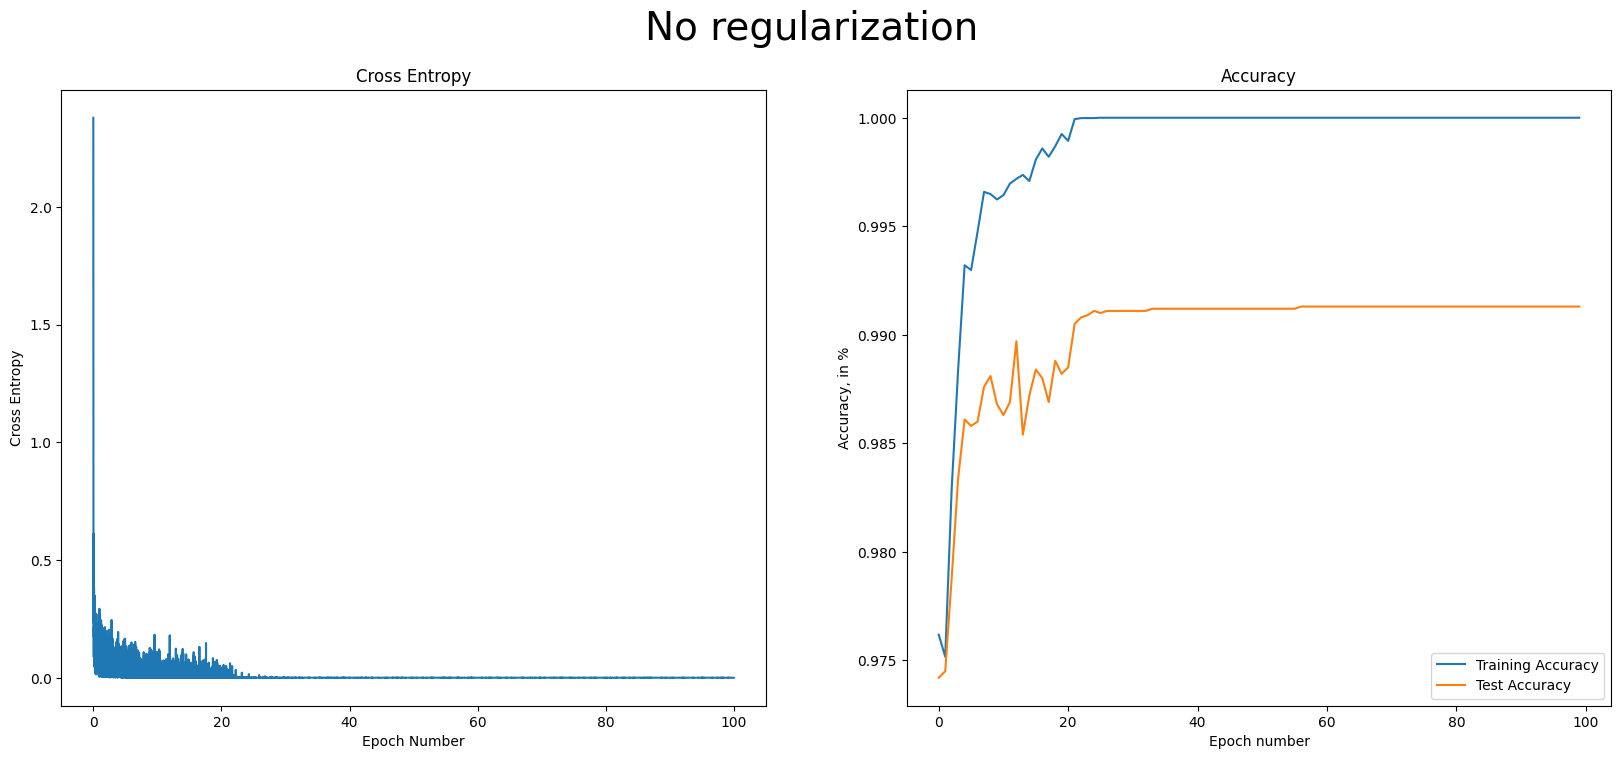

In [5]:
plot_results(models, model_name="model_no_reg", title="No regularization")

#### Plots of Activation Maps

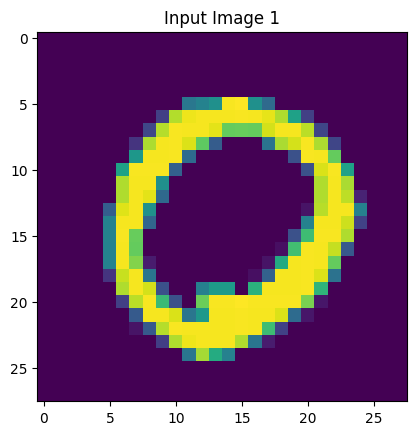

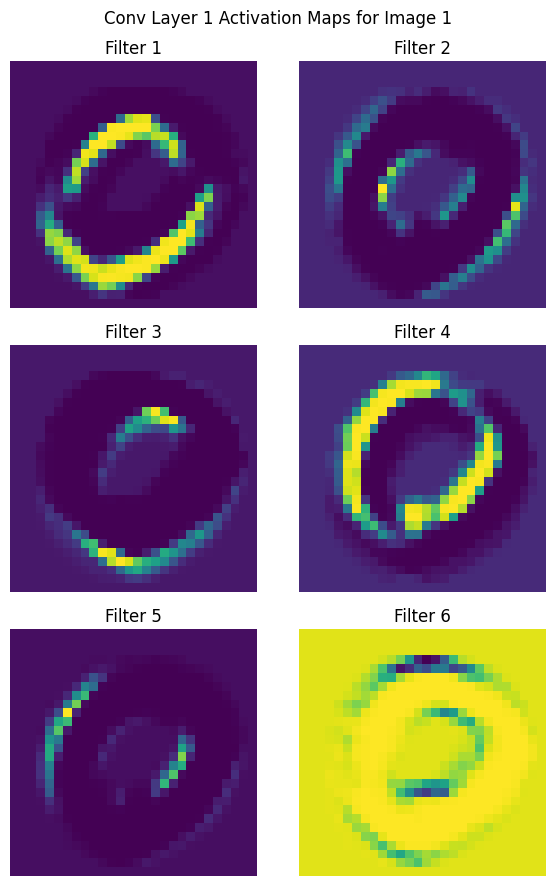

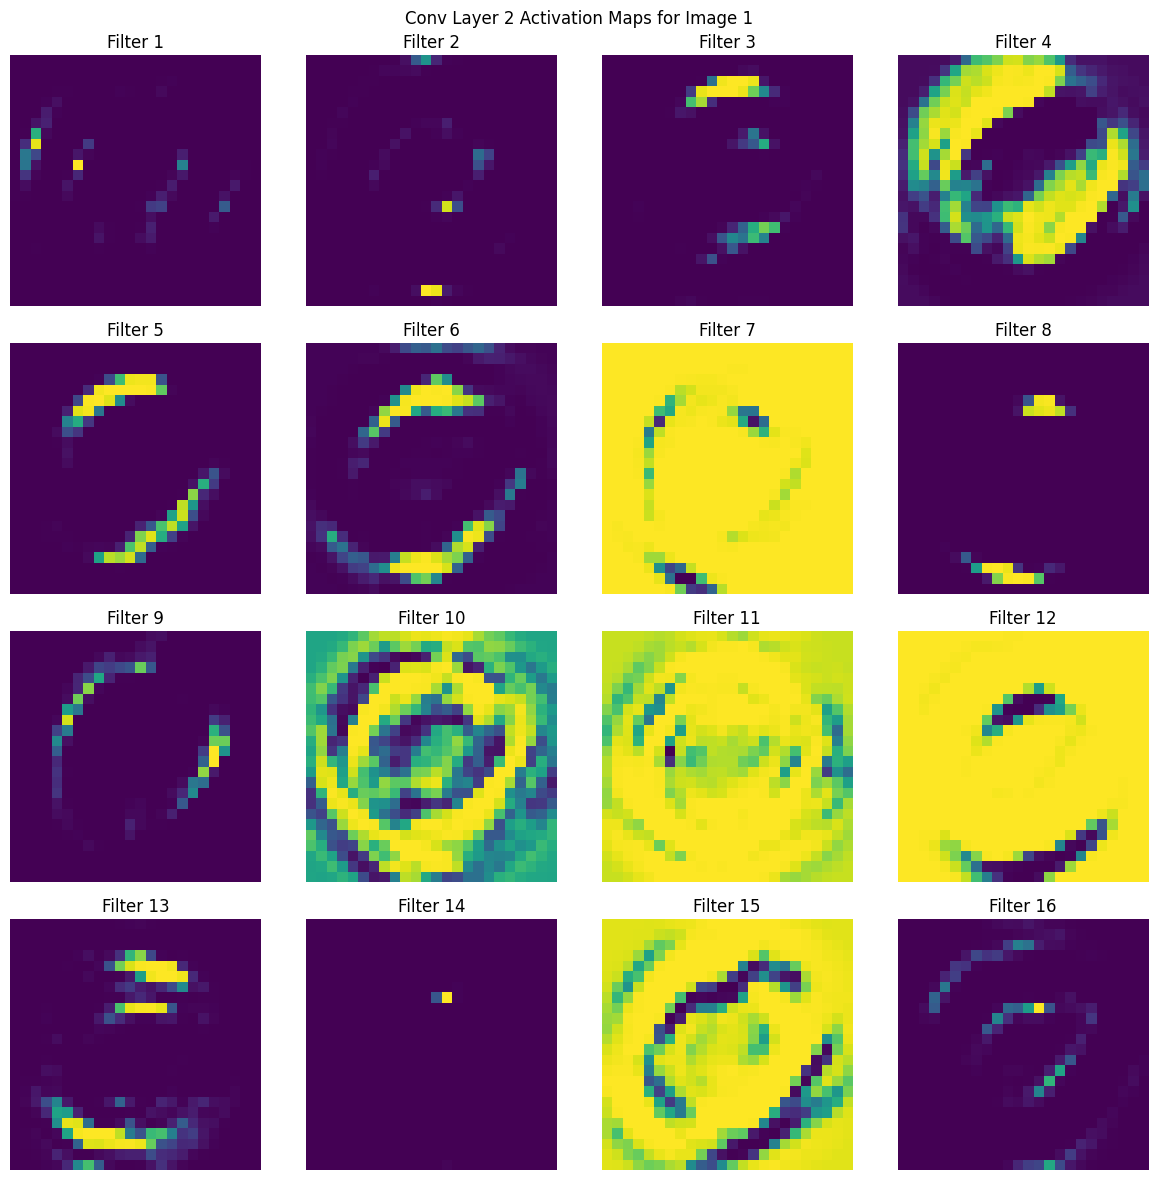

In [6]:
plot_activation_maps(models["model_no_reg"].model, train_loader, num_images=1)

#### Plot of PCA of Activations

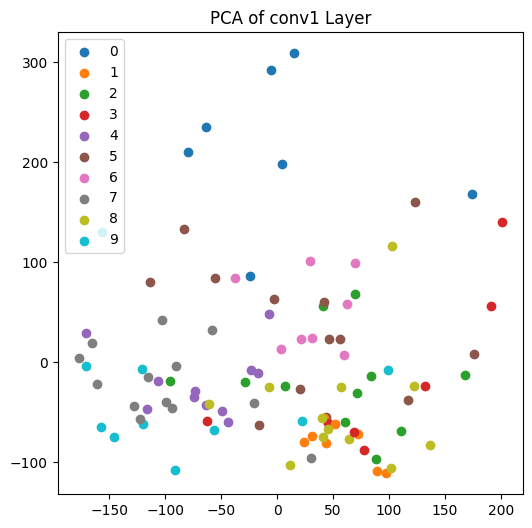

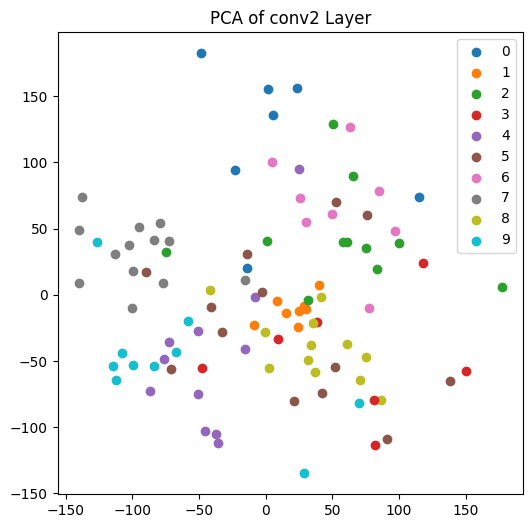

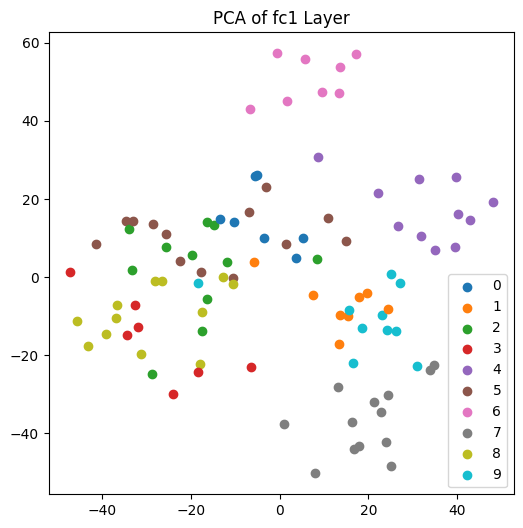

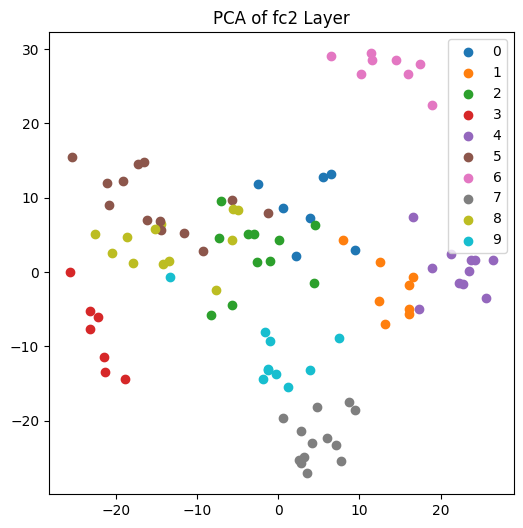

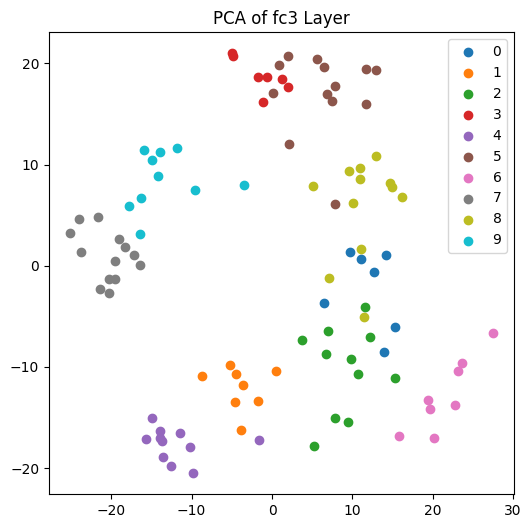

In [7]:
plot_activations_pca(models["model_no_reg"].model, train_loader, device)

#### Plot of t-SNE of Activations

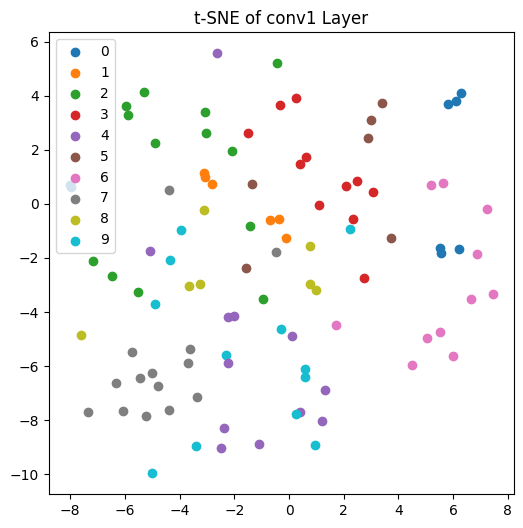

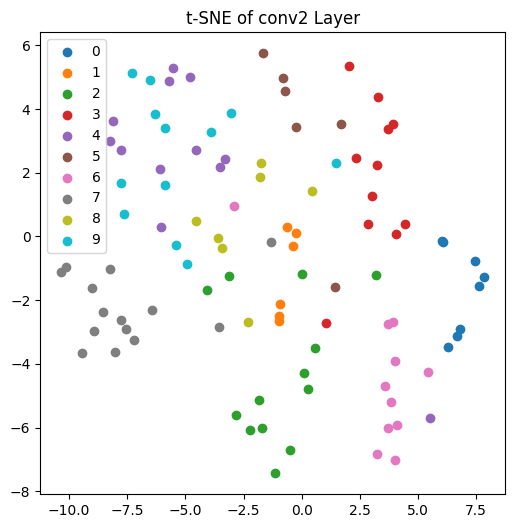

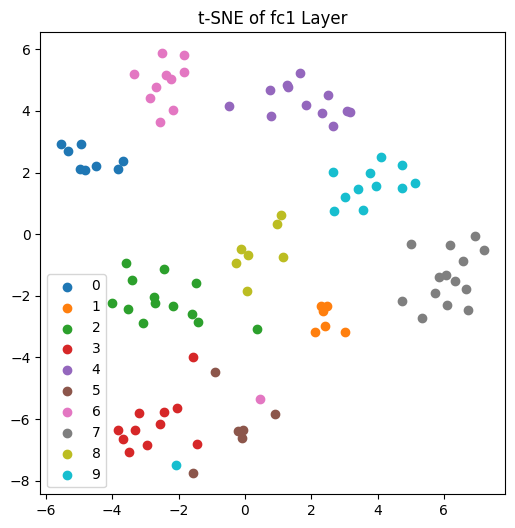

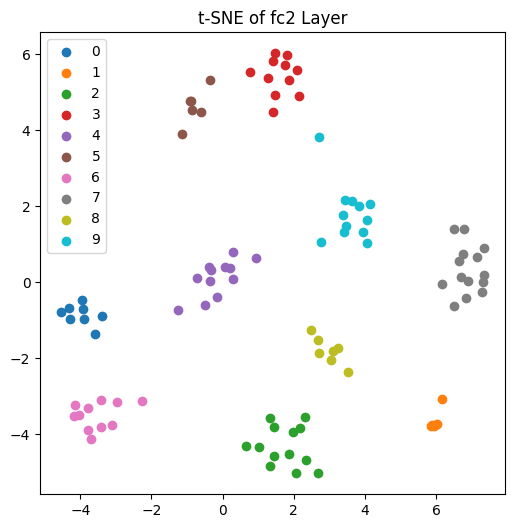

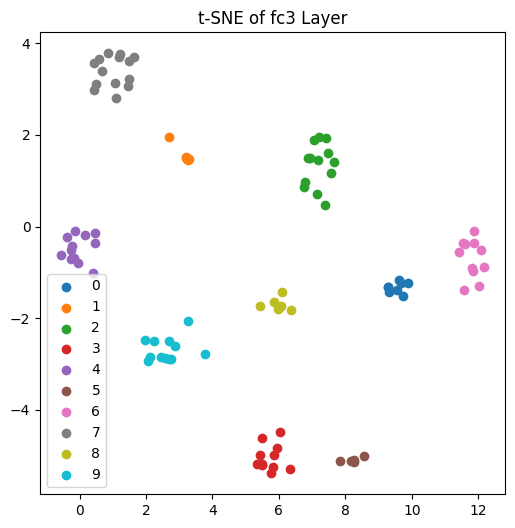

In [8]:
plot_activations_tsne(models["model_no_reg"].model, train_loader, device)

#### Plots of Saliency Maps

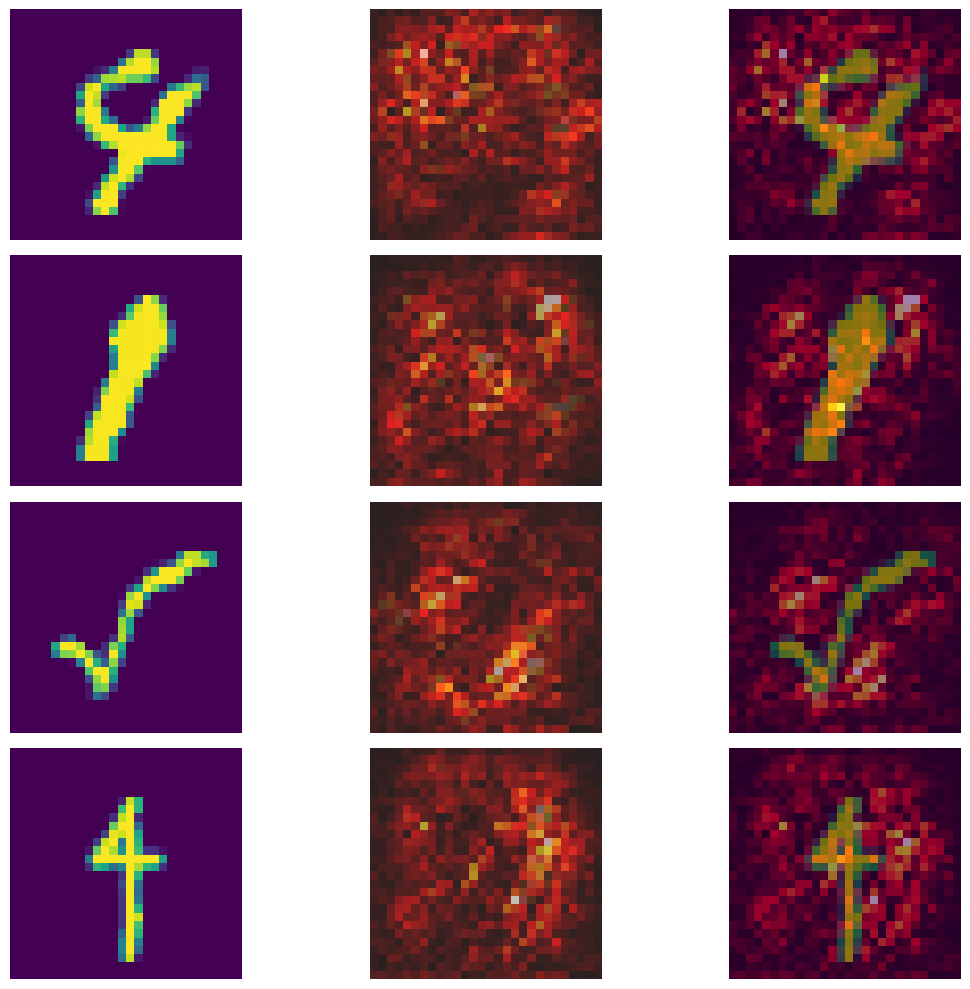

In [9]:
plot_saliency_maps(models["model_no_reg"].model, train_loader, num_images=12)

#### Plots of Occlusion Sensitivity

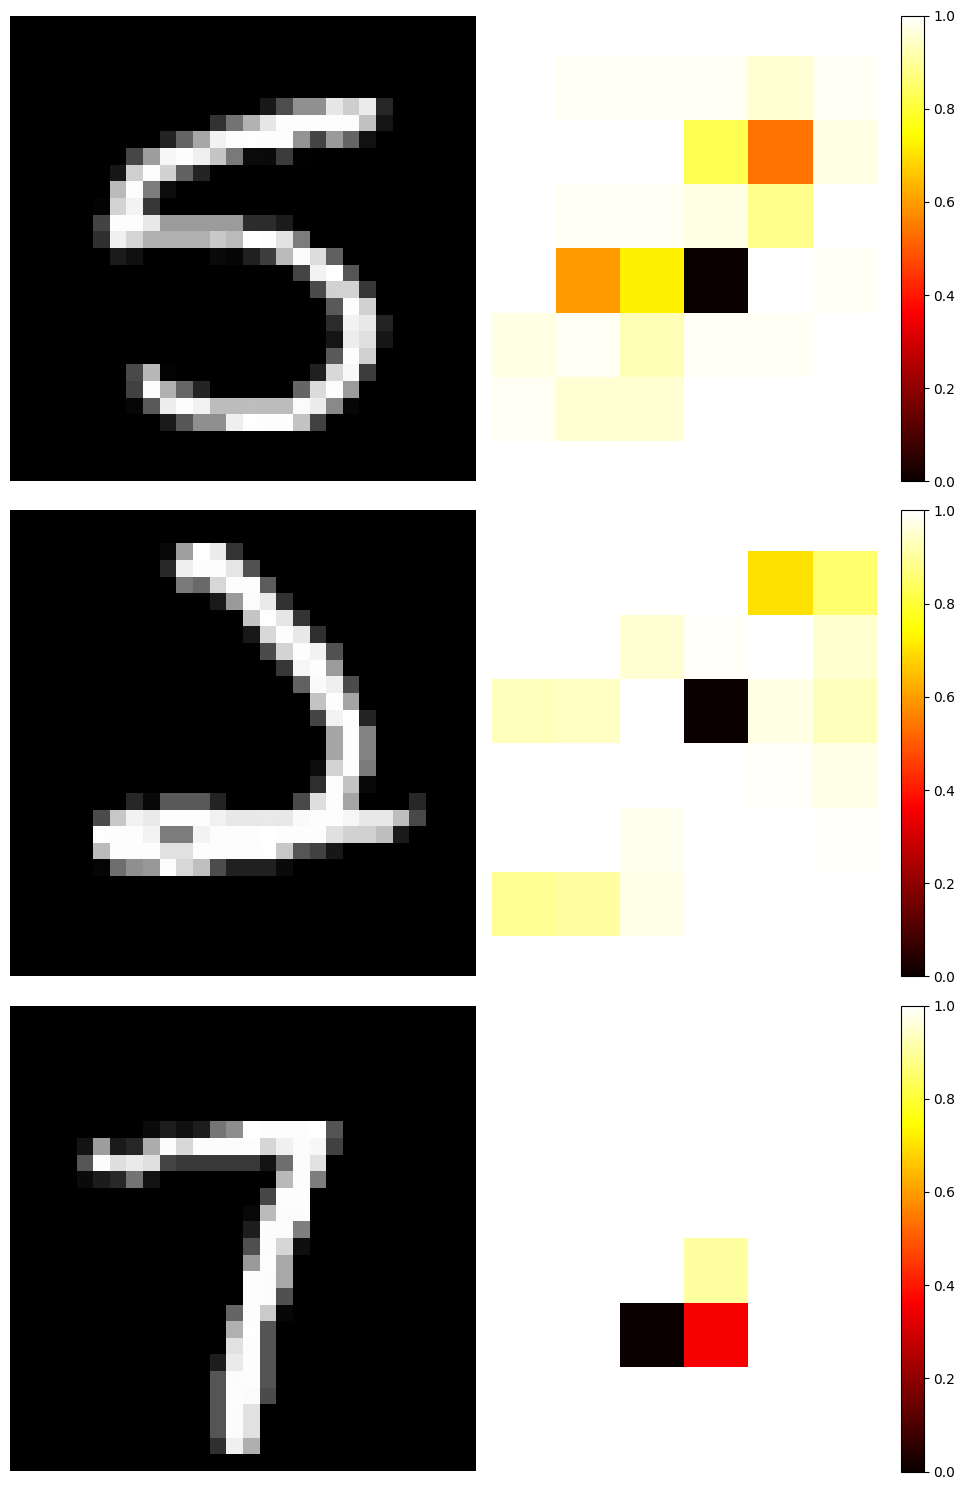

In [10]:
plot_occlusion_sensitivity(
    models["model_no_reg"].model, train_loader, num_images=3, occluder_size=8, stride=4
)

c:\Users\aslak\Desktop\Jobb\Forskningsassistent\Biologisk inspirert kunstig intelligens\regNNs\Regularization Benchmarking\plotting_tools.py:508: RuntimeWarning: divide by zero encountered in divide
  occlusion_scores = (occlusion_scores - occlusion_scores.min()) / (
c:\Users\aslak\Desktop\Jobb\Forskningsassistent\Biologisk inspirert kunstig intelligens\regNNs\Regularization Benchmarking\plotting_tools.py:508: RuntimeWarning: invalid value encountered in divide
  occlusion_scores = (occlusion_scores - occlusion_scores.min()) / (


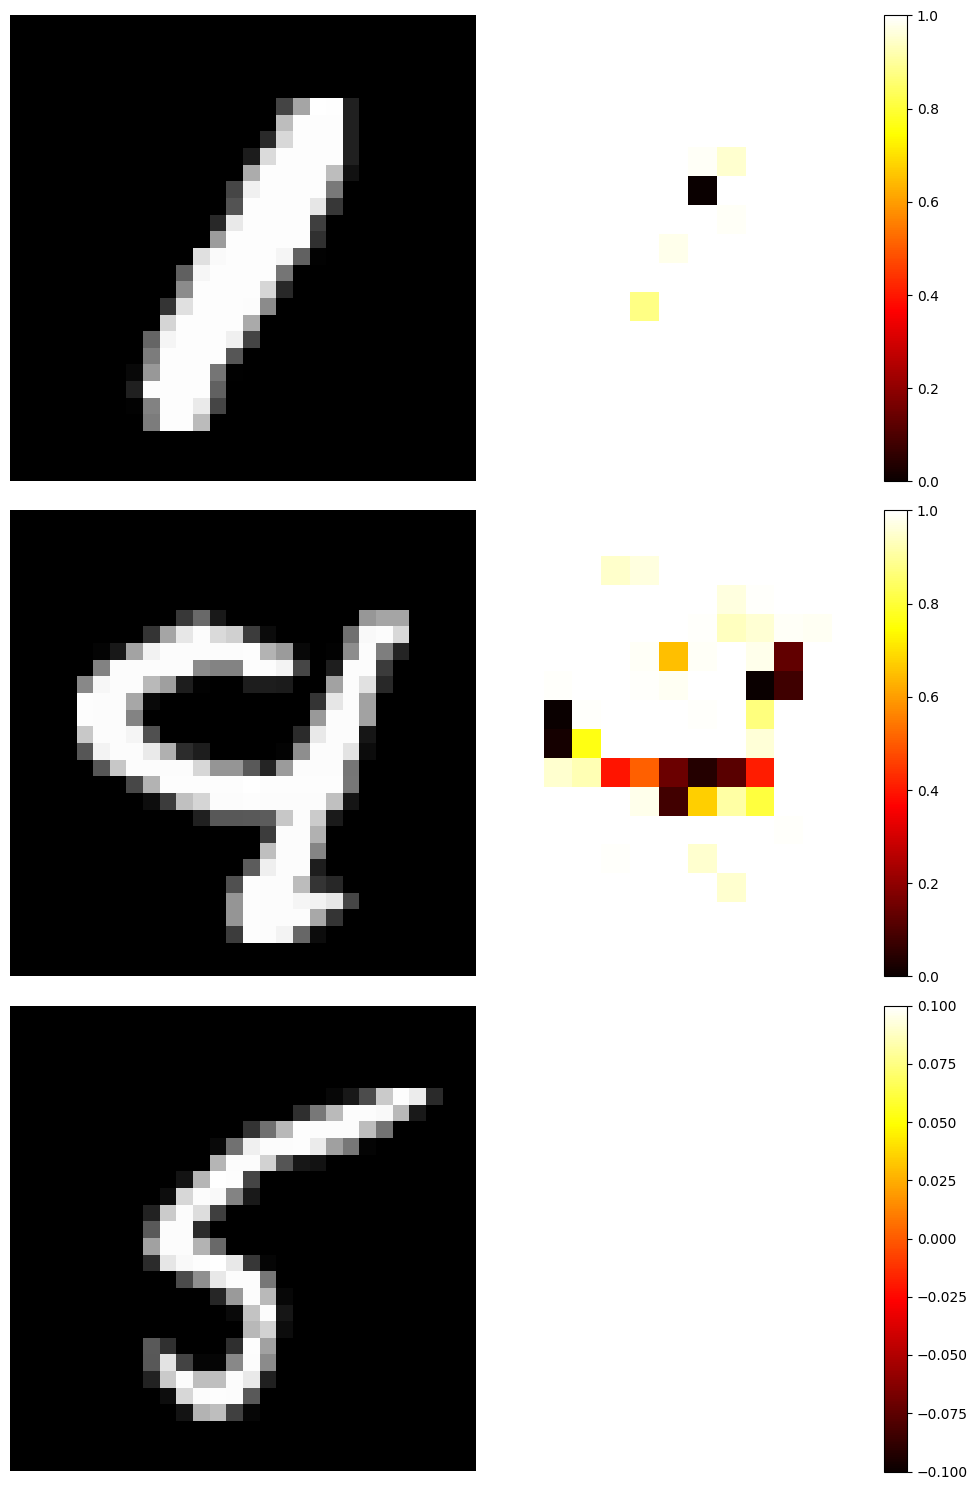

In [11]:
plot_occlusion_sensitivity(
    models["model_no_reg"].model, train_loader, num_images=3, occluder_size=4, stride=2
)

### L1 Regularization

#### Plot of Losses and Accuracies

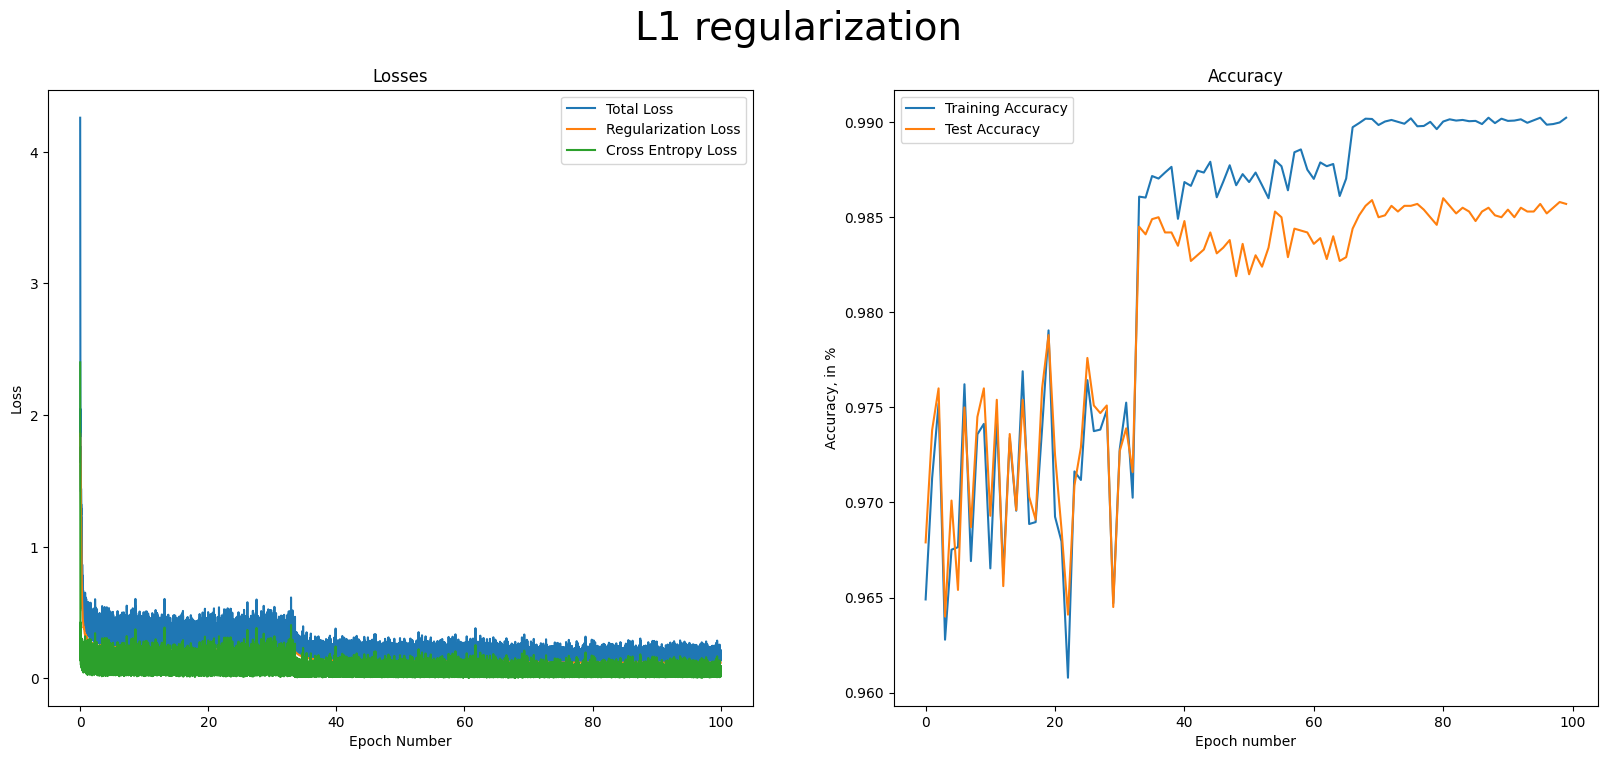

In [12]:
plot_reg_results(models, model_name="model_l1", title="L1 regularization")

#### Plot of Weight Distributions

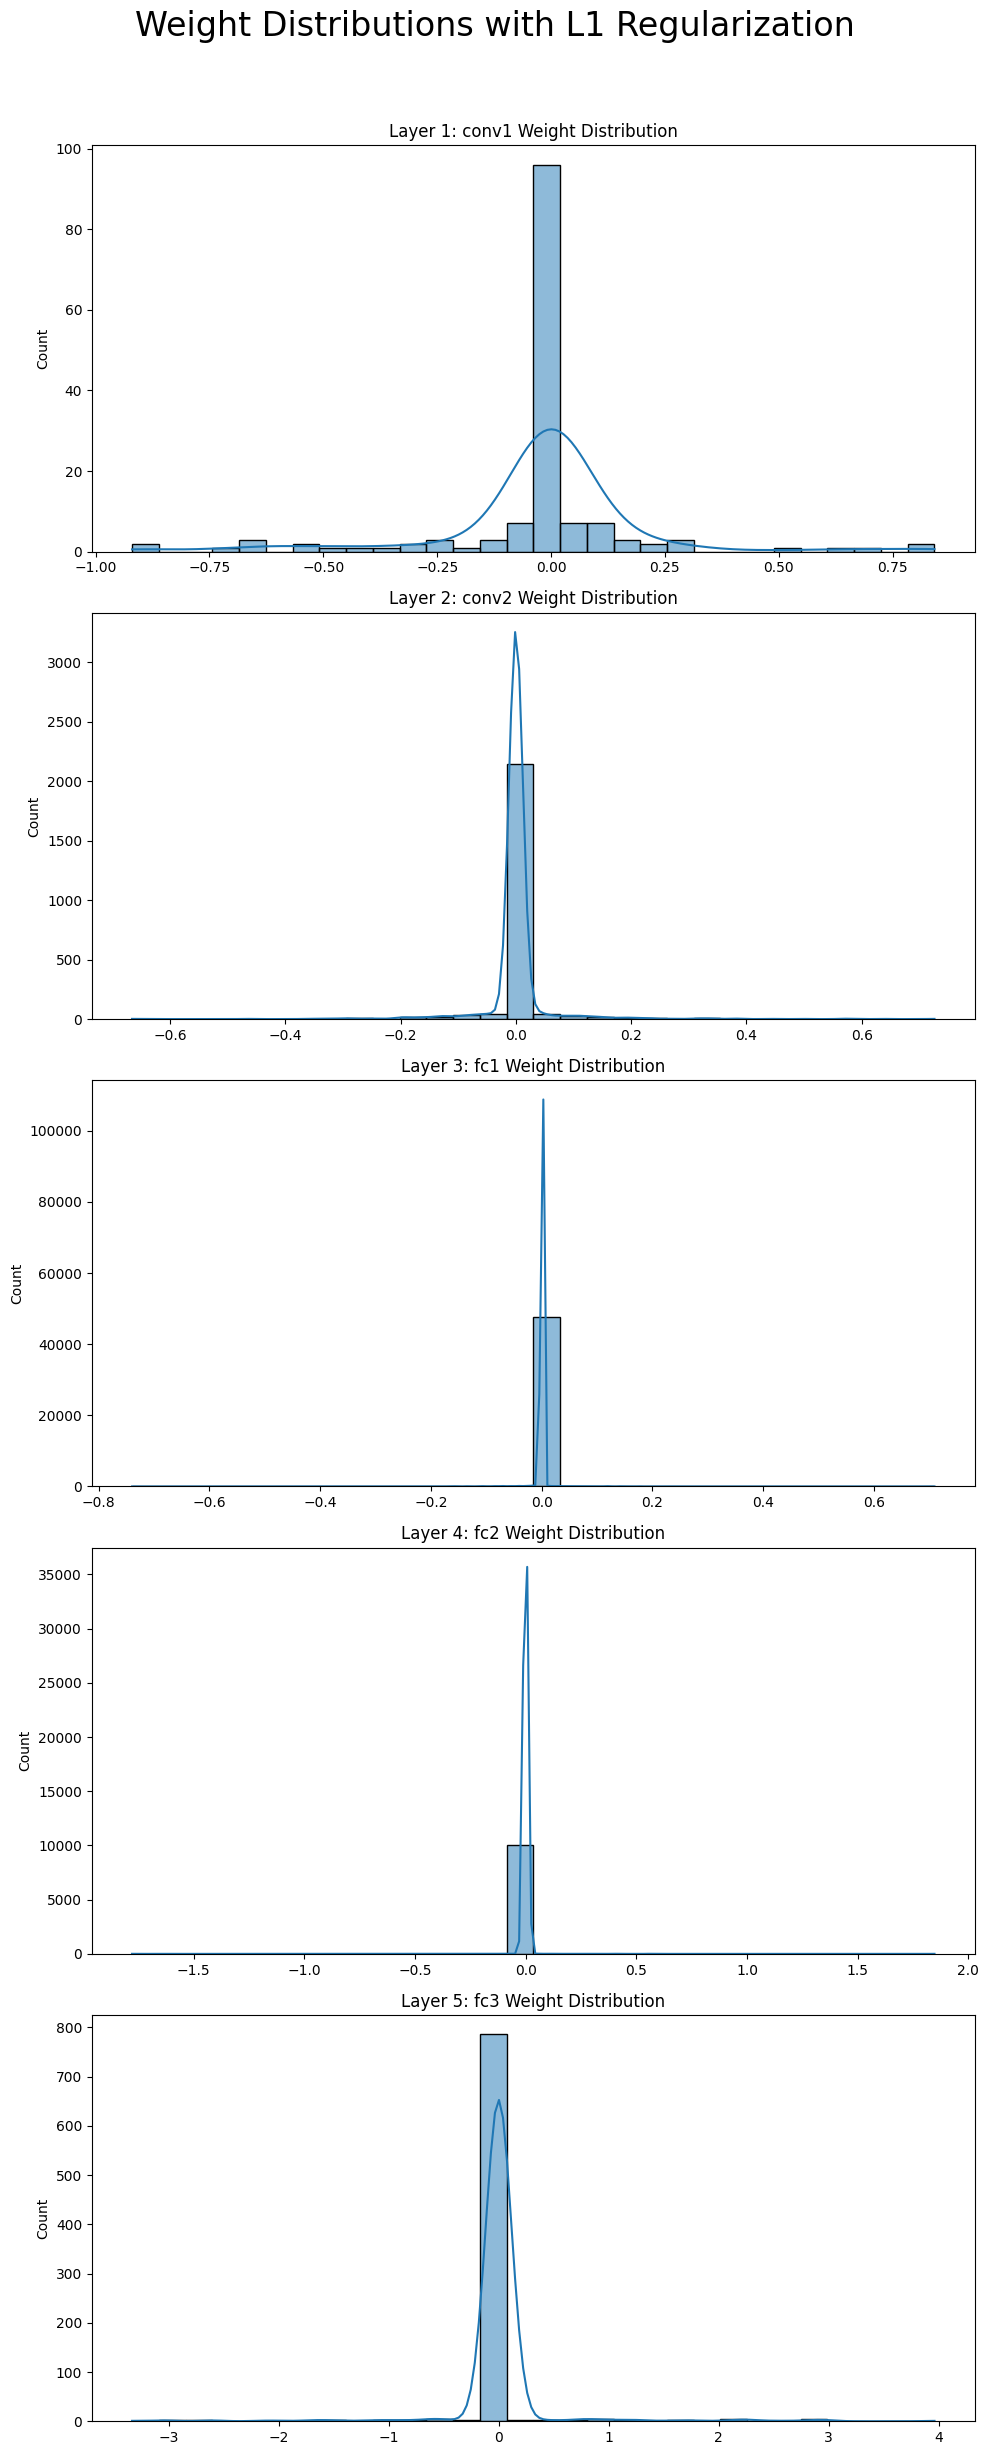

In [13]:
plot_weight_distributions(
    models["model_l1"].model, title="Weight Distributions with L1 Regularization"
)

#### Plots of Activation Maps

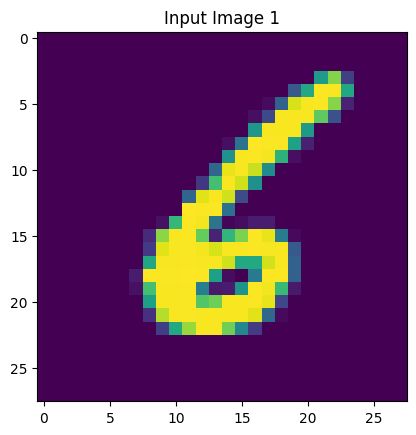

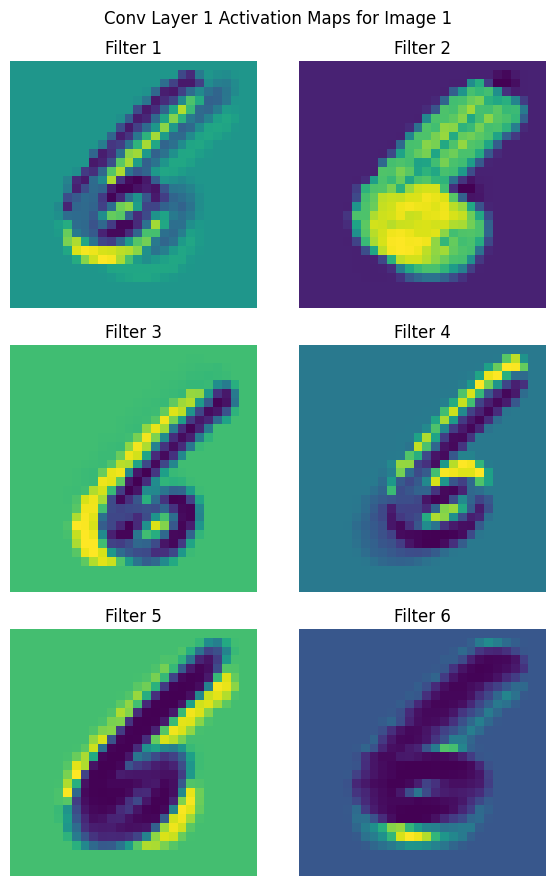

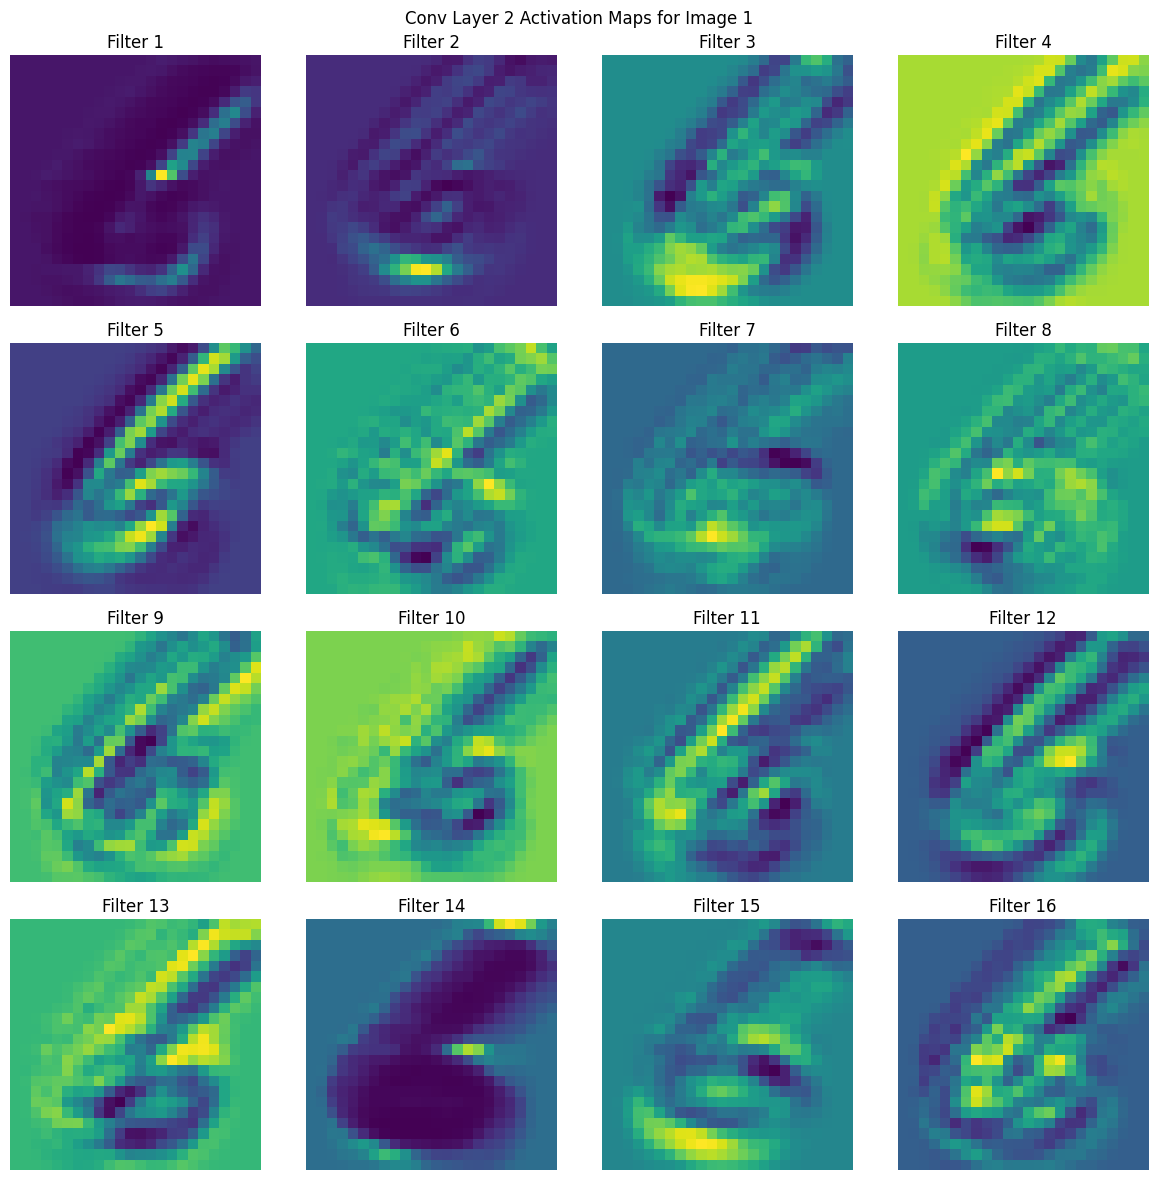

In [14]:
plot_activation_maps(models["model_l1"].model, train_loader, num_images=1)

#### Plot of PCA of Activations

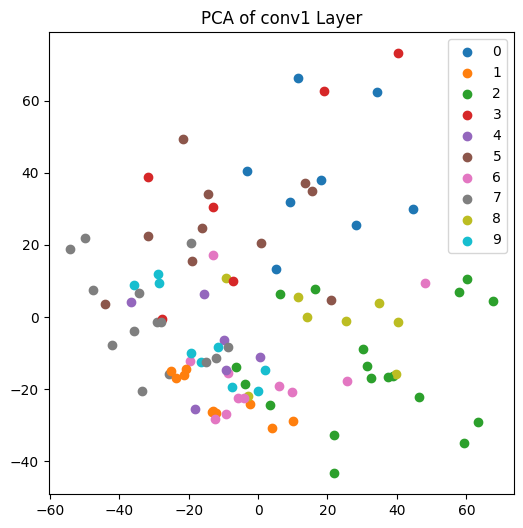

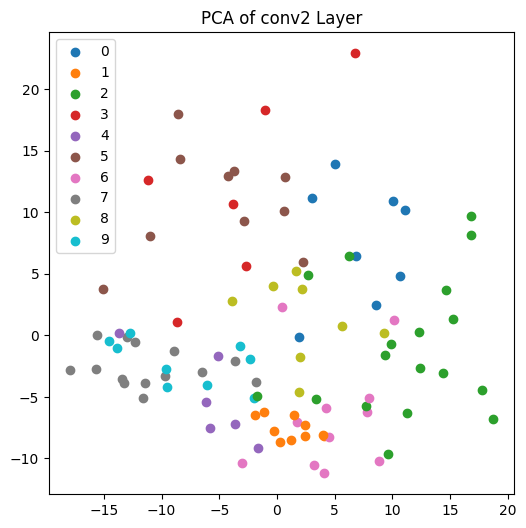

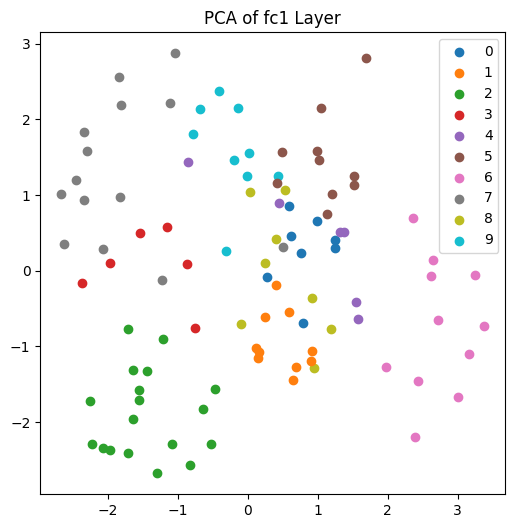

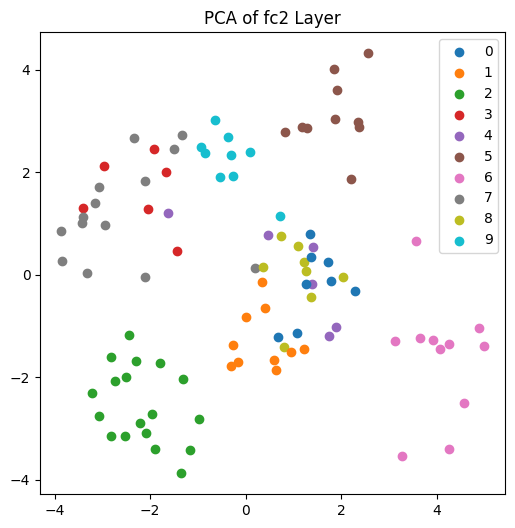

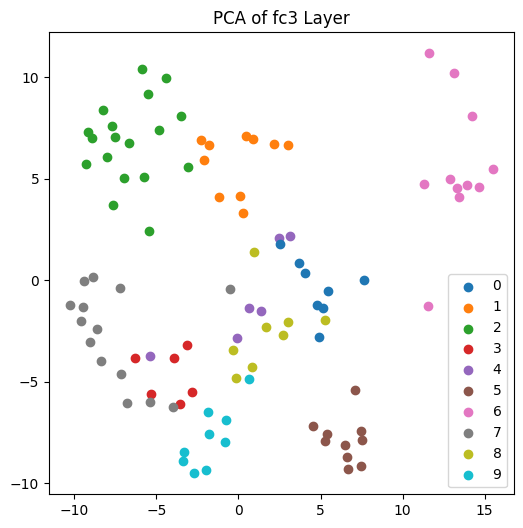

In [15]:
plot_activations_pca(models["model_l1"].model, train_loader, device)

#### Plot of t-SNE of Activations

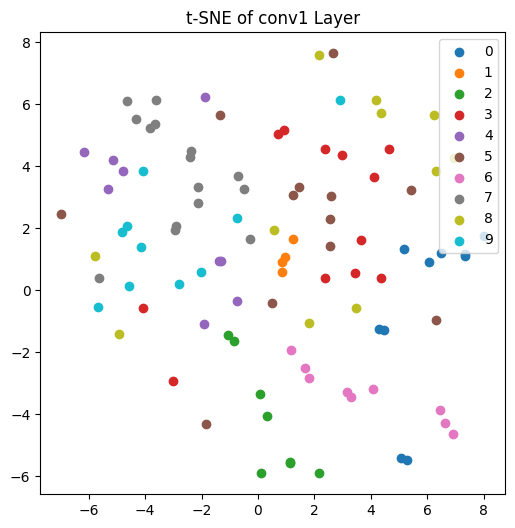

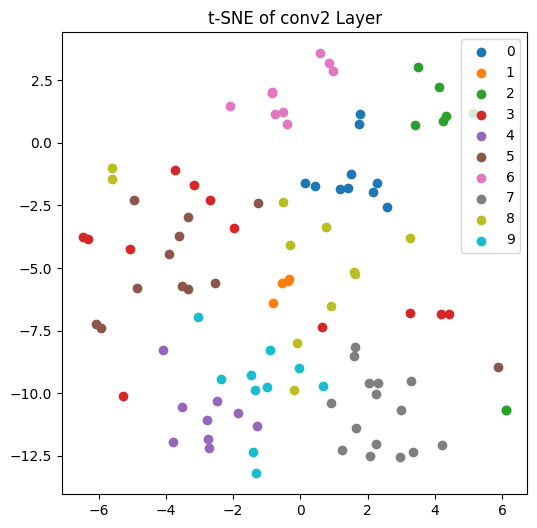

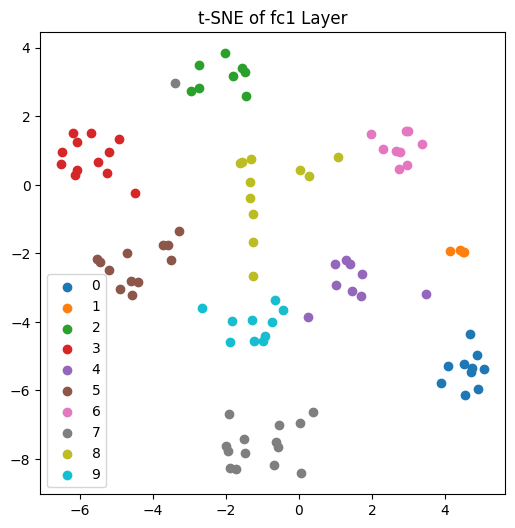

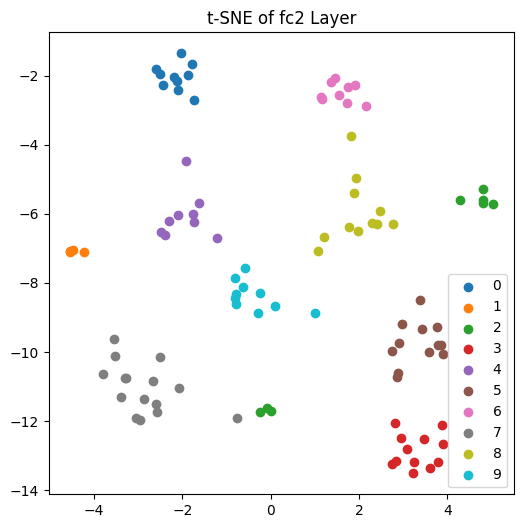

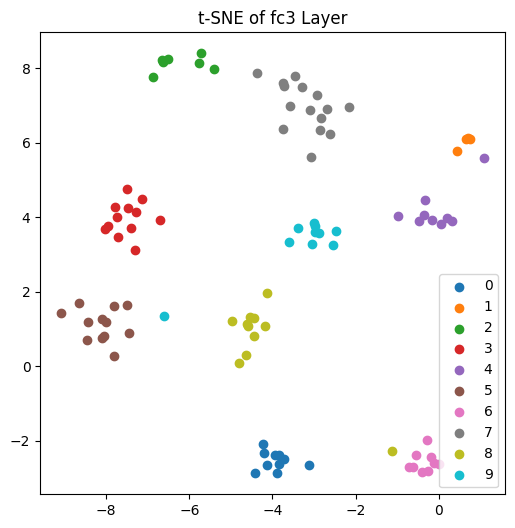

In [16]:
plot_activations_tsne(models["model_l1"].model, train_loader, device)

#### Plots of Saliency Maps

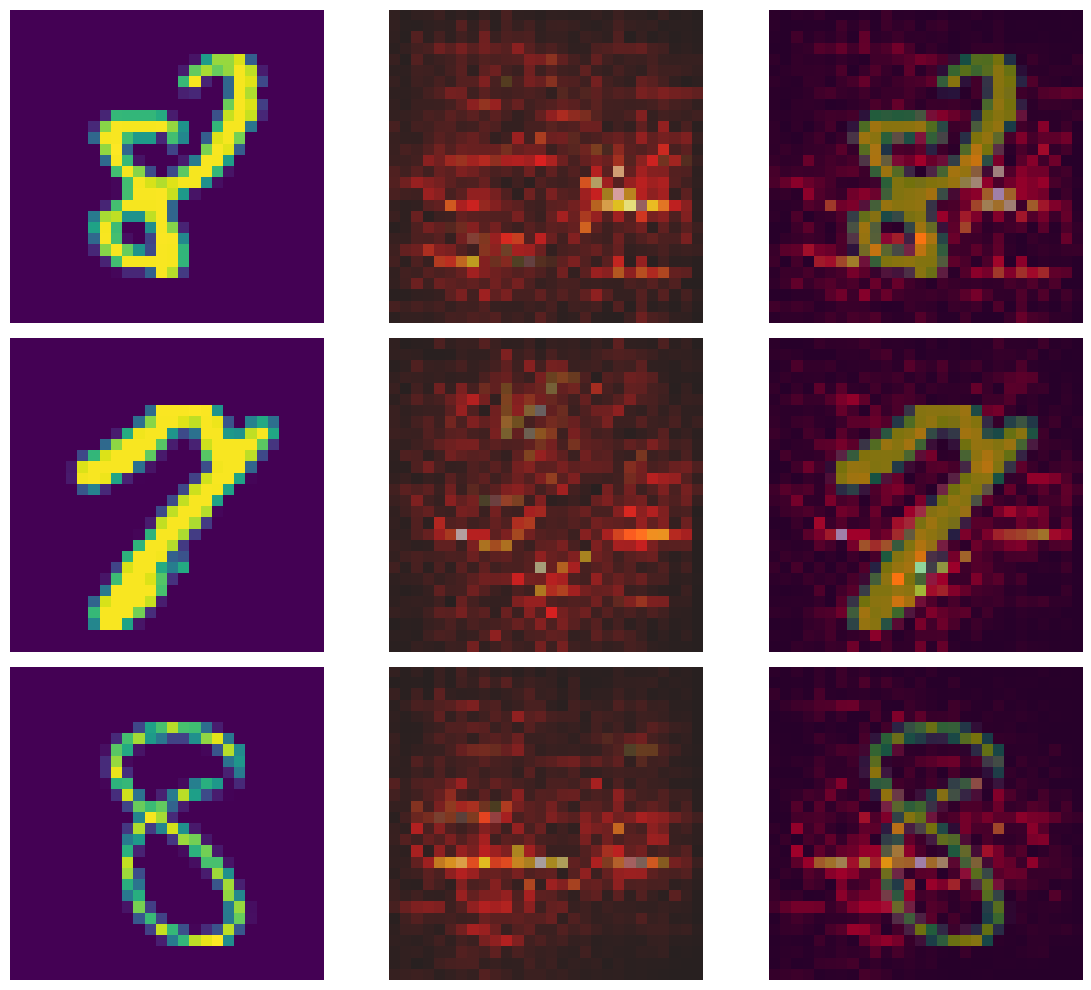

In [17]:
plot_saliency_maps(models["model_l1"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

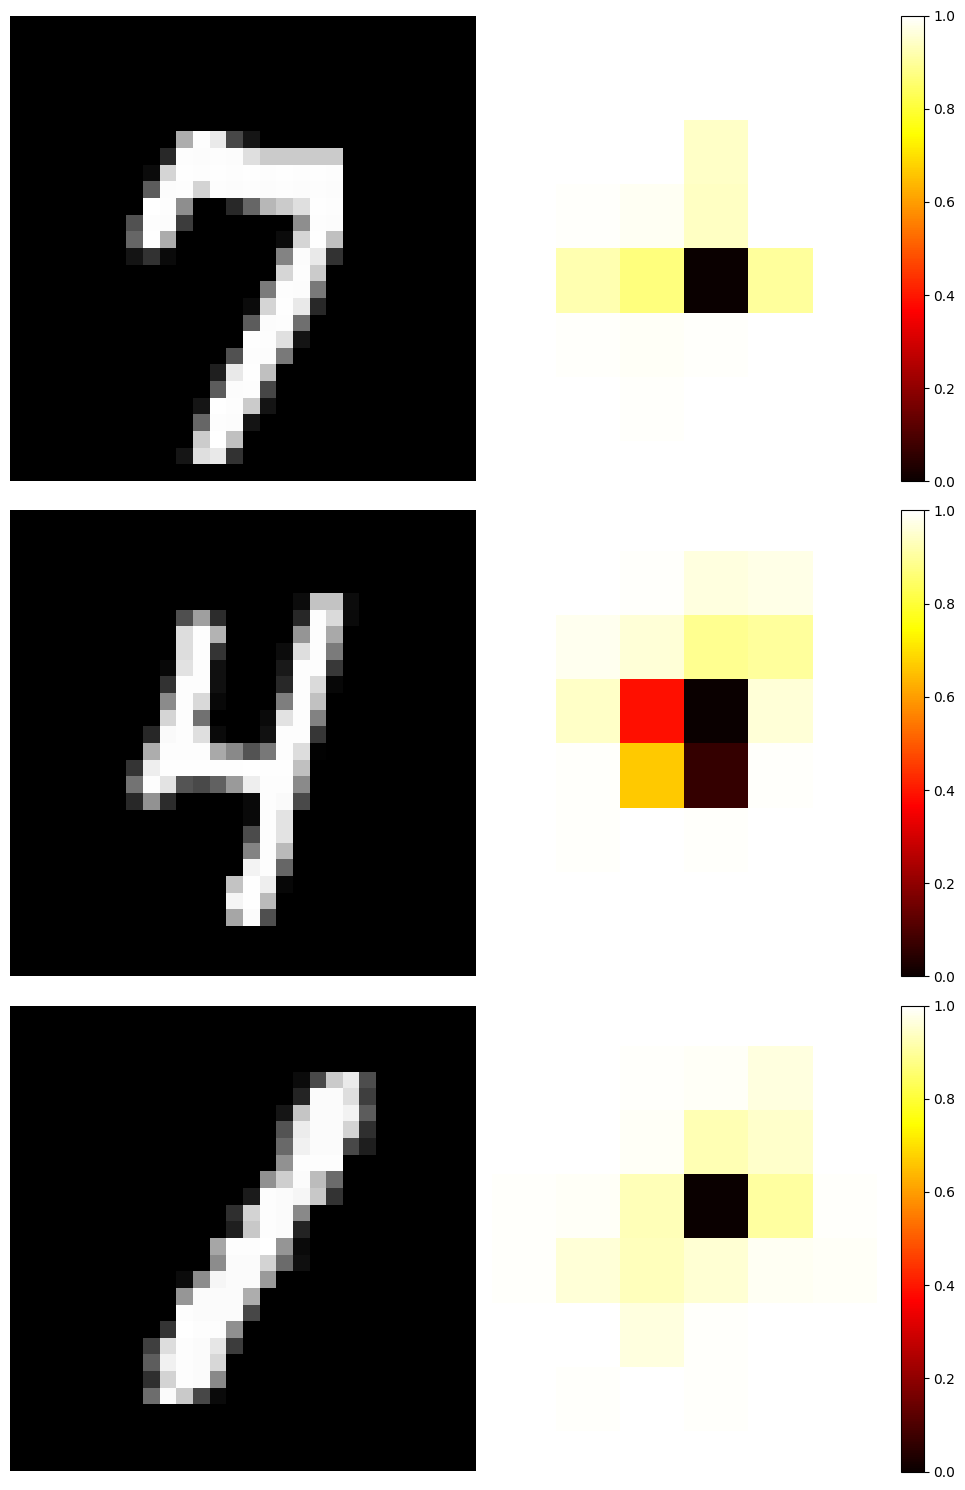

In [18]:
plot_occlusion_sensitivity(
    models["model_l1"].model, train_loader, num_images=3, occluder_size=8, stride=4
)

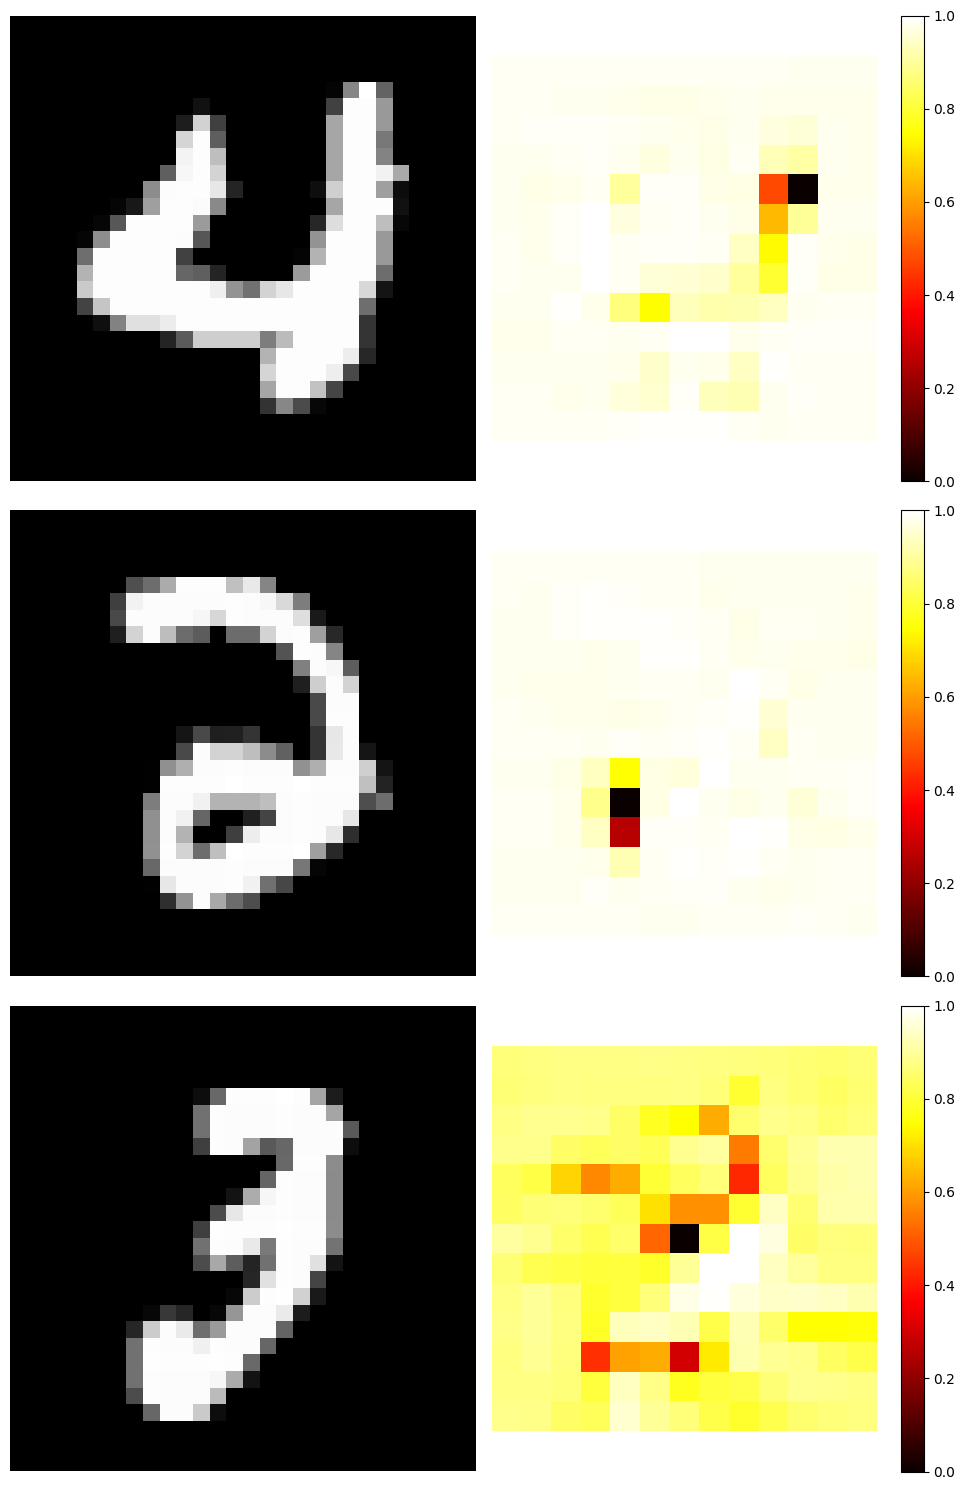

In [19]:
plot_occlusion_sensitivity(
    models["model_l1"].model, train_loader, num_images=3, occluder_size=4, stride=2
)

### L2 Regularization

#### Plot of Losses and Accuracies

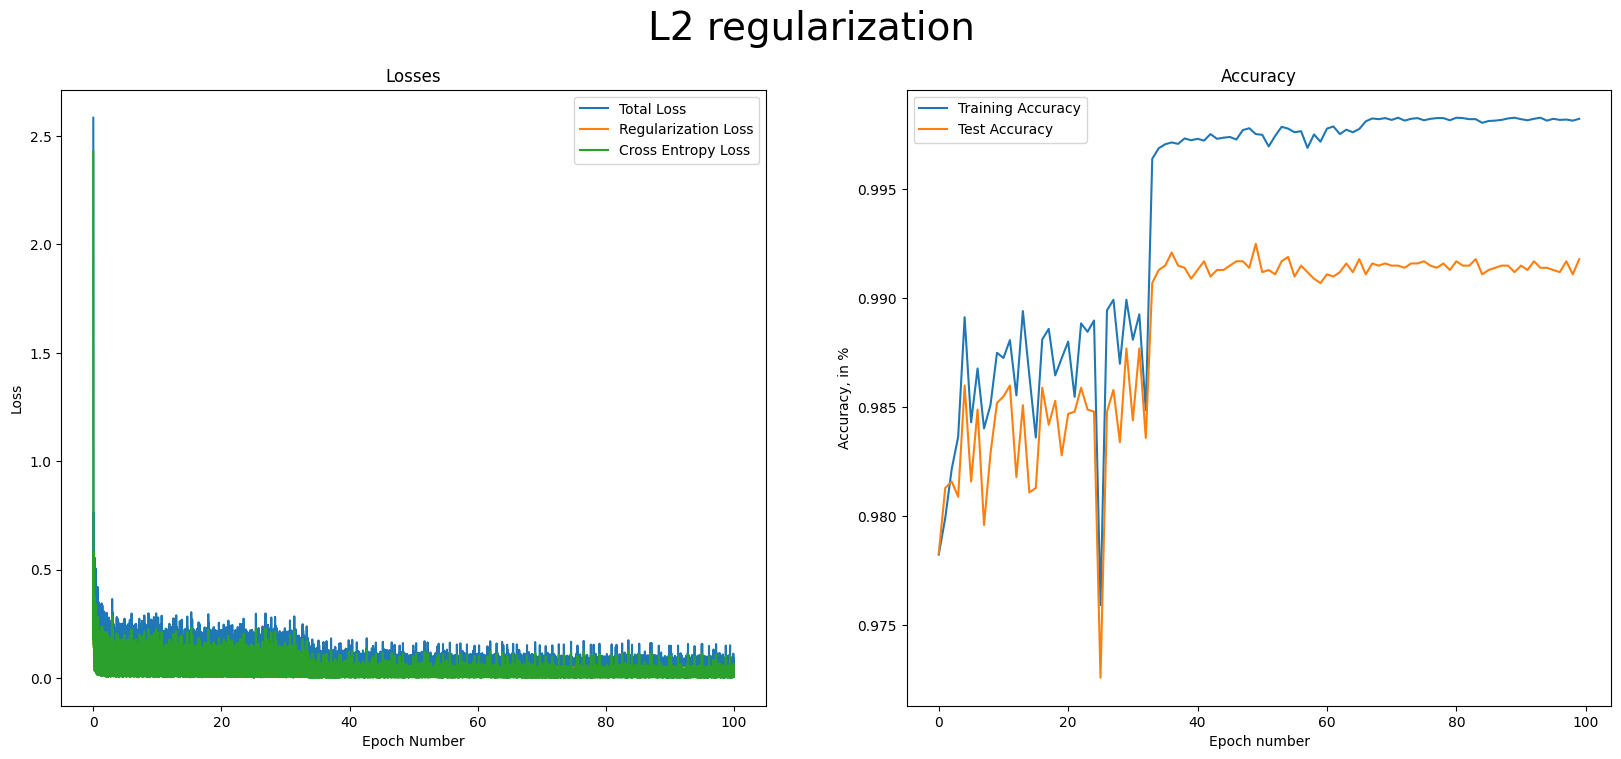

In [20]:
plot_reg_results(models, model_name="model_l2", title="L2 regularization")

#### Plot of Weight Distributions

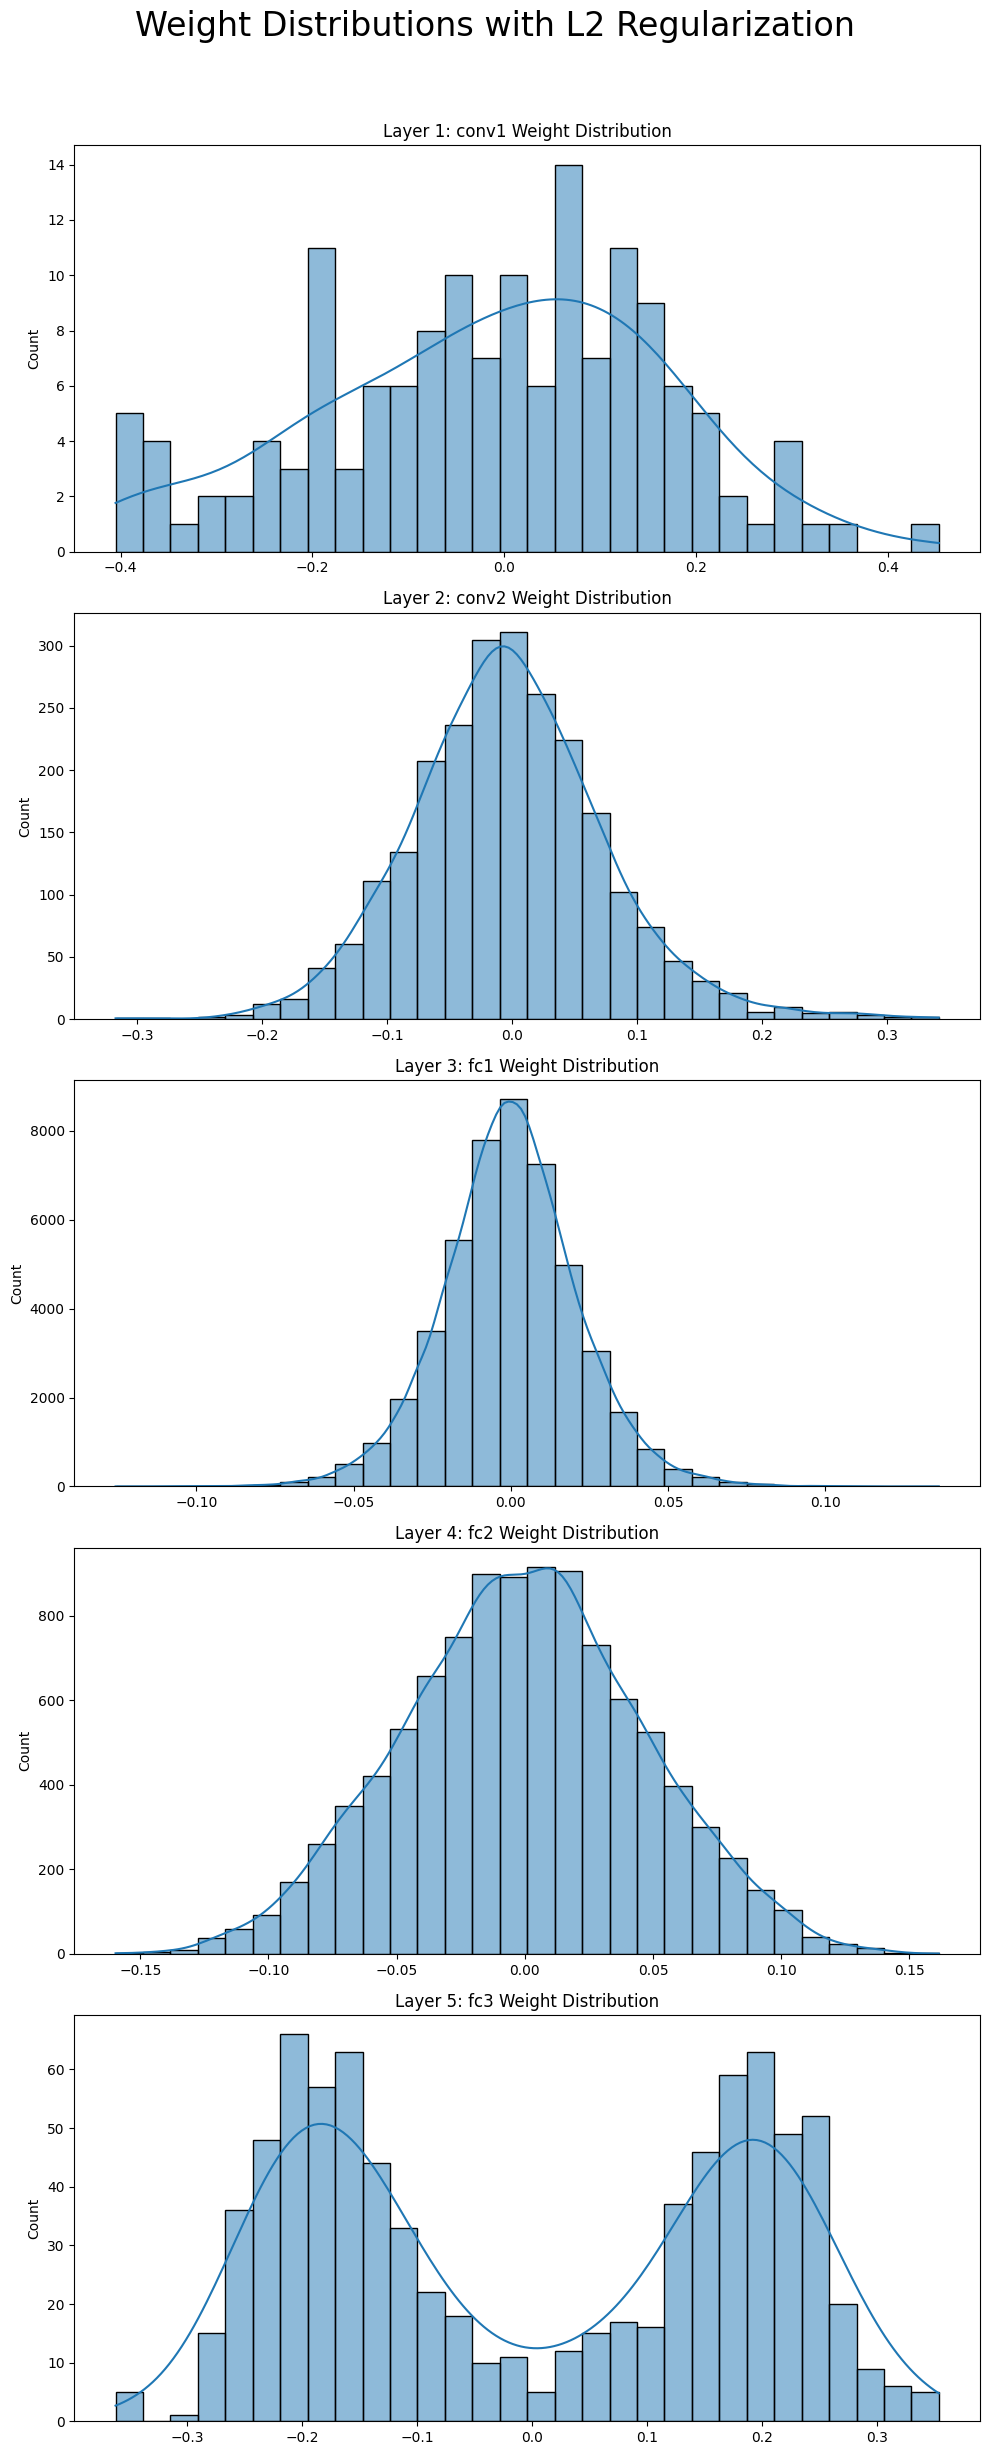

In [21]:
plot_weight_distributions(
    models["model_l2"].model, title="Weight Distributions with L2 Regularization"
)

#### Plots of Activation Maps

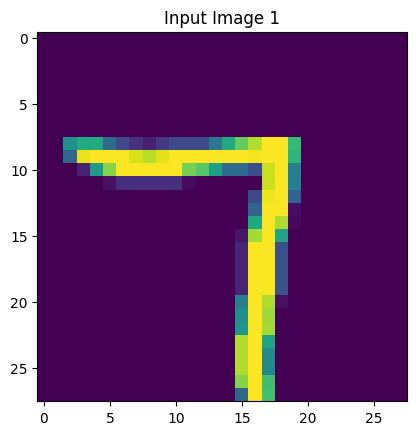

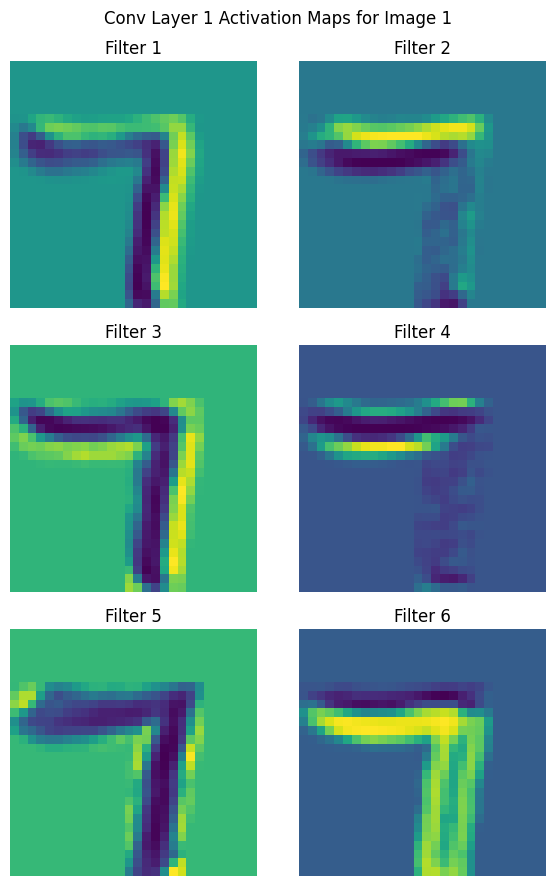

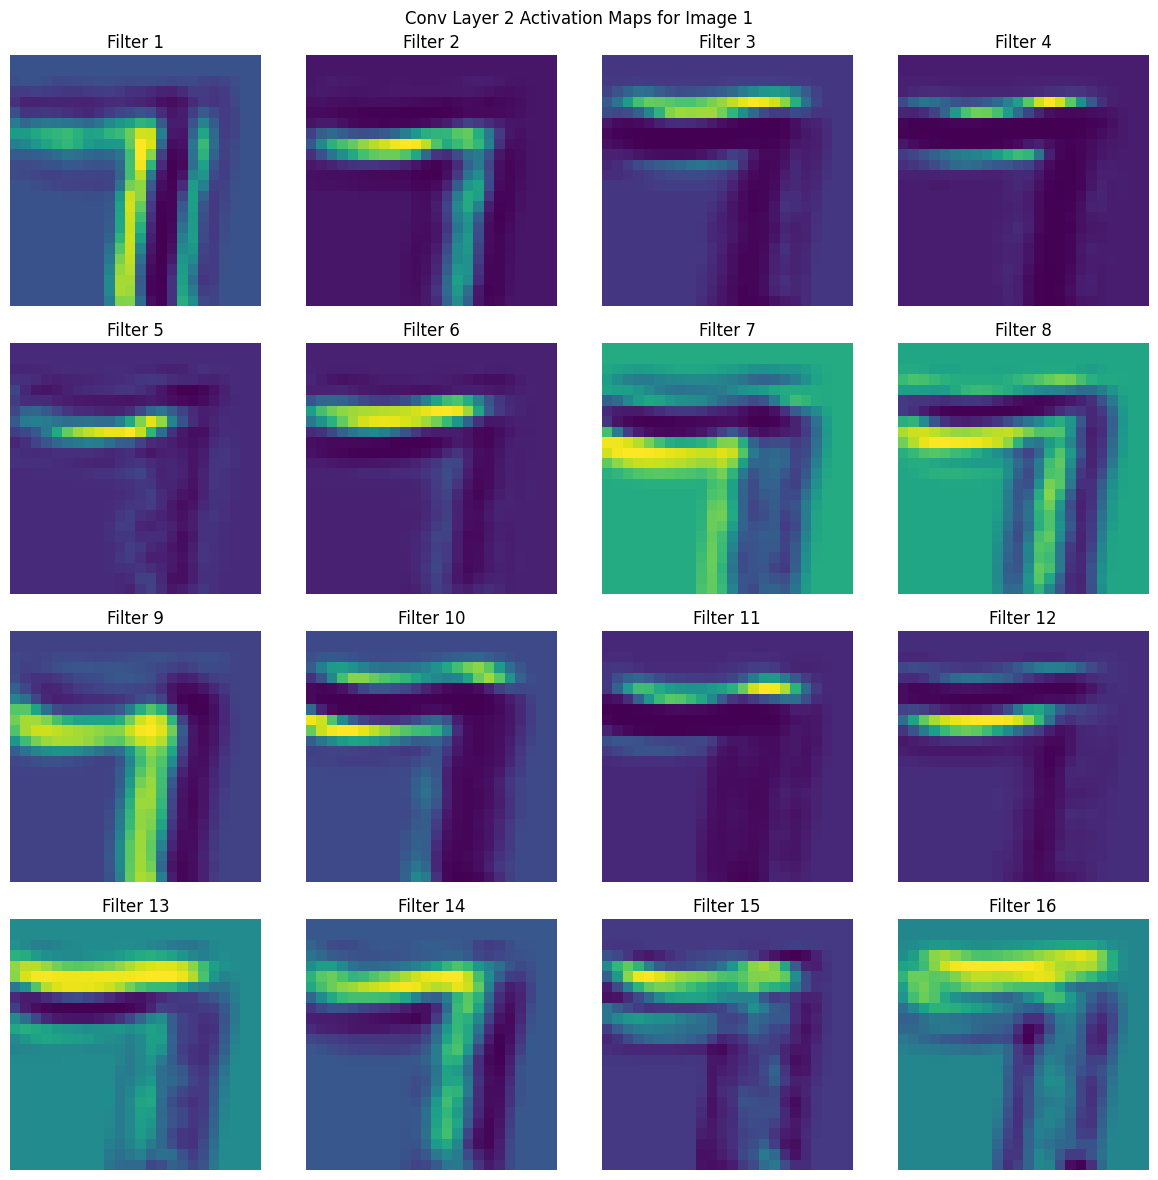

In [22]:
plot_activation_maps(models["model_l2"].model, train_loader, num_images=1)

#### Plot of PCA of Activations

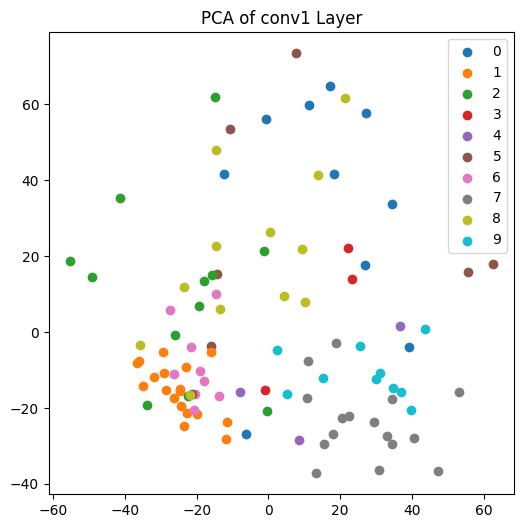

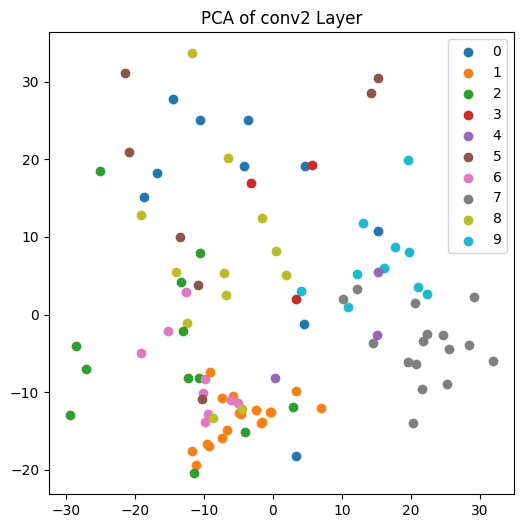

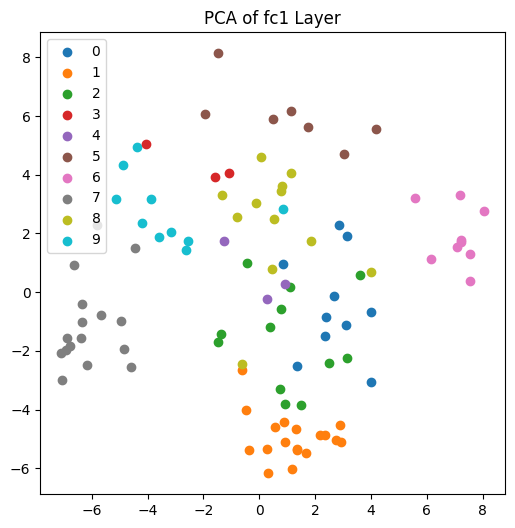

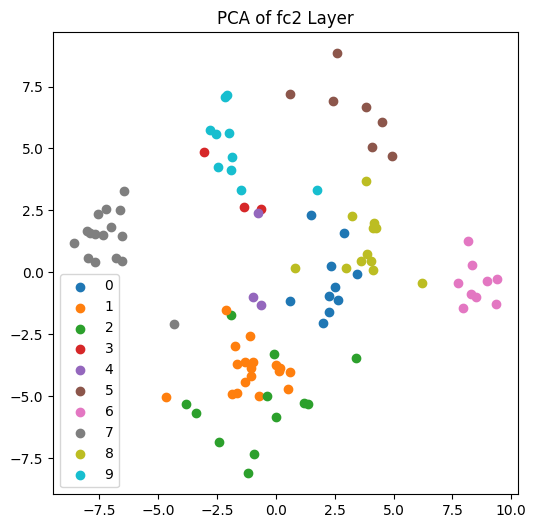

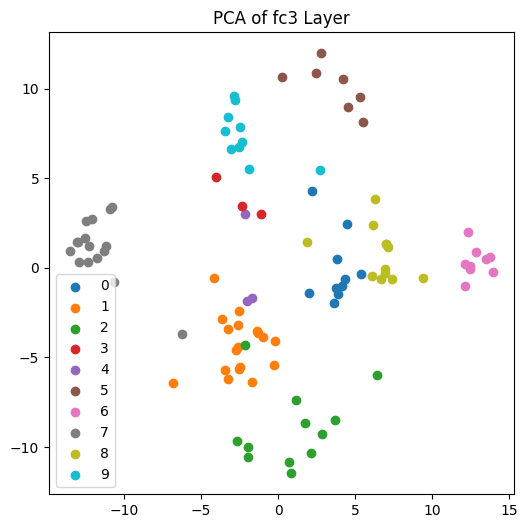

In [23]:
plot_activations_pca(models["model_l2"].model, train_loader, device)

#### Plot t-SNE of Activations

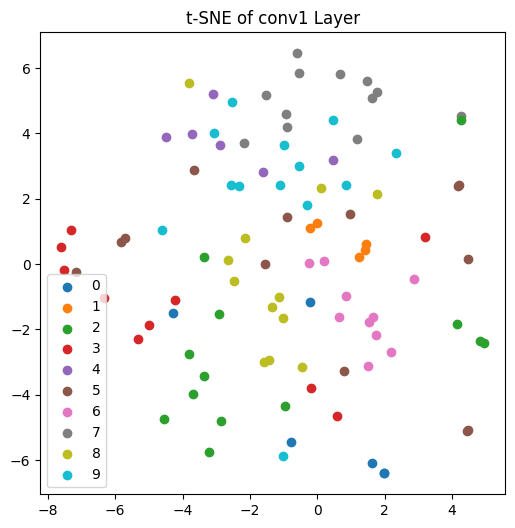

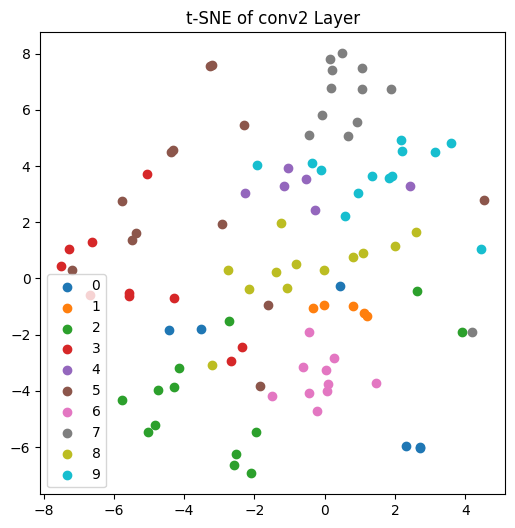

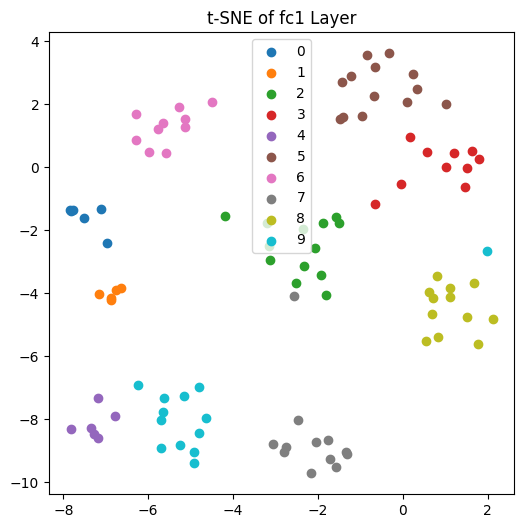

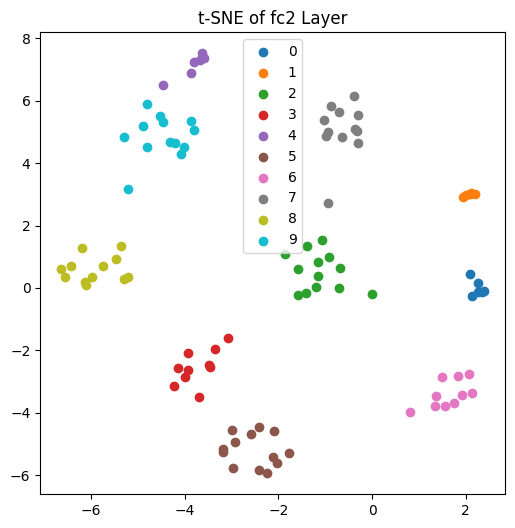

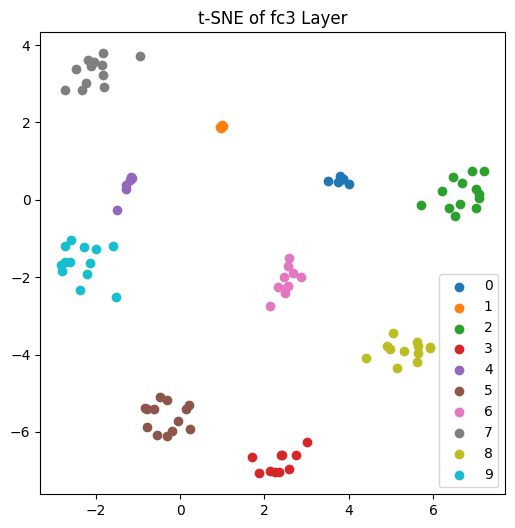

In [24]:
plot_activations_tsne(models["model_l2"].model, train_loader, device)

#### Plots of Saliency Maps

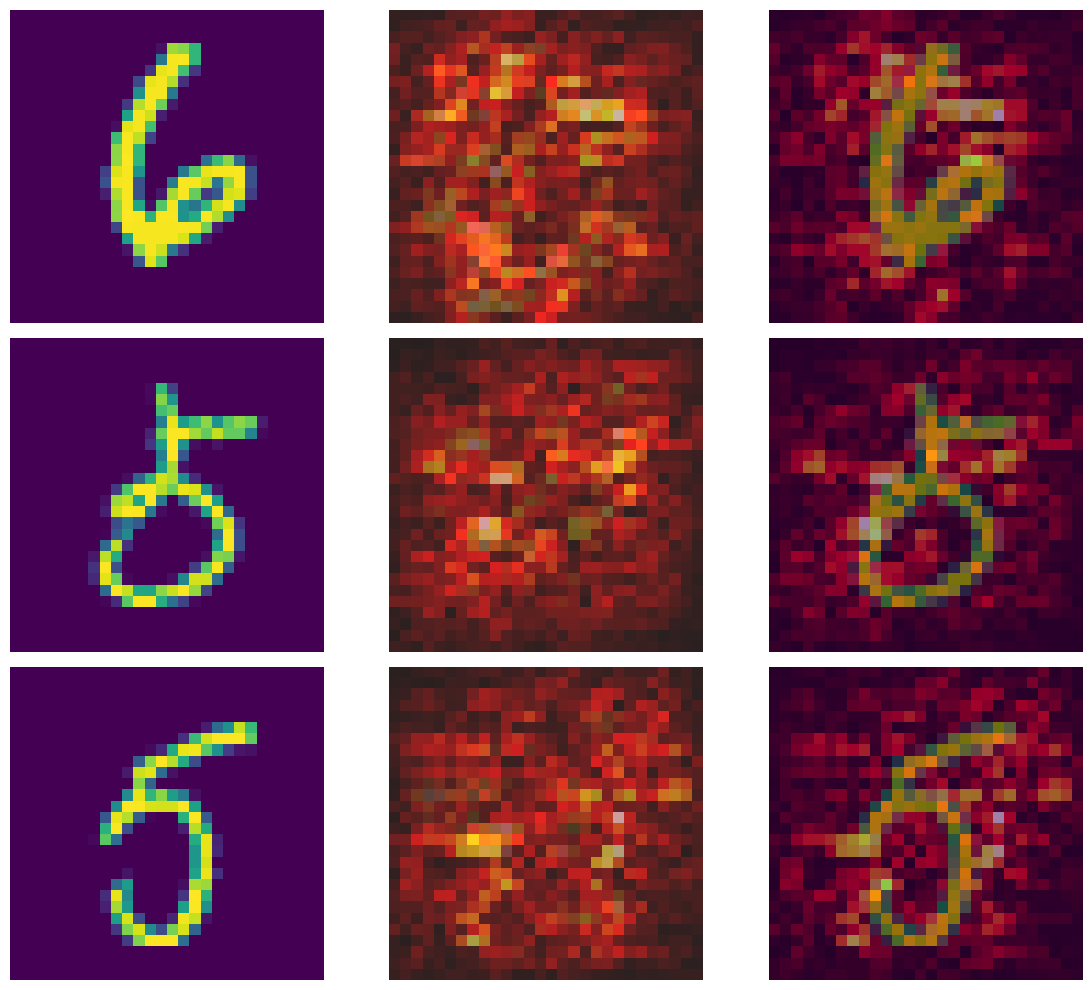

In [25]:
plot_saliency_maps(models["model_l2"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

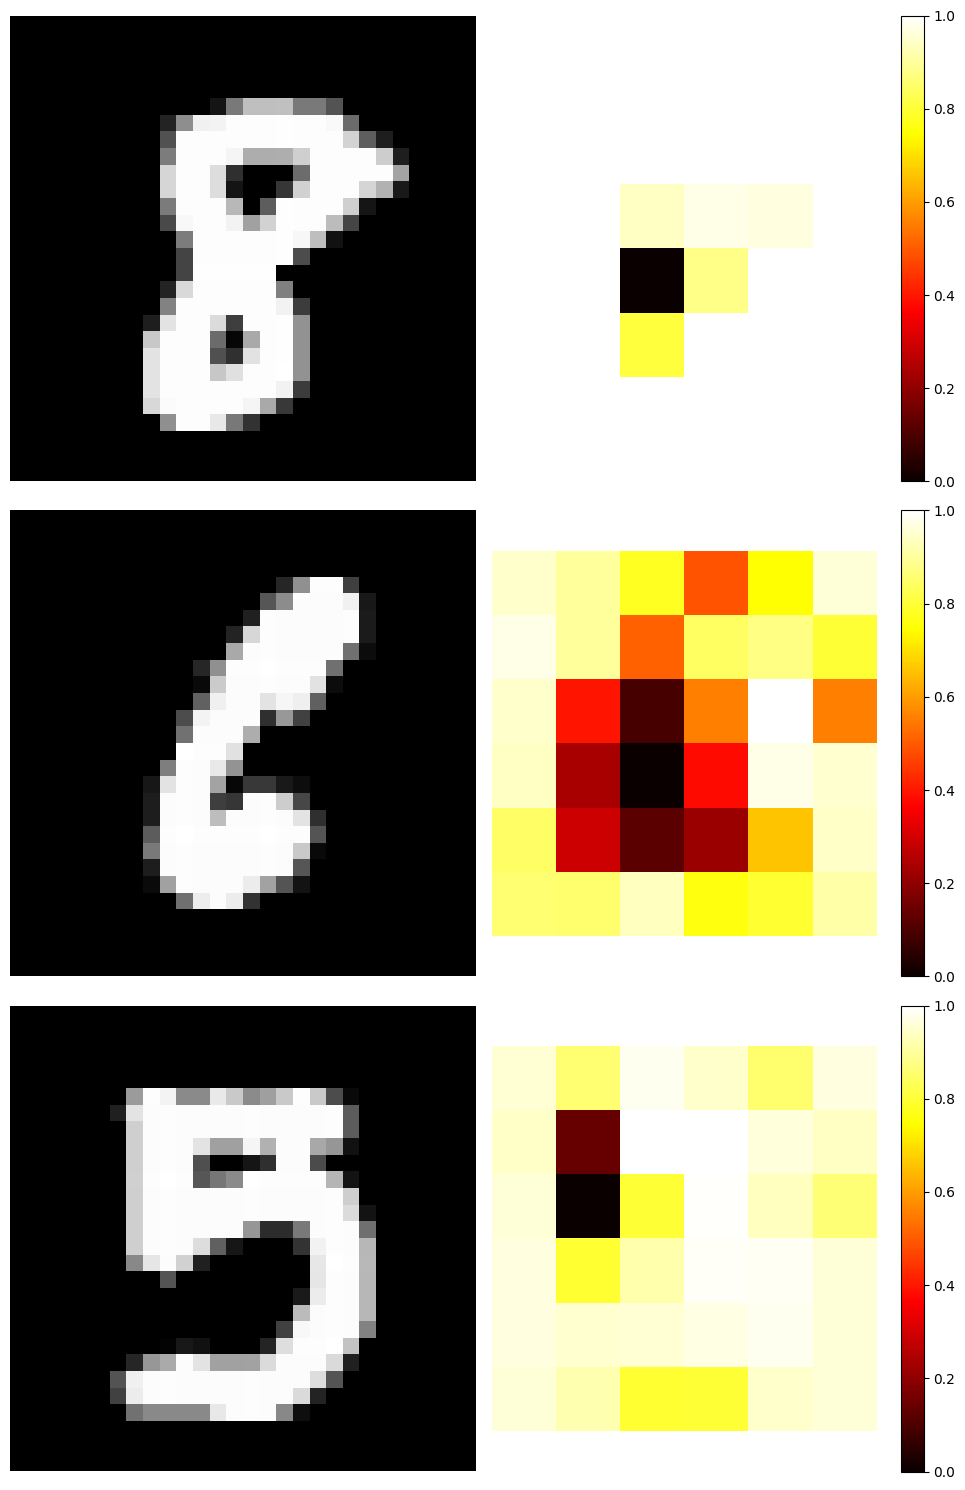

In [26]:
plot_occlusion_sensitivity(
    models["model_l2"].model, train_loader, num_images=3, occluder_size=8, stride=4
)

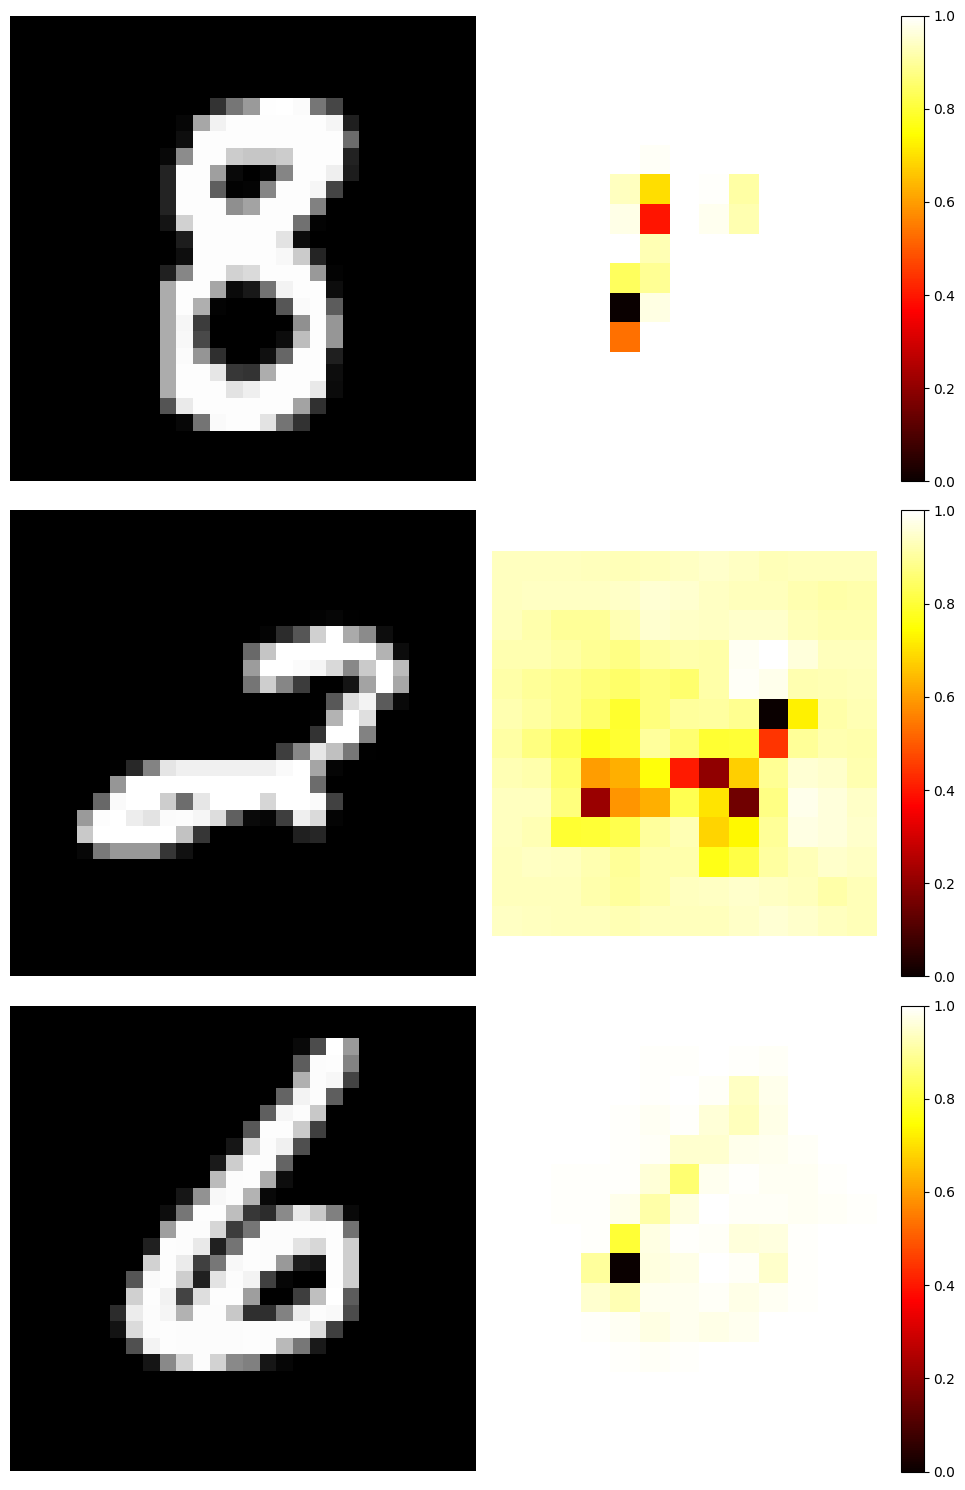

In [27]:
plot_occlusion_sensitivity(
    models["model_l2"].model, train_loader, num_images=3, occluder_size=4, stride=2
)

### Elastic Net Regularization (L1 and L2)

#### Plot of Losses and Accuracies

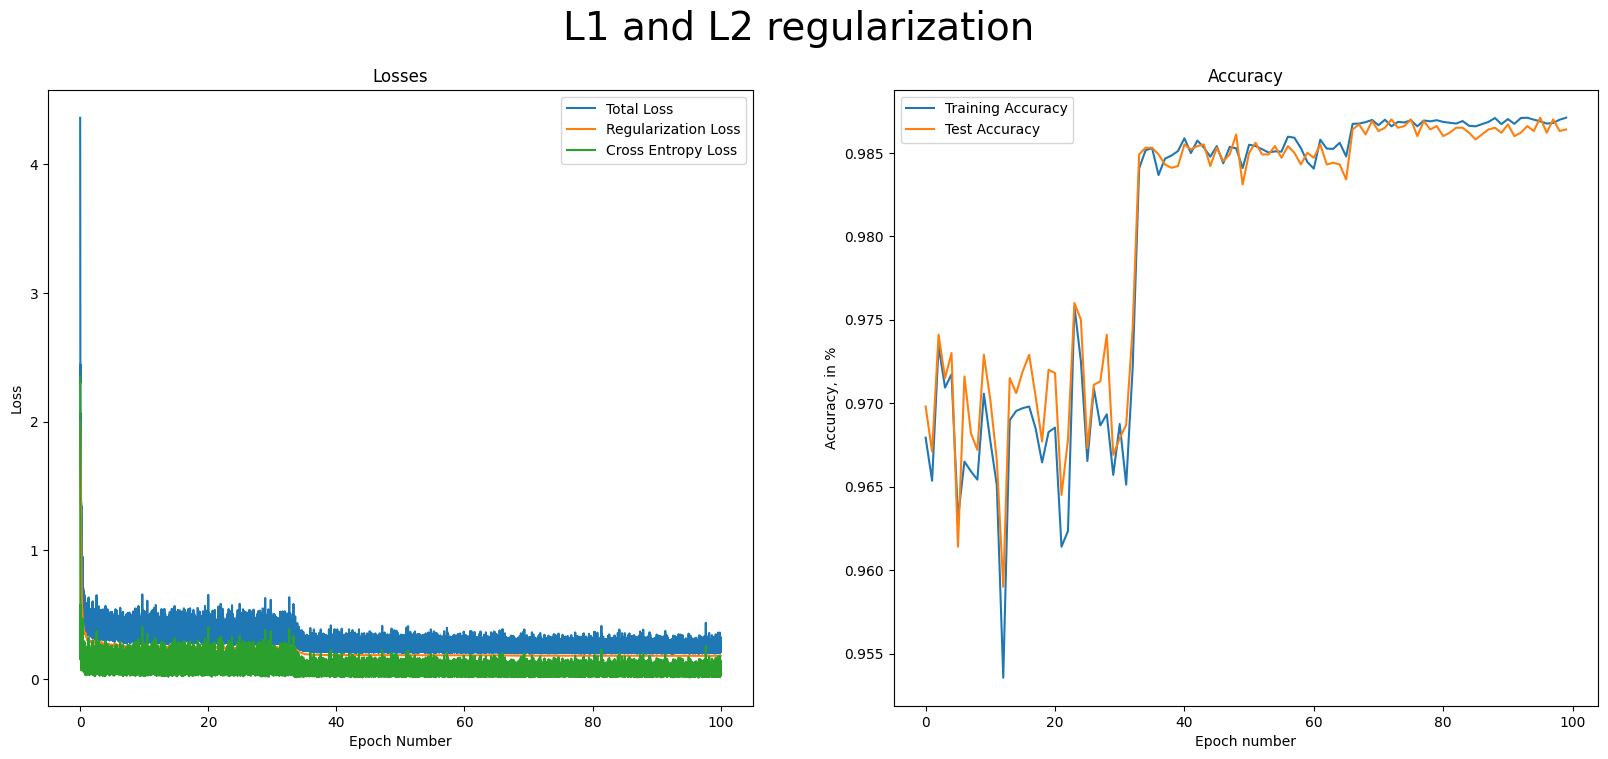

In [28]:
plot_reg_results(models, model_name="model_l1_l2", title="L1 and L2 regularization")

#### Plot of Weight Distributions

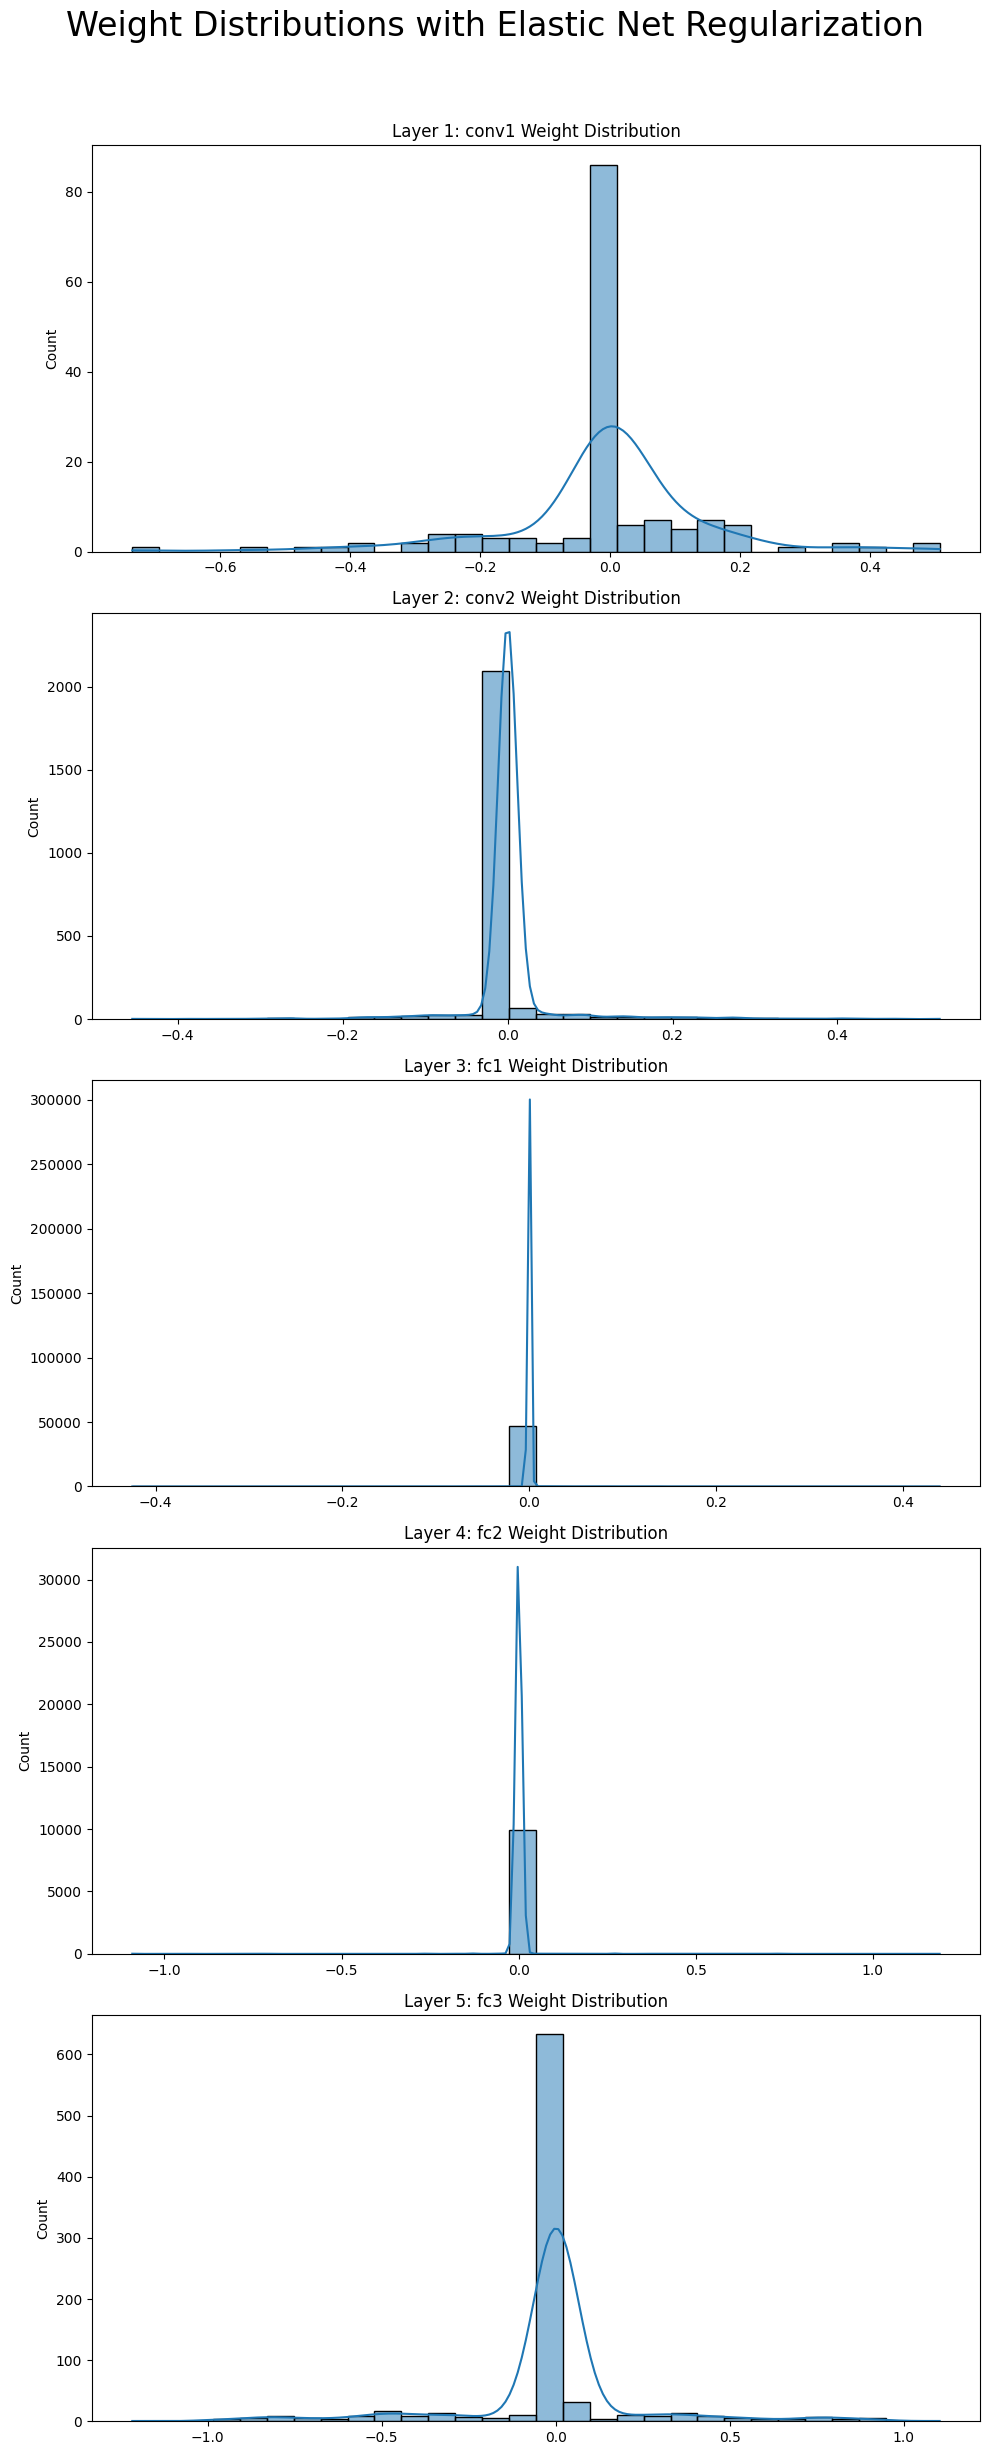

In [29]:
plot_weight_distributions(
    models["model_l1_l2"].model,
    title="Weight Distributions with Elastic Net Regularization",
)

#### Plots of Activation Maps

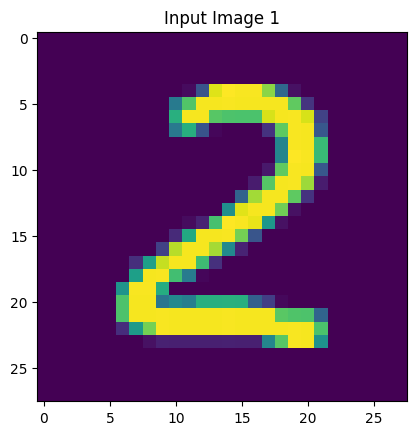

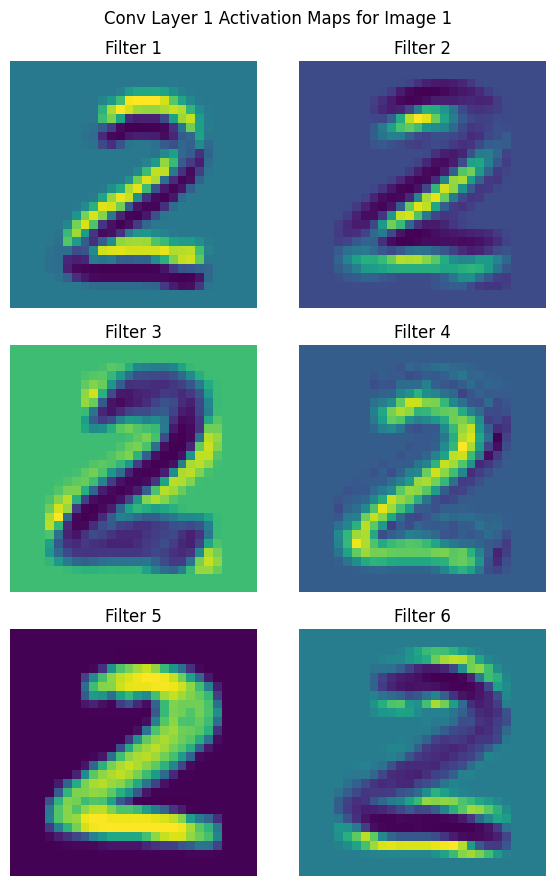

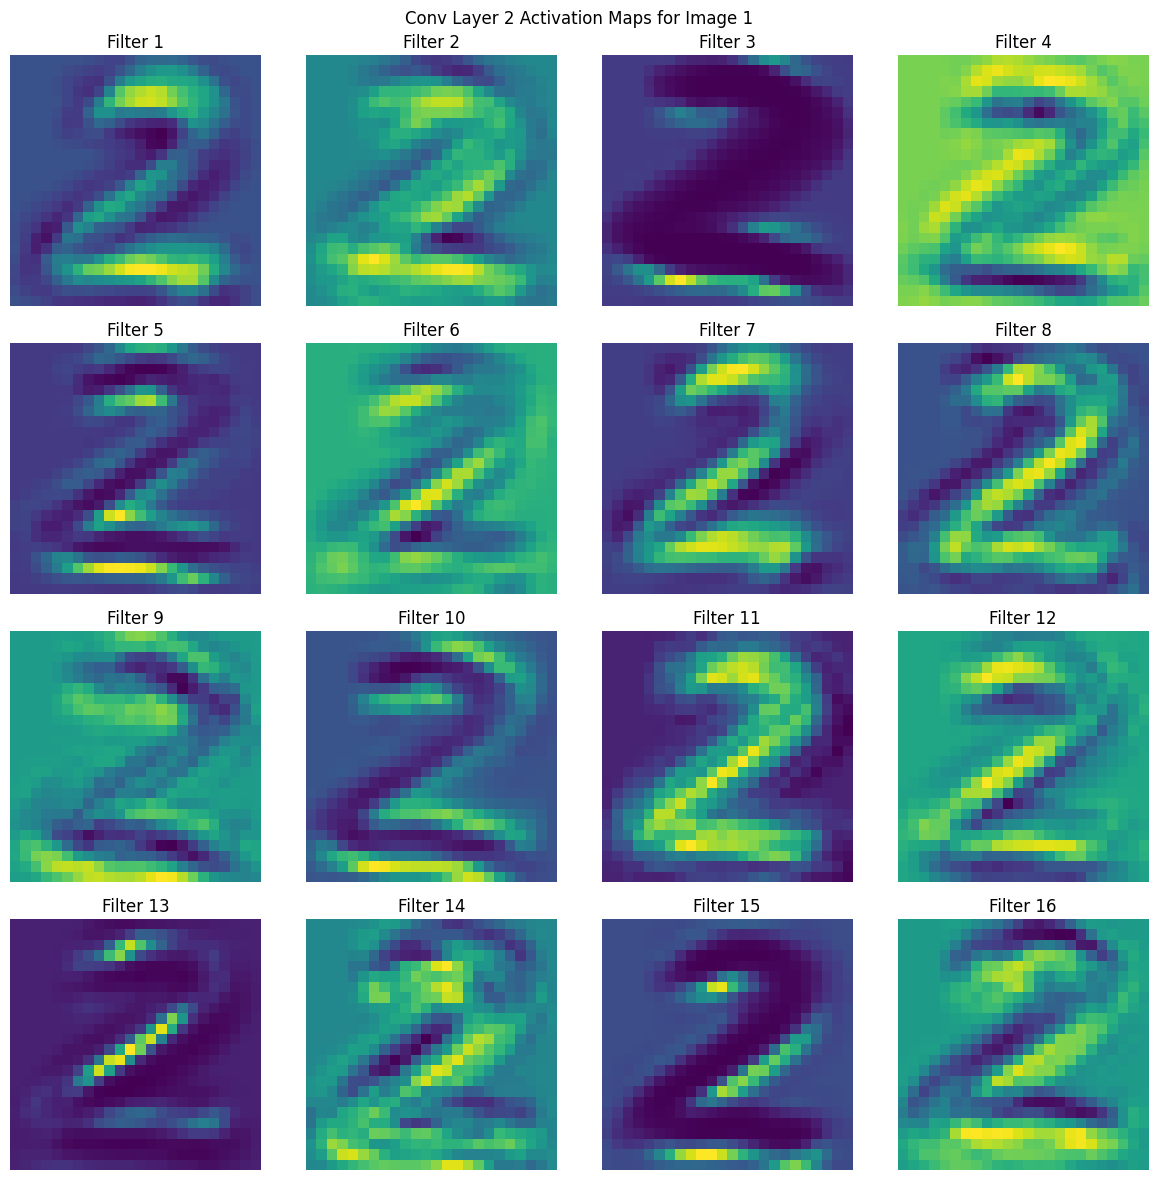

In [30]:
plot_activation_maps(models["model_l1_l2"].model, train_loader, num_images=1)

#### Plot of PCA of Activations

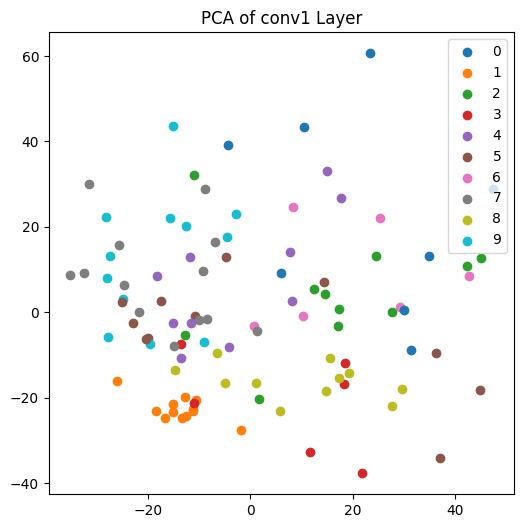

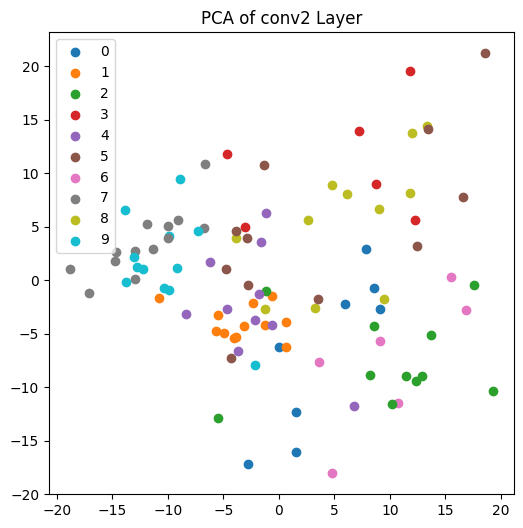

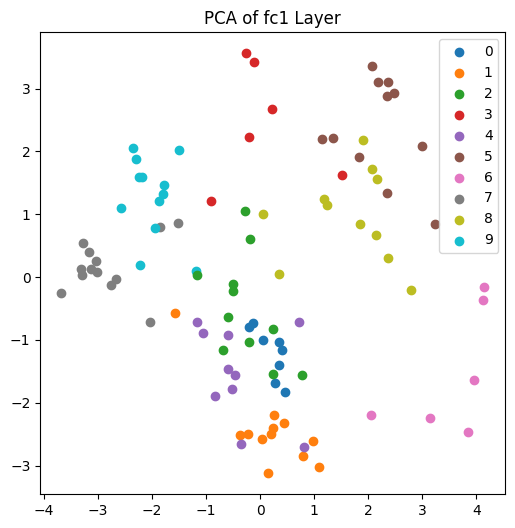

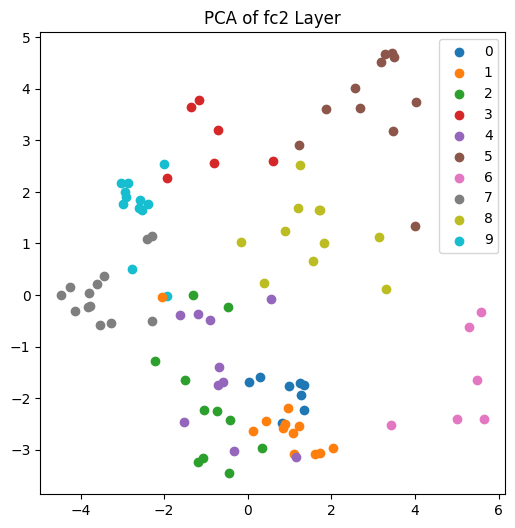

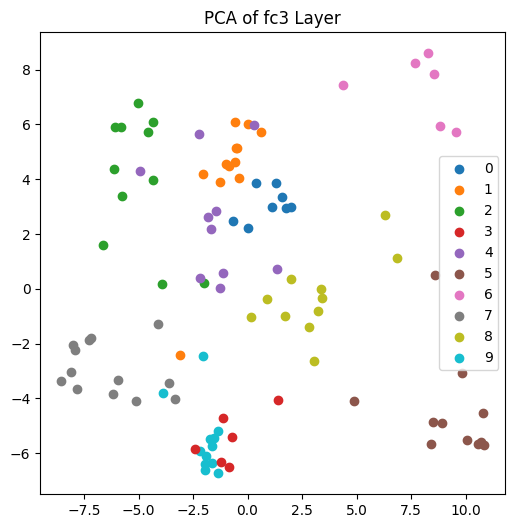

In [31]:
plot_activations_pca(models["model_l1_l2"].model, train_loader, device)

#### Plot of t-SNE of Activations

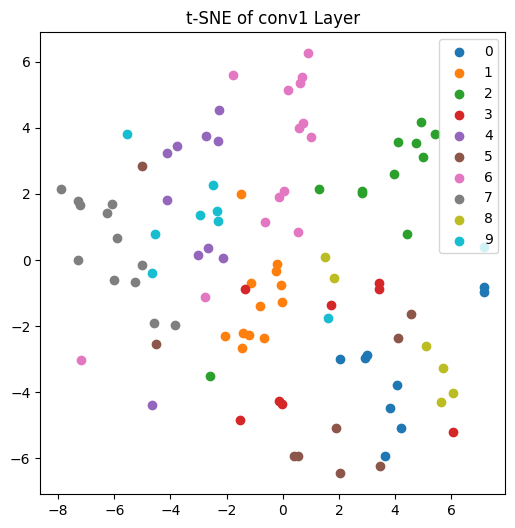

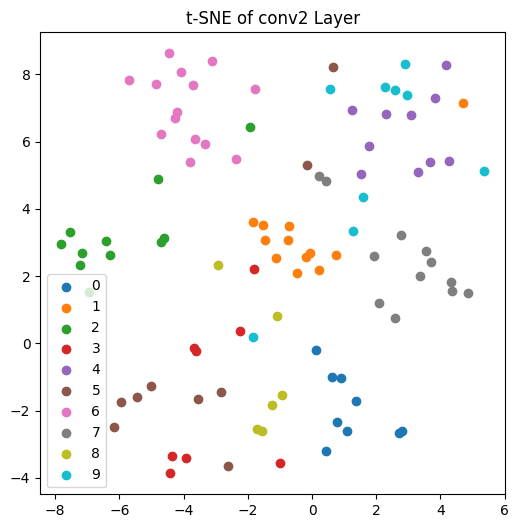

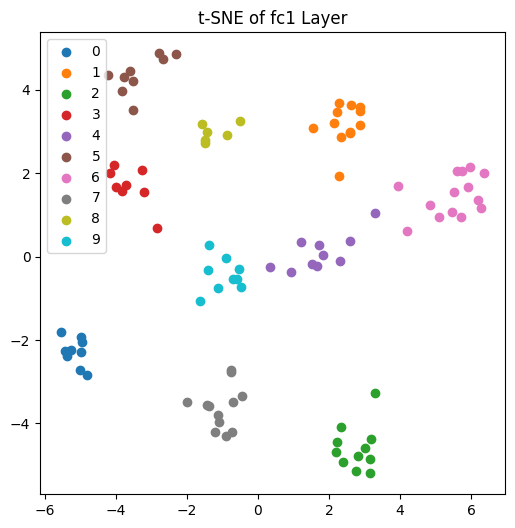

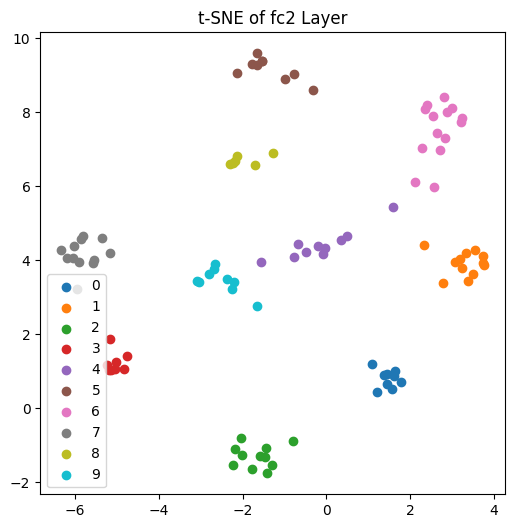

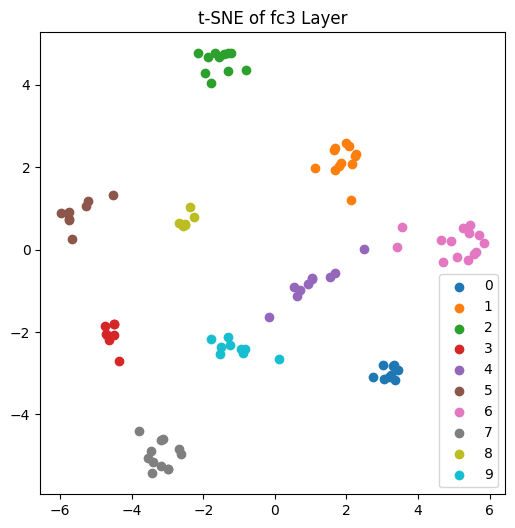

In [32]:
plot_activations_tsne(models["model_l1_l2"].model, train_loader, device)

#### Plots of Saliency Maps

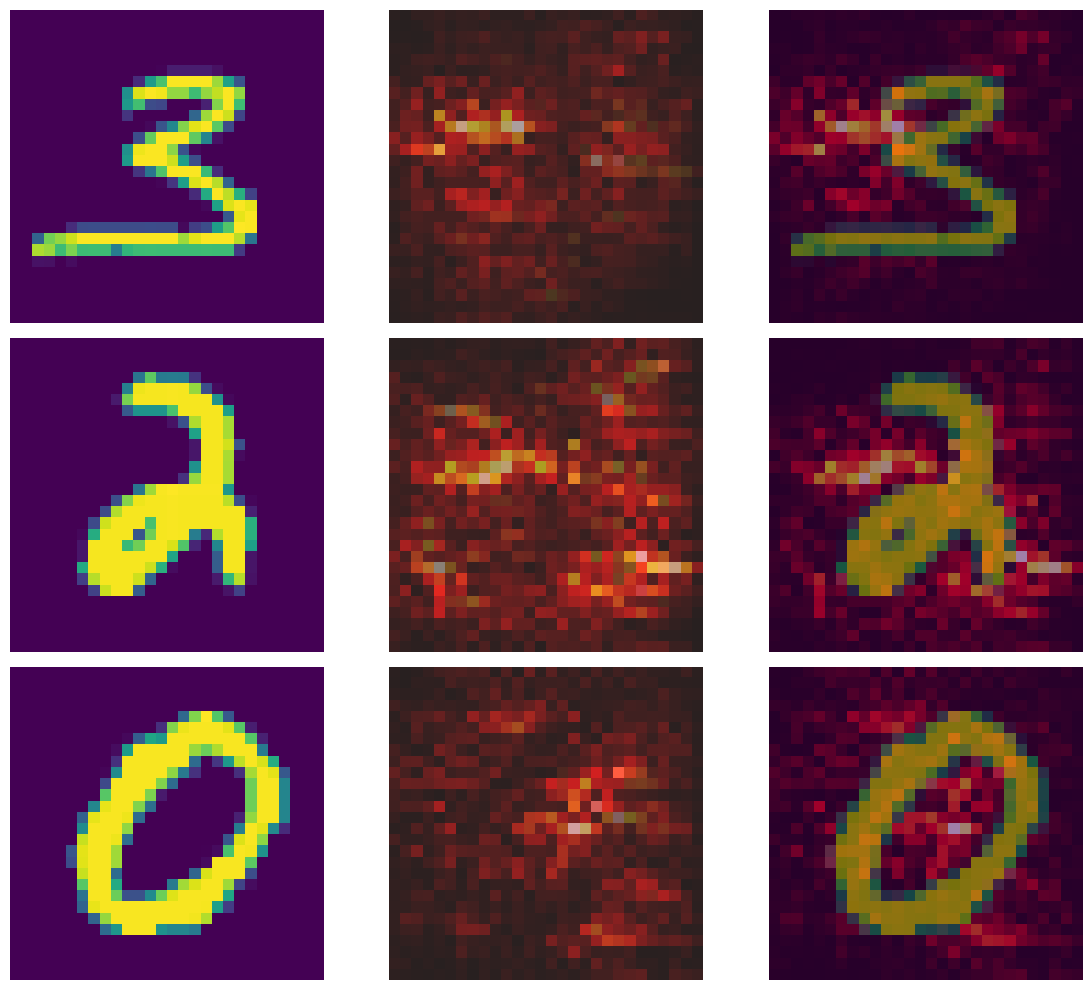

In [33]:
plot_saliency_maps(models["model_l1_l2"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

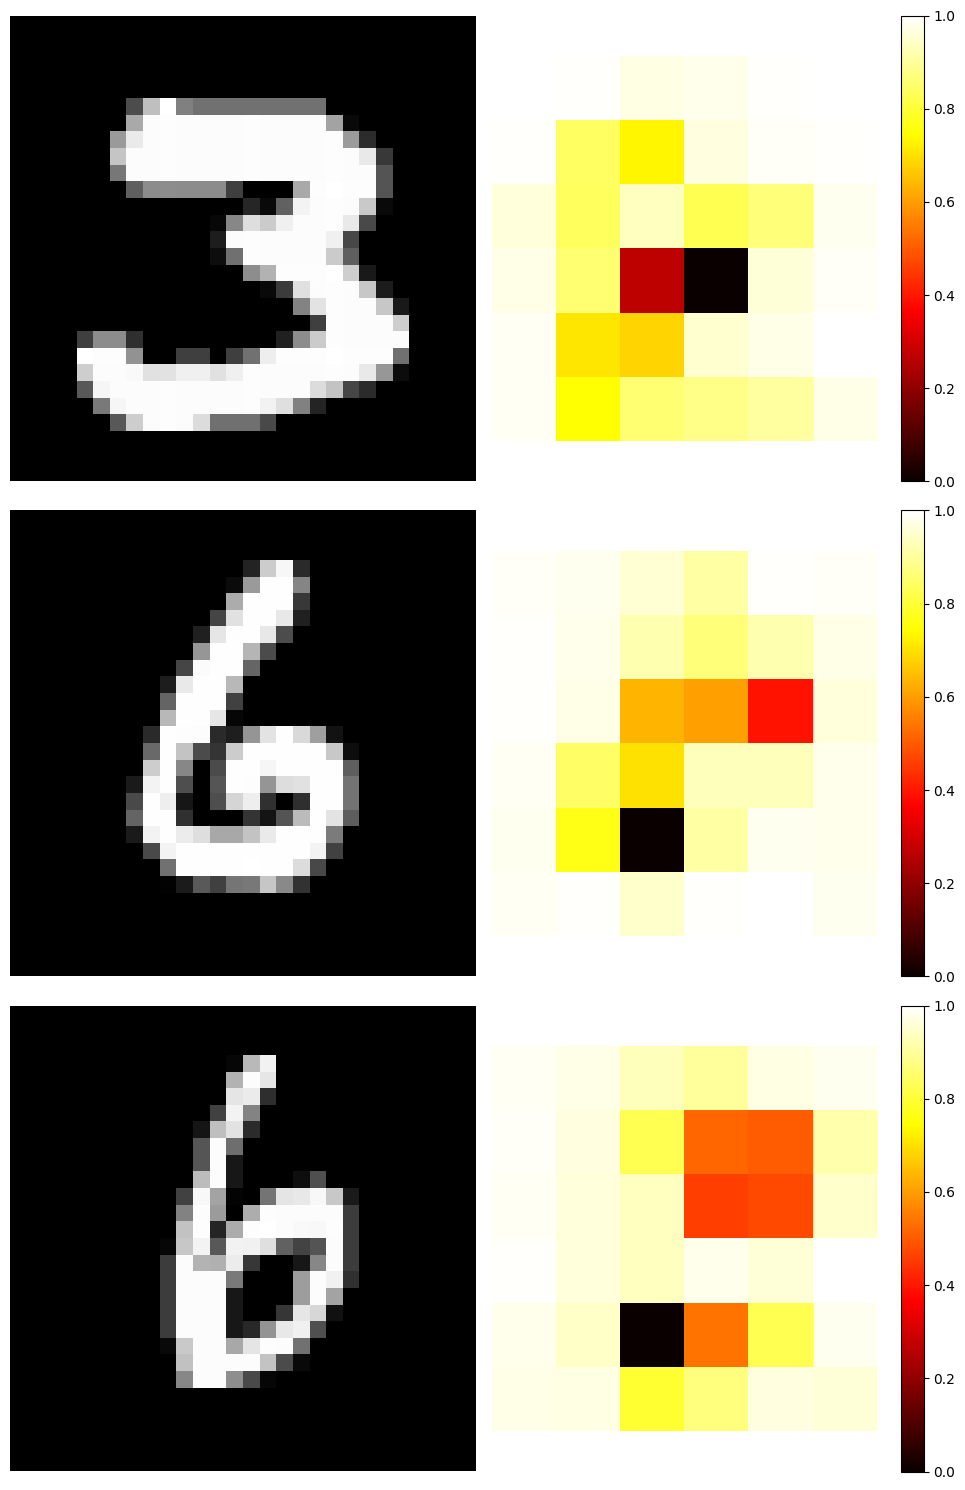

In [34]:
plot_occlusion_sensitivity(
    models["model_l1_l2"].model, train_loader, num_images=3, occluder_size=8, stride=4
)

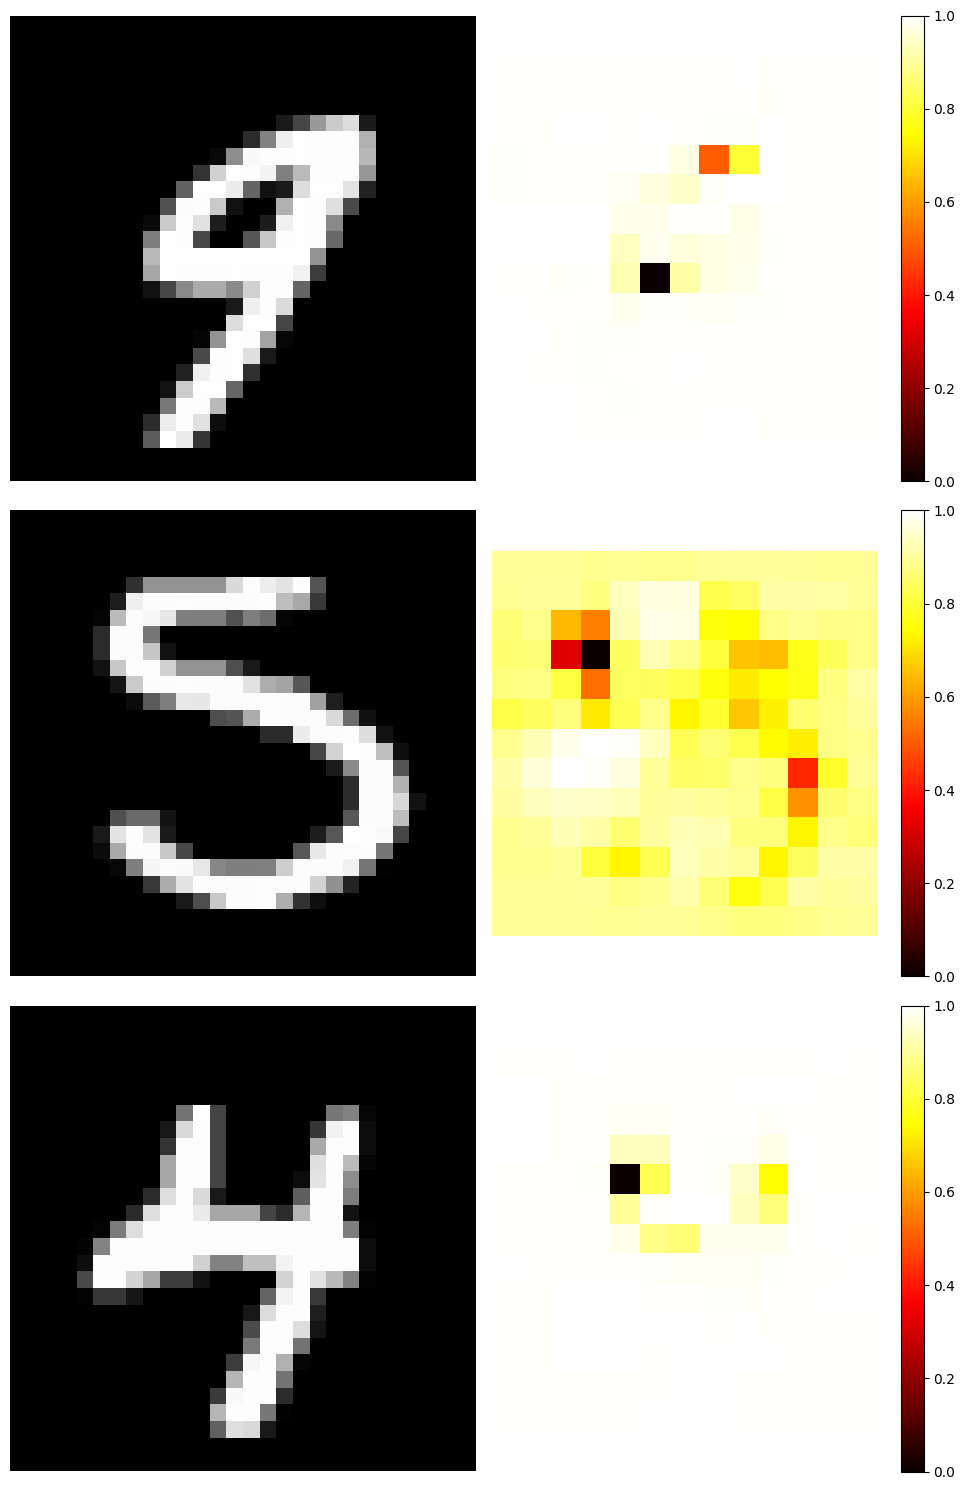

In [35]:
plot_occlusion_sensitivity(
    models["model_l1_l2"].model, train_loader, num_images=3, occluder_size=4, stride=2
)

### Soft SVB Regularization

#### Plot of Losses and Accuracies

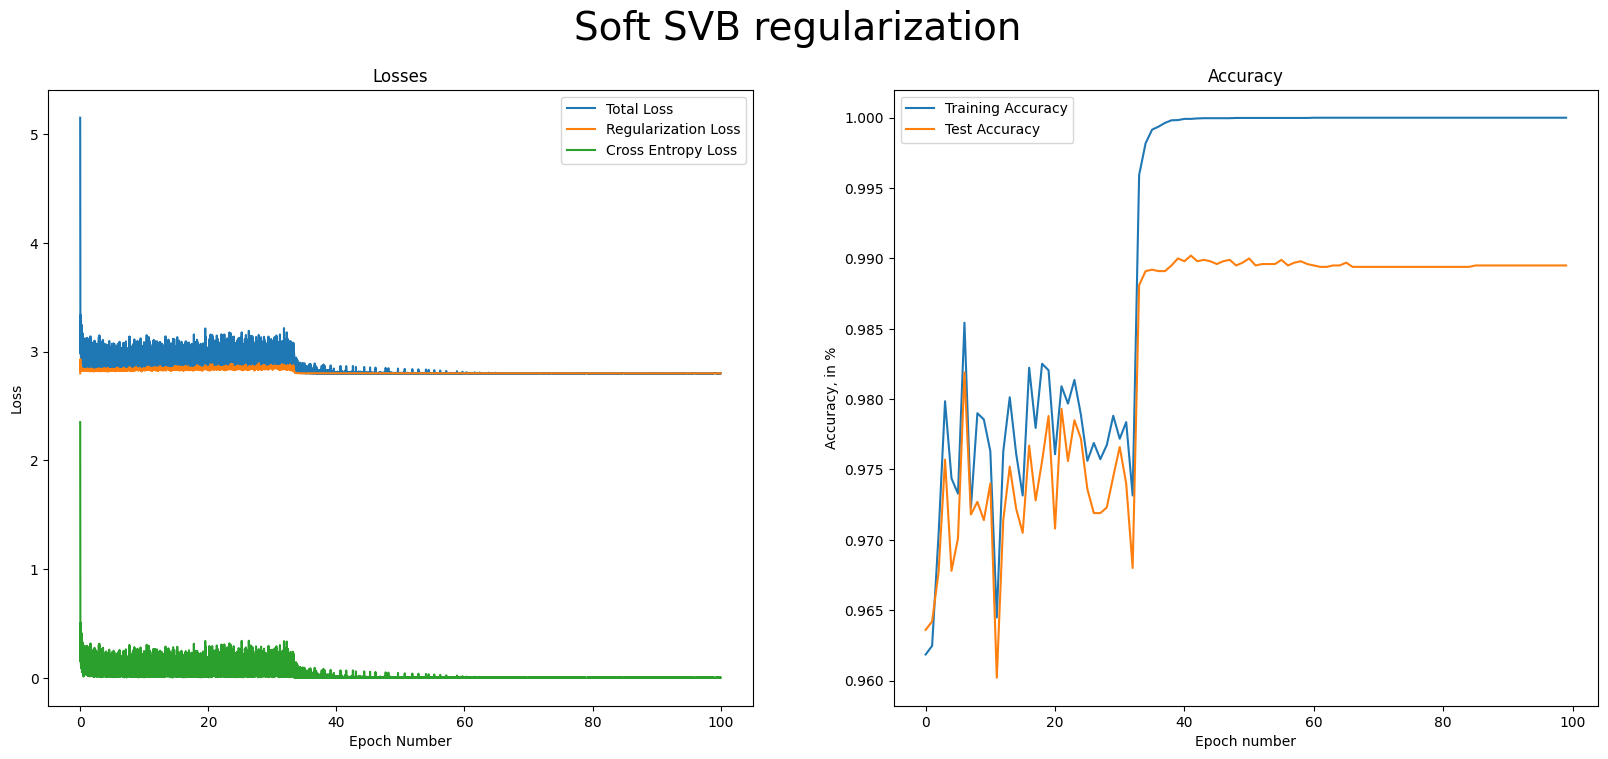

In [36]:
plot_reg_results(models, model_name="model_soft_svb", title="Soft SVB regularization")

#### Plots of Activation Maps

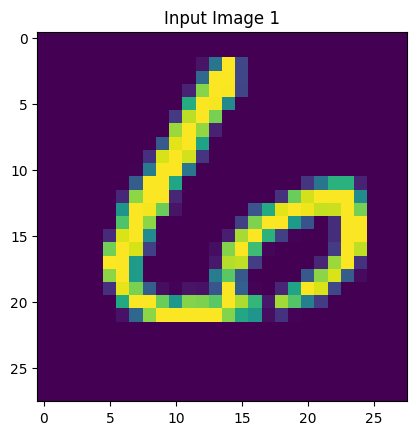

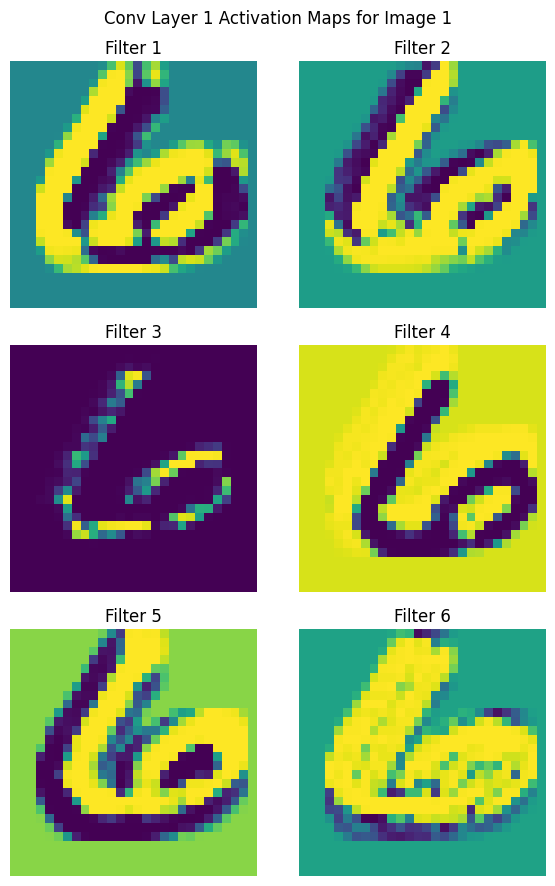

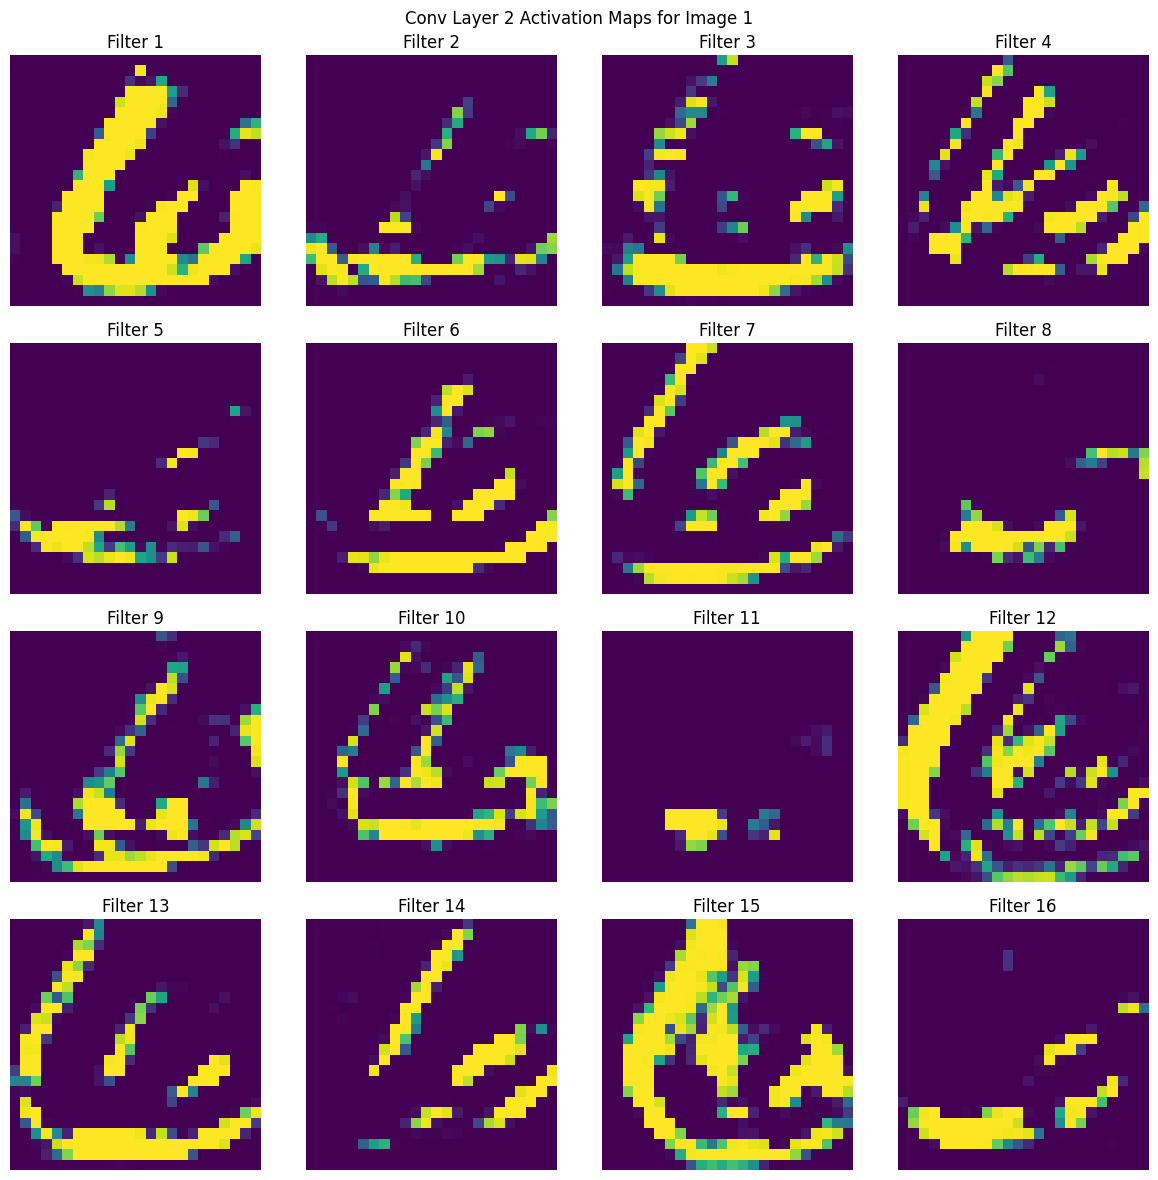

In [37]:
plot_activation_maps(models["model_soft_svb"].model, train_loader, num_images=1)

#### Plot of PCA of Activations

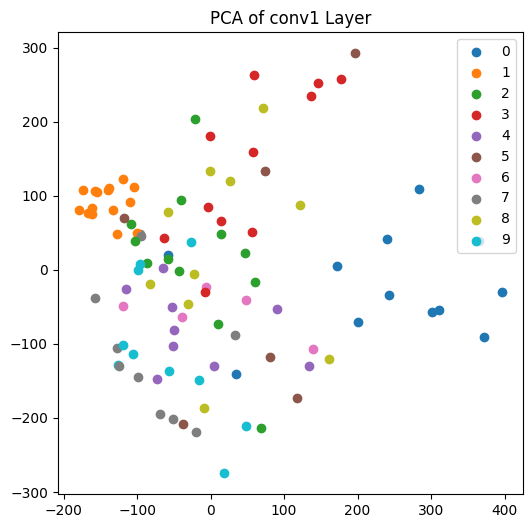

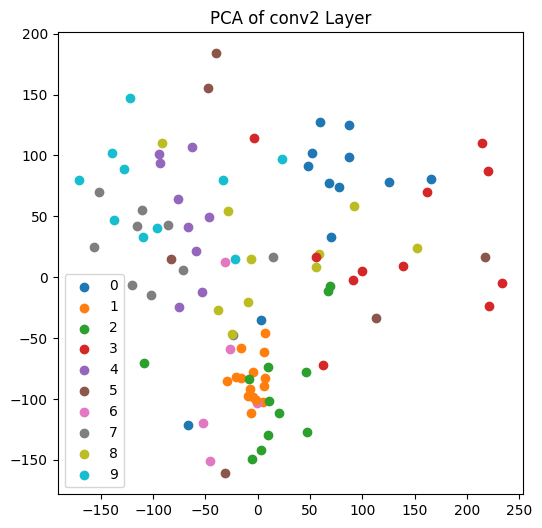

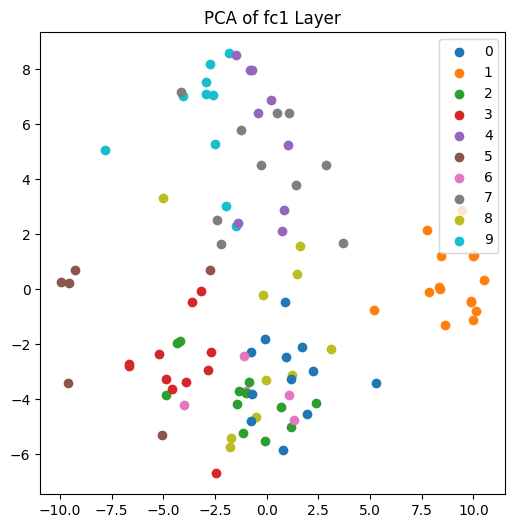

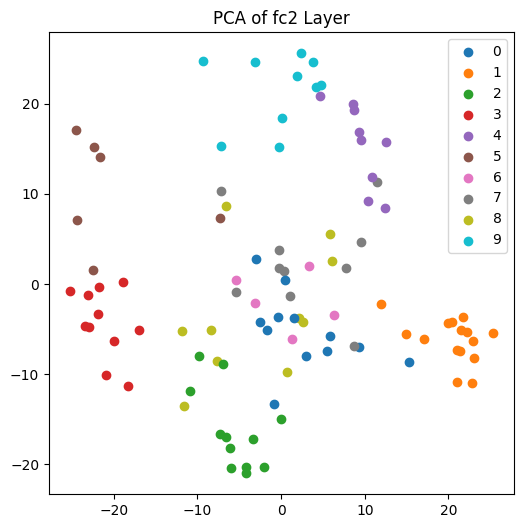

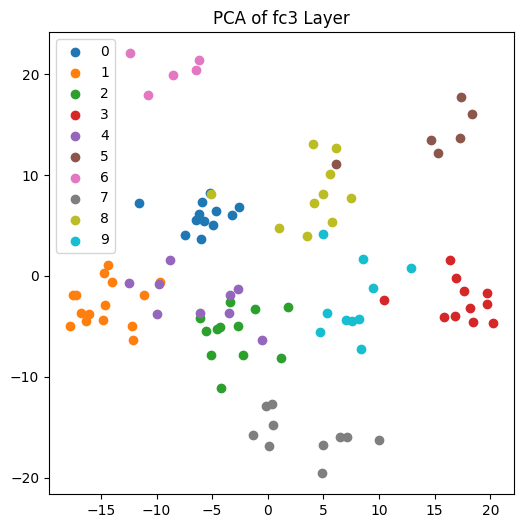

In [38]:
plot_activations_pca(models["model_soft_svb"].model, train_loader, device)

#### Plot of t-SNE of Activations

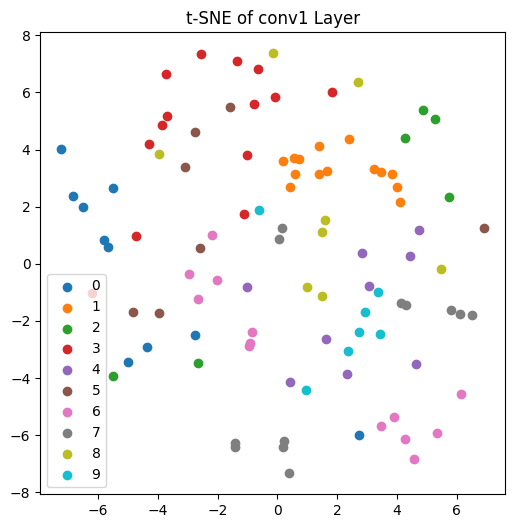

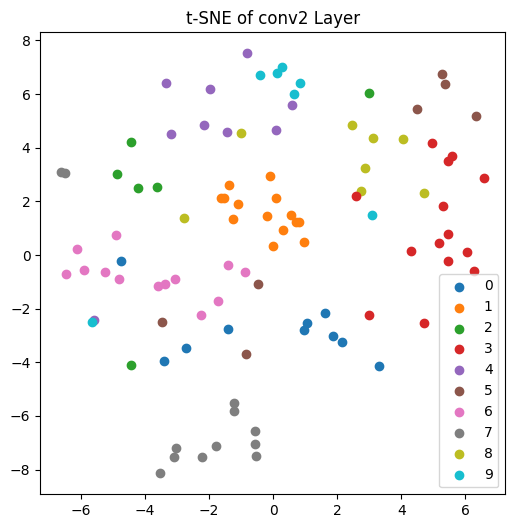

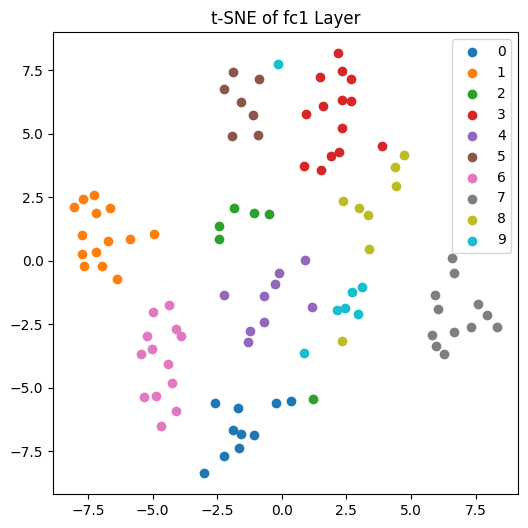

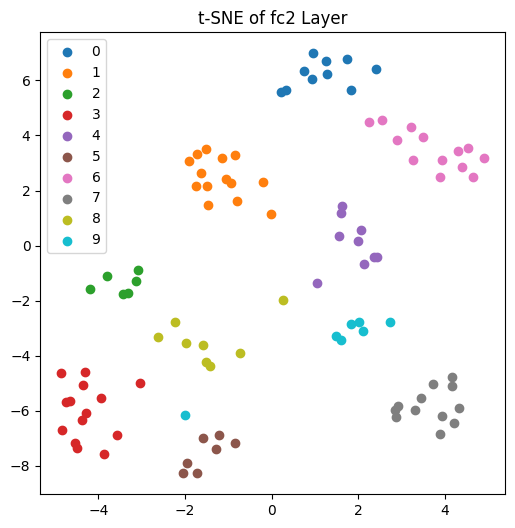

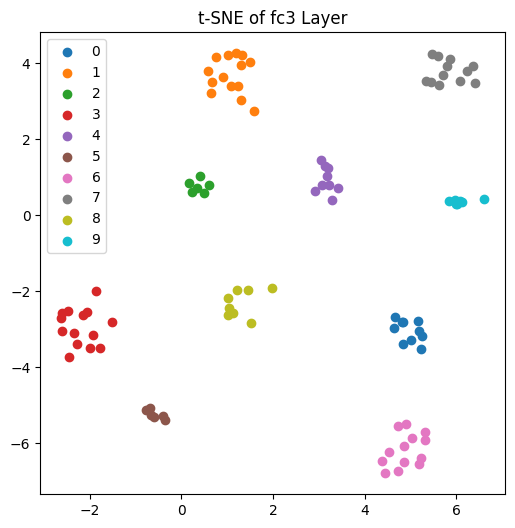

In [39]:
plot_activations_tsne(models["model_soft_svb"].model, train_loader, device)

#### Plots of Saliency Maps

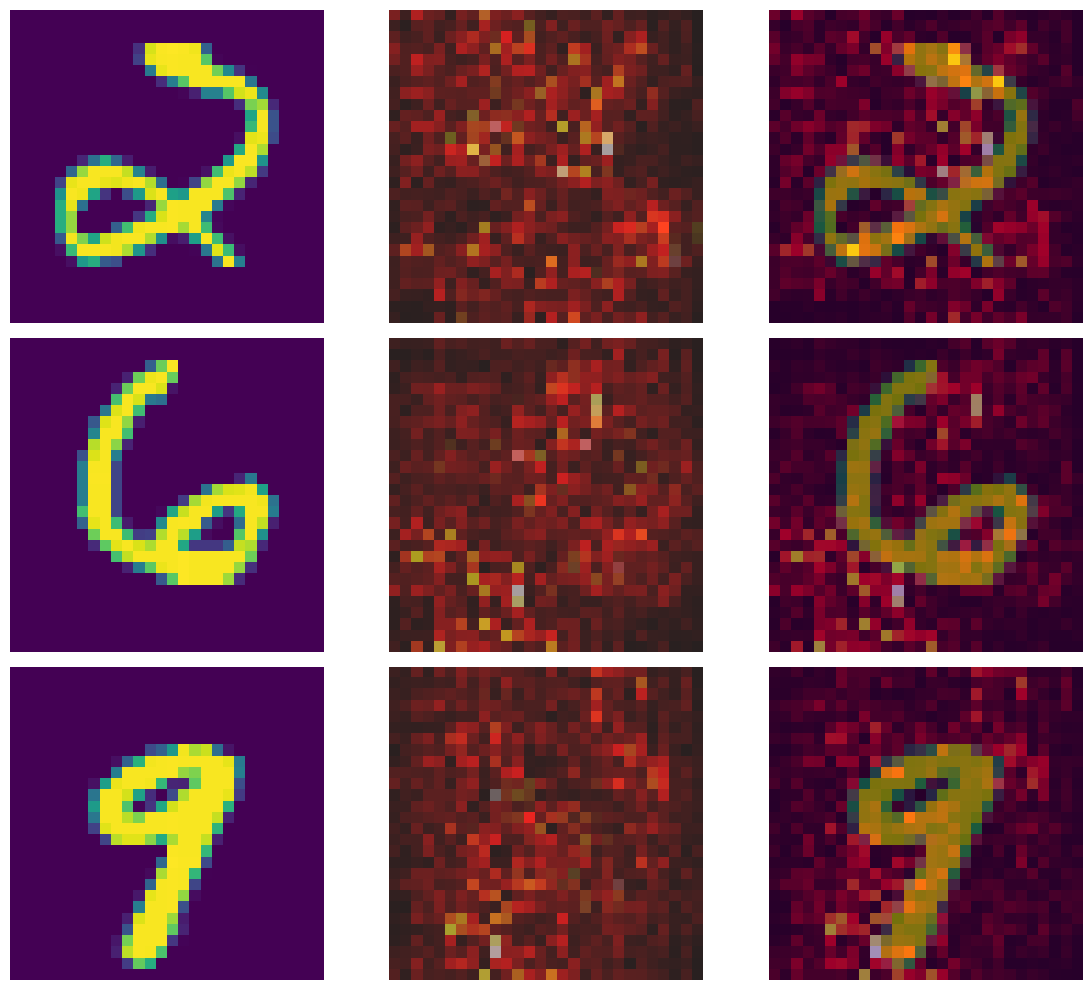

In [40]:
plot_saliency_maps(models["model_soft_svb"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

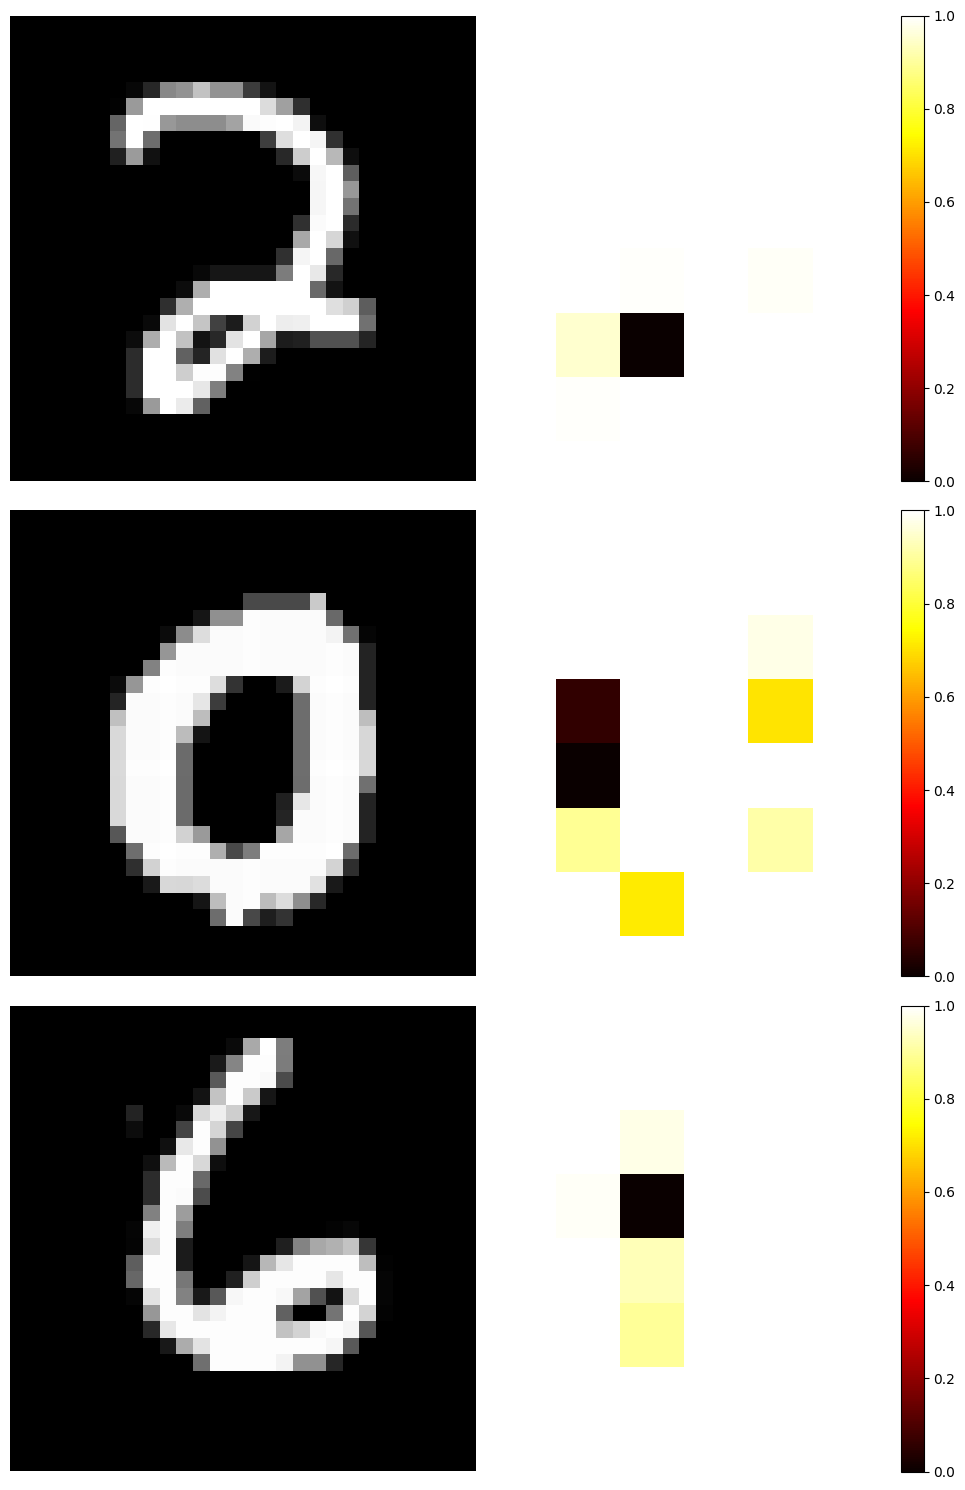

In [41]:
plot_occlusion_sensitivity(
    models["model_soft_svb"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

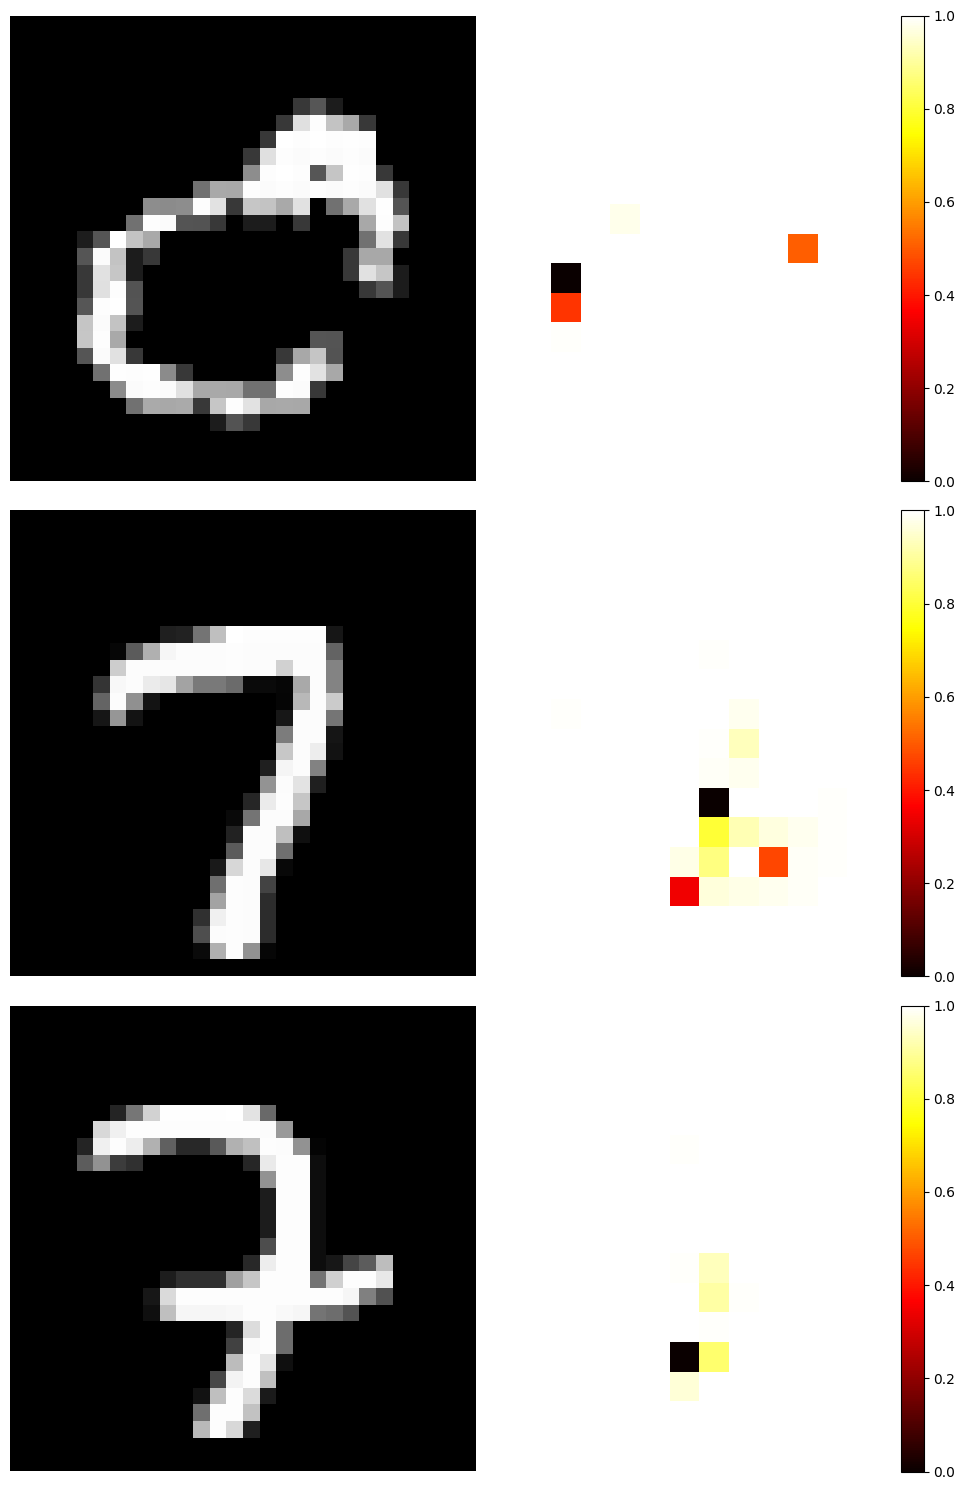

In [42]:
plot_occlusion_sensitivity(
    models["model_soft_svb"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

### SVB Regularization

#### Plot of Losses and Accuracies

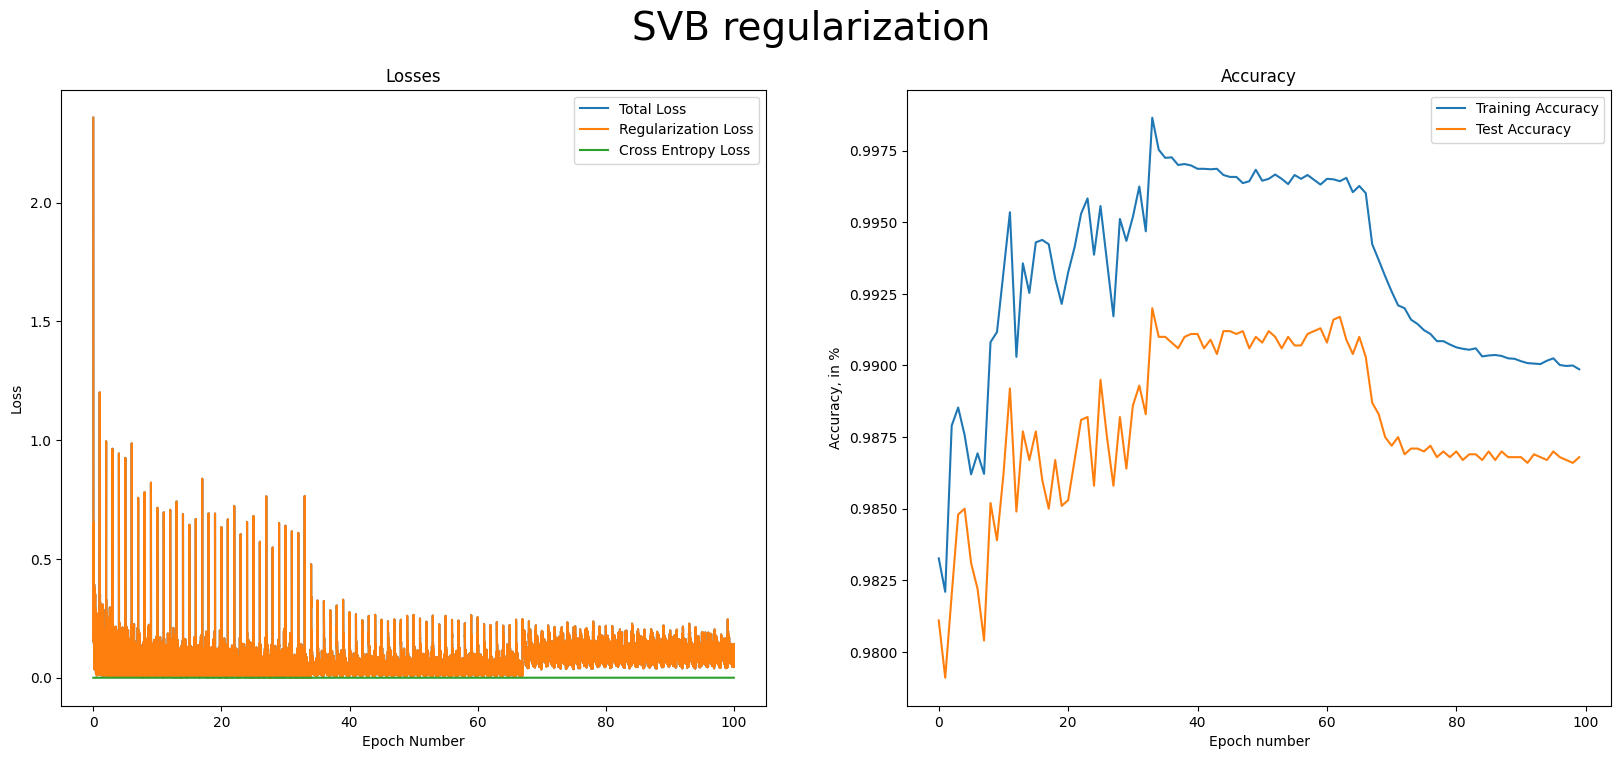

In [43]:
plot_reg_results(models, model_name="model_svb", title="SVB regularization")

#### Plots of Activation Maps

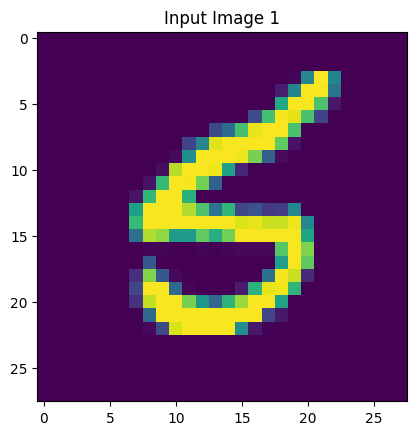

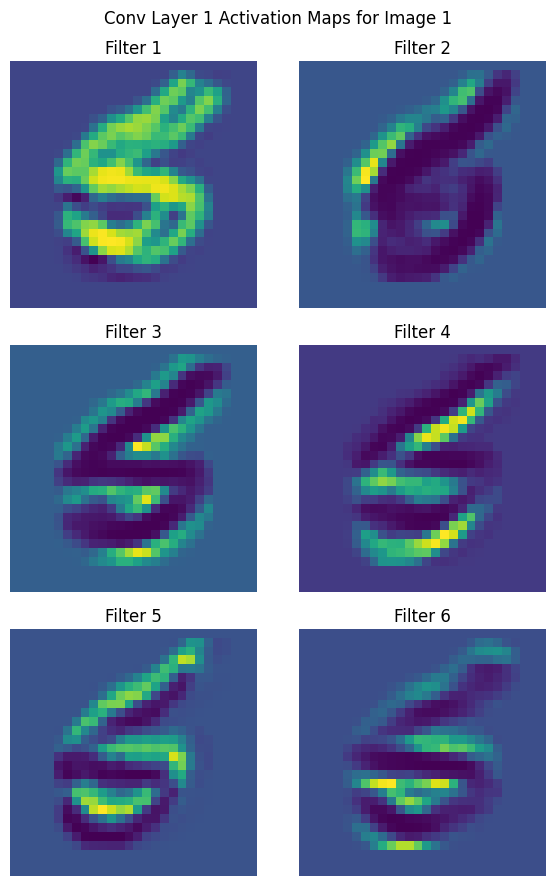

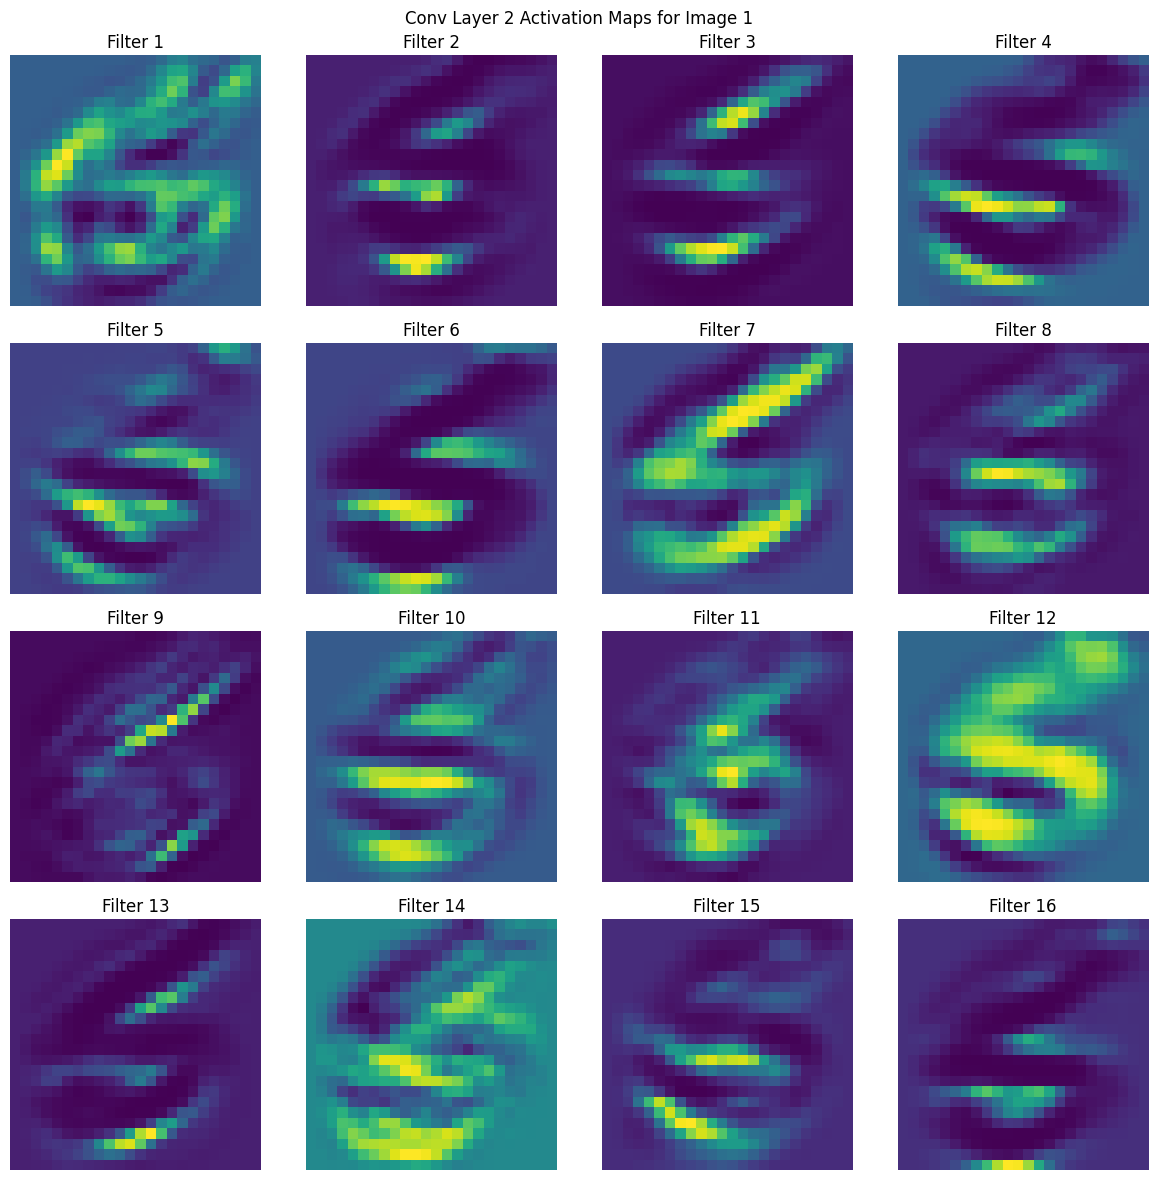

In [44]:
plot_activation_maps(models["model_svb"].model, train_loader, num_images=1)

#### Plot of PCA of Activations

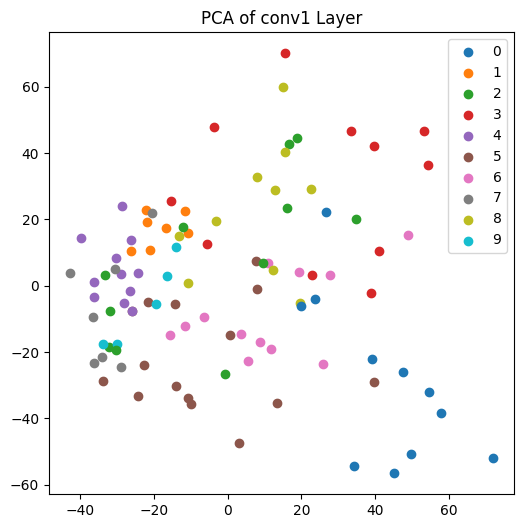

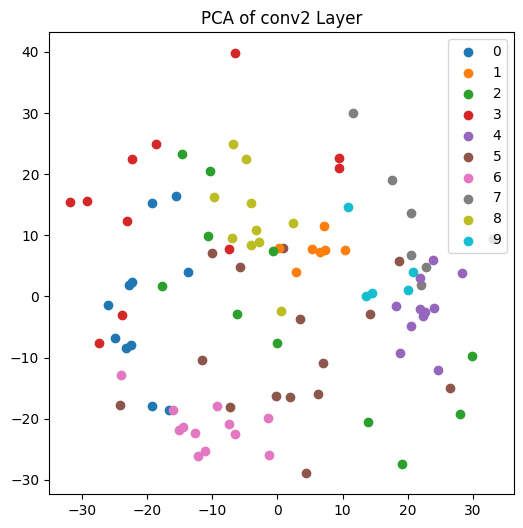

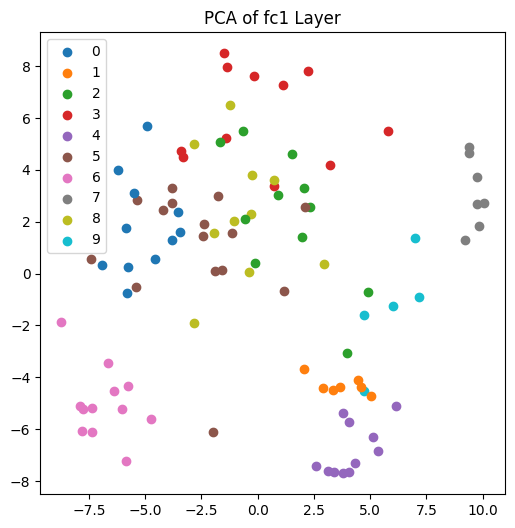

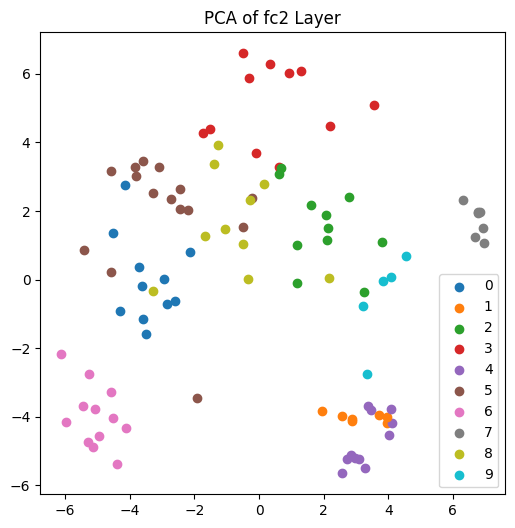

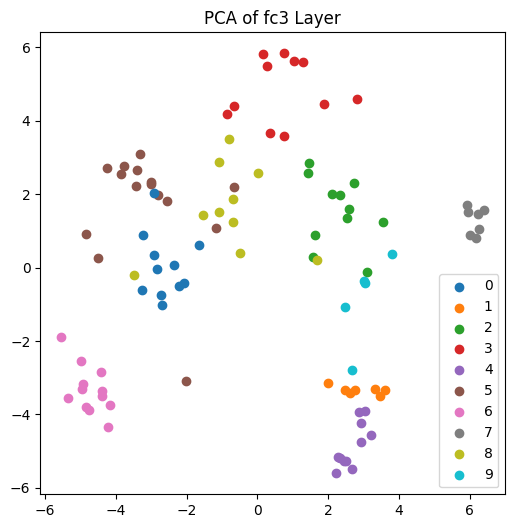

In [45]:
plot_activations_pca(models["model_svb"].model, train_loader, device)

#### Plot of t-SNE of Activations

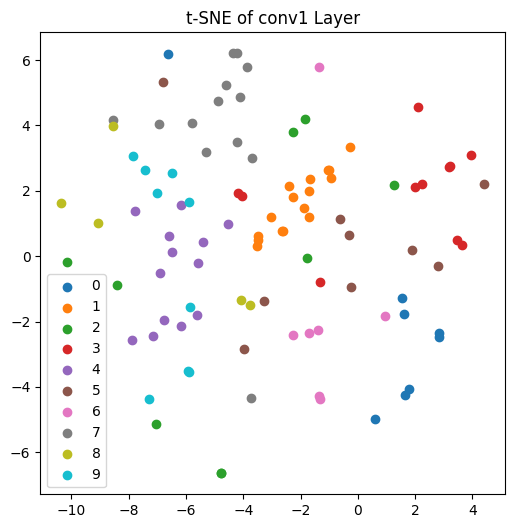

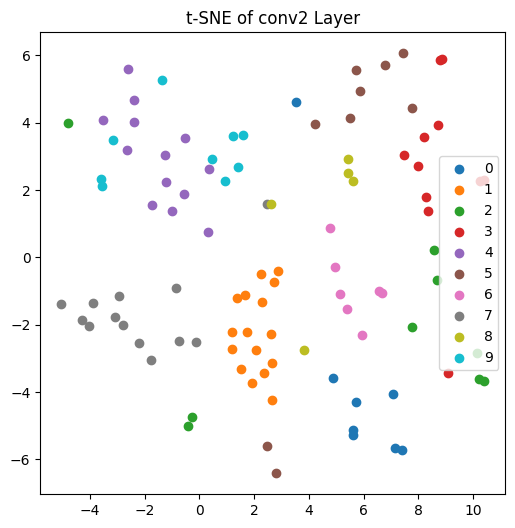

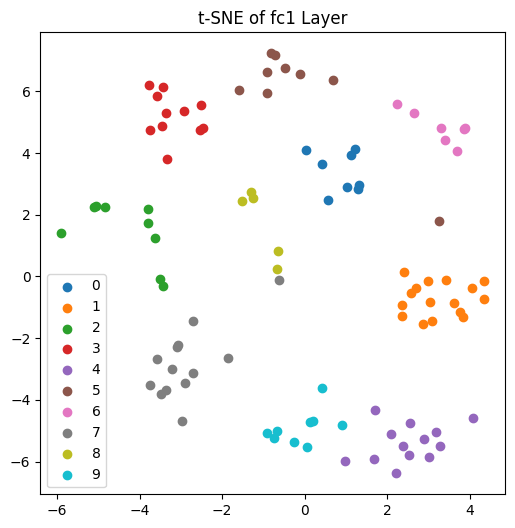

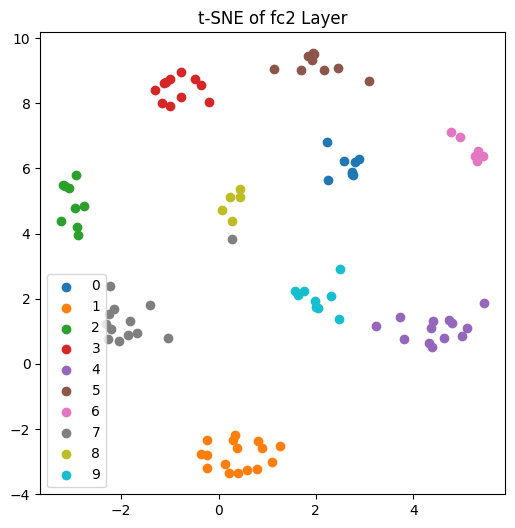

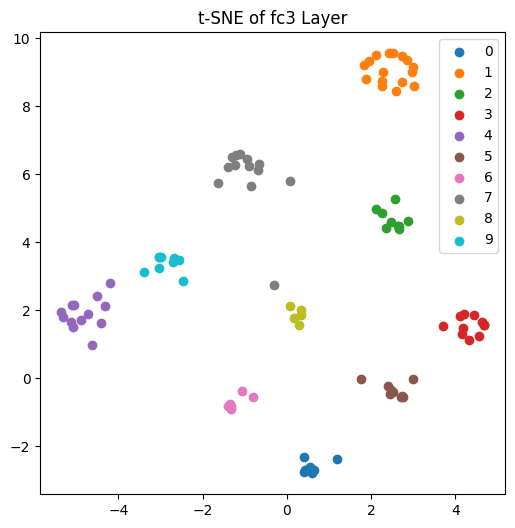

In [46]:
plot_activations_tsne(models["model_svb"].model, train_loader, device)

#### Plots of Saliency Maps

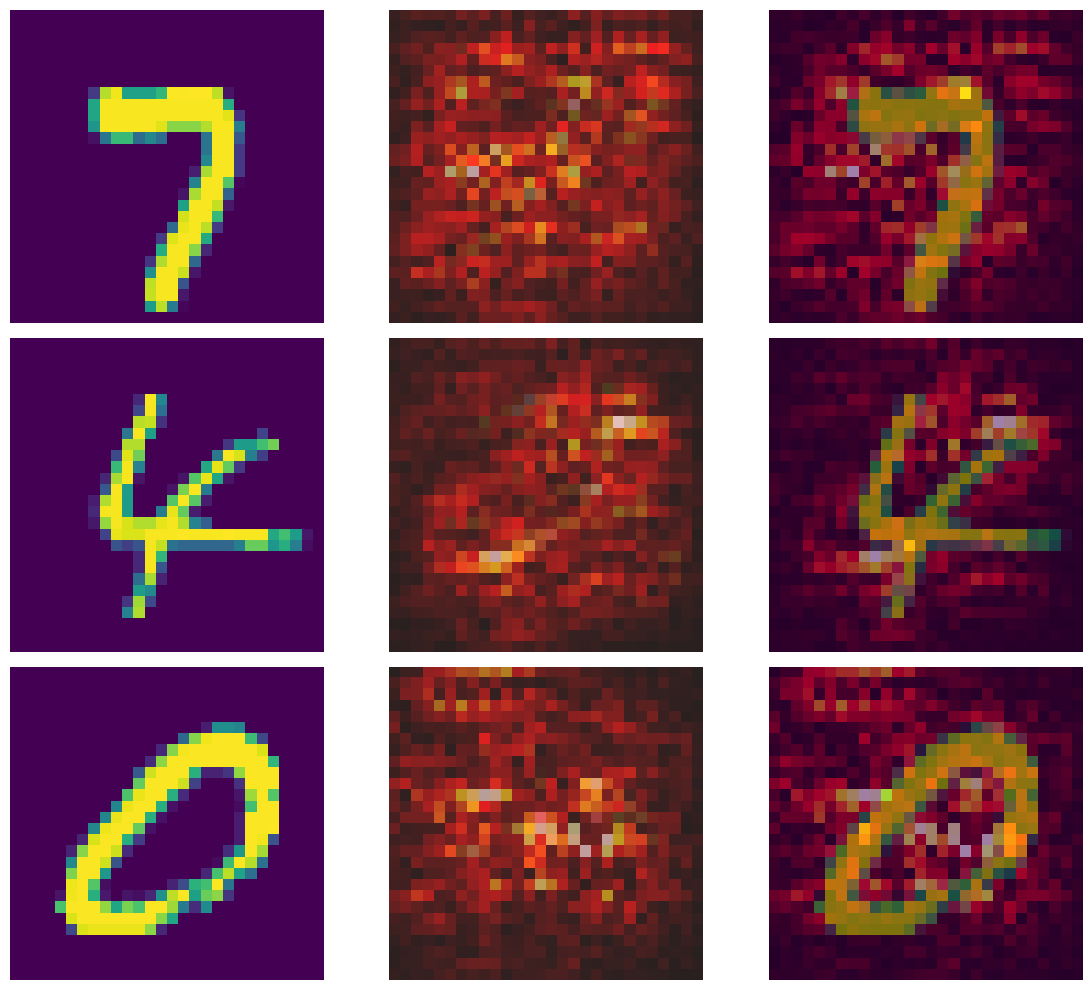

In [47]:
plot_saliency_maps(models["model_svb"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

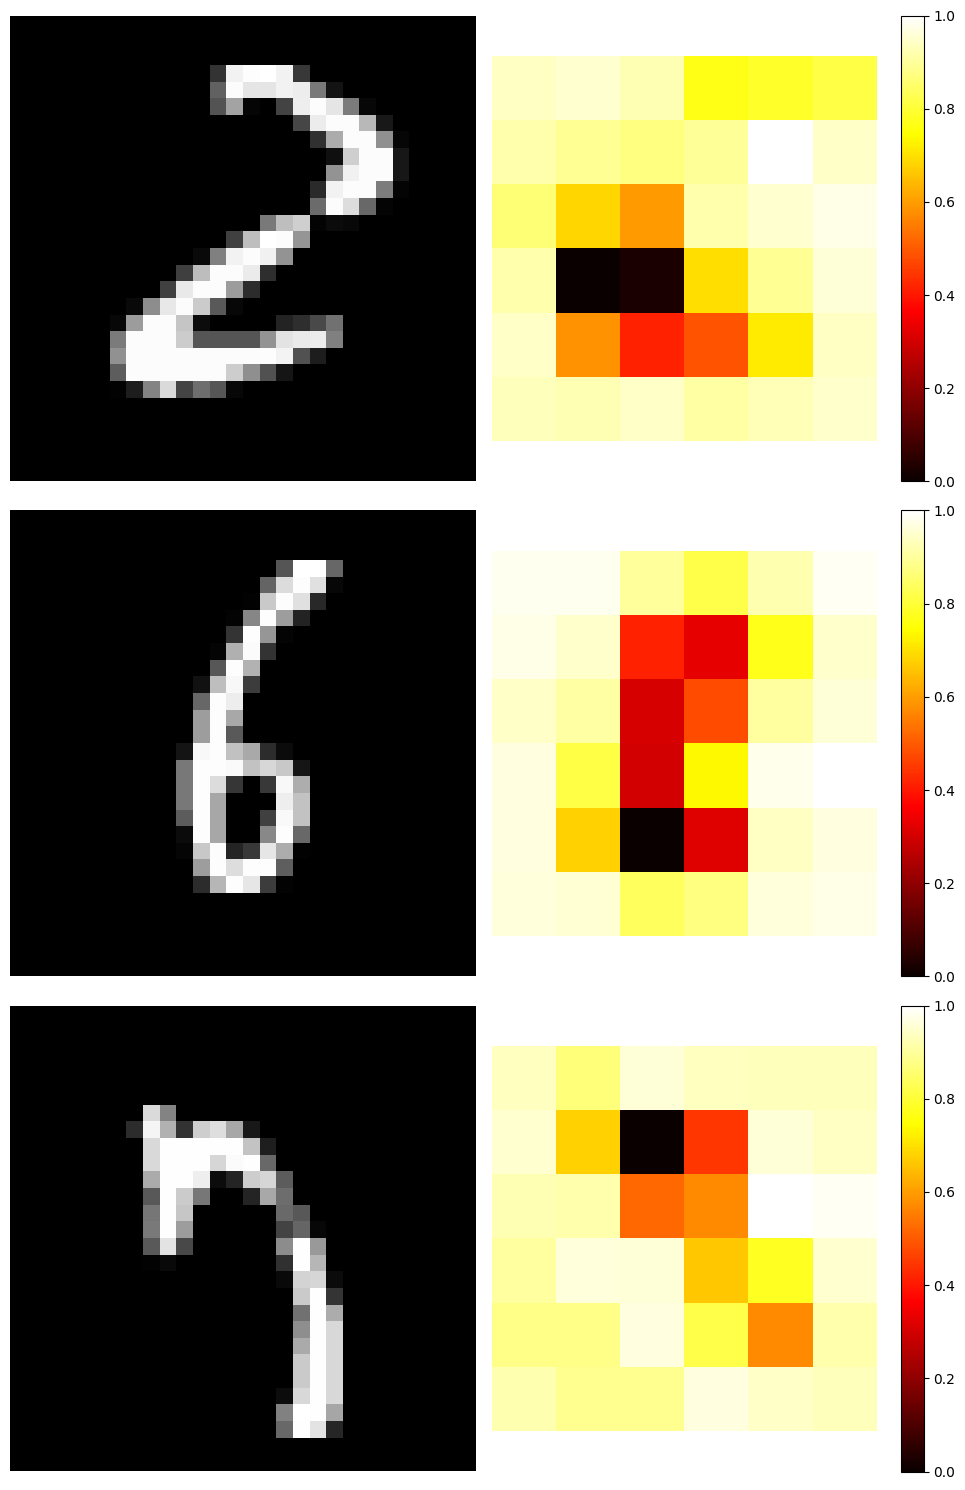

In [48]:
plot_occlusion_sensitivity(
    models["model_svb"].model, train_loader, num_images=3, occluder_size=8, stride=4
)

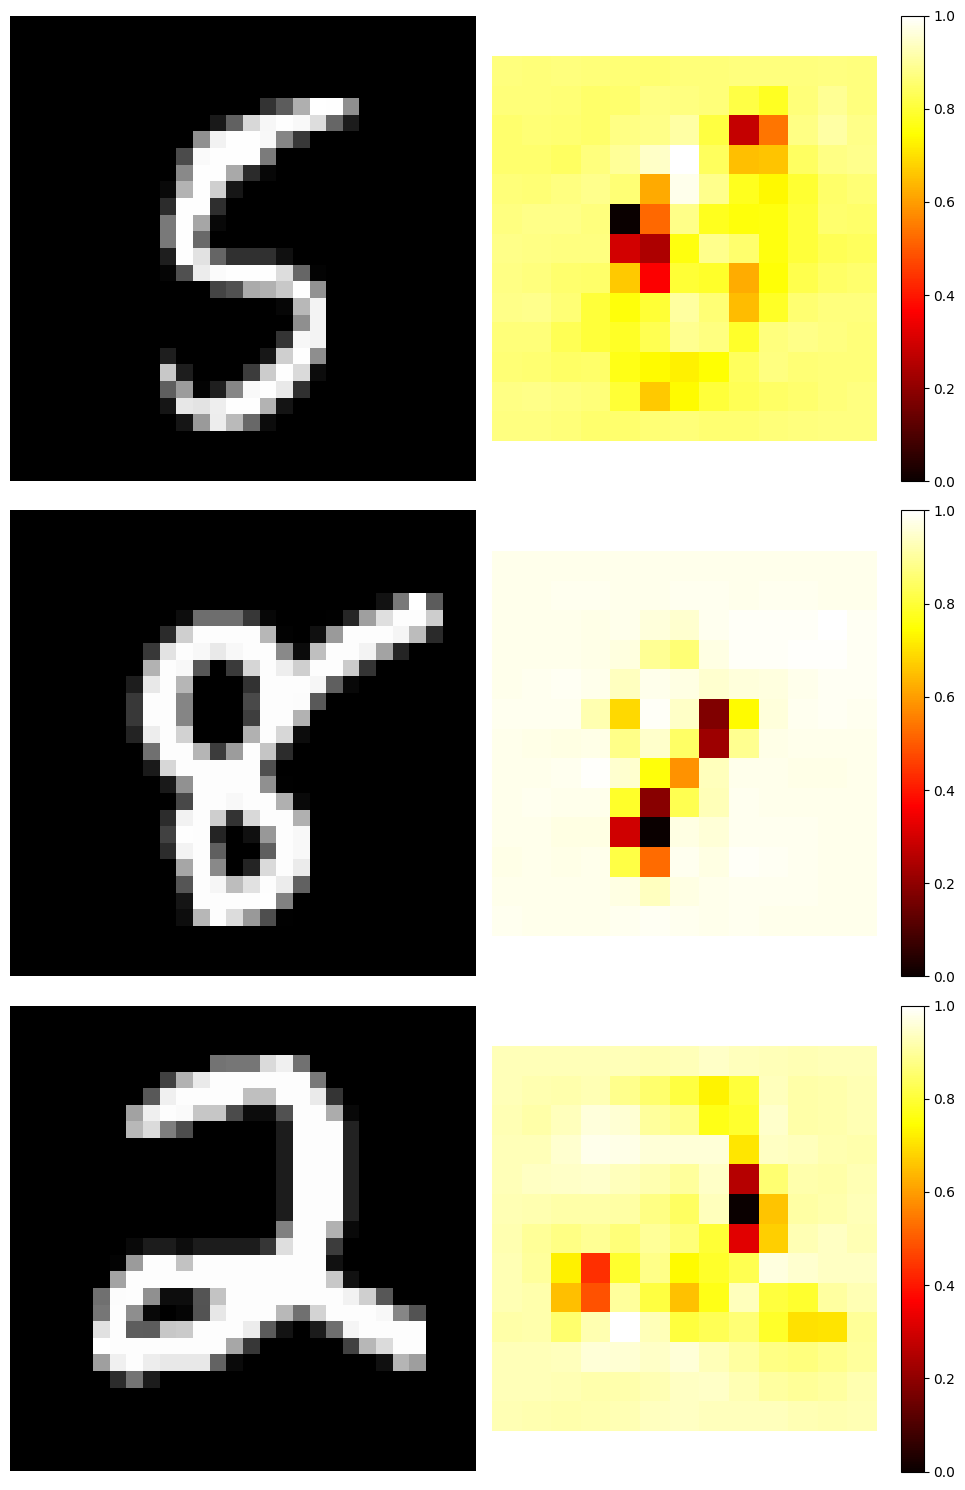

In [49]:
plot_occlusion_sensitivity(
    models["model_svb"].model, train_loader, num_images=3, occluder_size=4, stride=2
)

### Jacobi Regularization

#### Plot of Losses and Accuracies

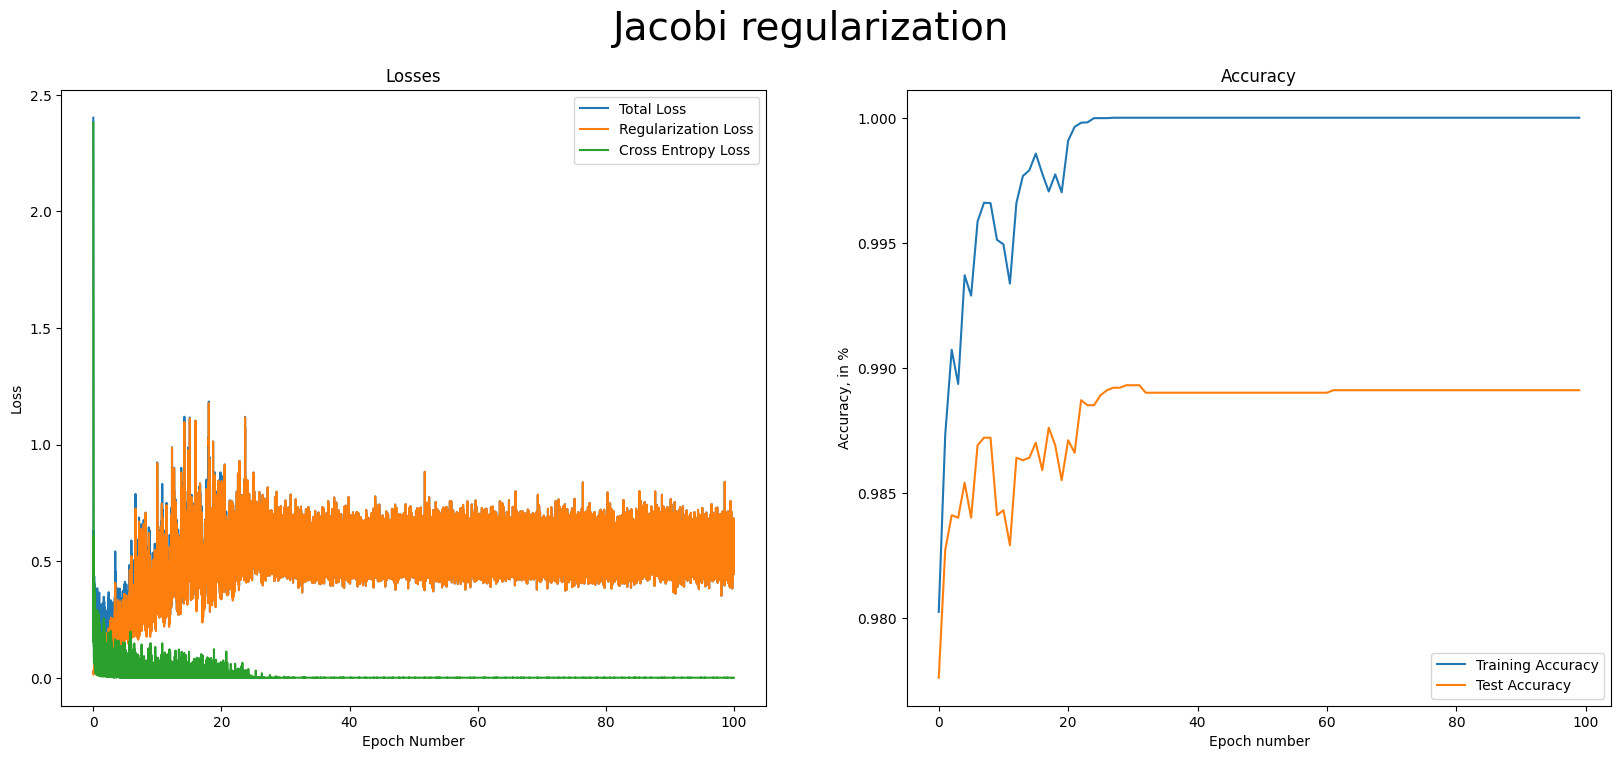

In [50]:
plot_reg_results(models, model_name="model_jacobi_reg", title="Jacobi regularization")

#### Plots of Activation Maps

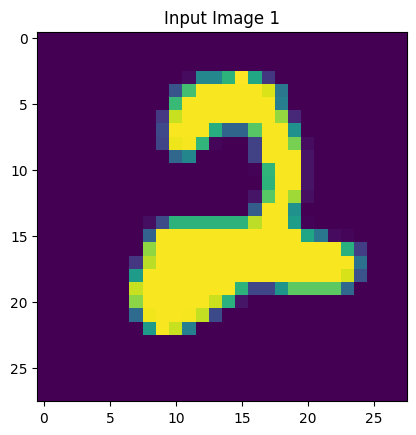

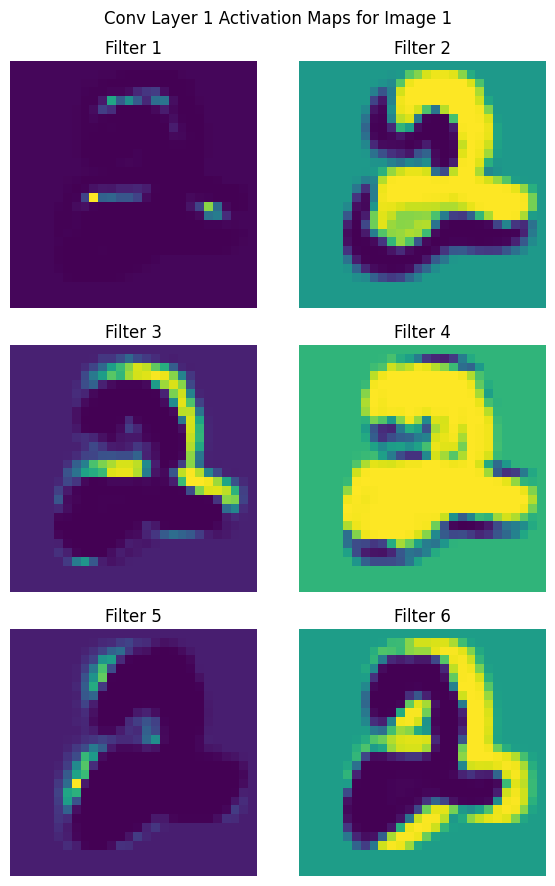

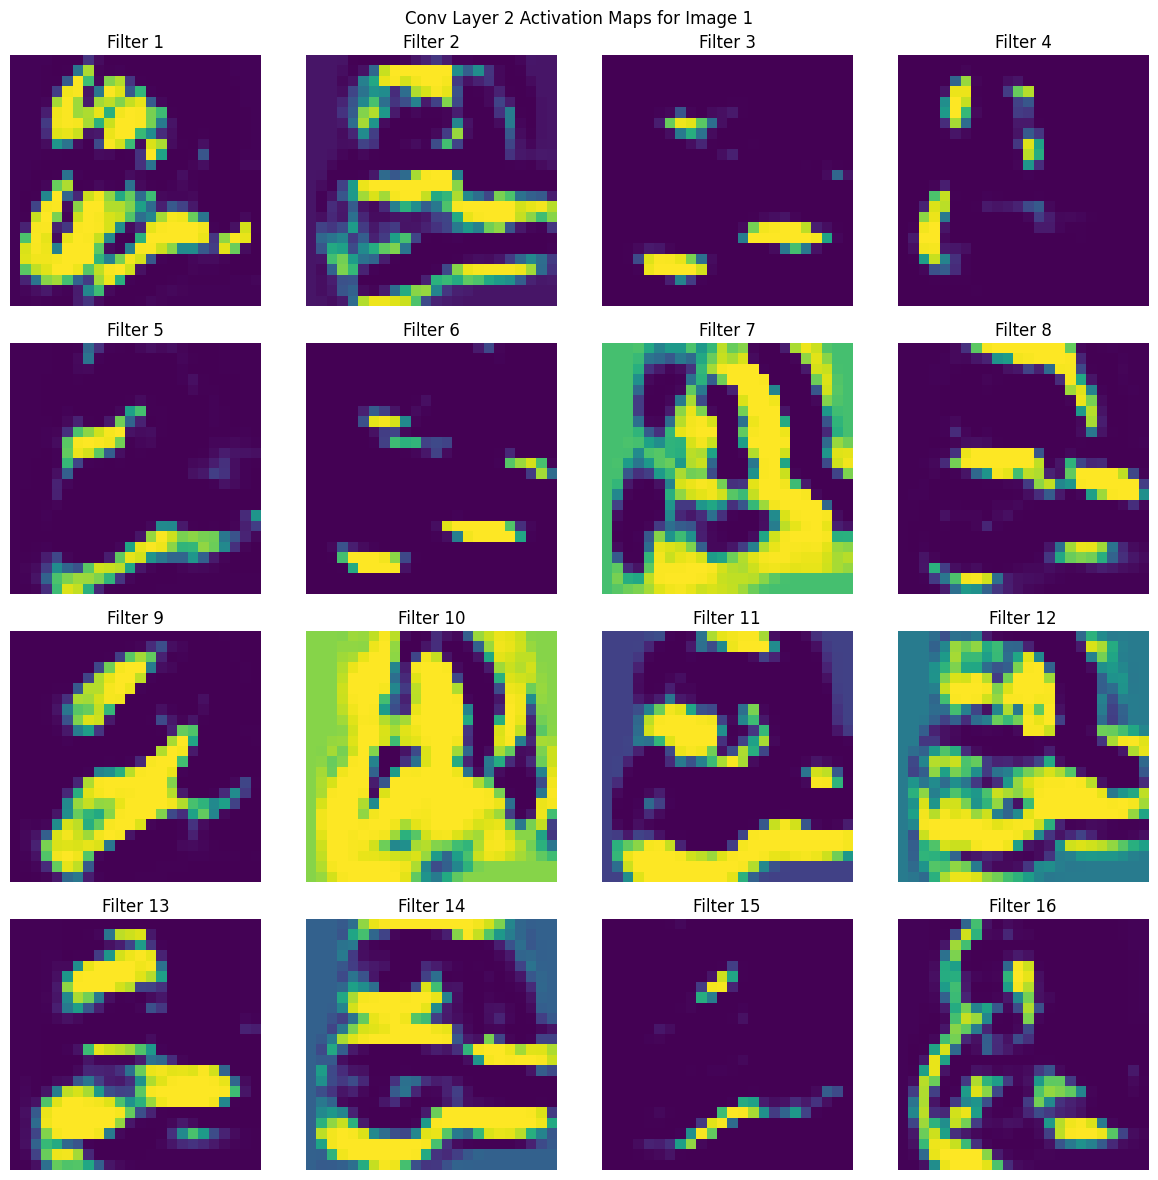

In [51]:
plot_activation_maps(models["model_jacobi_reg"].model, train_loader, num_images=1)

#### Plot of PCA of Activations

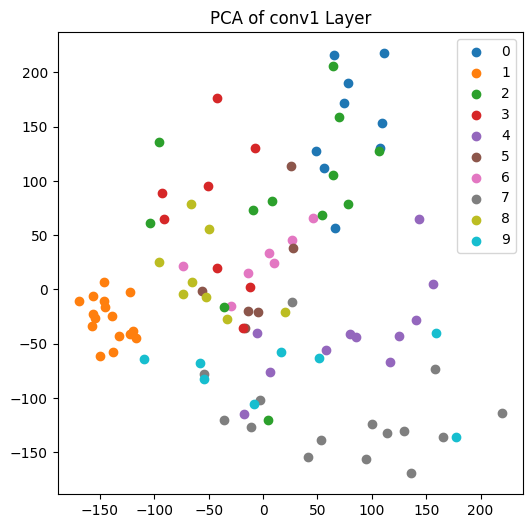

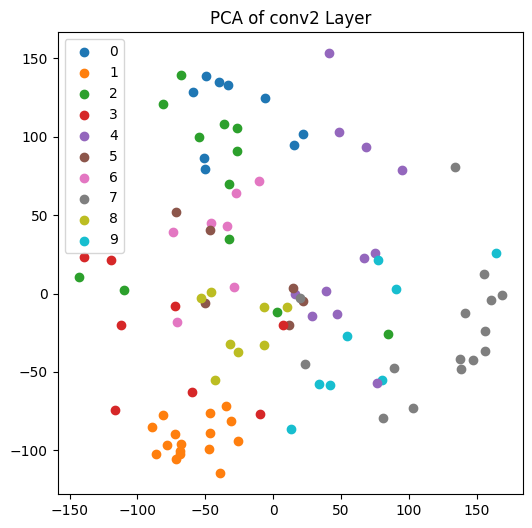

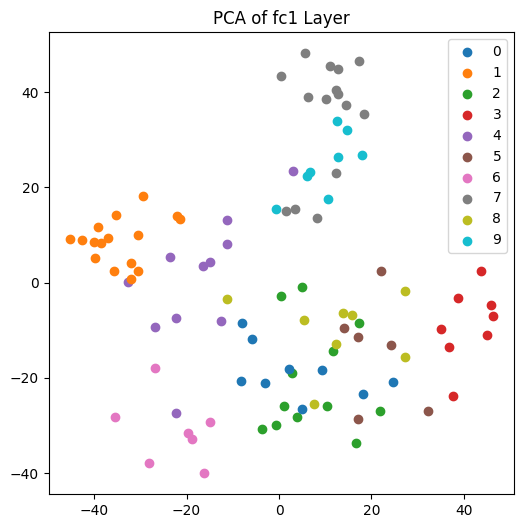

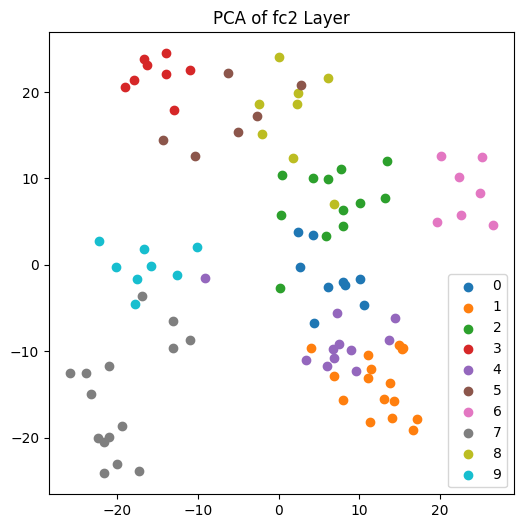

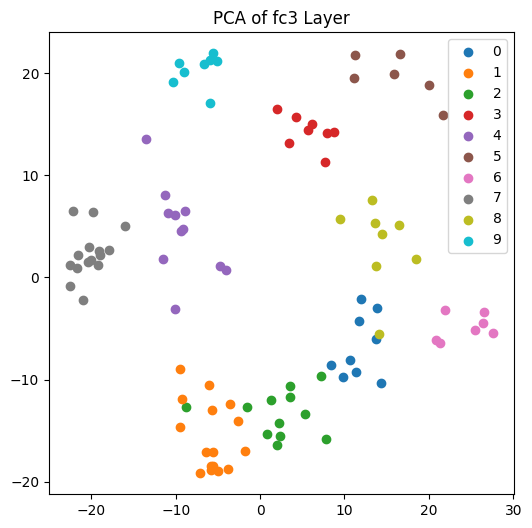

In [52]:
plot_activations_pca(models["model_jacobi_reg"].model, train_loader, device)

#### Plot of t-SNE of Activations

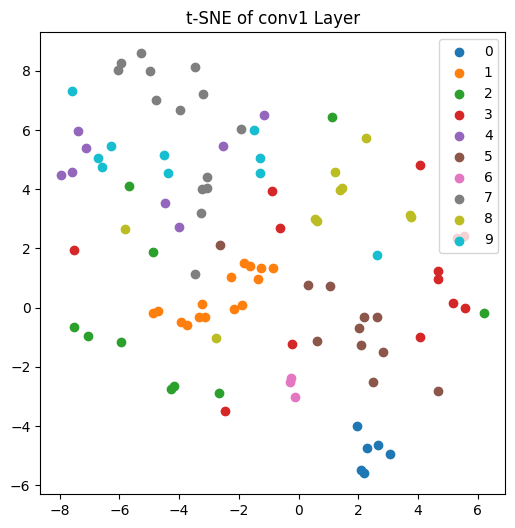

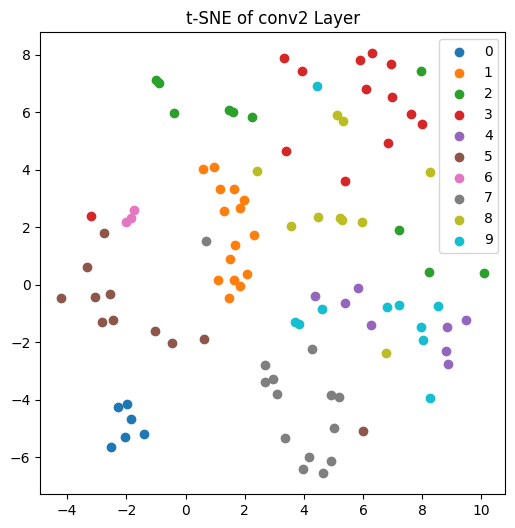

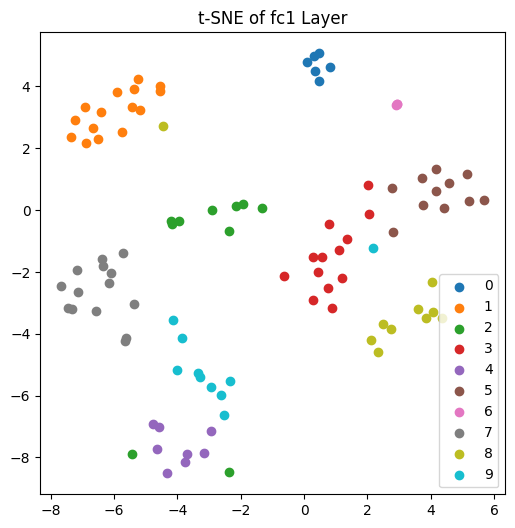

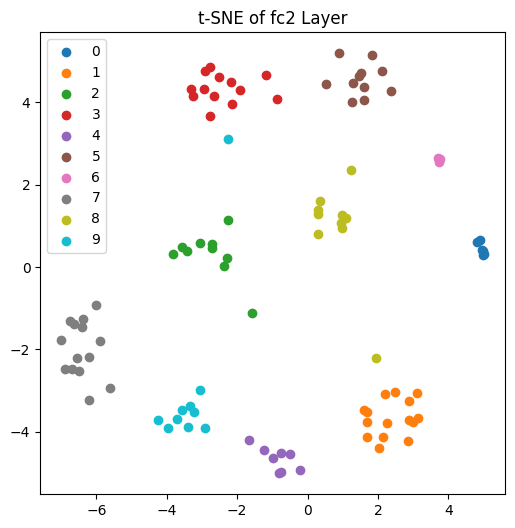

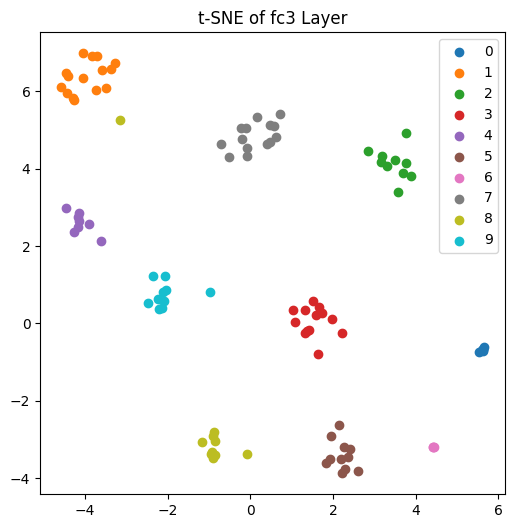

In [53]:
plot_activations_tsne(models["model_jacobi_reg"].model, train_loader, device)

#### Plots of Saliency Maps

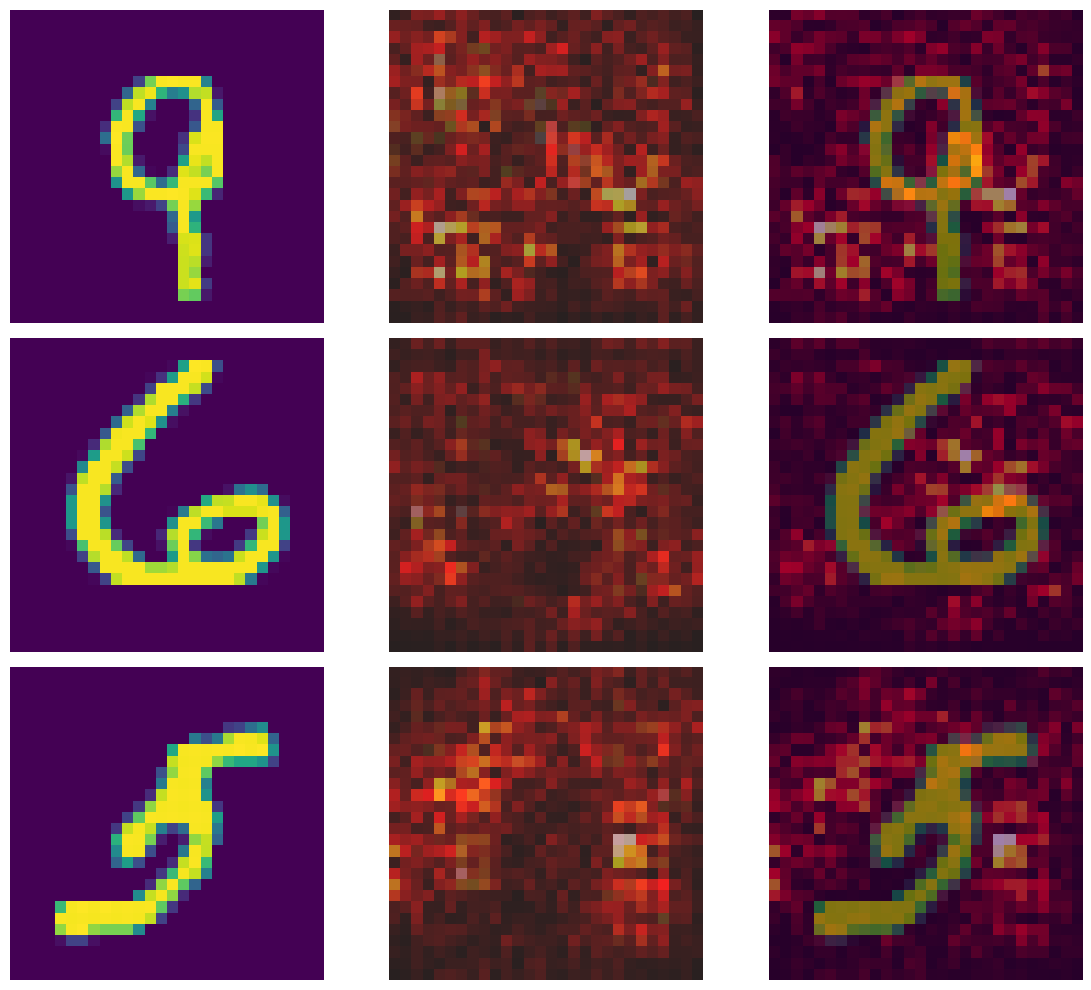

In [54]:
plot_saliency_maps(models["model_jacobi_reg"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

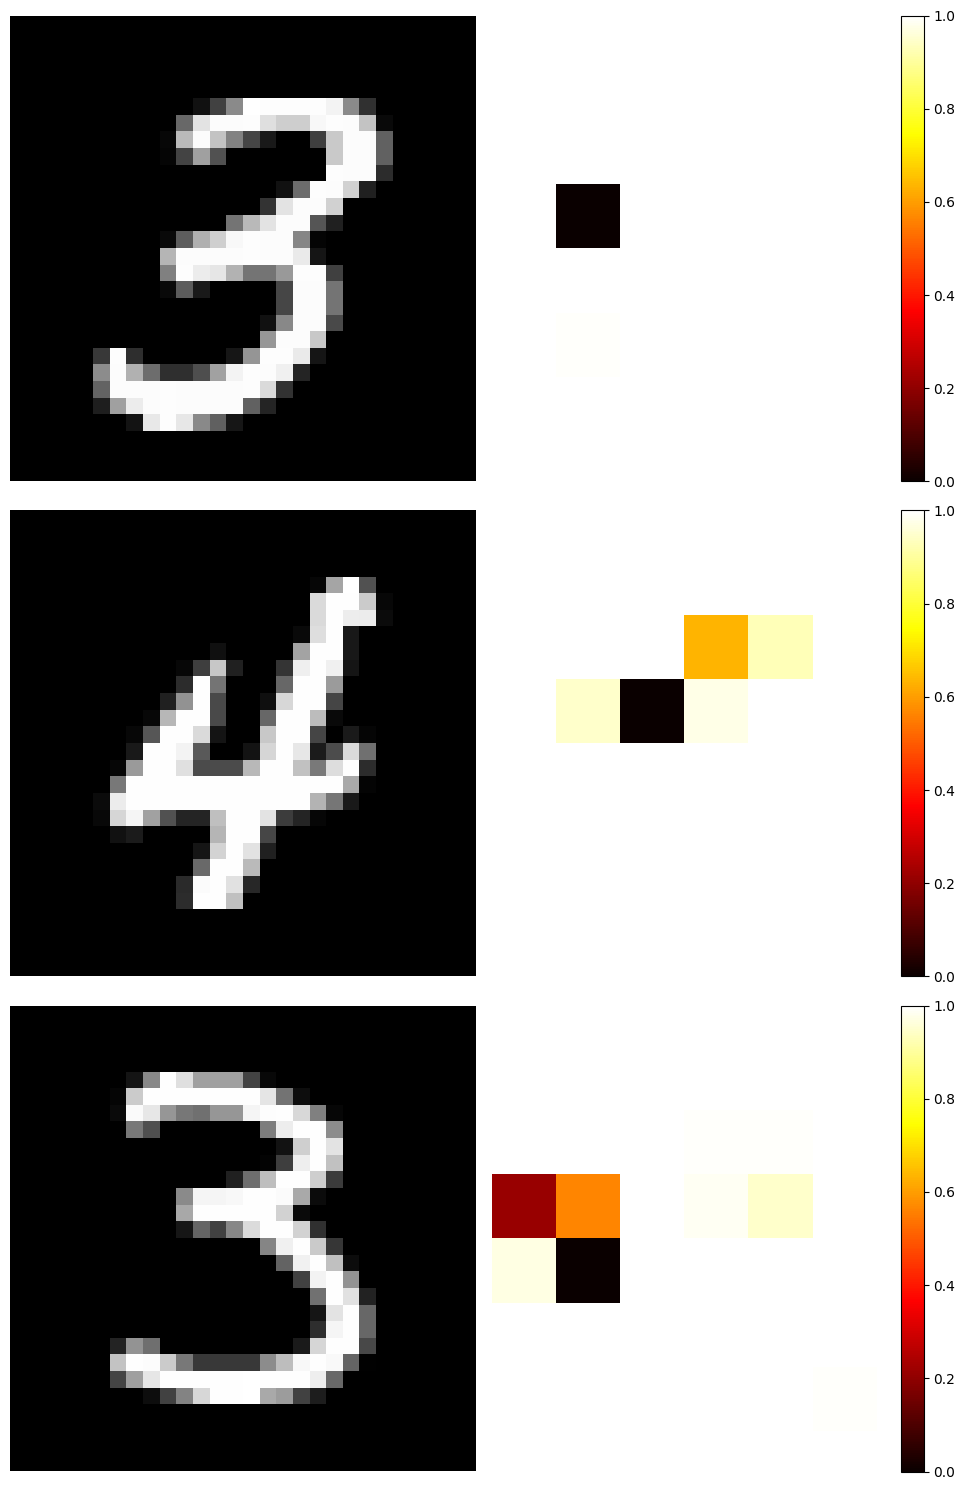

In [55]:
plot_occlusion_sensitivity(
    models["model_jacobi_reg"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

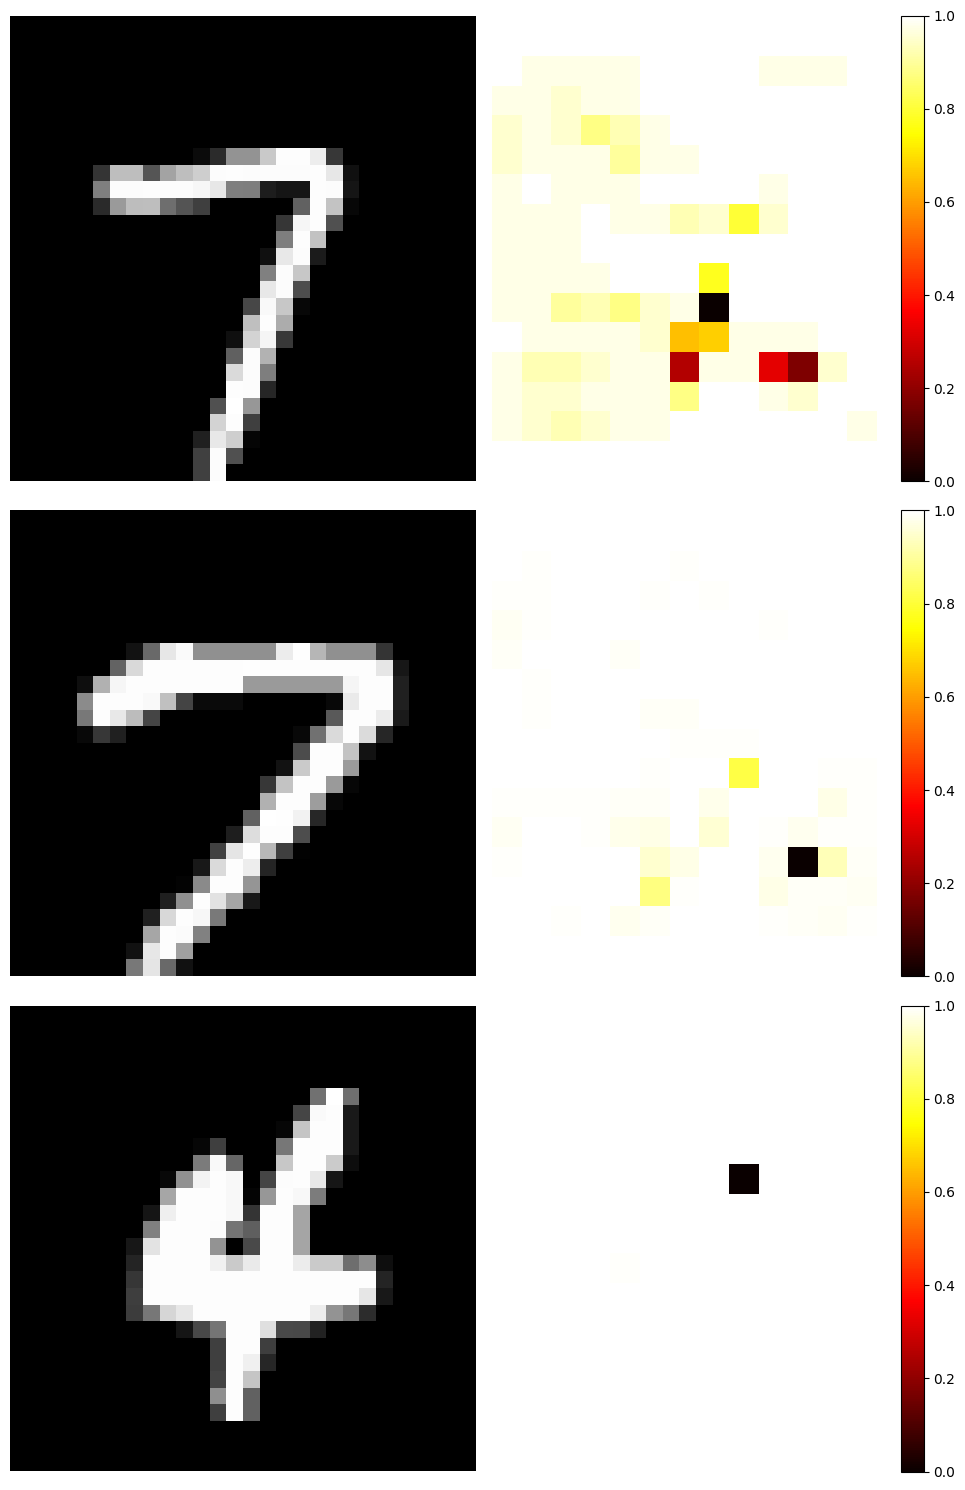

In [56]:
plot_occlusion_sensitivity(
    models["model_jacobi_reg"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

### Jacobi Determinant Regularization

#### Plot of Losses and Accuracies

c:\Users\aslak\Desktop\Jobb\Forskningsassistent\Biologisk inspirert kunstig intelligens\regNNs\Regularization Benchmarking\plotting_tools.py:89: RuntimeWarning: invalid value encountered in subtract
  np.asarray(losses) - np.asarray(reg_losses),


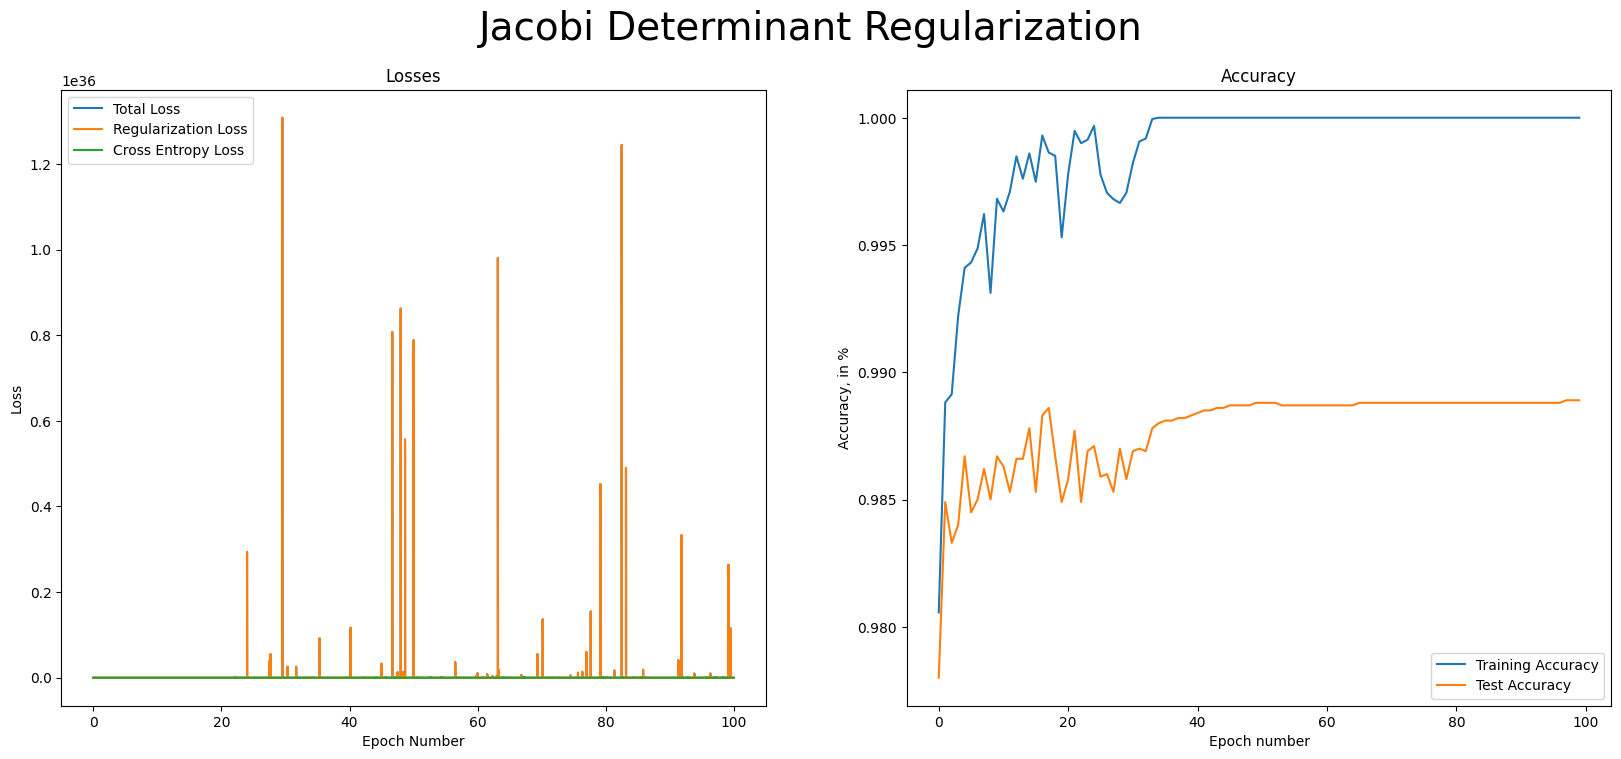

In [57]:
plot_reg_results(
    models, model_name="model_jacobi_det_reg", title="Jacobi Determinant Regularization"
)

#### Plots of Activation Maps

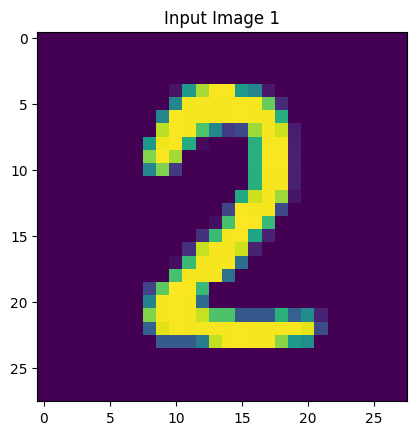

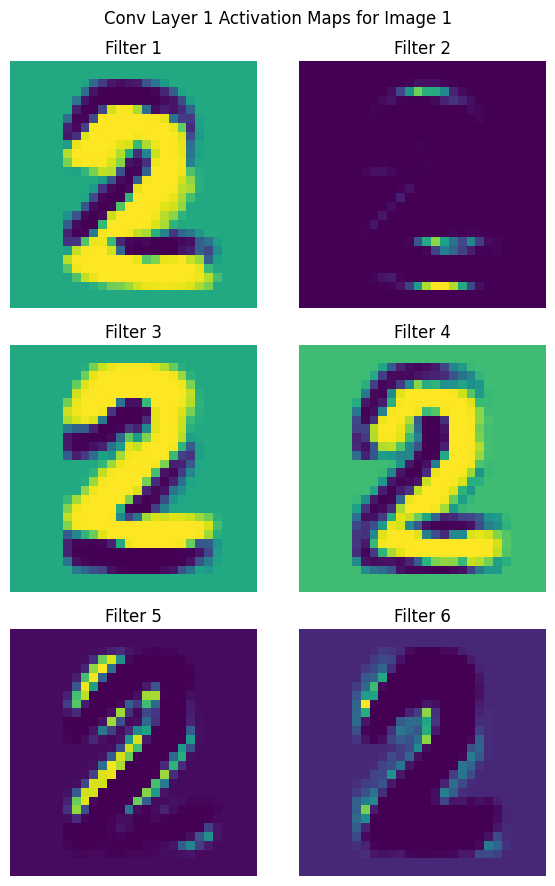

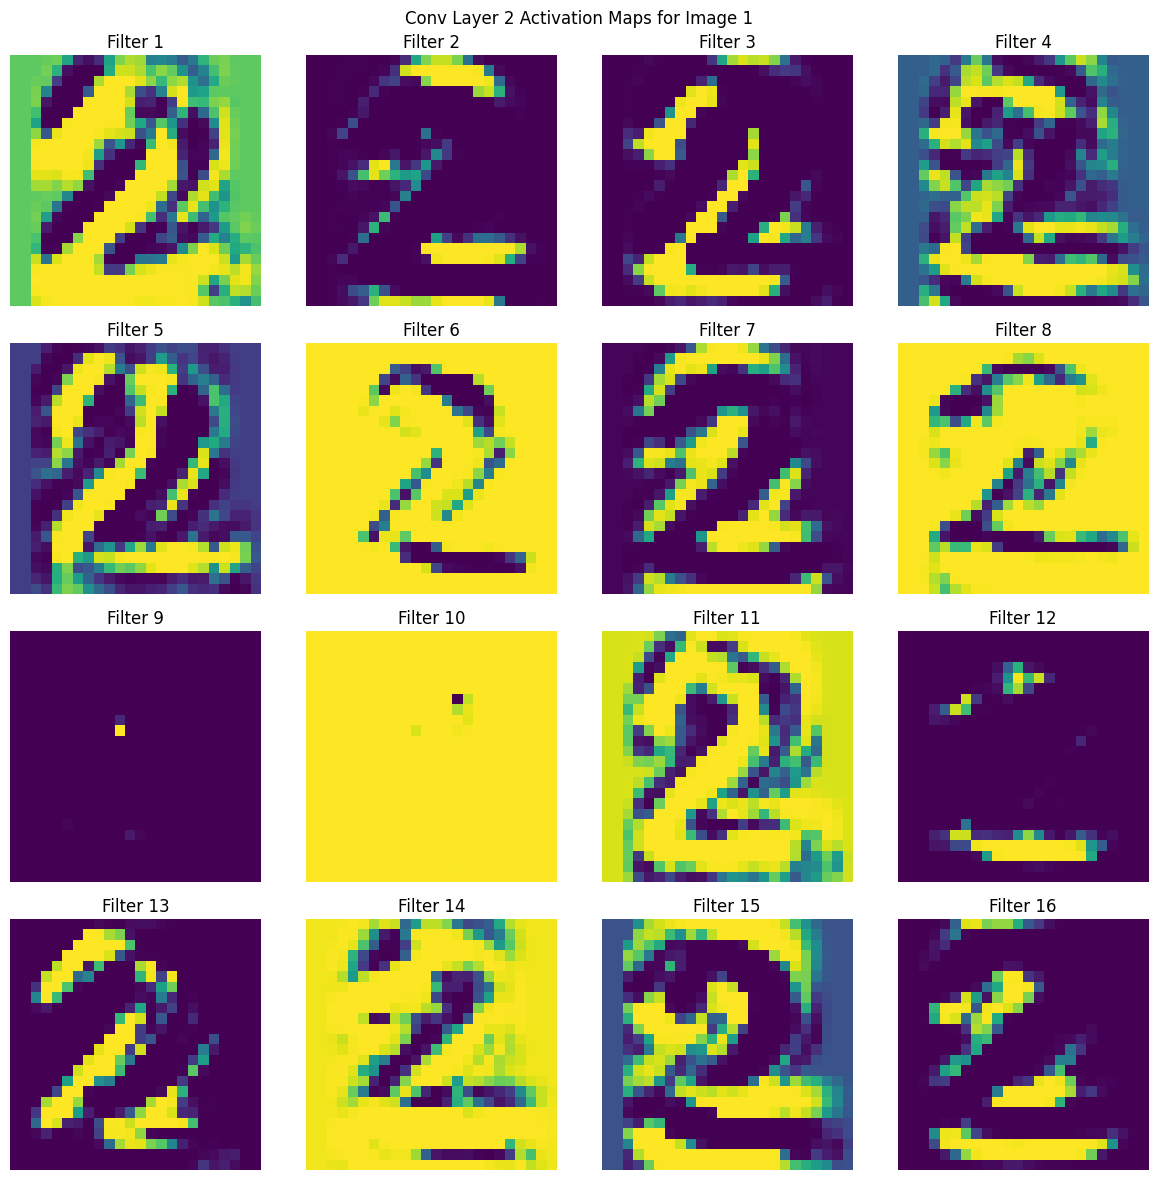

In [58]:
plot_activation_maps(models["model_jacobi_det_reg"].model, train_loader, num_images=1)

#### Plot of PCA of Activations

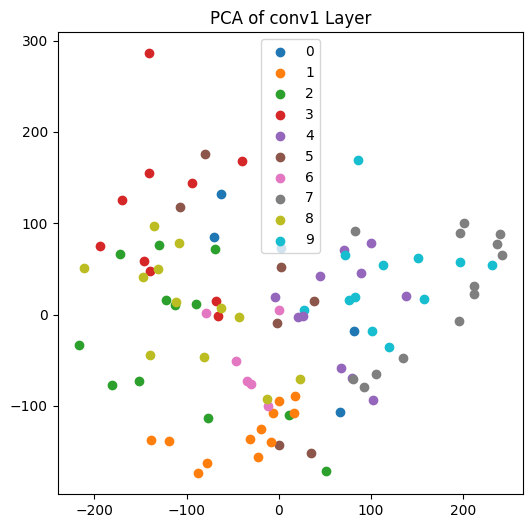

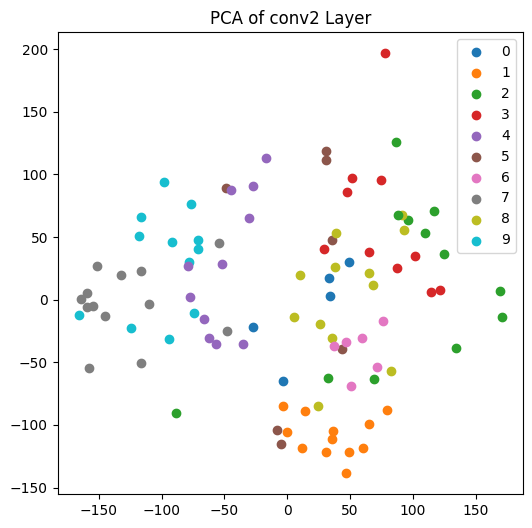

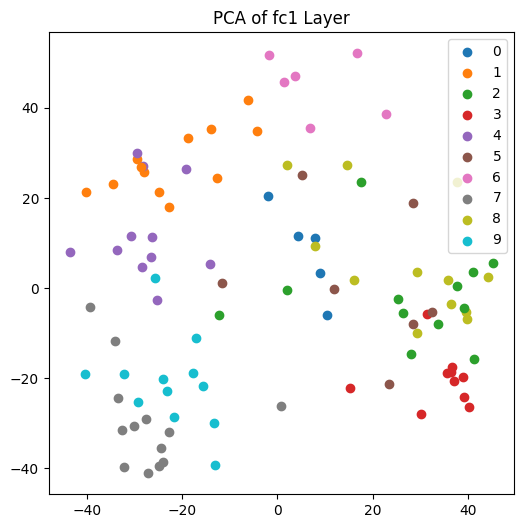

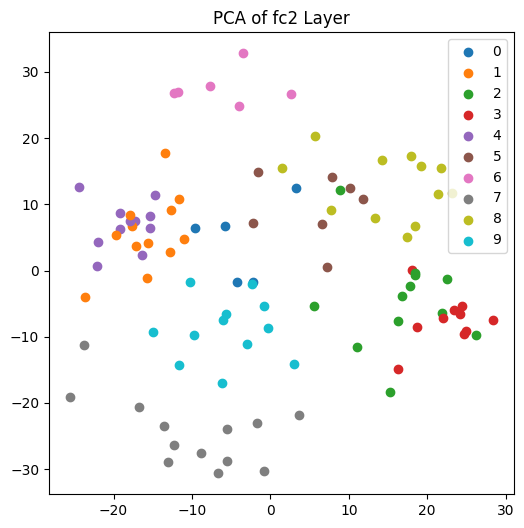

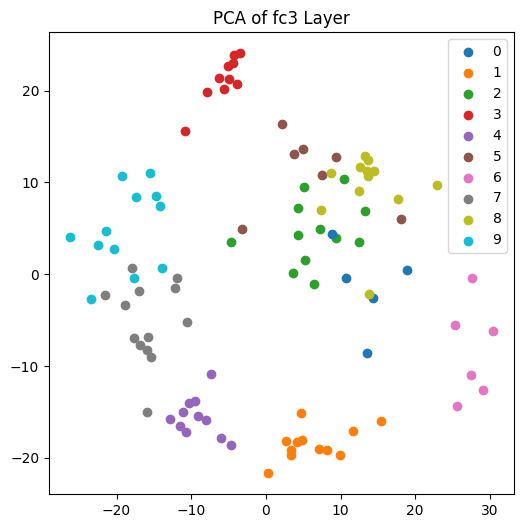

In [59]:
plot_activations_pca(models["model_jacobi_det_reg"].model, train_loader, device)

#### Plot of t-SNE of Activations

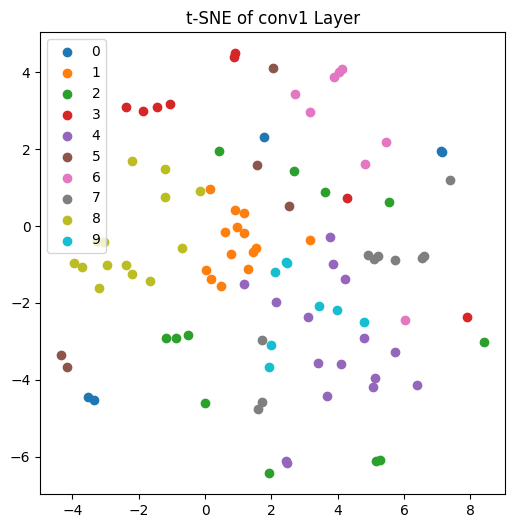

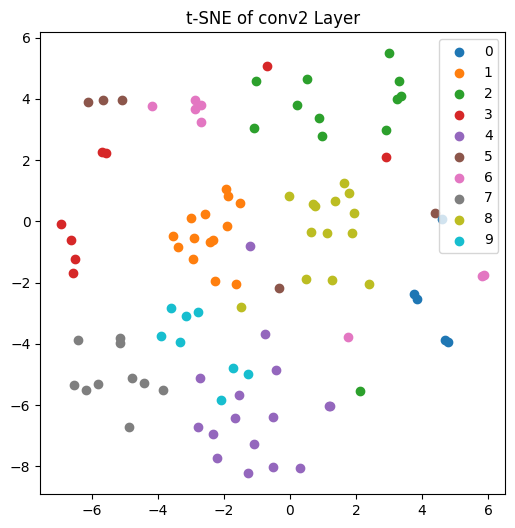

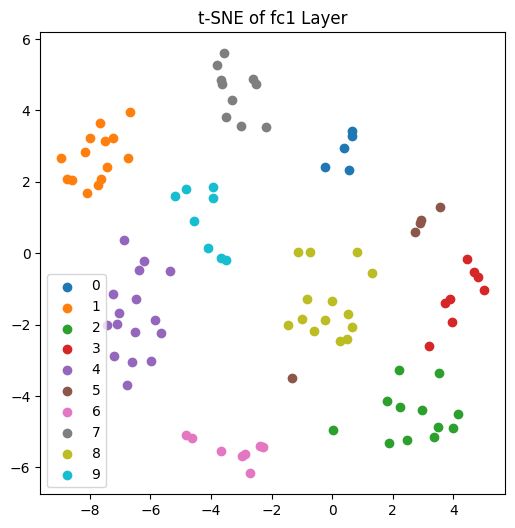

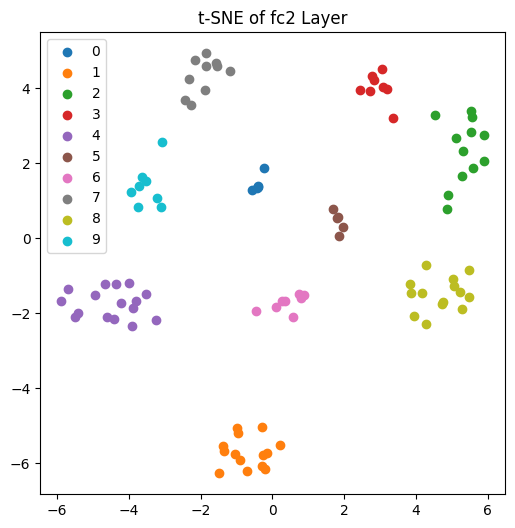

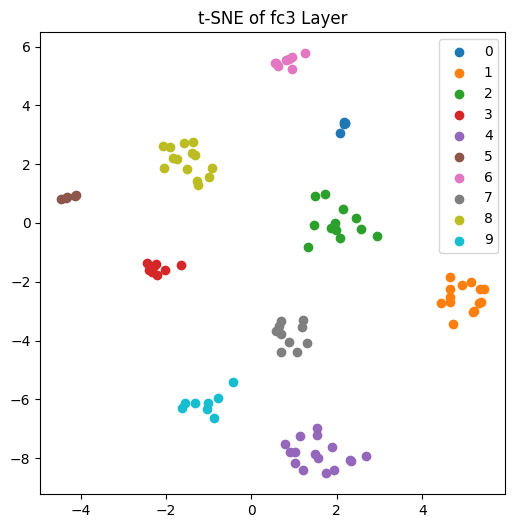

In [60]:
plot_activations_tsne(models["model_jacobi_det_reg"].model, train_loader, device)

#### Plots of Saliency Maps

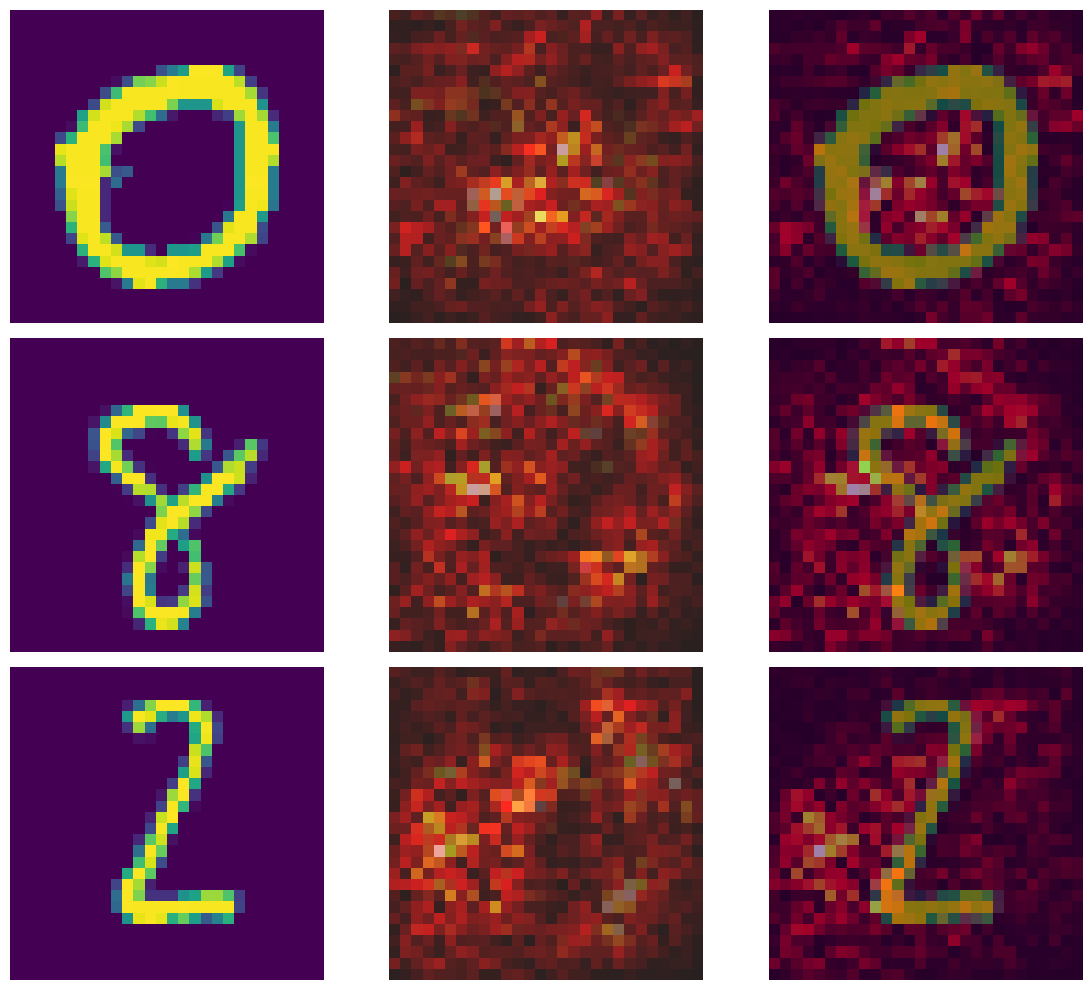

In [61]:
plot_saliency_maps(models["model_jacobi_det_reg"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

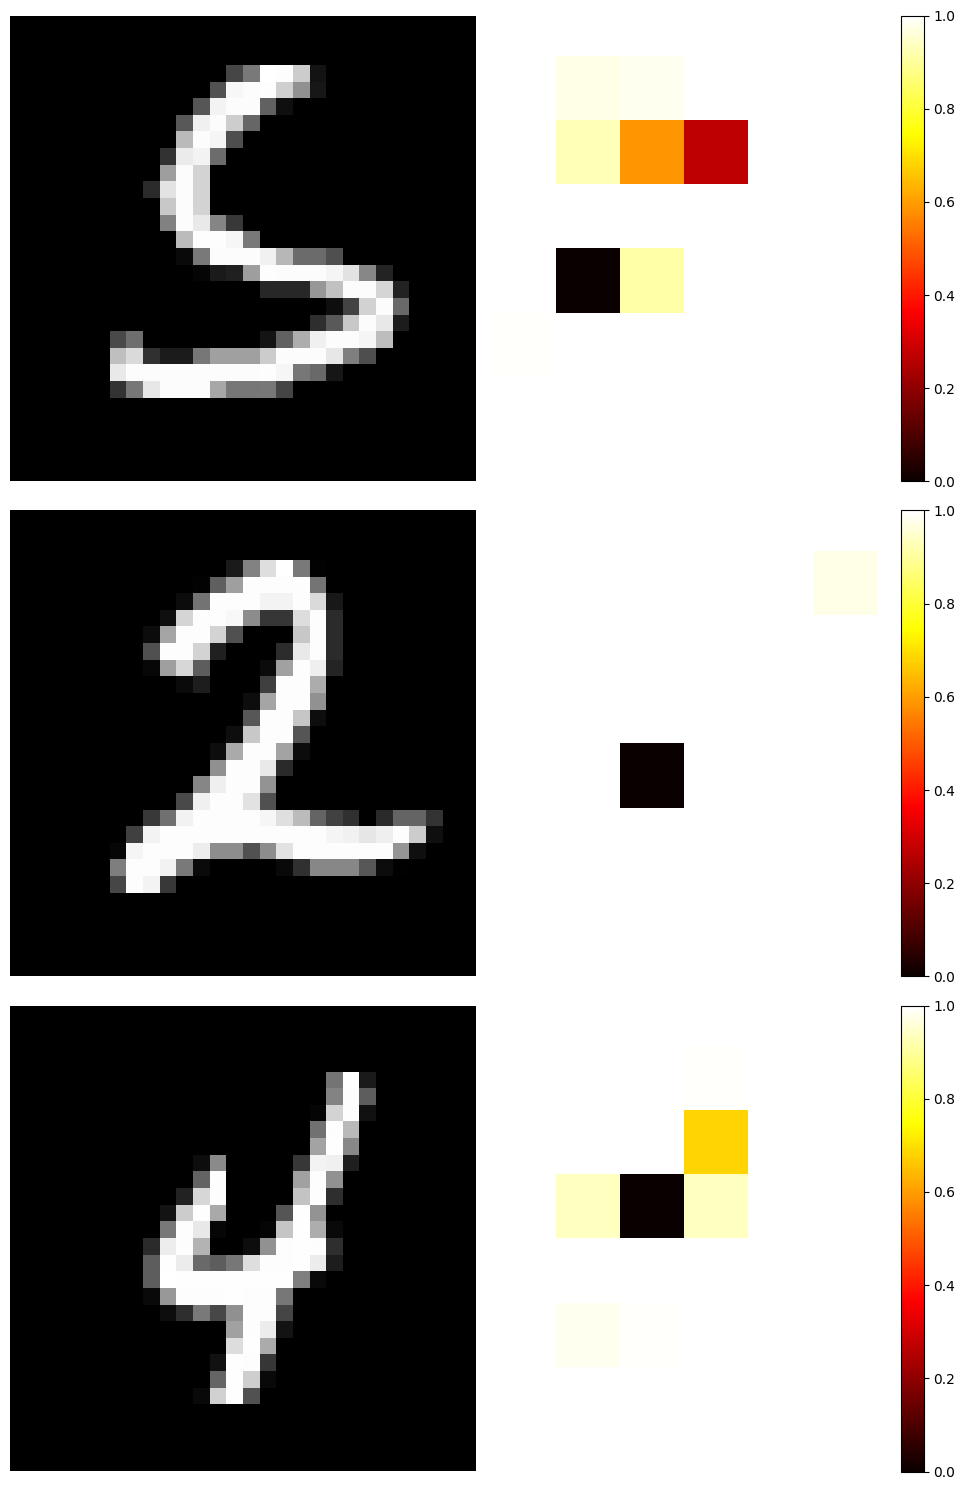

In [62]:
plot_occlusion_sensitivity(
    models["model_jacobi_det_reg"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

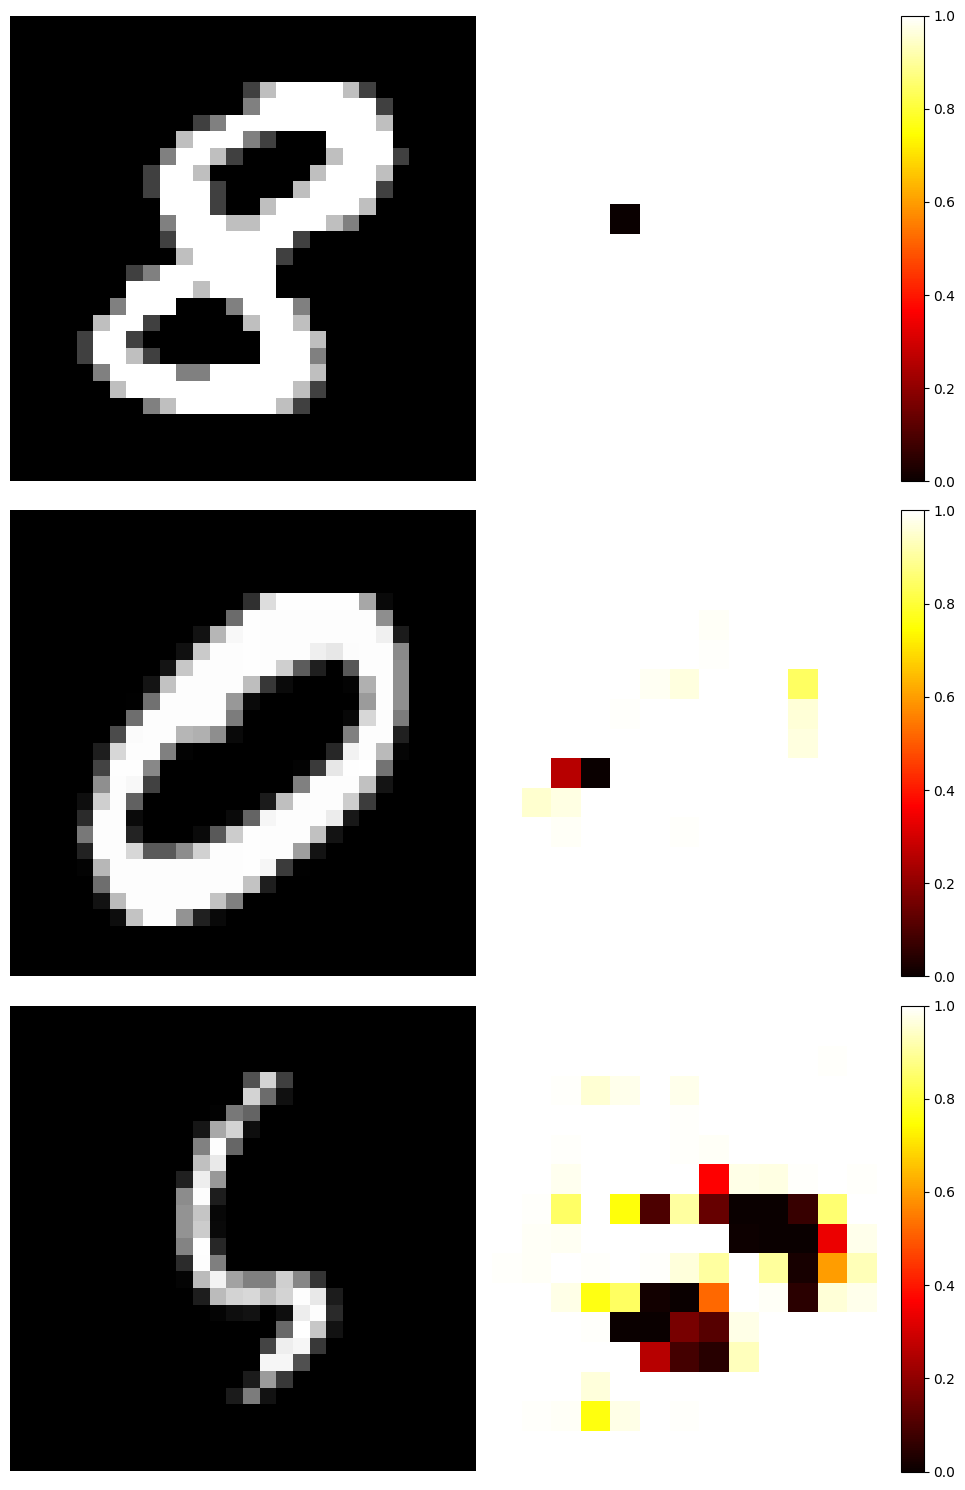

In [63]:
plot_occlusion_sensitivity(
    models["model_jacobi_det_reg"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

### Dropout Regularization

#### Plot of Losses and Accuracies

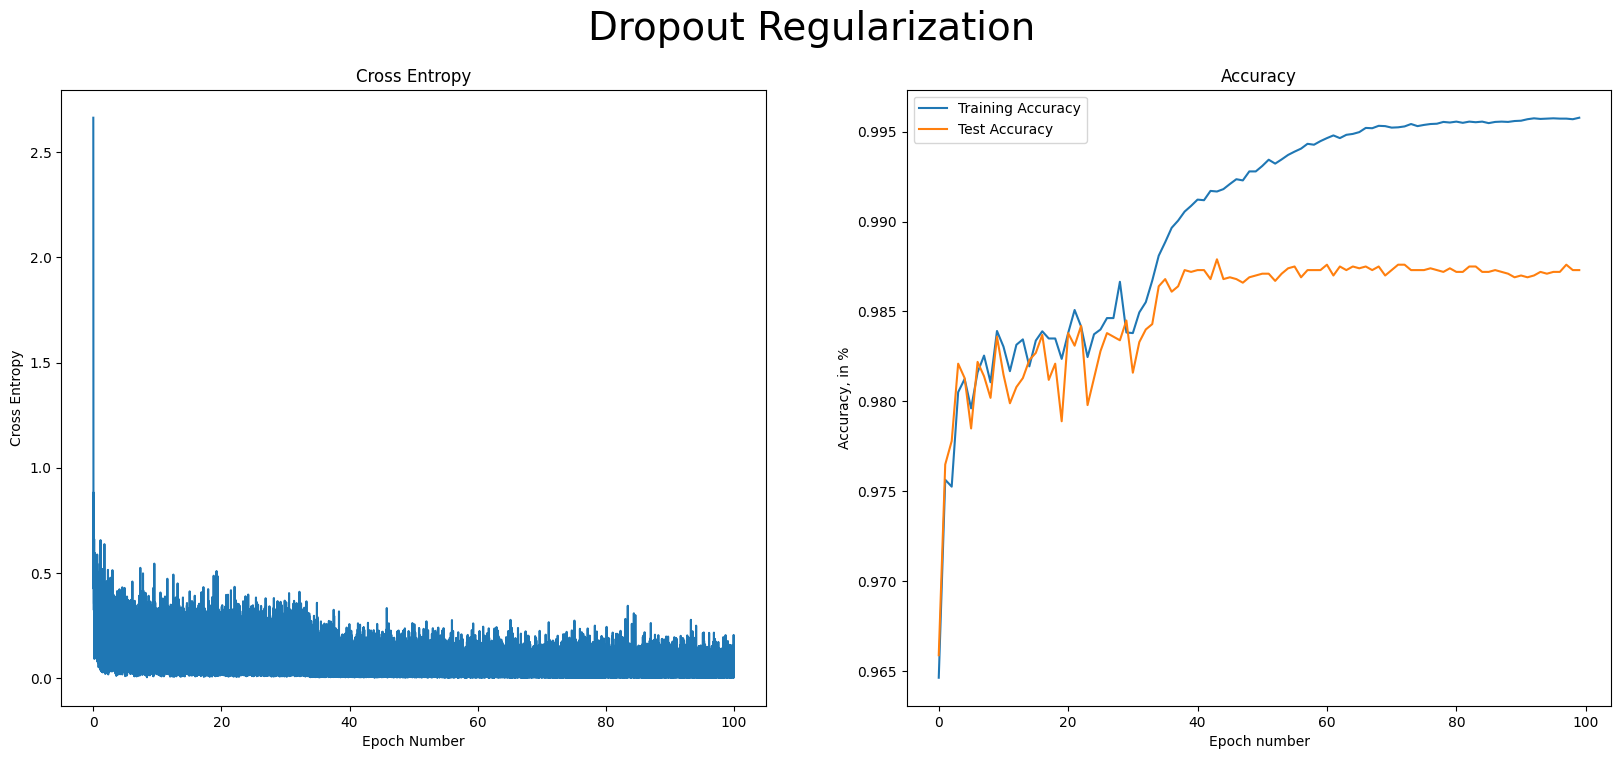

In [64]:
plot_results(models, model_name="model_dropout", title="Dropout Regularization")

#### Plots of Activation Maps

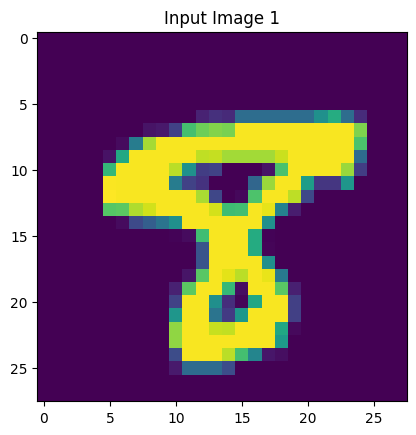

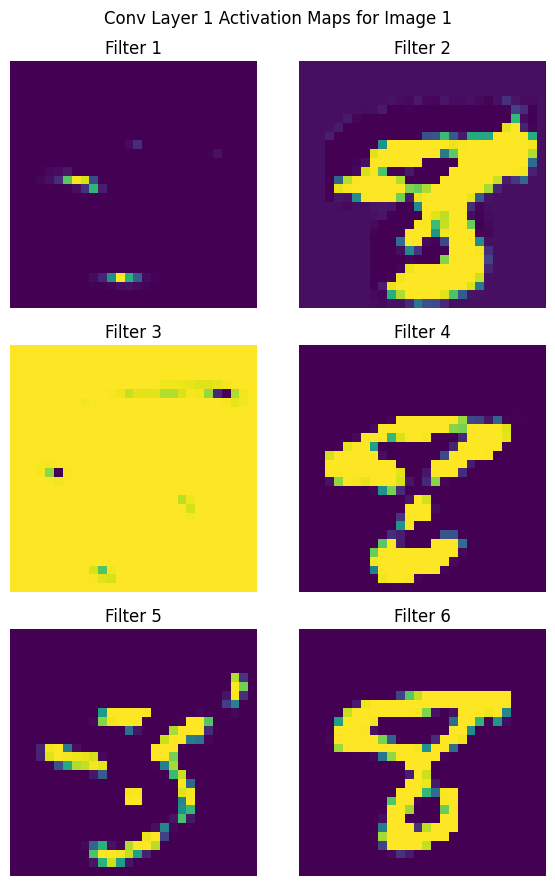

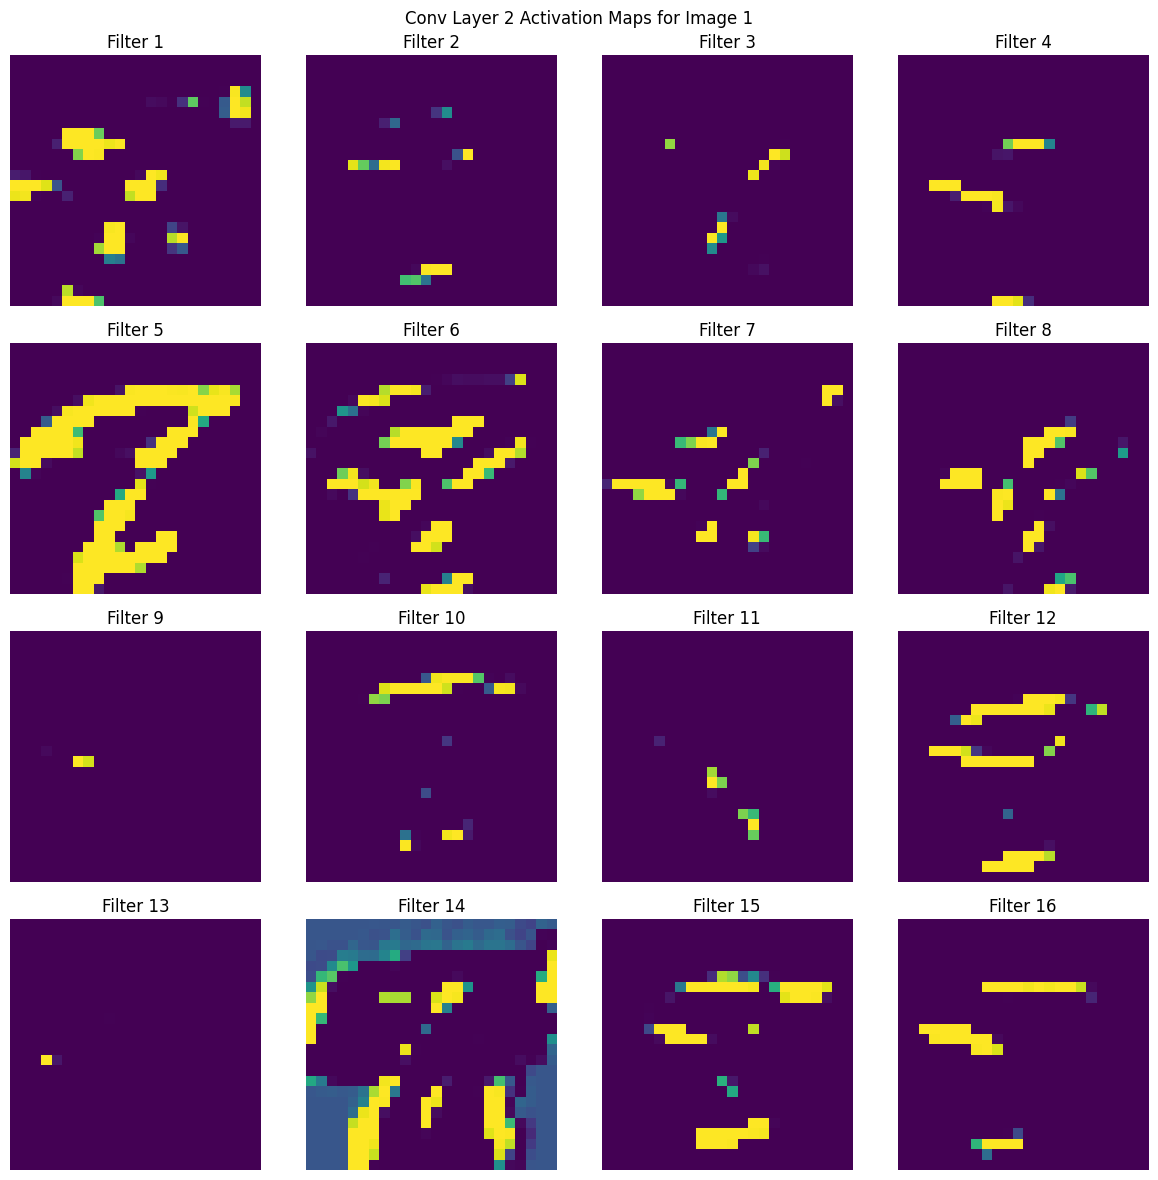

In [65]:
plot_activation_maps(models["model_dropout"].model, train_loader, num_images=1)

#### Plot of PCA of Activations

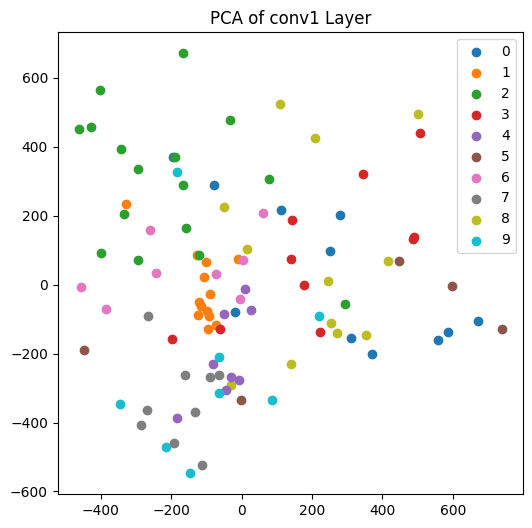

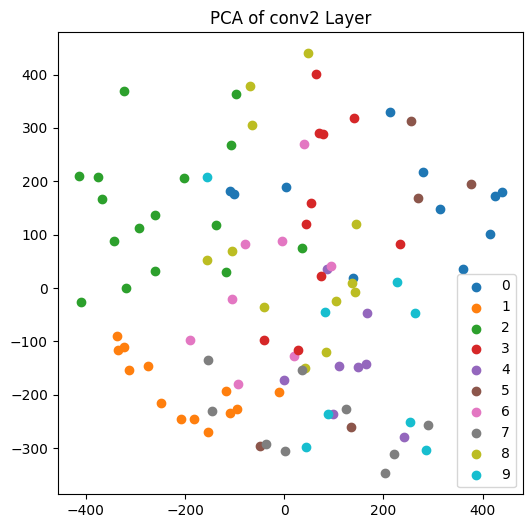

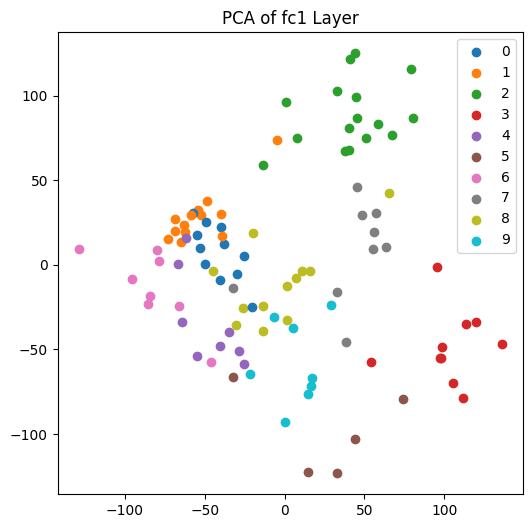

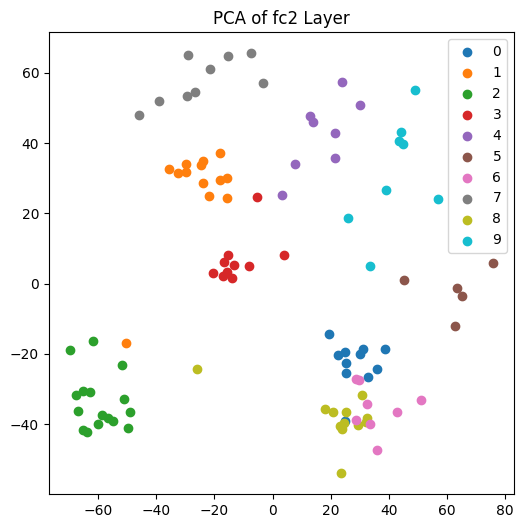

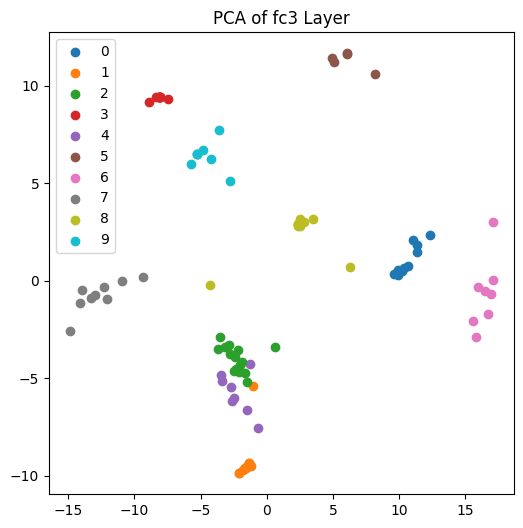

In [66]:
plot_activations_pca(models["model_dropout"].model, train_loader, device)

#### Plot of t-SNE of Activations

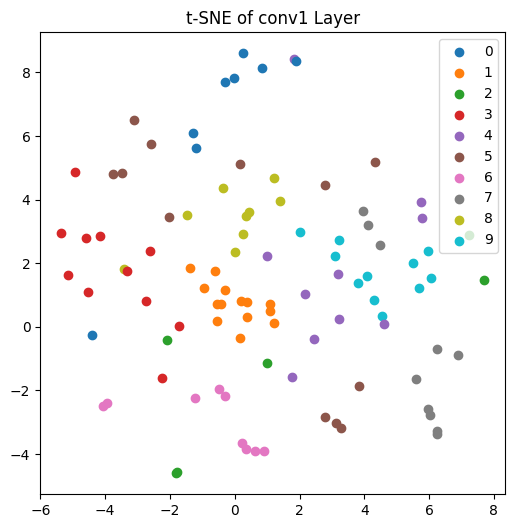

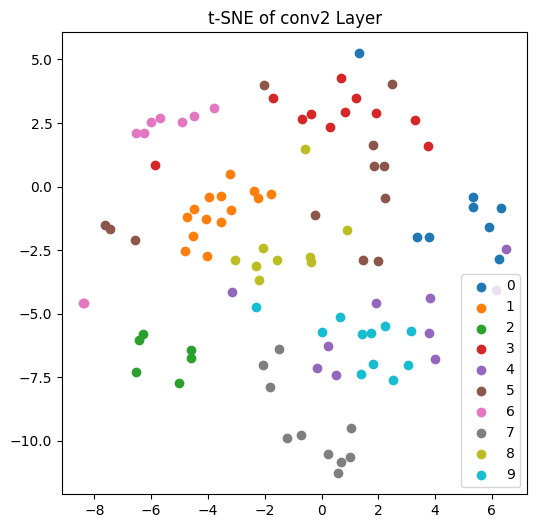

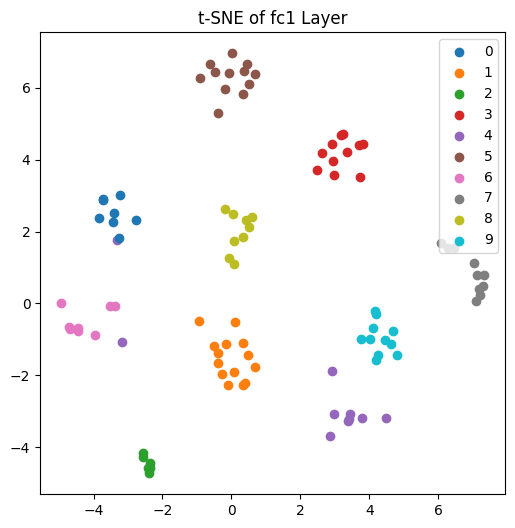

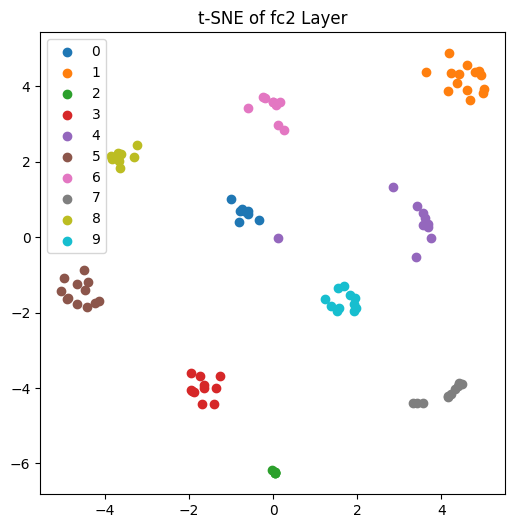

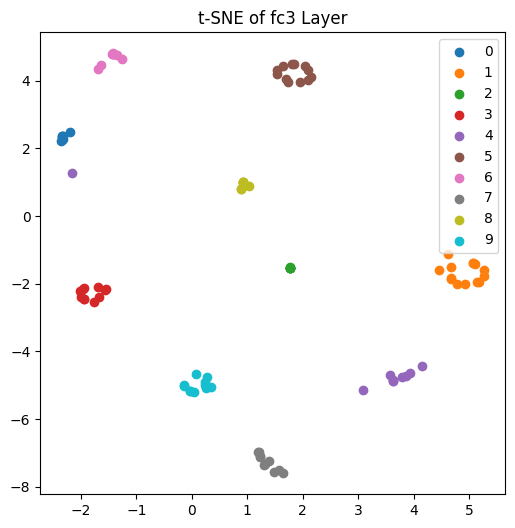

In [67]:
plot_activations_tsne(models["model_dropout"].model, train_loader, device)

#### Plots of Saliency Maps

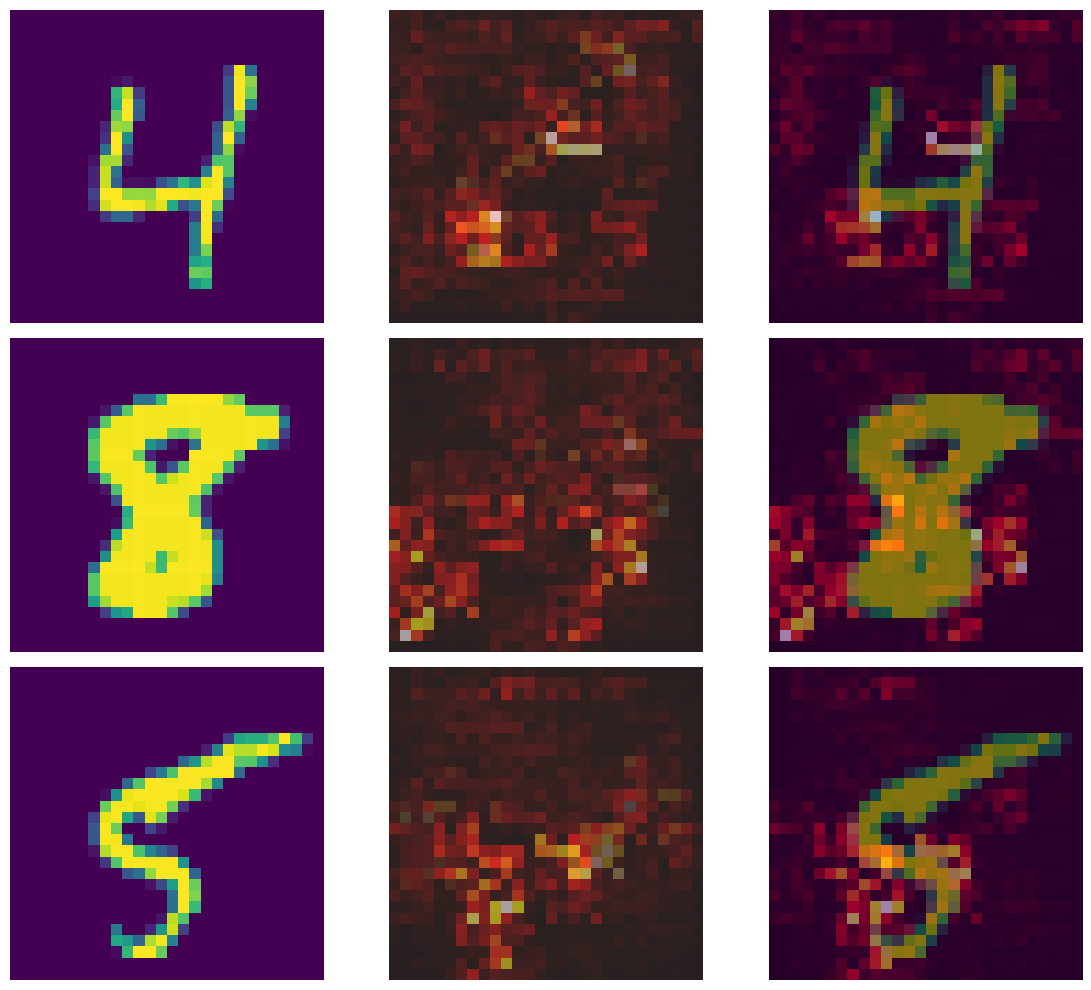

In [68]:
plot_saliency_maps(models["model_dropout"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

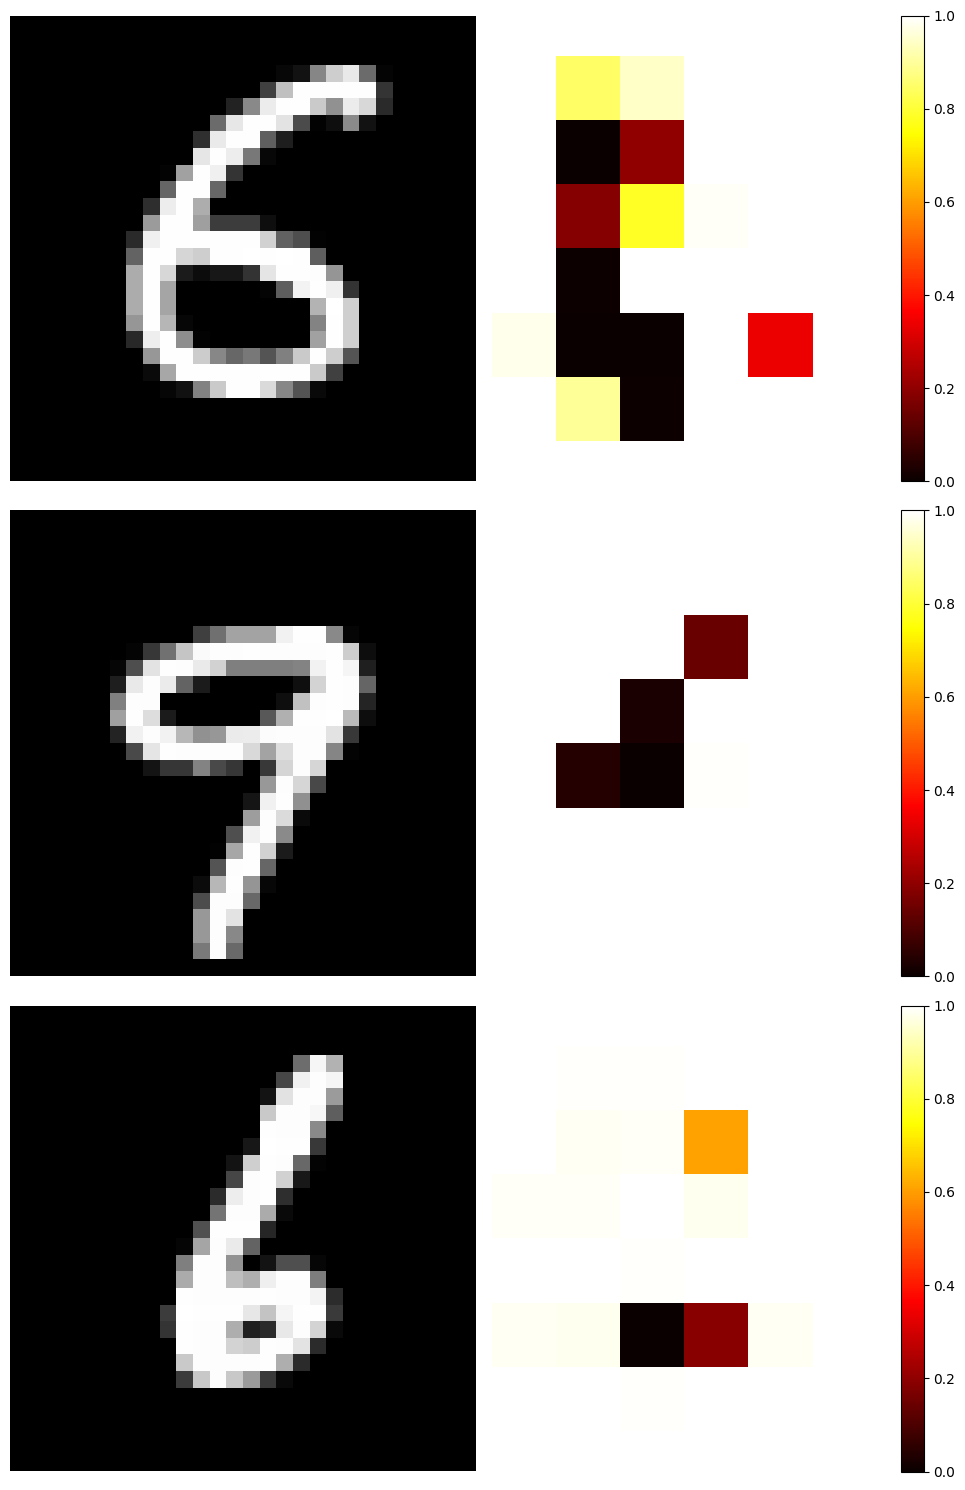

In [69]:
plot_occlusion_sensitivity(
    models["model_dropout"].model, train_loader, num_images=3, occluder_size=8, stride=4
)

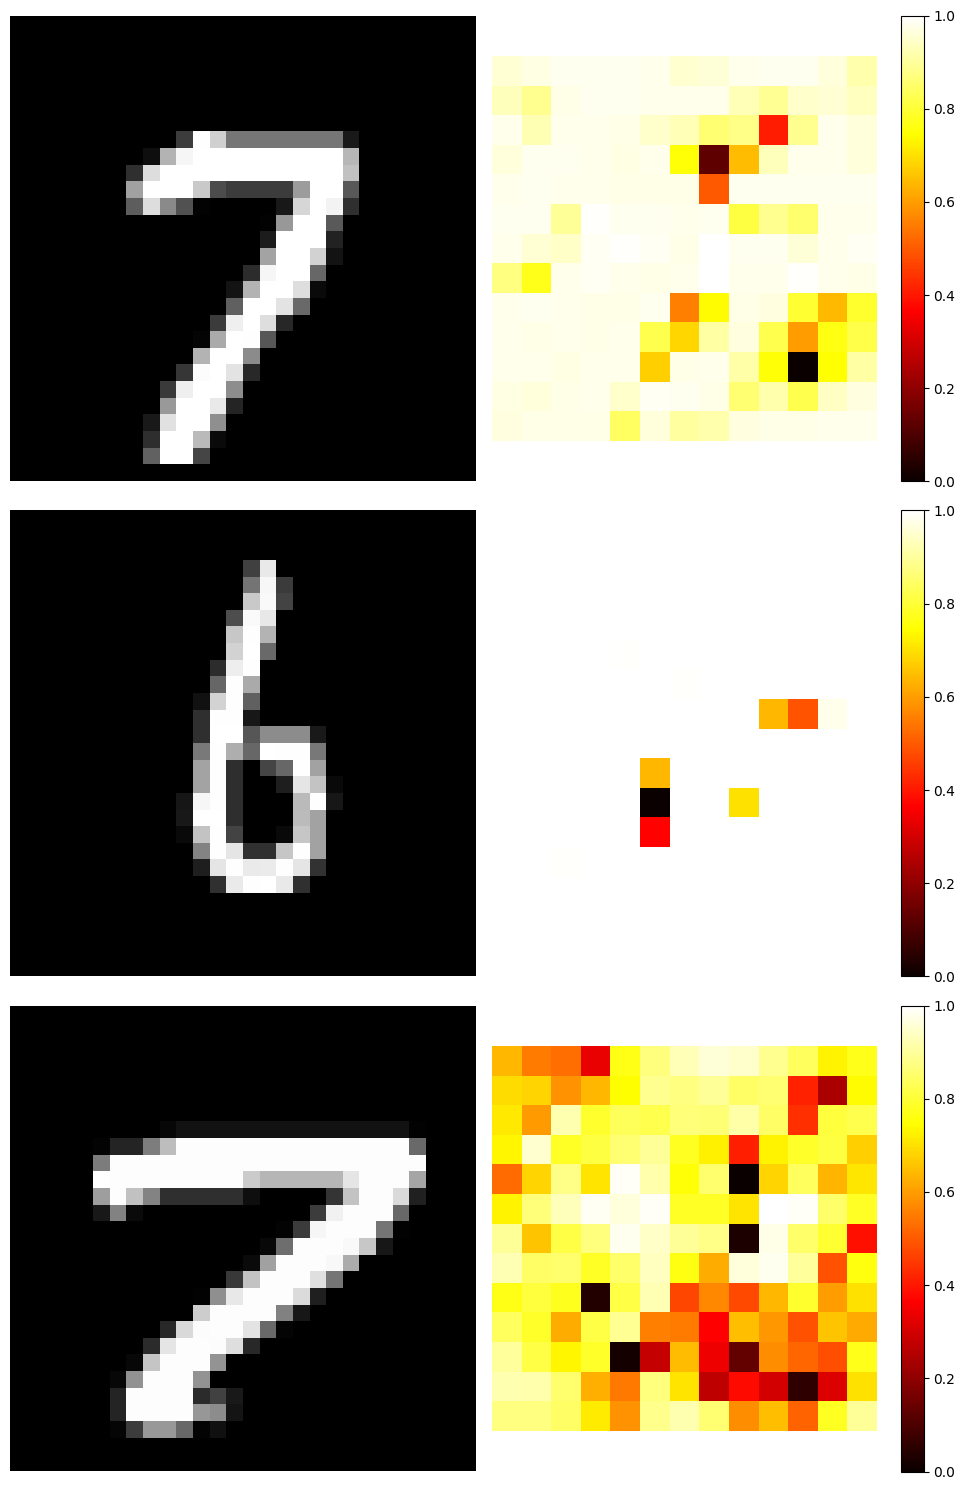

In [70]:
plot_occlusion_sensitivity(
    models["model_dropout"].model, train_loader, num_images=3, occluder_size=4, stride=2
)

### Confidence Penalty Regularization

#### Plot of Losses and Accuracies

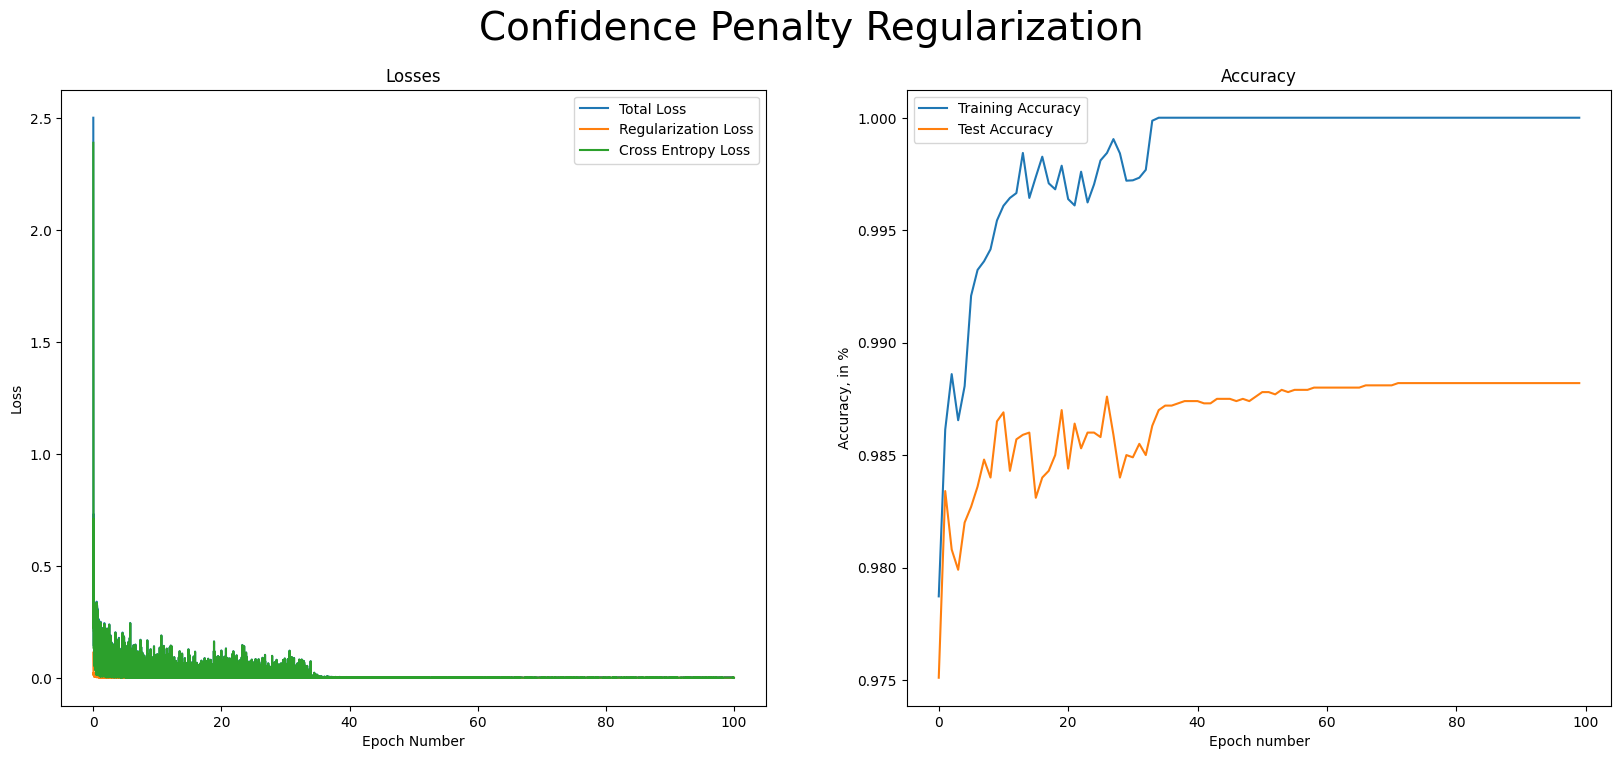

In [71]:
plot_reg_results(
    models, model_name="model_conf_penalty", title="Confidence Penalty Regularization"
)

#### Plots of Activation Maps

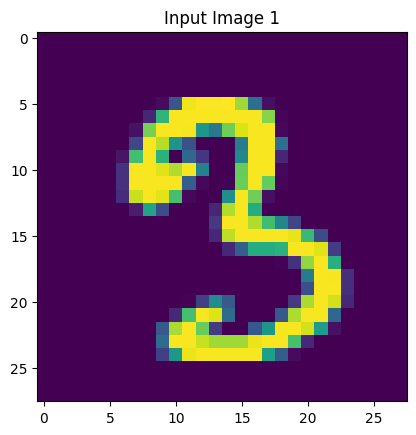

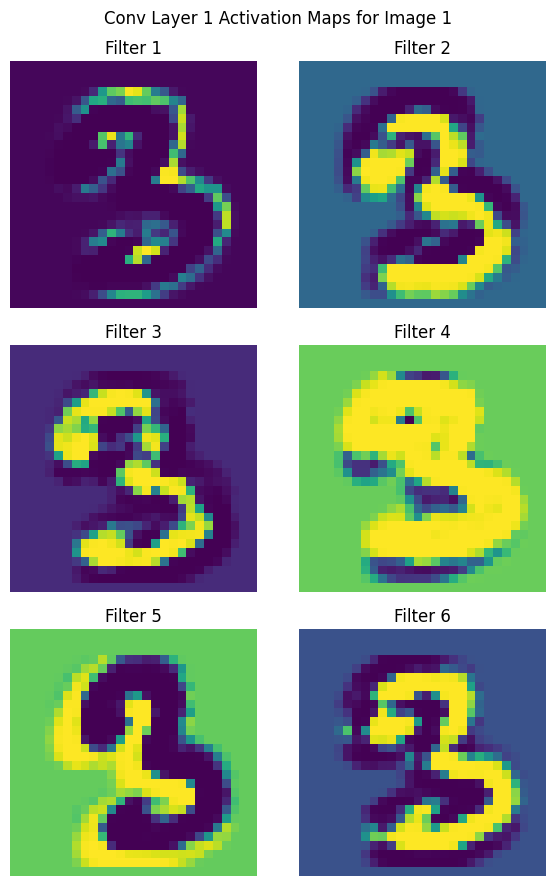

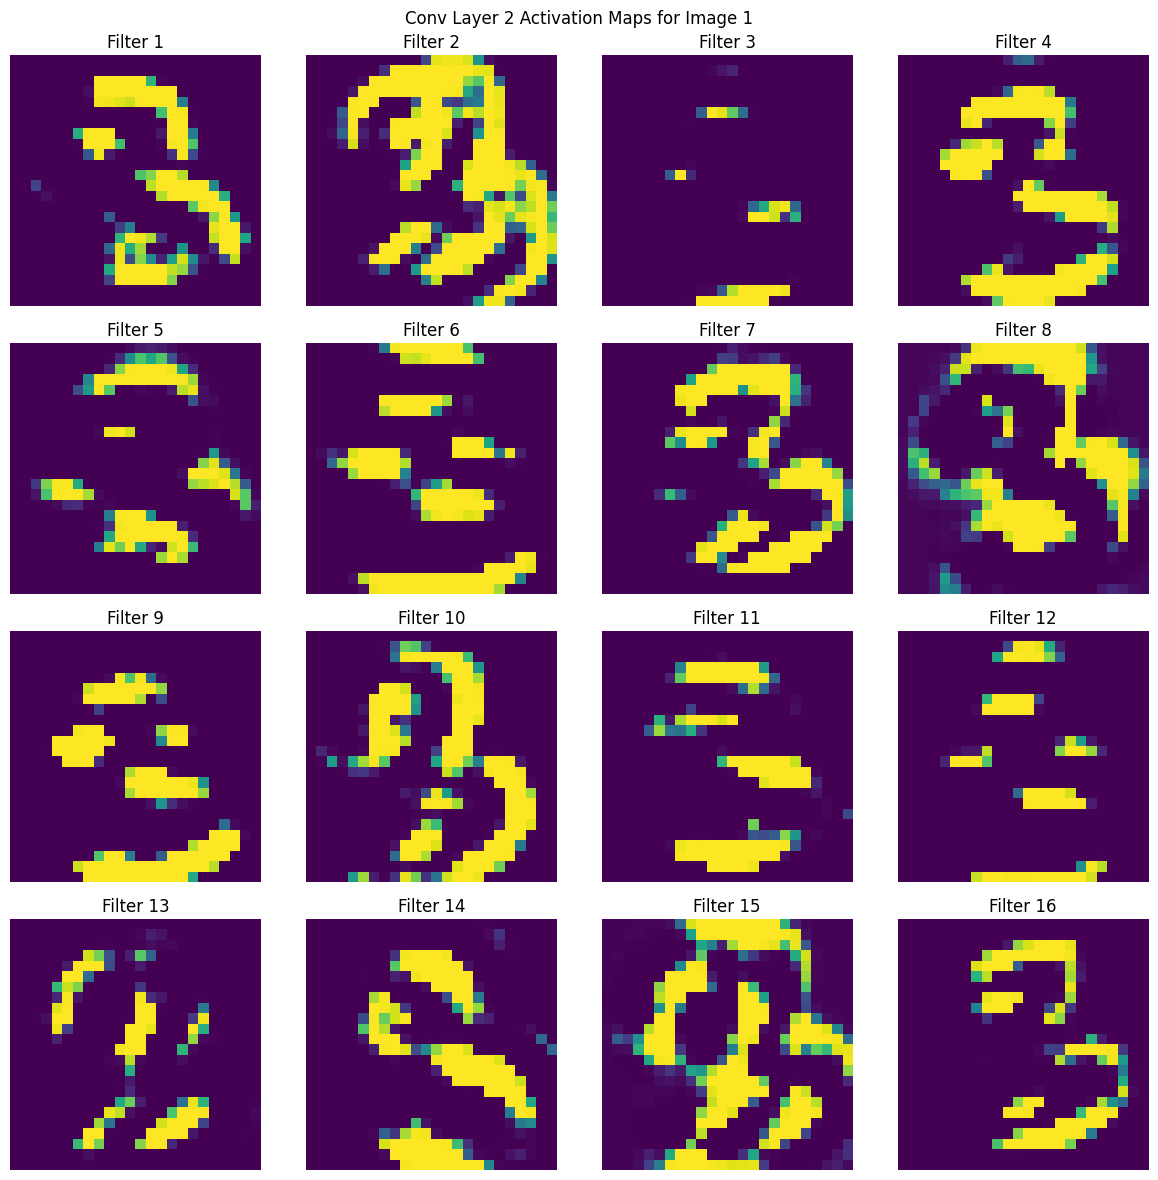

In [72]:
plot_activation_maps(models["model_conf_penalty"].model, train_loader, num_images=1)

#### Plot of Predicted Scores

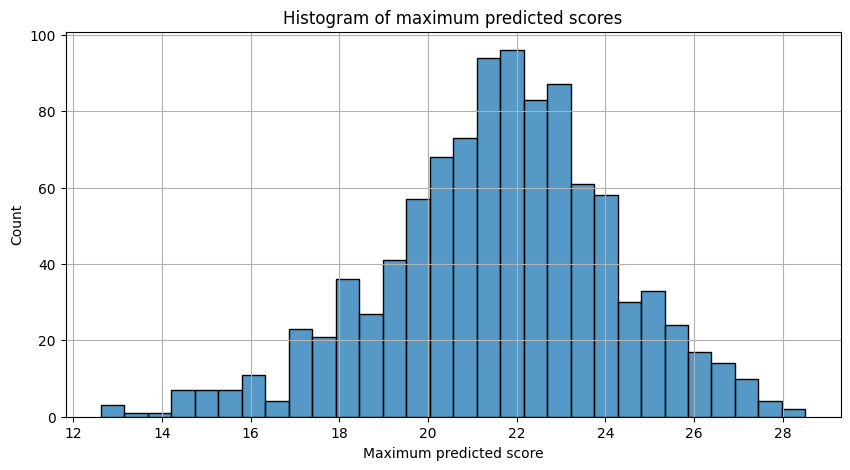

In [73]:
plot_max_predicted_scores(
    models["model_conf_penalty"].model, train_loader, num_batches=10
)

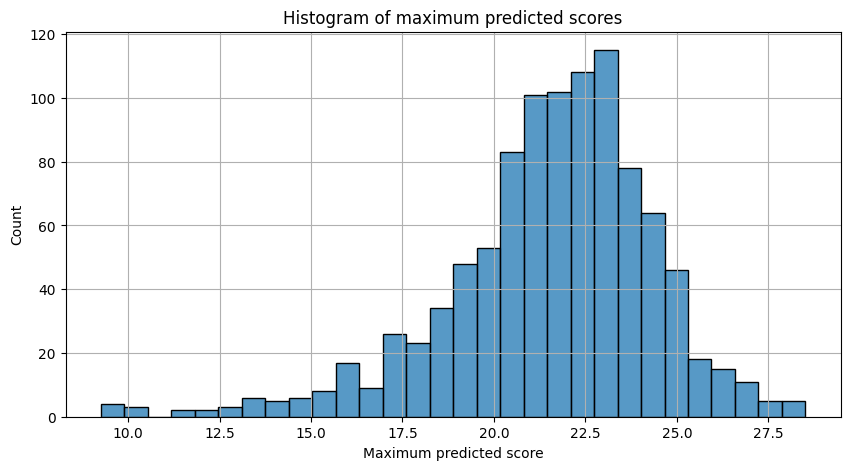

In [74]:
plot_max_predicted_scores(
    models["model_conf_penalty"].model, test_loader, num_batches=10
)

#### Plot of PCA of Activations

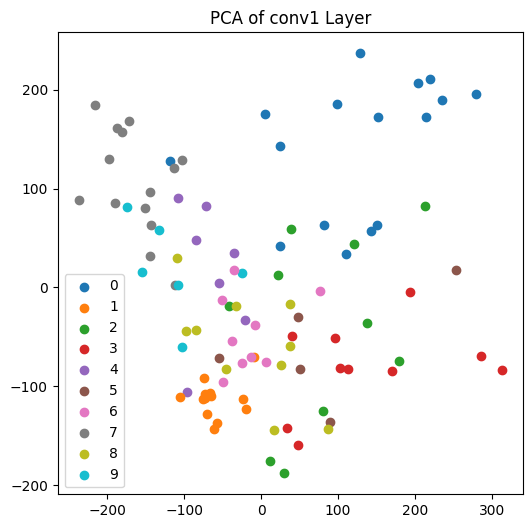

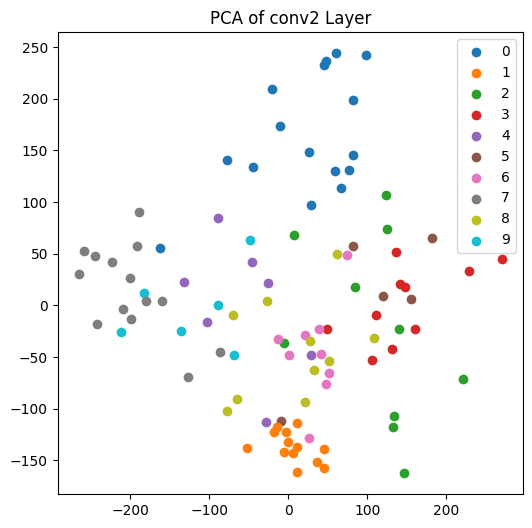

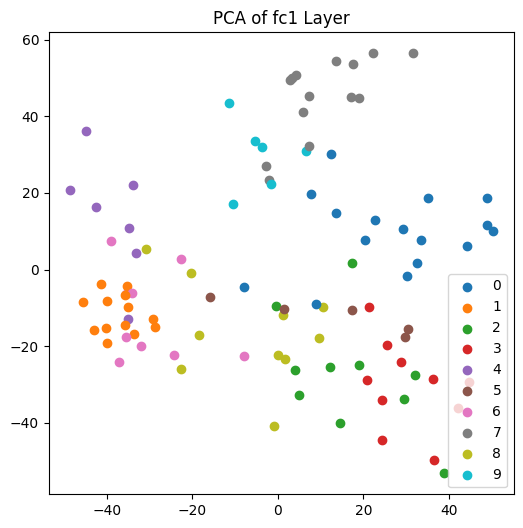

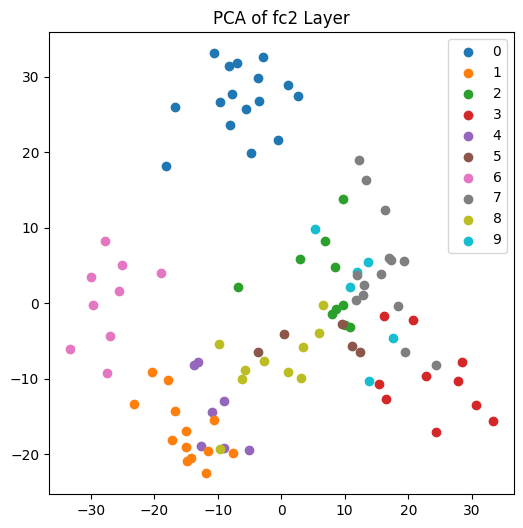

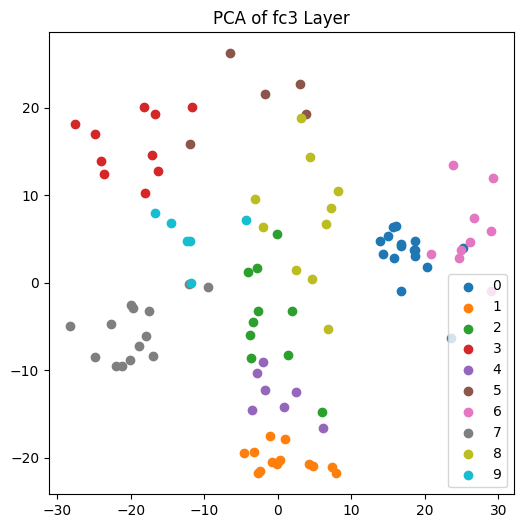

In [75]:
plot_activations_pca(models["model_conf_penalty"].model, train_loader, device)

#### Plot of t-SNE of Activations

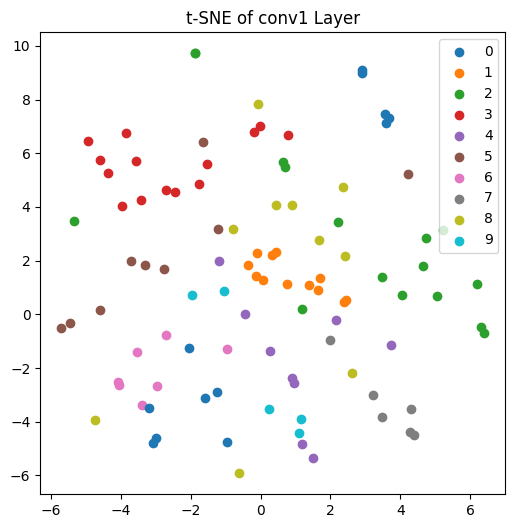

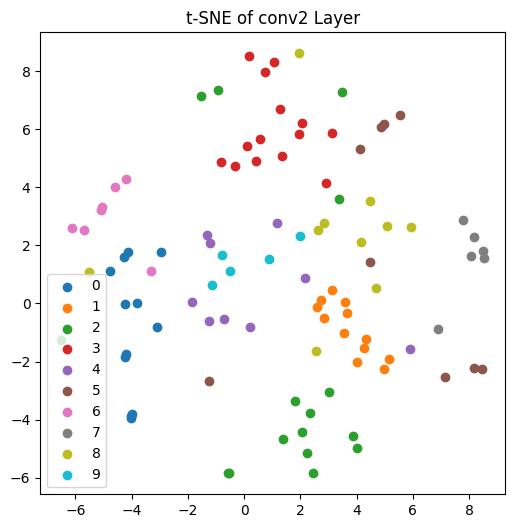

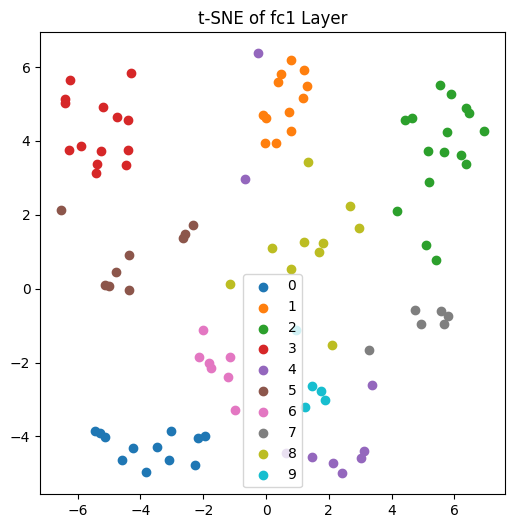

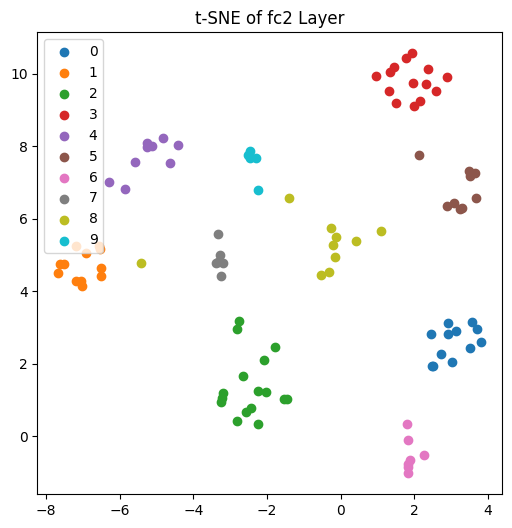

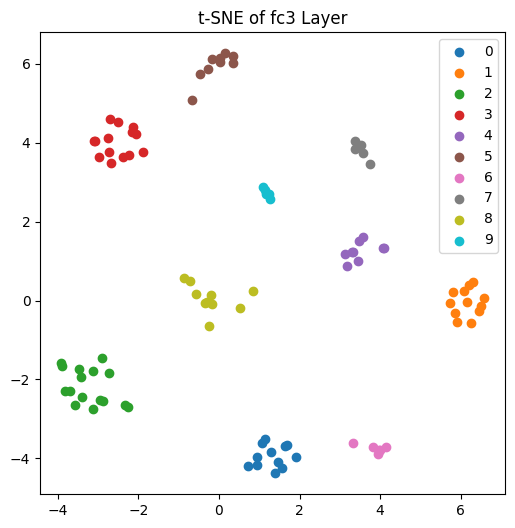

In [76]:
plot_activations_tsne(models["model_conf_penalty"].model, train_loader, device)

#### Plots of Saliency Maps

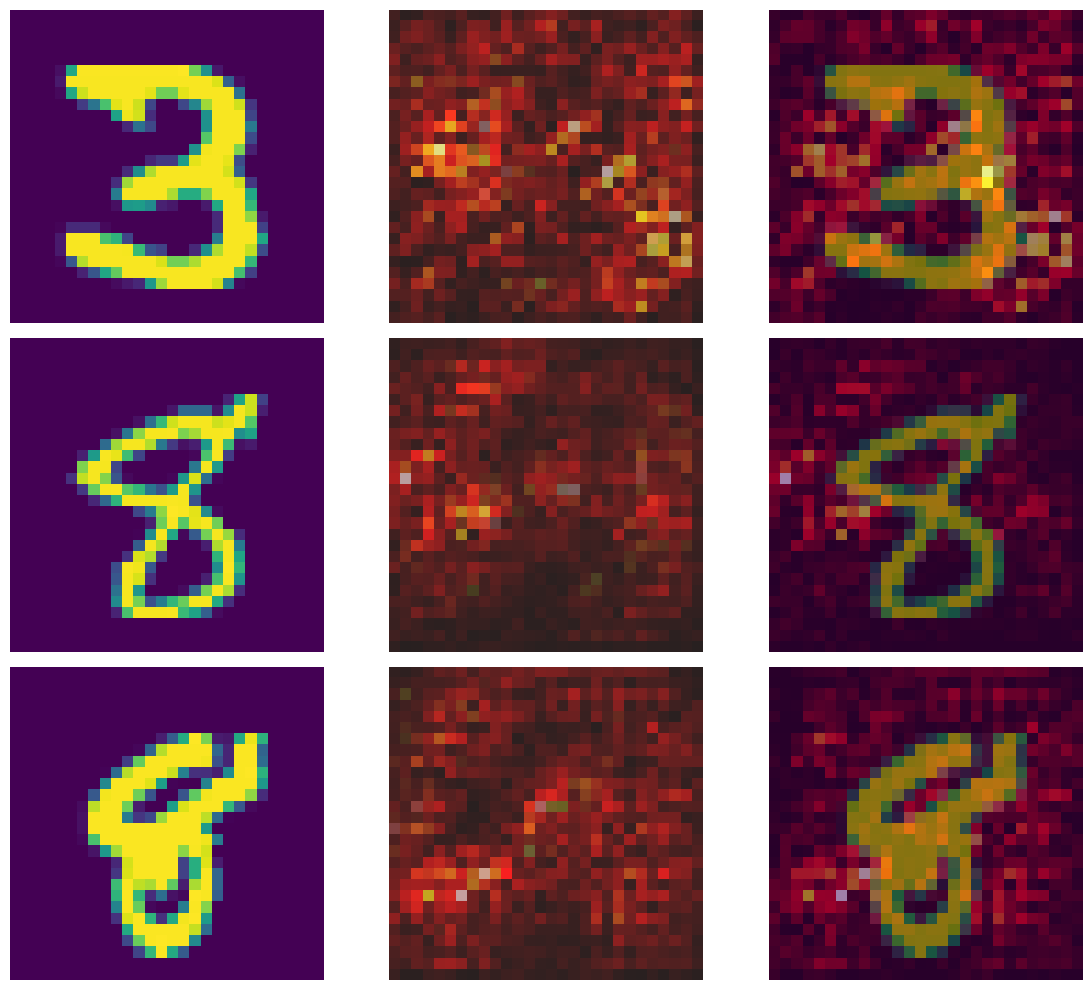

In [77]:
plot_saliency_maps(models["model_conf_penalty"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

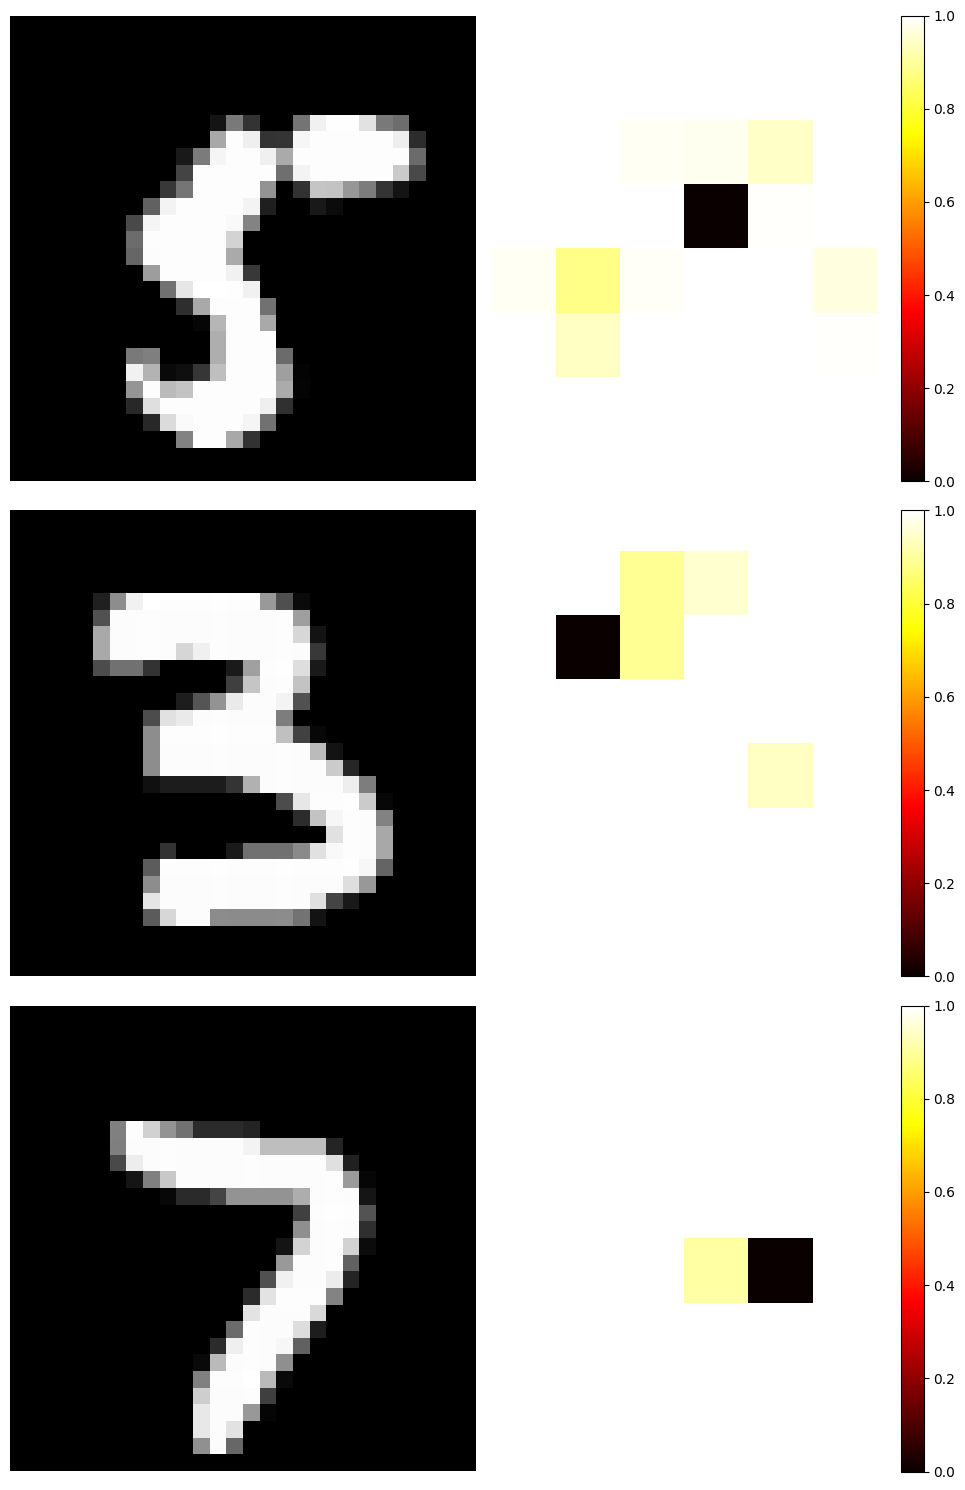

In [78]:
plot_occlusion_sensitivity(
    models["model_conf_penalty"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

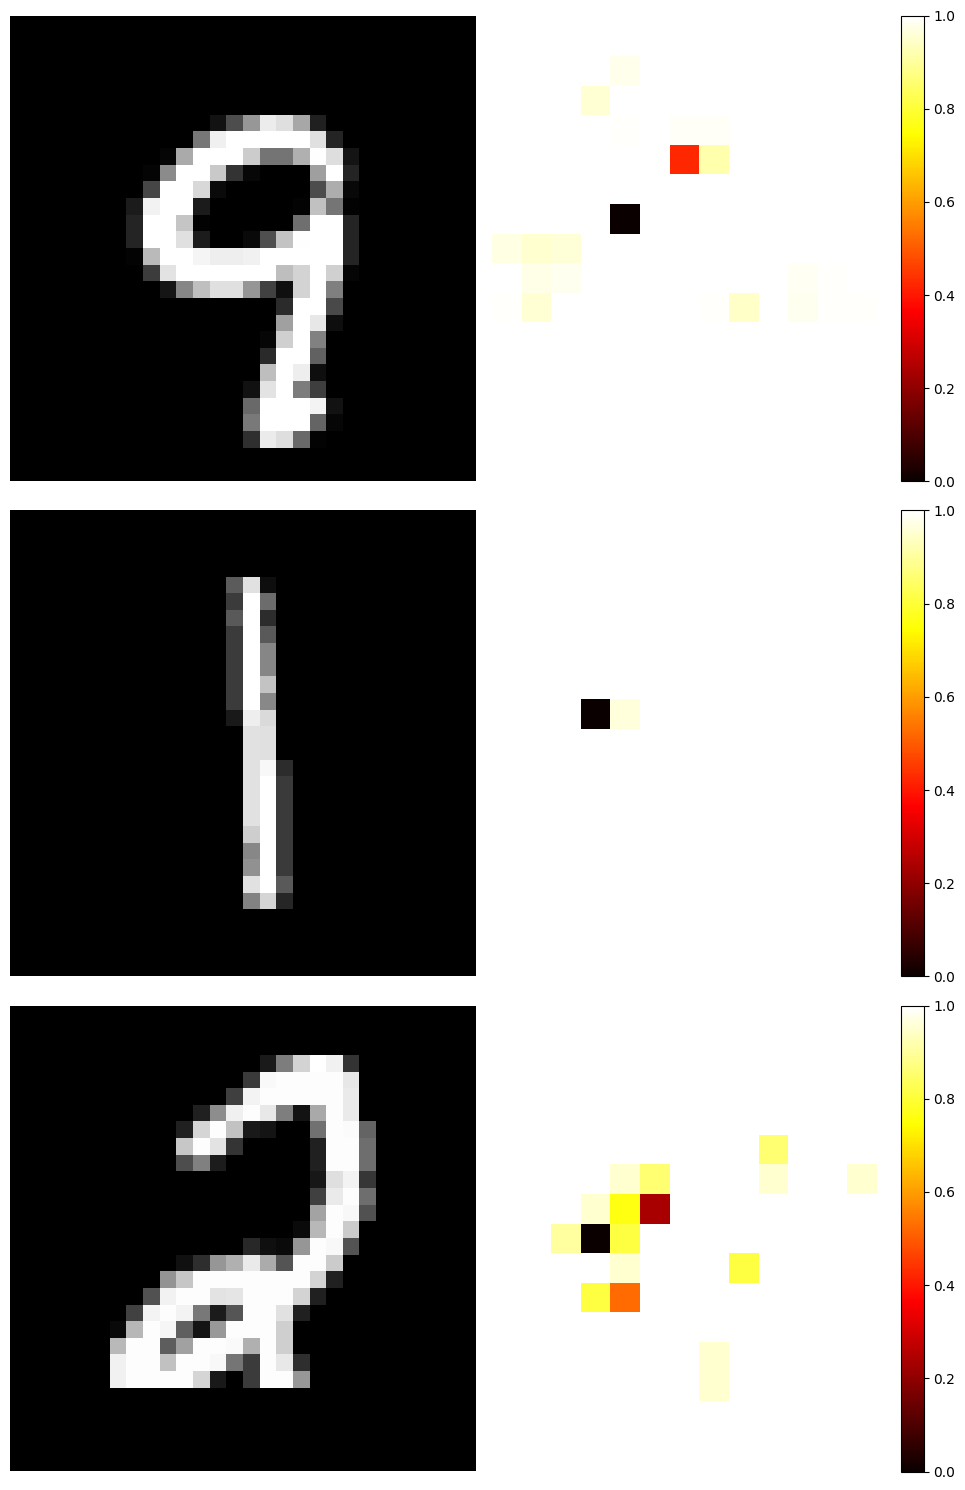

In [79]:
plot_occlusion_sensitivity(
    models["model_conf_penalty"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

### Label Smoothing Regularization

#### Plot of Losses and Accuracies

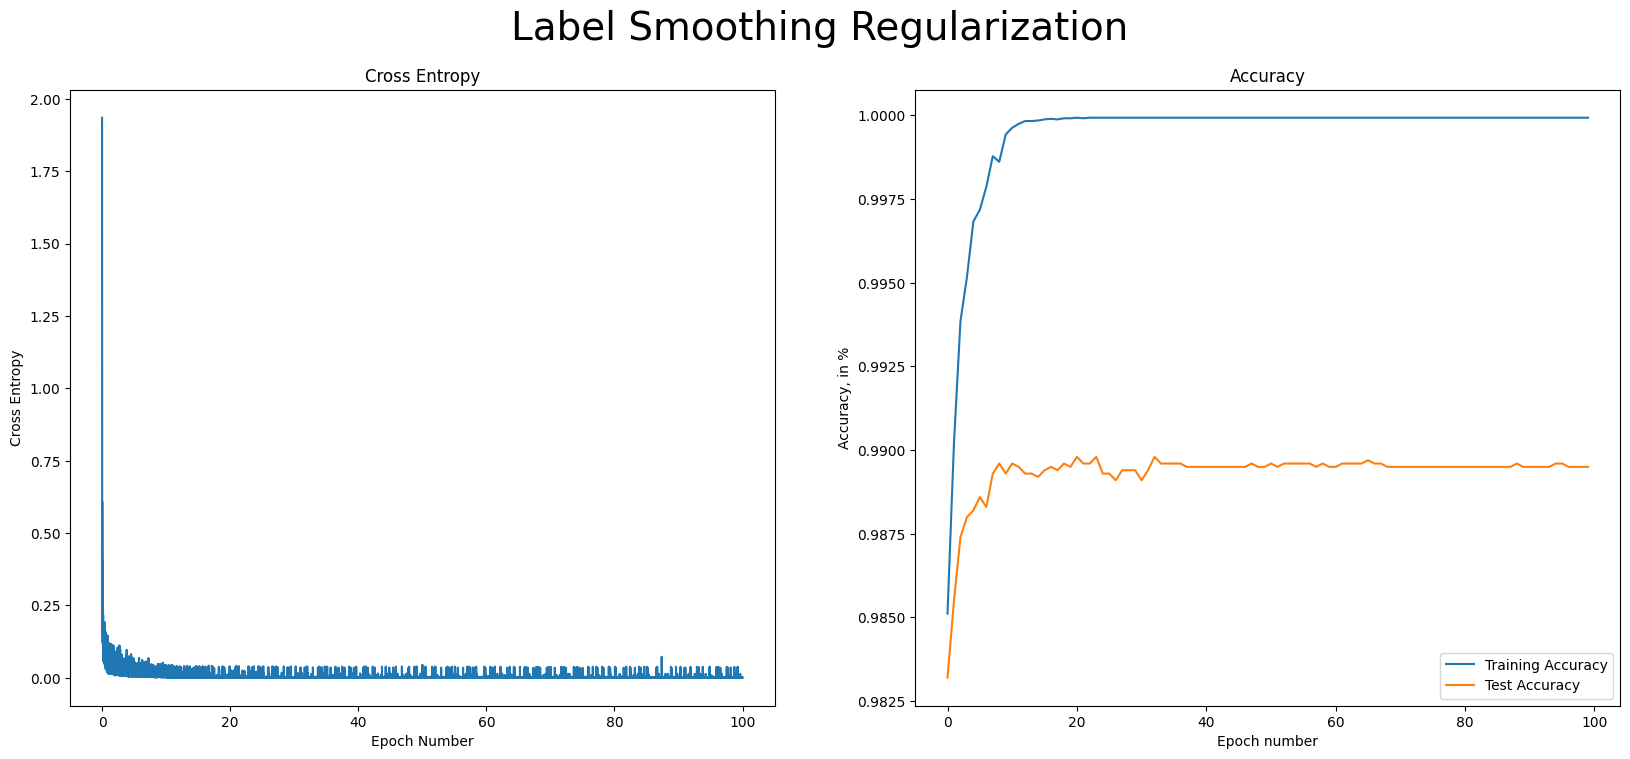

In [80]:
plot_results(
    models, model_name="model_label_smoothing", title="Label Smoothing Regularization"
)

#### Plots of Activation Maps

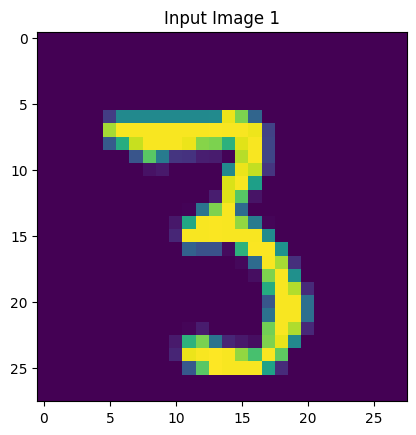

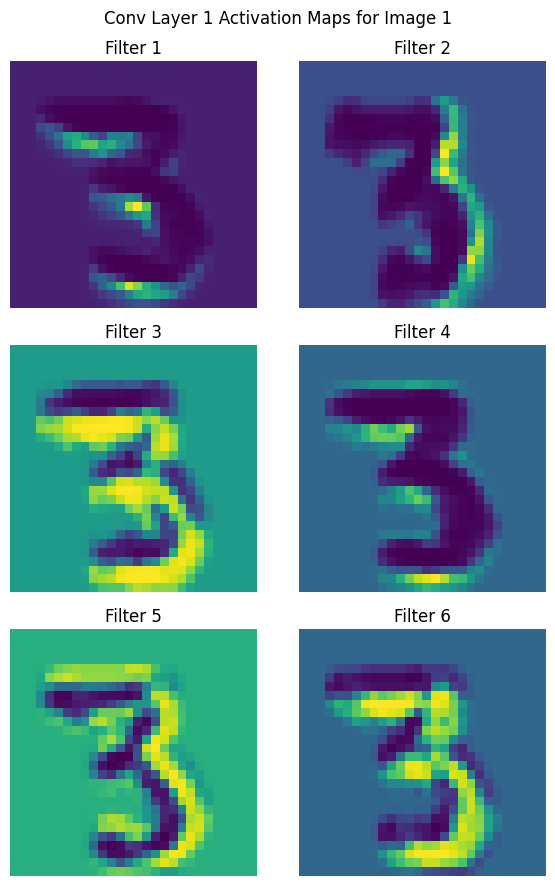

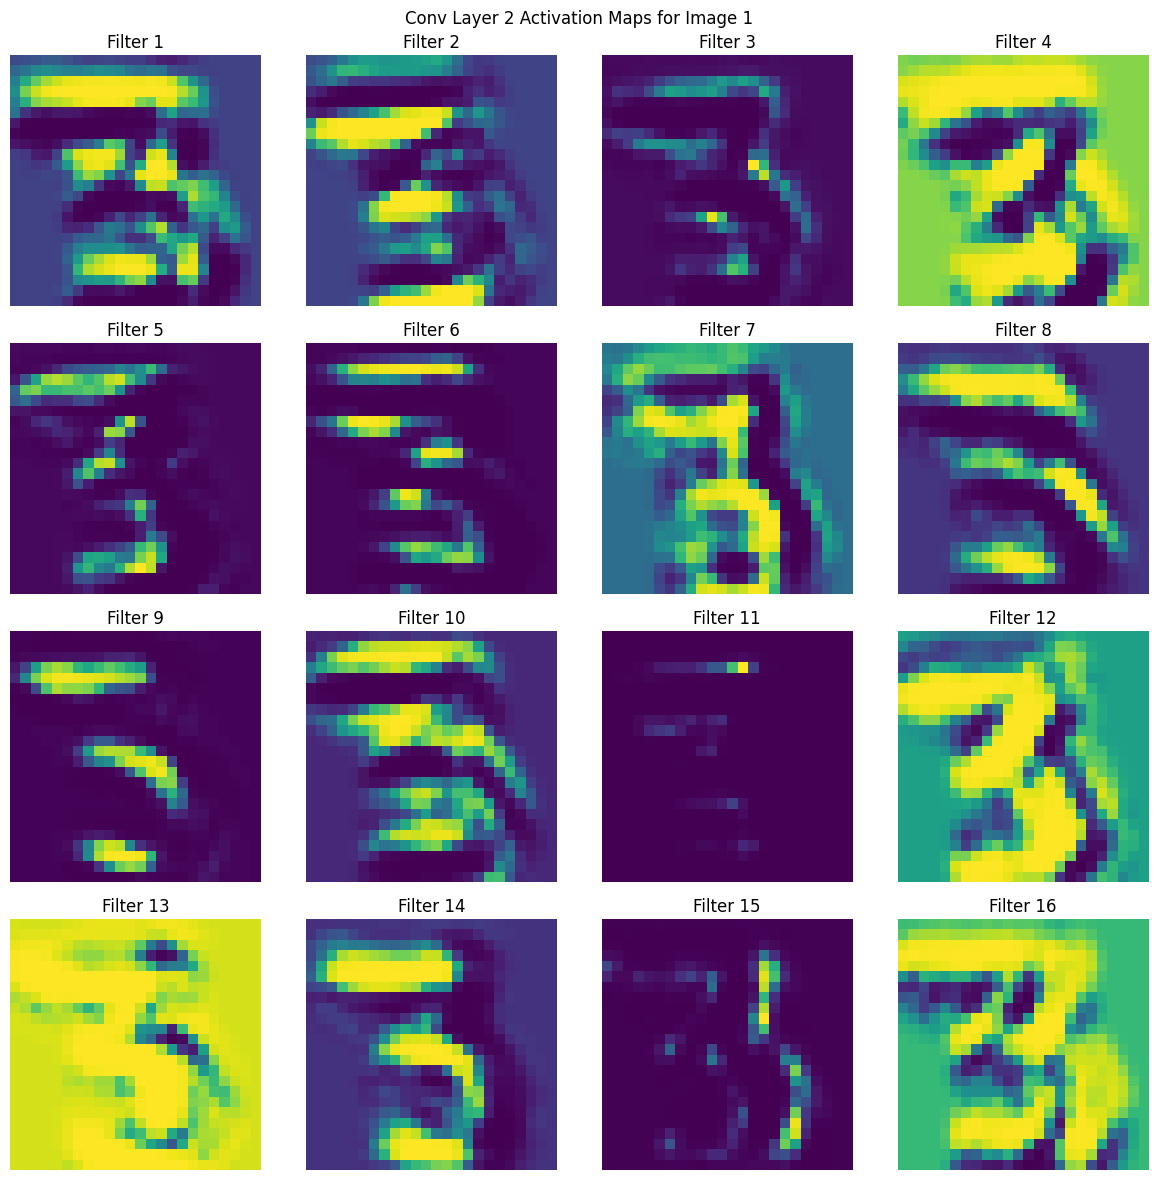

In [81]:
plot_activation_maps(models["model_label_smoothing"].model, train_loader, num_images=1)

#### Plot of Predicted Scores

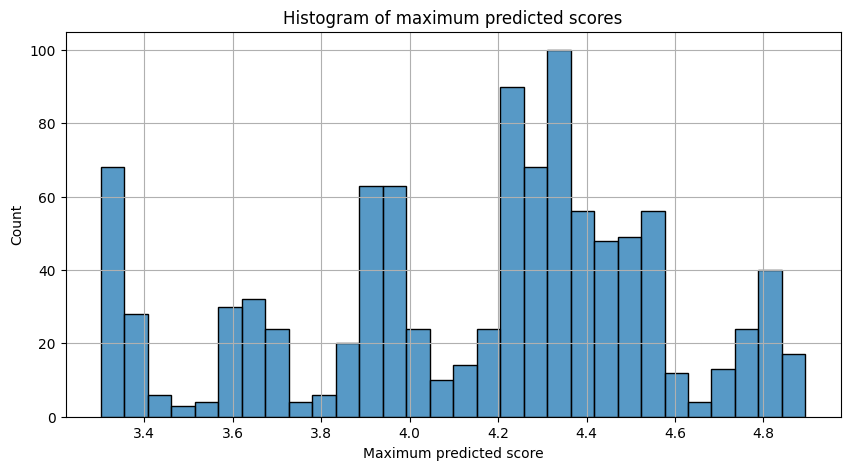

In [82]:
plot_max_predicted_scores(
    models["model_label_smoothing"].model, train_loader, num_batches=10
)

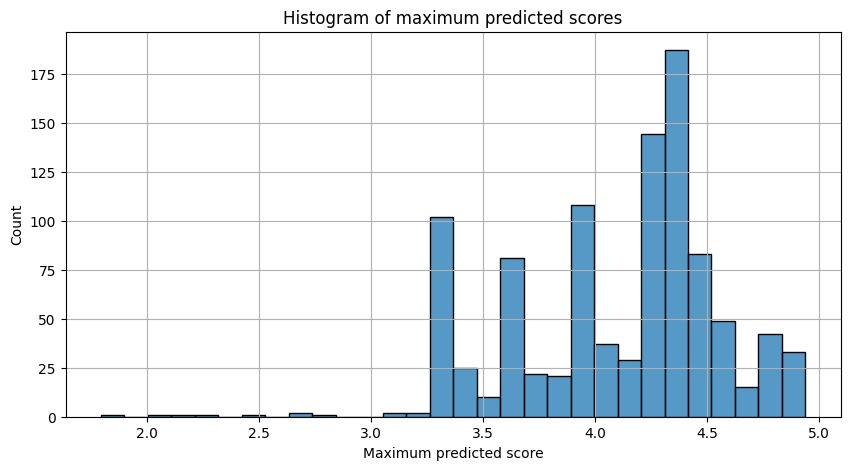

In [83]:
plot_max_predicted_scores(
    models["model_label_smoothing"].model, test_loader, num_batches=10
)

#### Plot of PCA of Activations

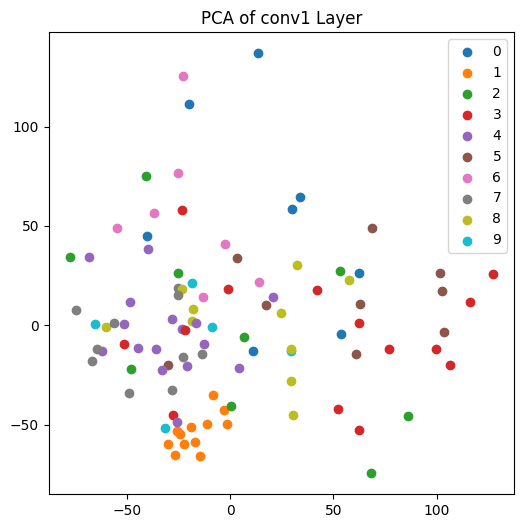

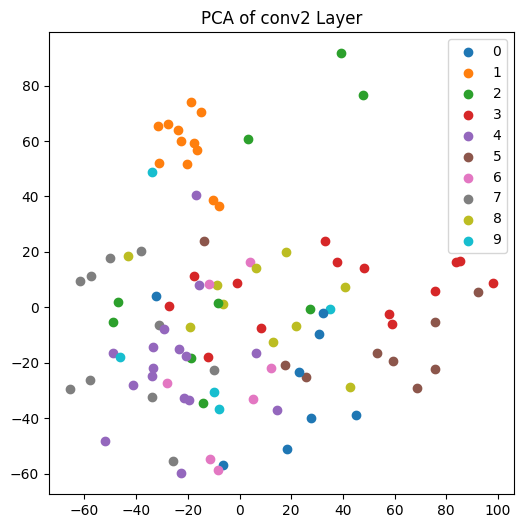

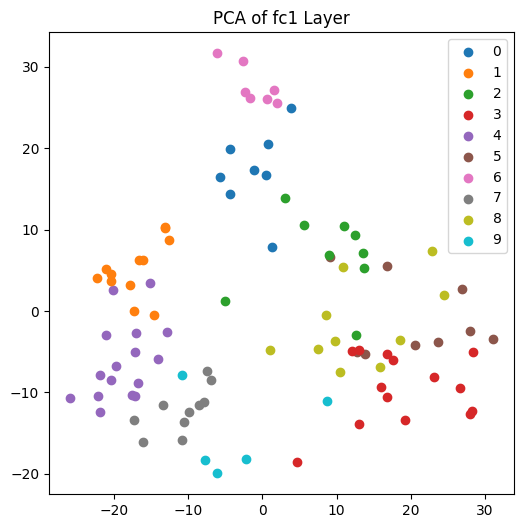

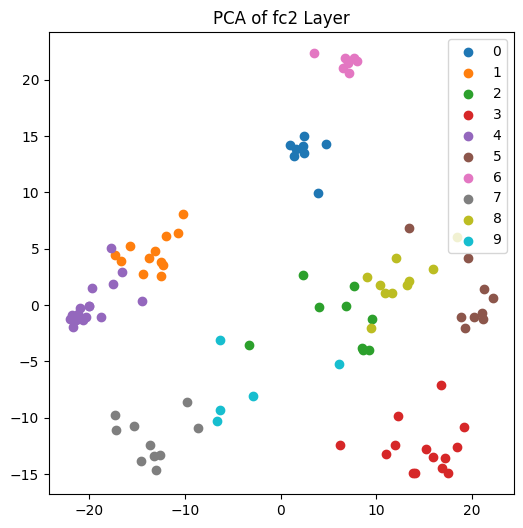

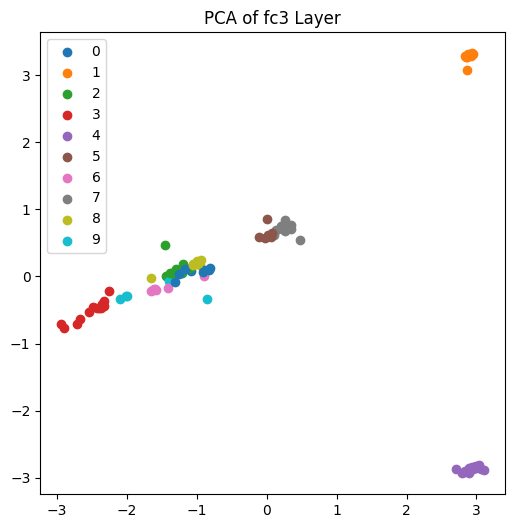

In [84]:
plot_activations_pca(models["model_label_smoothing"].model, train_loader, device)

#### Plot of t-SNE of Activations

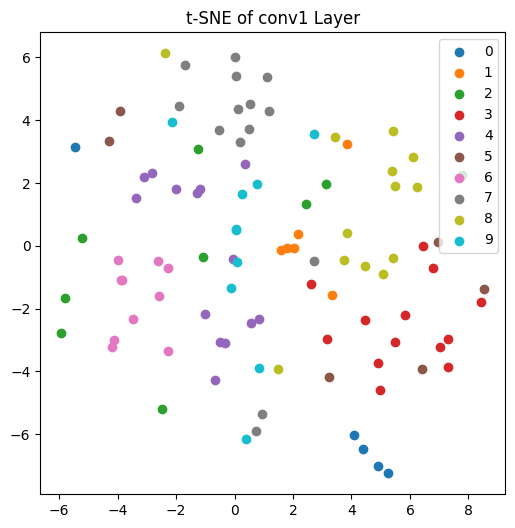

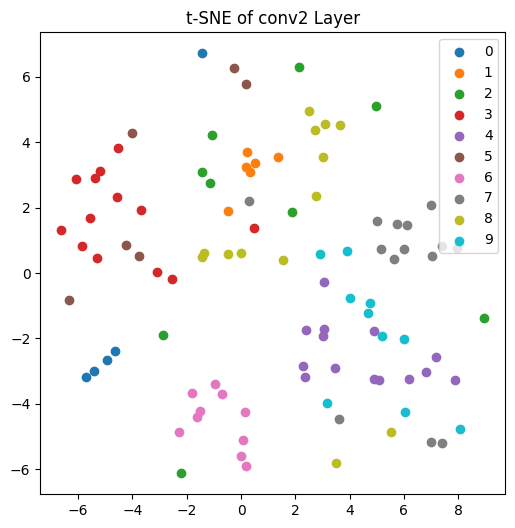

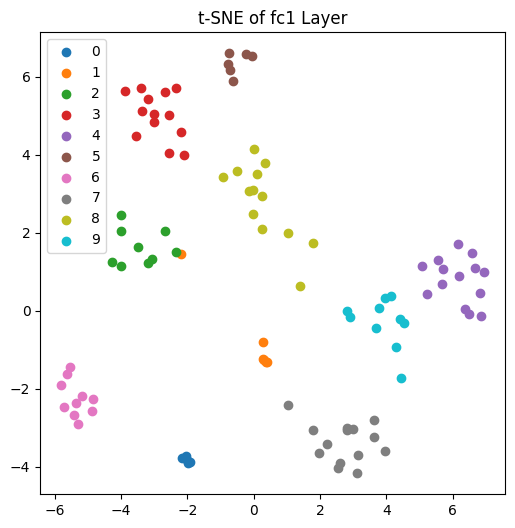

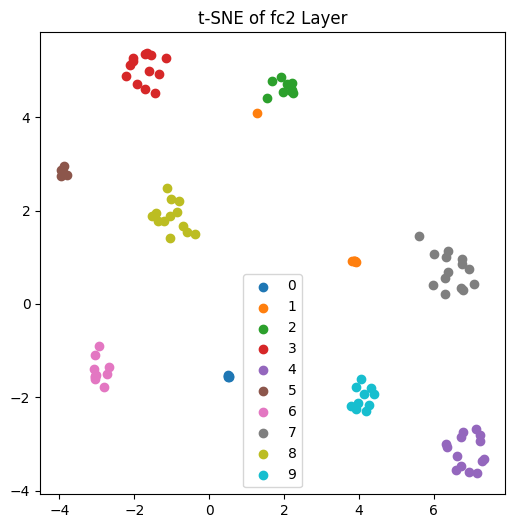

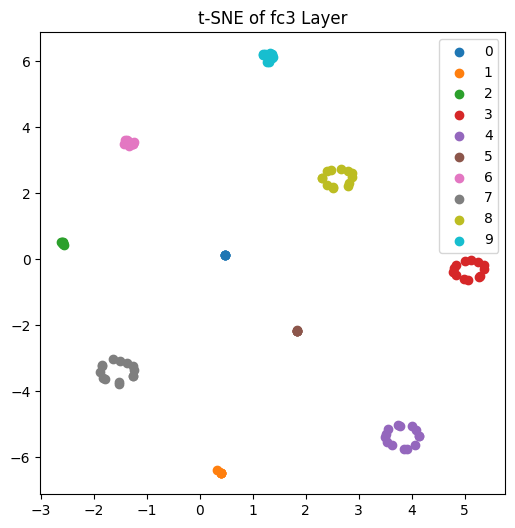

In [85]:
plot_activations_tsne(models["model_label_smoothing"].model, train_loader, device)

#### Plots of Saliency Maps

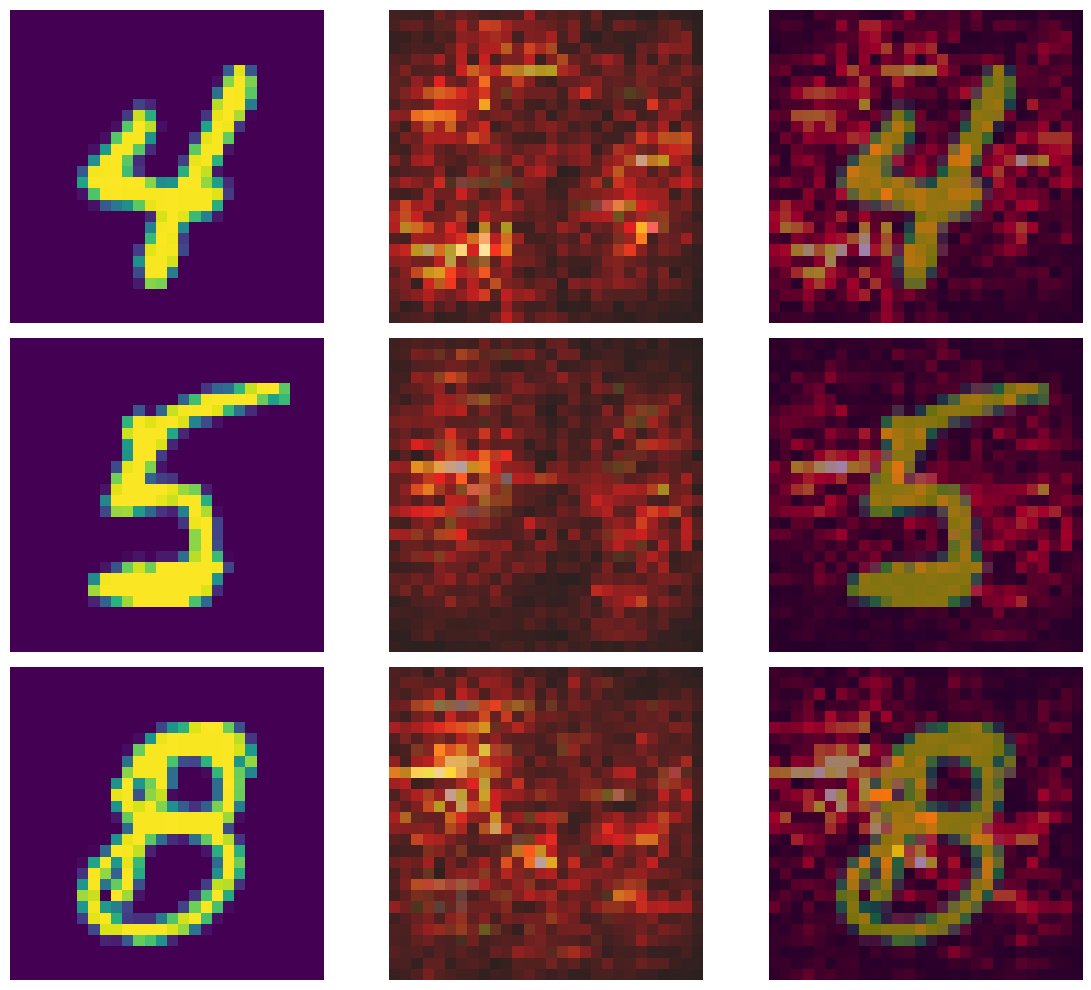

In [86]:
plot_saliency_maps(models["model_label_smoothing"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

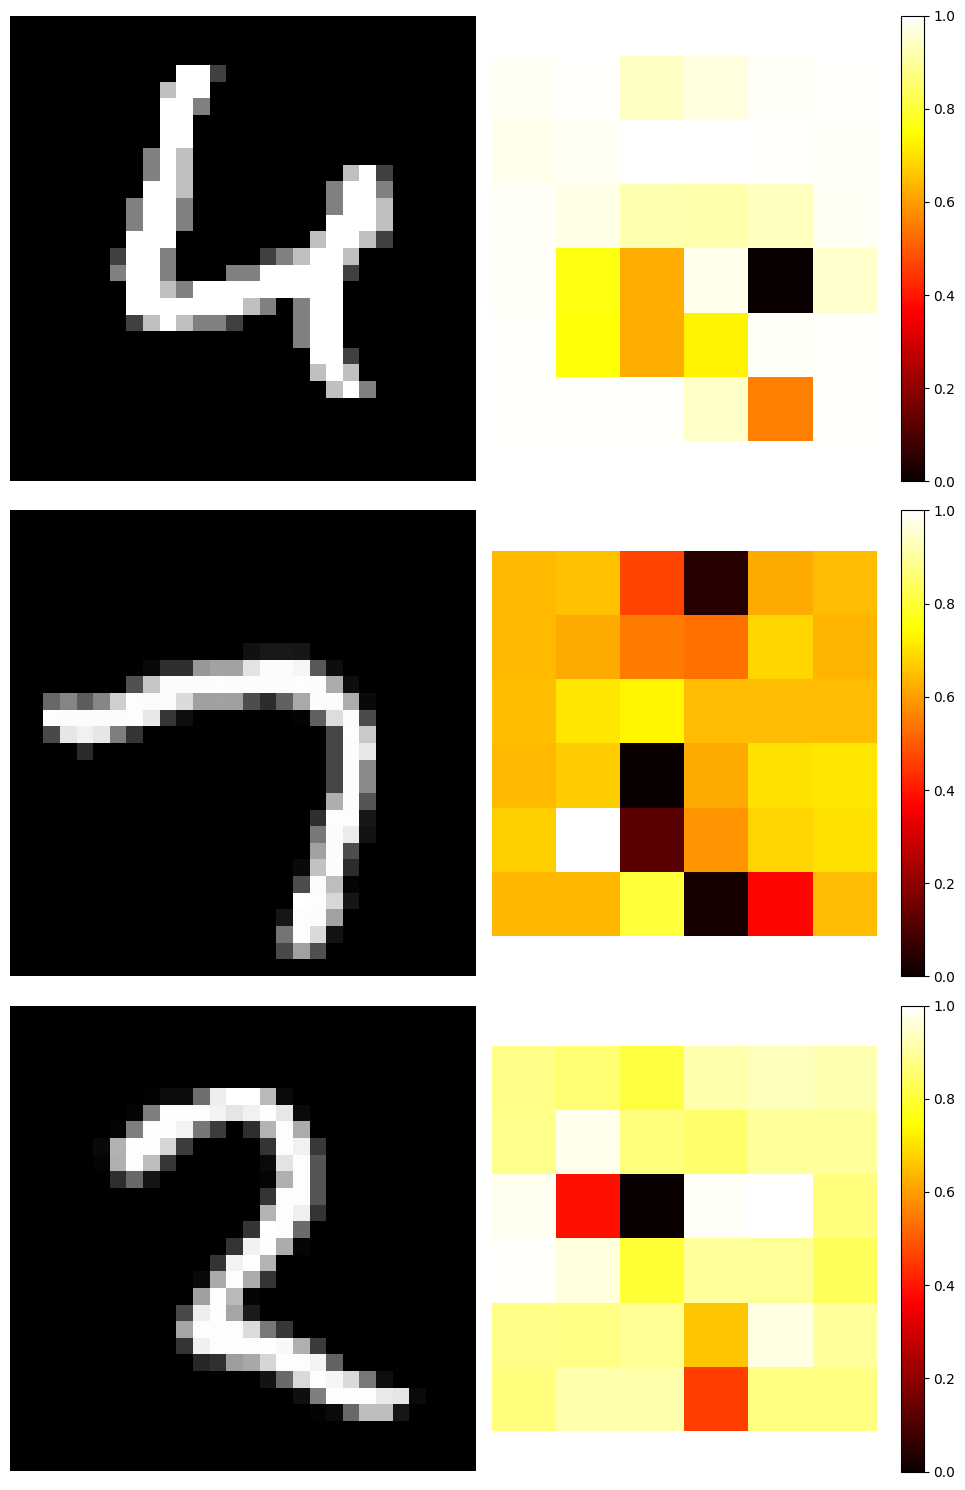

In [87]:
plot_occlusion_sensitivity(
    models["model_label_smoothing"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

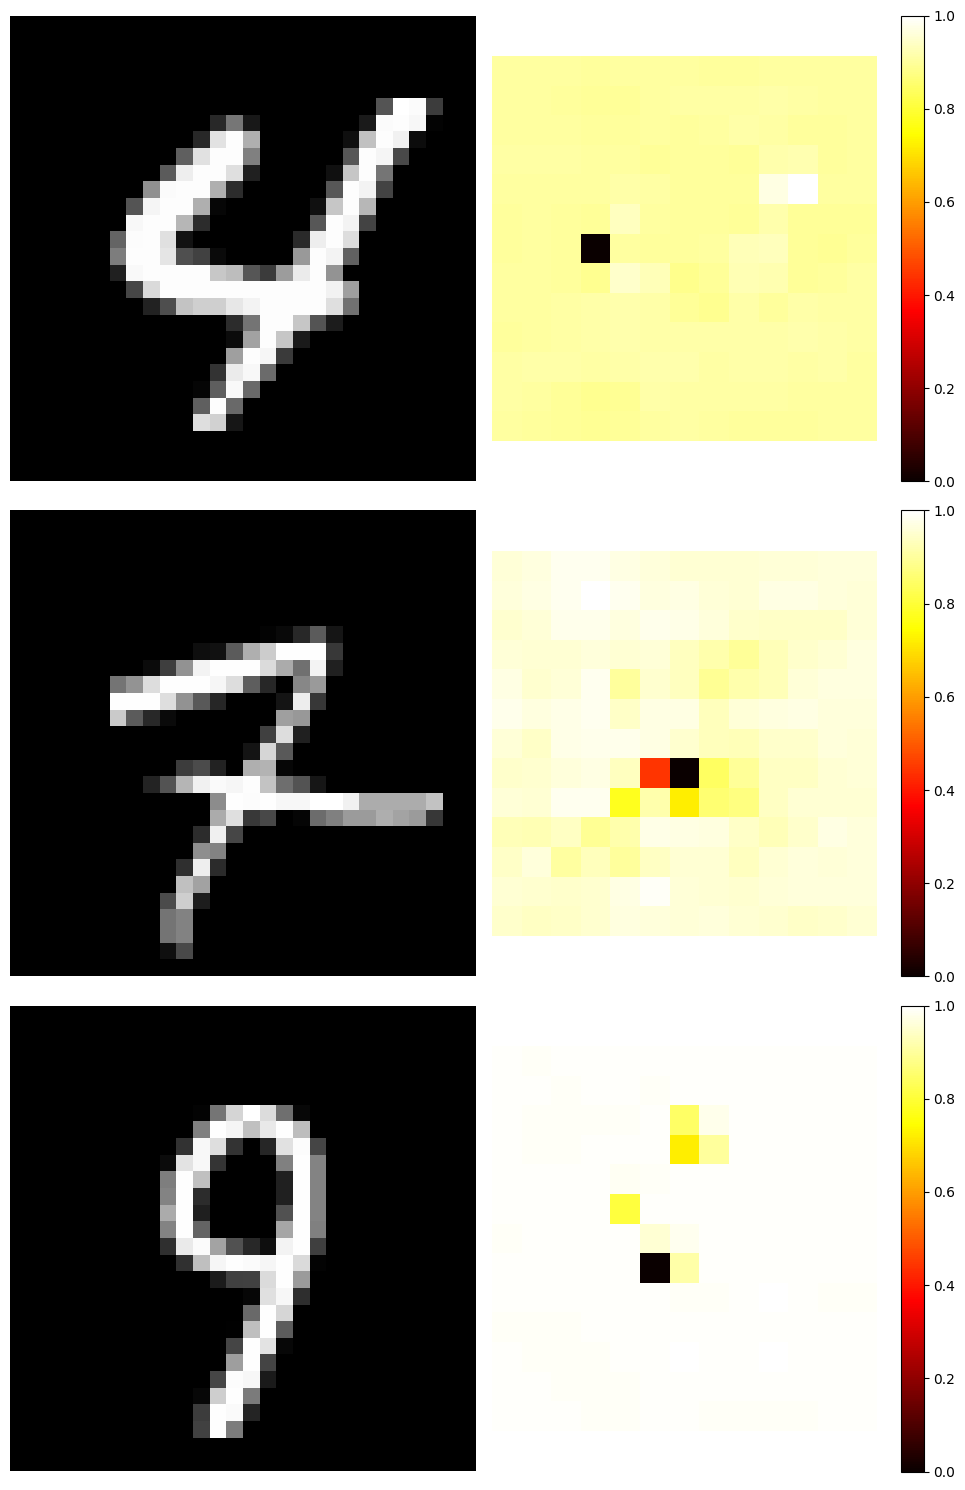

In [88]:
plot_occlusion_sensitivity(
    models["model_label_smoothing"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

### Noise Injection to Inputs

#### Plot of Losses and Accuracies

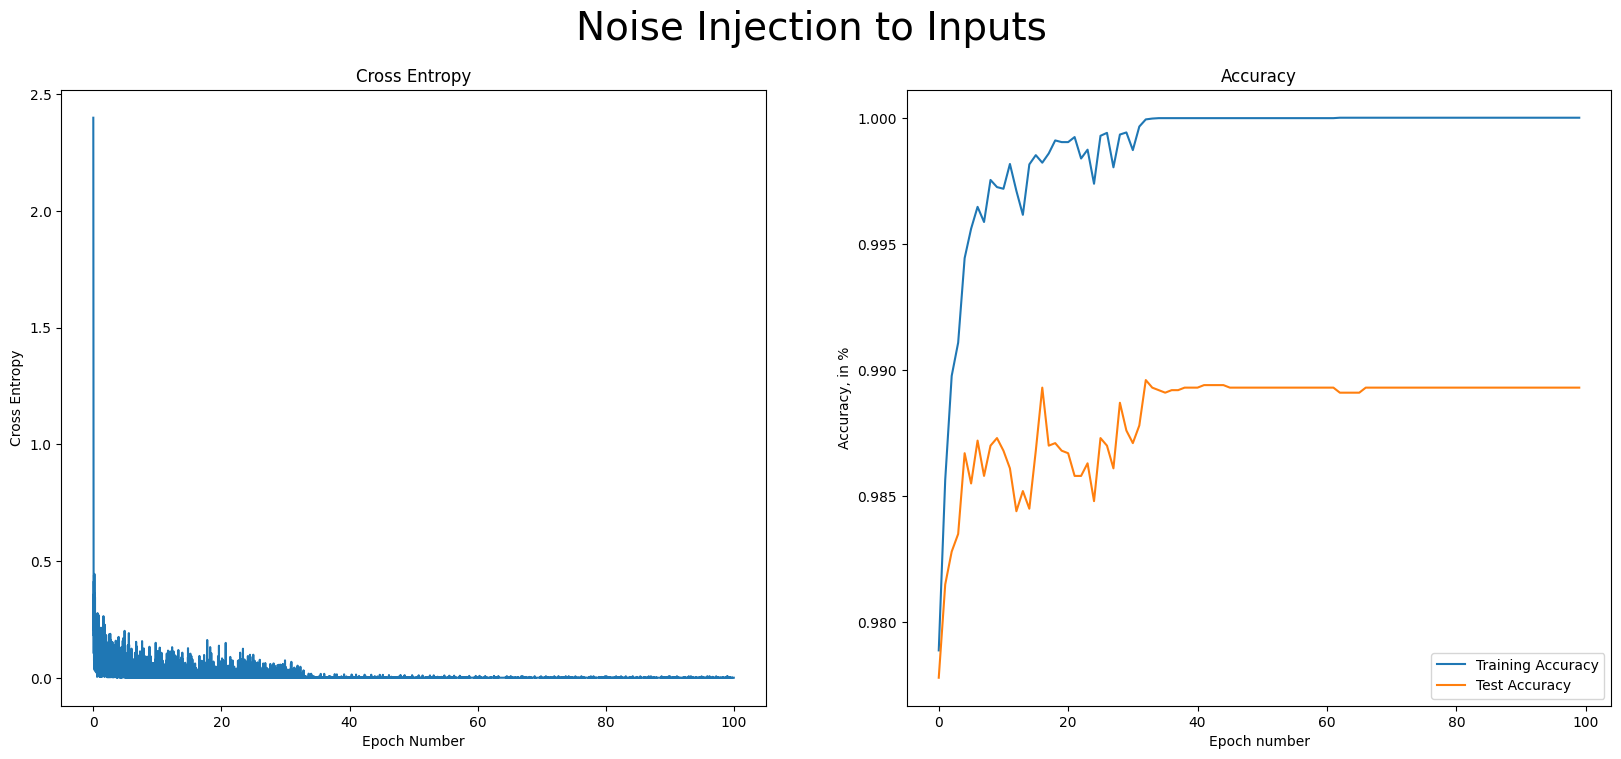

In [89]:
plot_results(
    models, model_name="model_noise_inject_inputs", title="Noise Injection to Inputs"
)

#### Plot of Weight Distributions

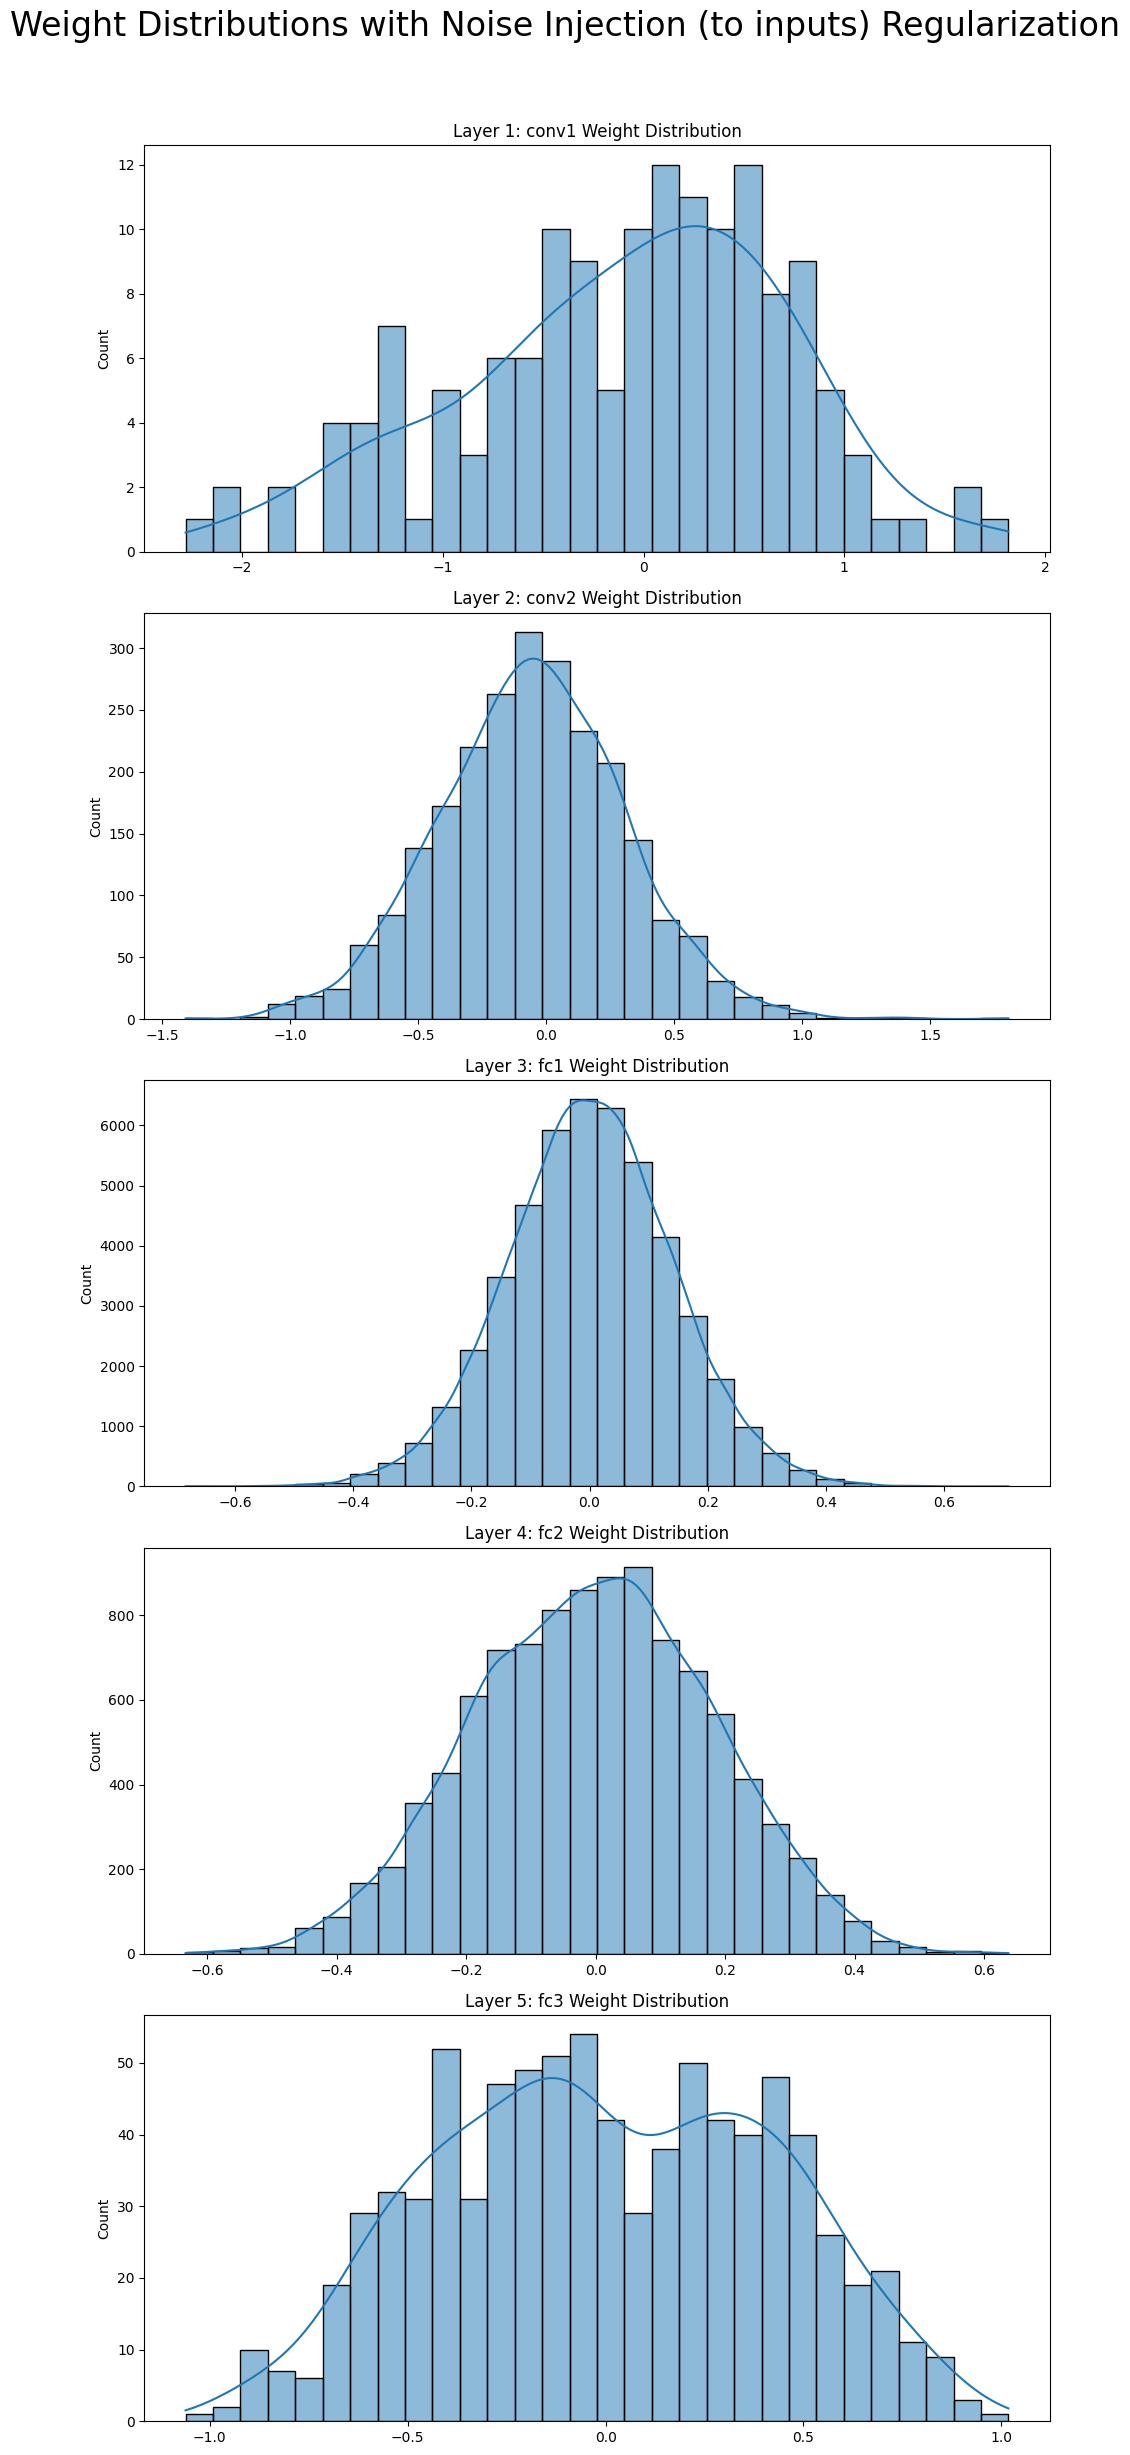

In [90]:
plot_weight_distributions(
    models["model_noise_inject_inputs"].model,
    title="Weight Distributions with Noise Injection (to inputs) Regularization",
)

#### Plots of Activation Maps

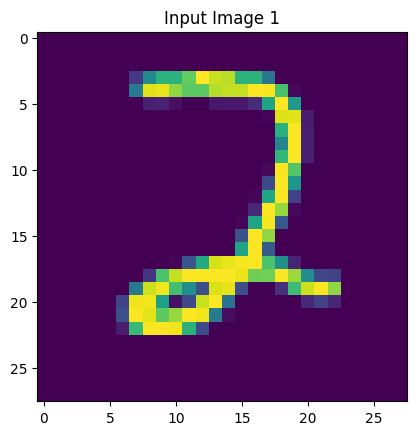

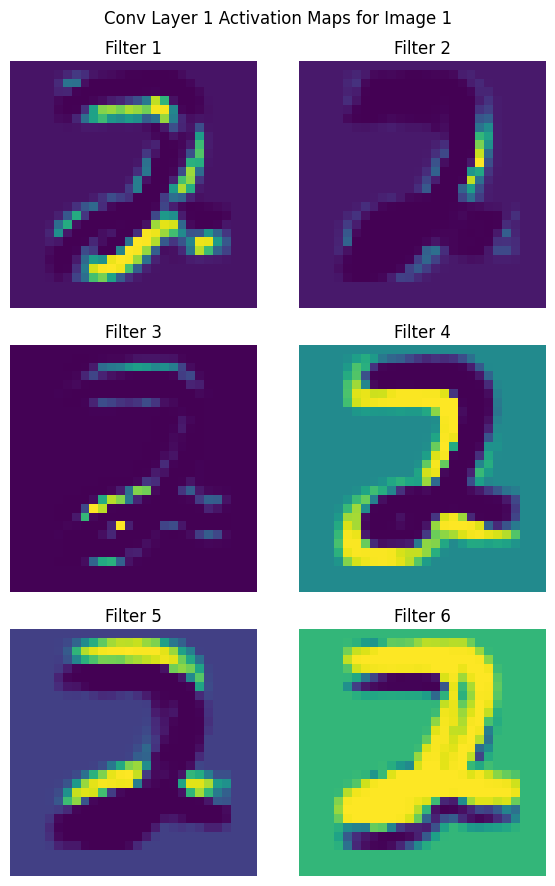

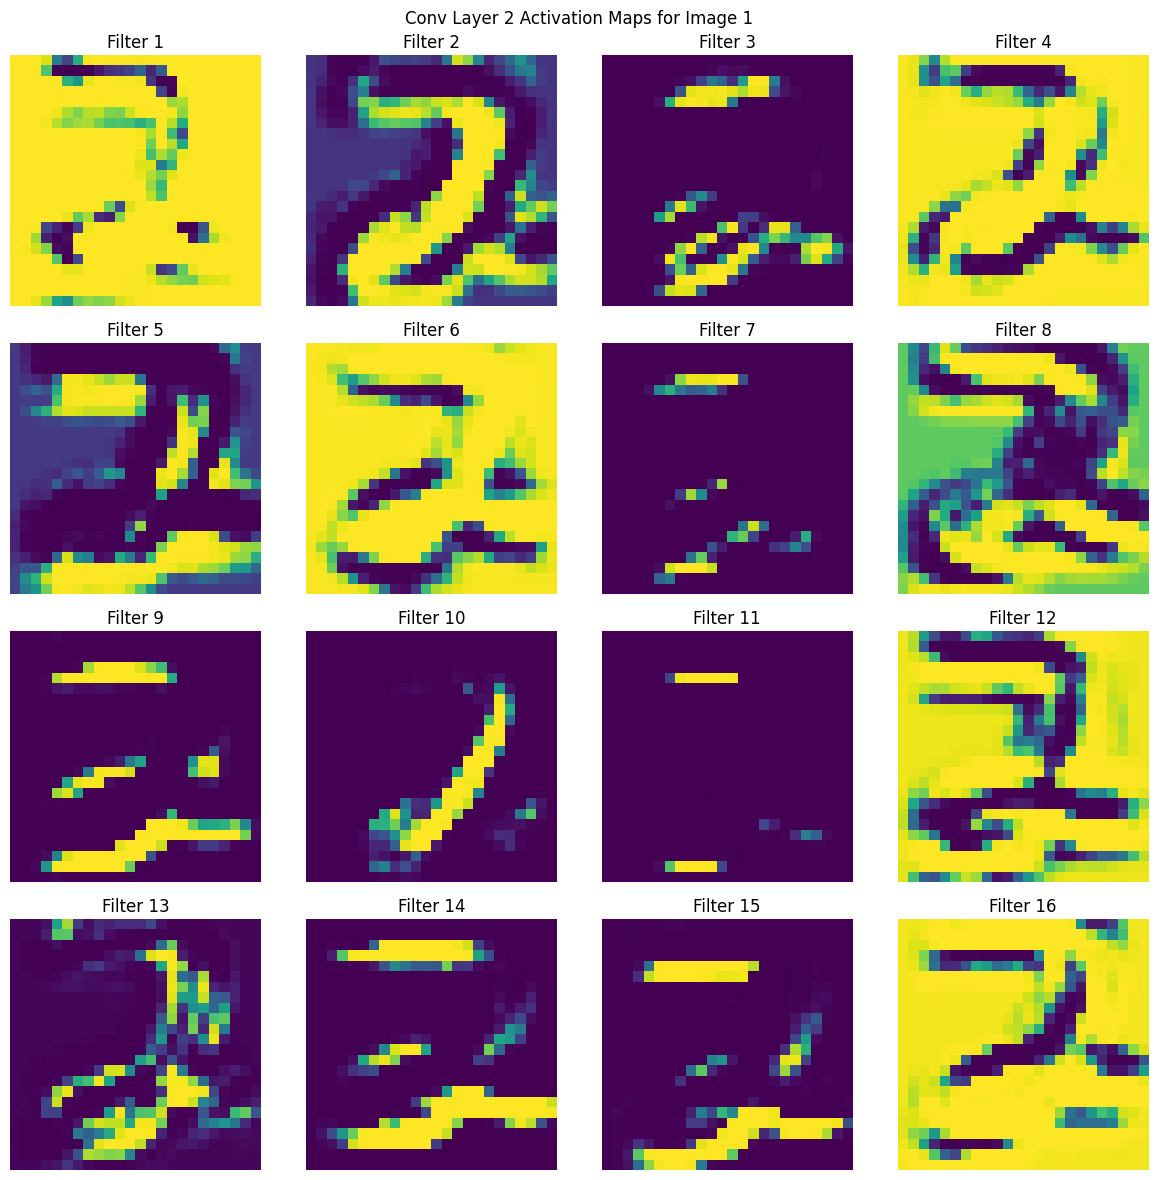

In [91]:
plot_activation_maps(
    models["model_noise_inject_inputs"].model, train_loader, num_images=1
)

#### Plot of PCA of Activations

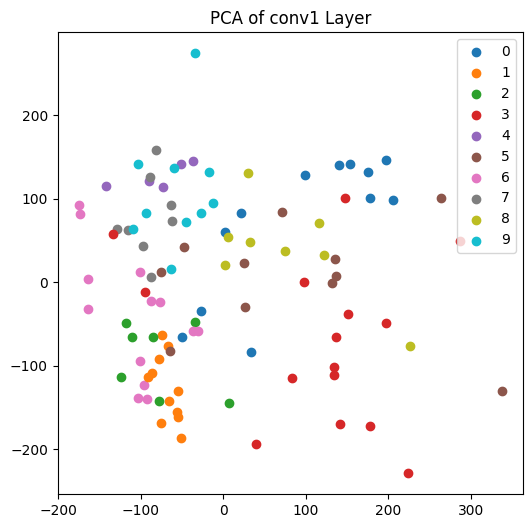

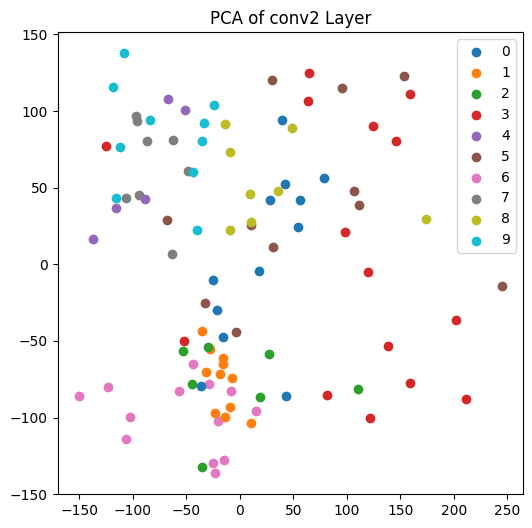

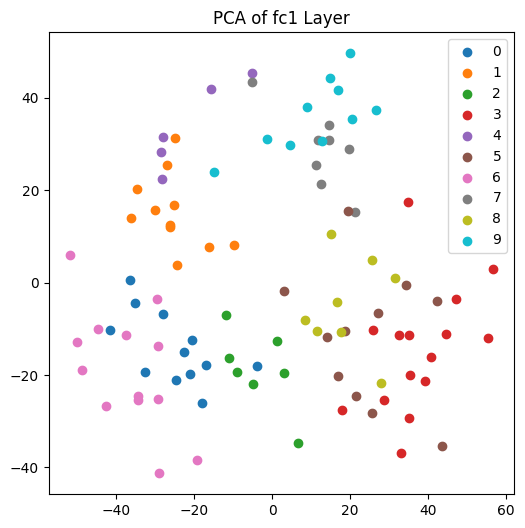

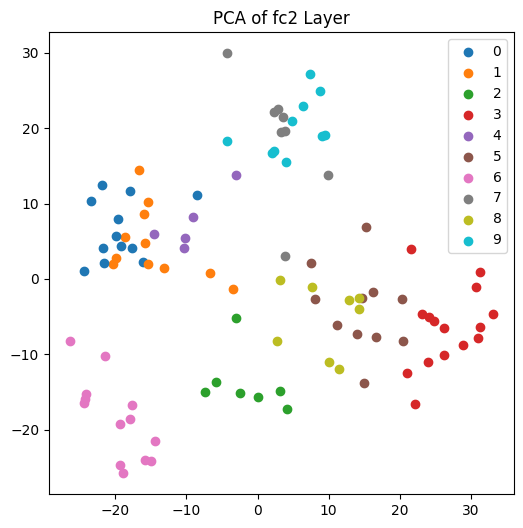

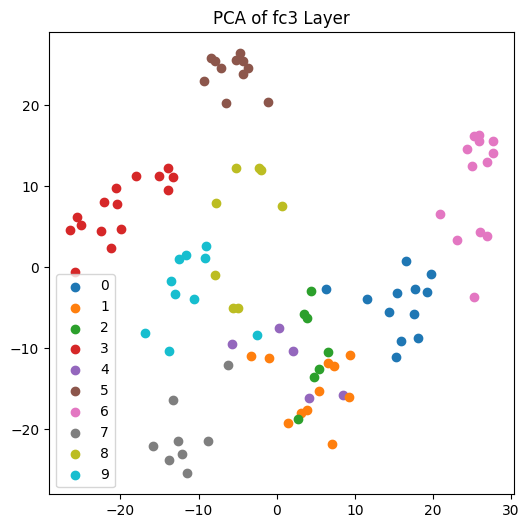

In [92]:
plot_activations_pca(models["model_noise_inject_inputs"].model, train_loader, device)

#### Plot of t-SNE of Activations

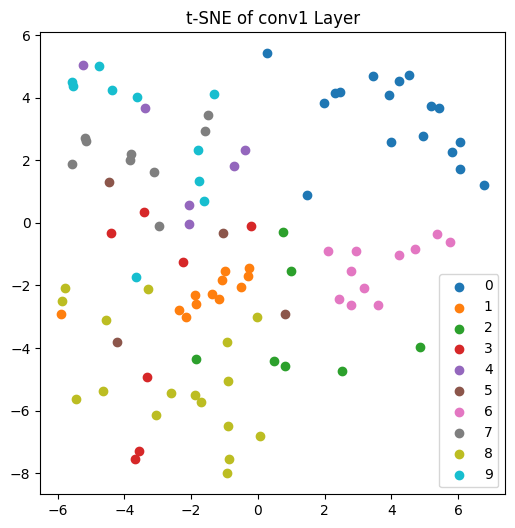

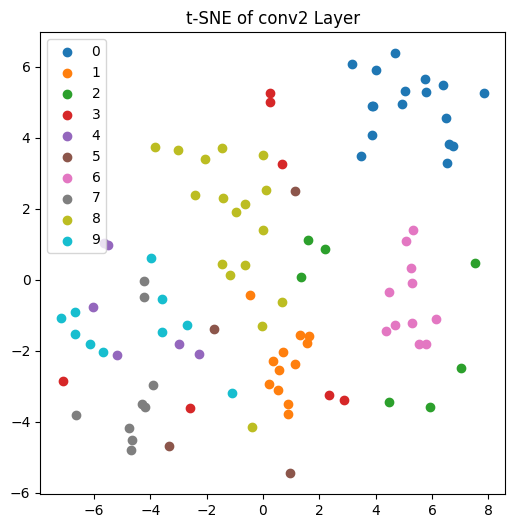

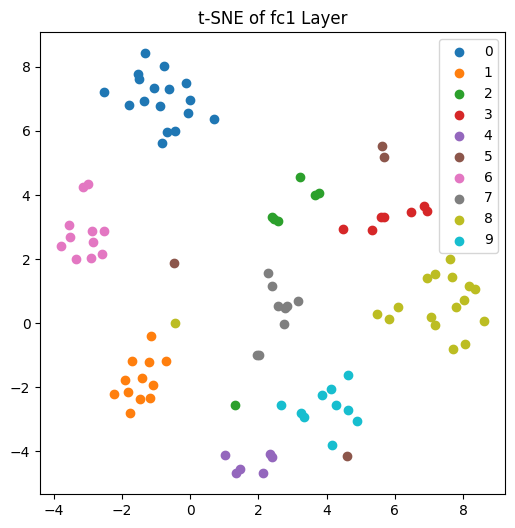

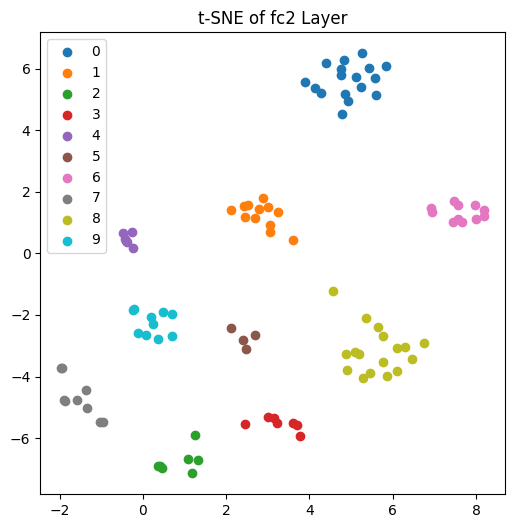

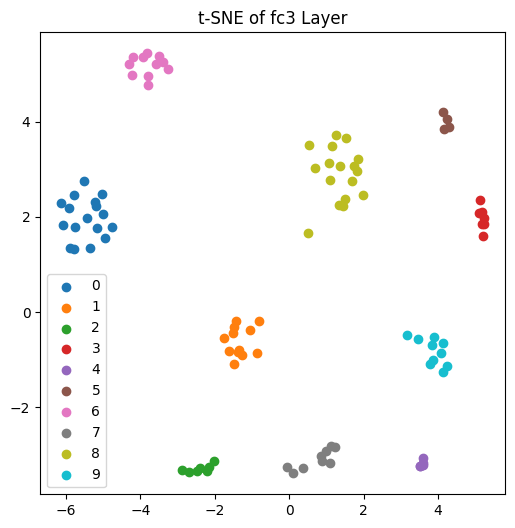

In [93]:
plot_activations_tsne(models["model_noise_inject_inputs"].model, train_loader, device)

#### Plots of Saliency Maps

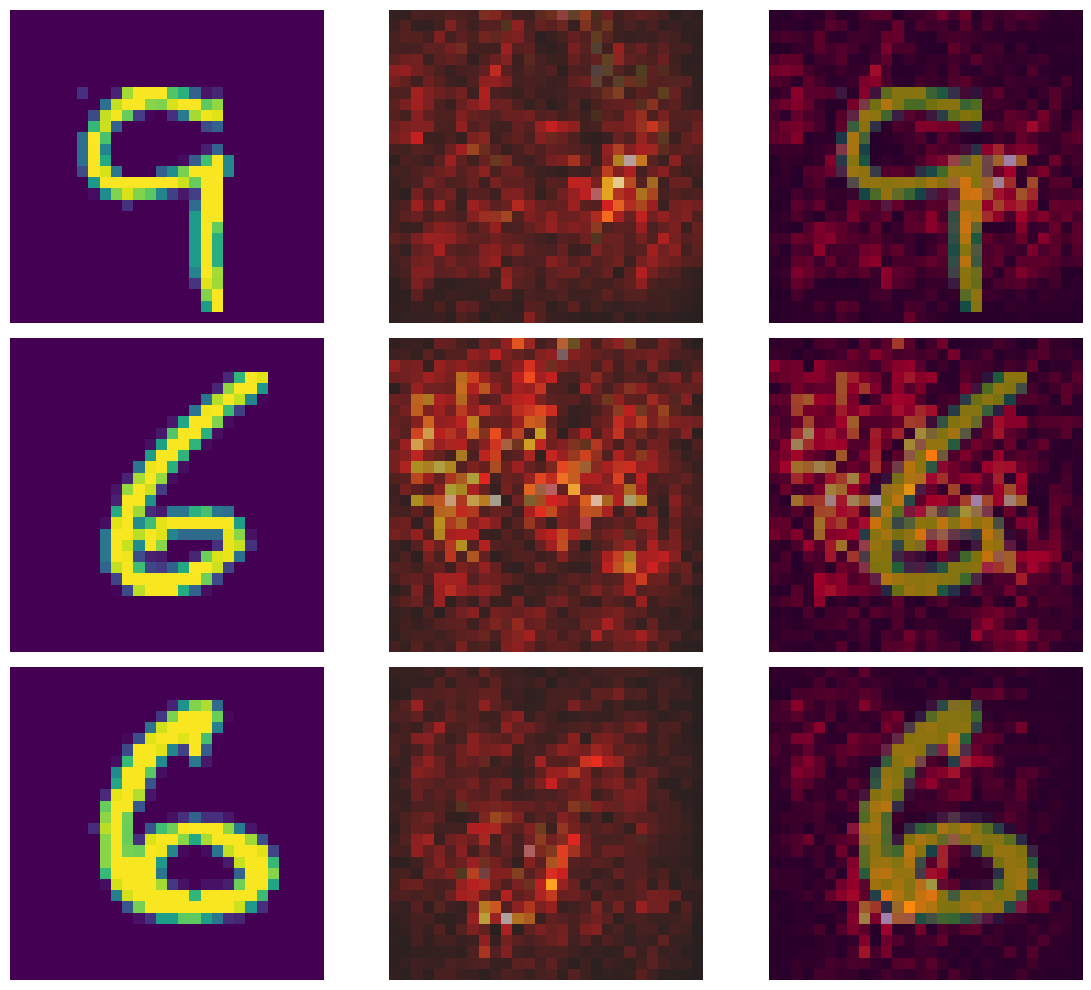

In [94]:
plot_saliency_maps(
    models["model_noise_inject_inputs"].model, train_loader, num_images=9
)

#### Plots of Occlusion Sensitivity

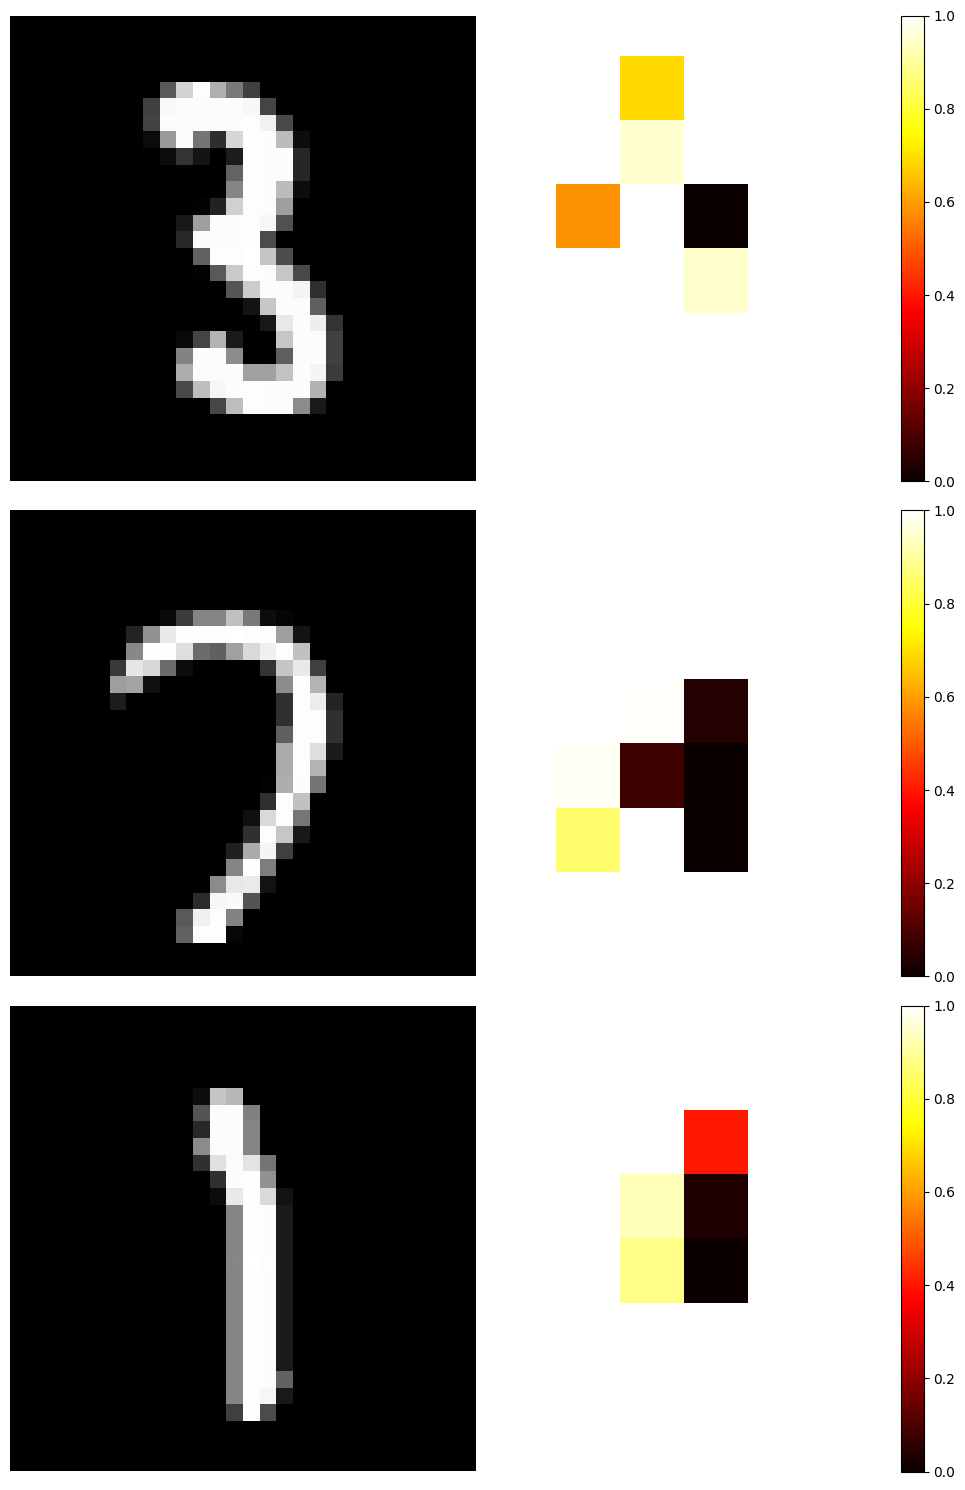

In [95]:
plot_occlusion_sensitivity(
    models["model_noise_inject_inputs"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

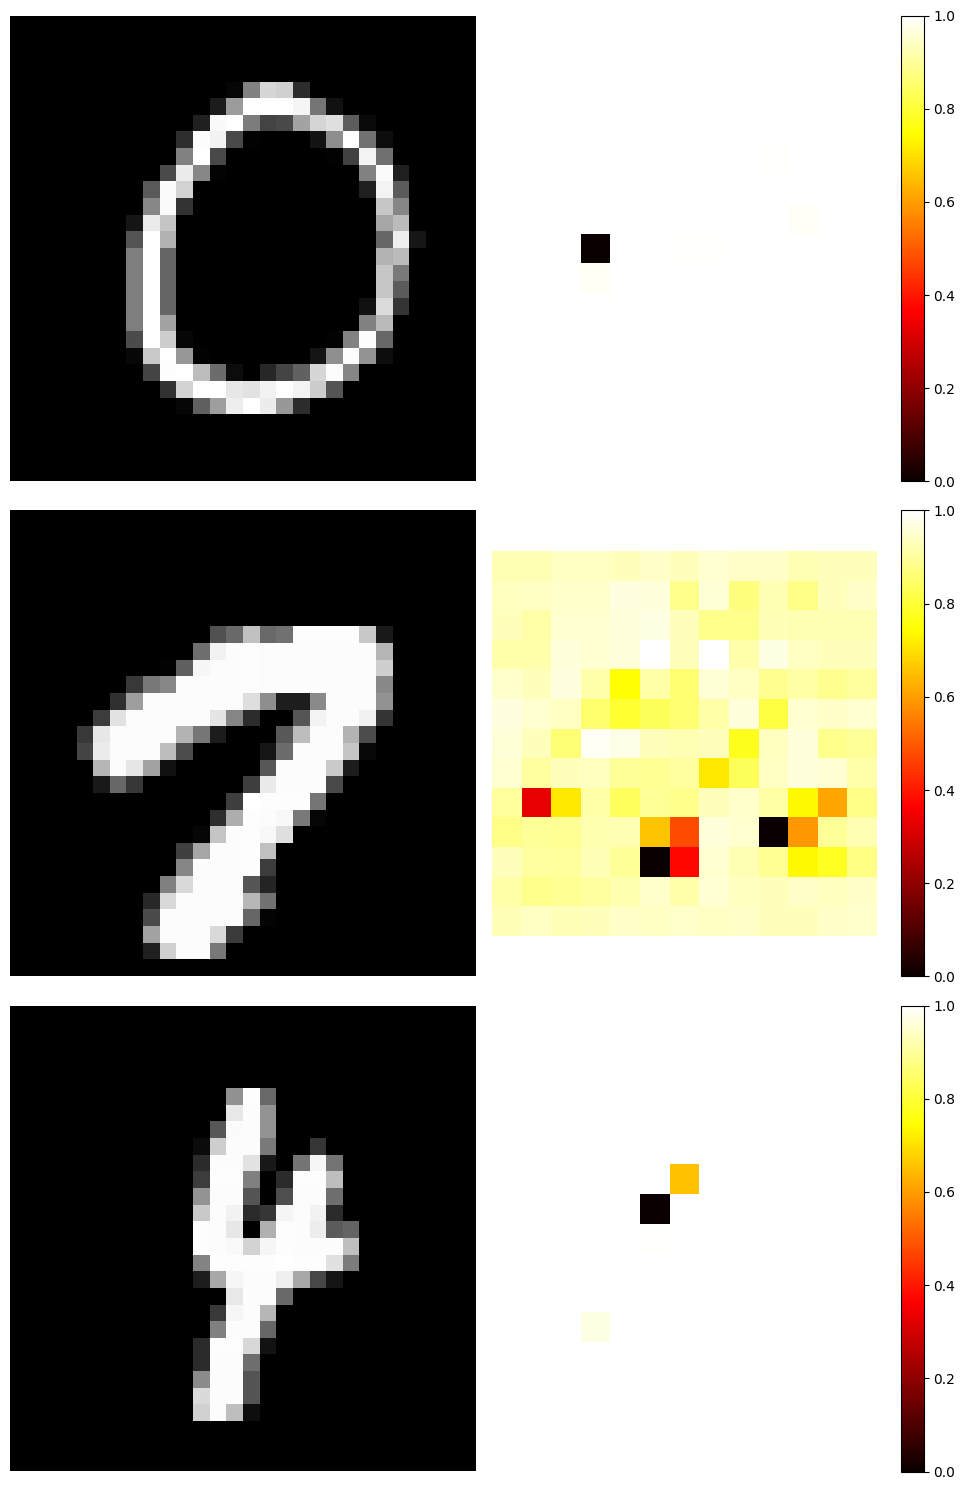

In [96]:
plot_occlusion_sensitivity(
    models["model_noise_inject_inputs"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

### Noise Injection to Weights of First Convolutional Layer

#### Plot of Losses and Accuracies

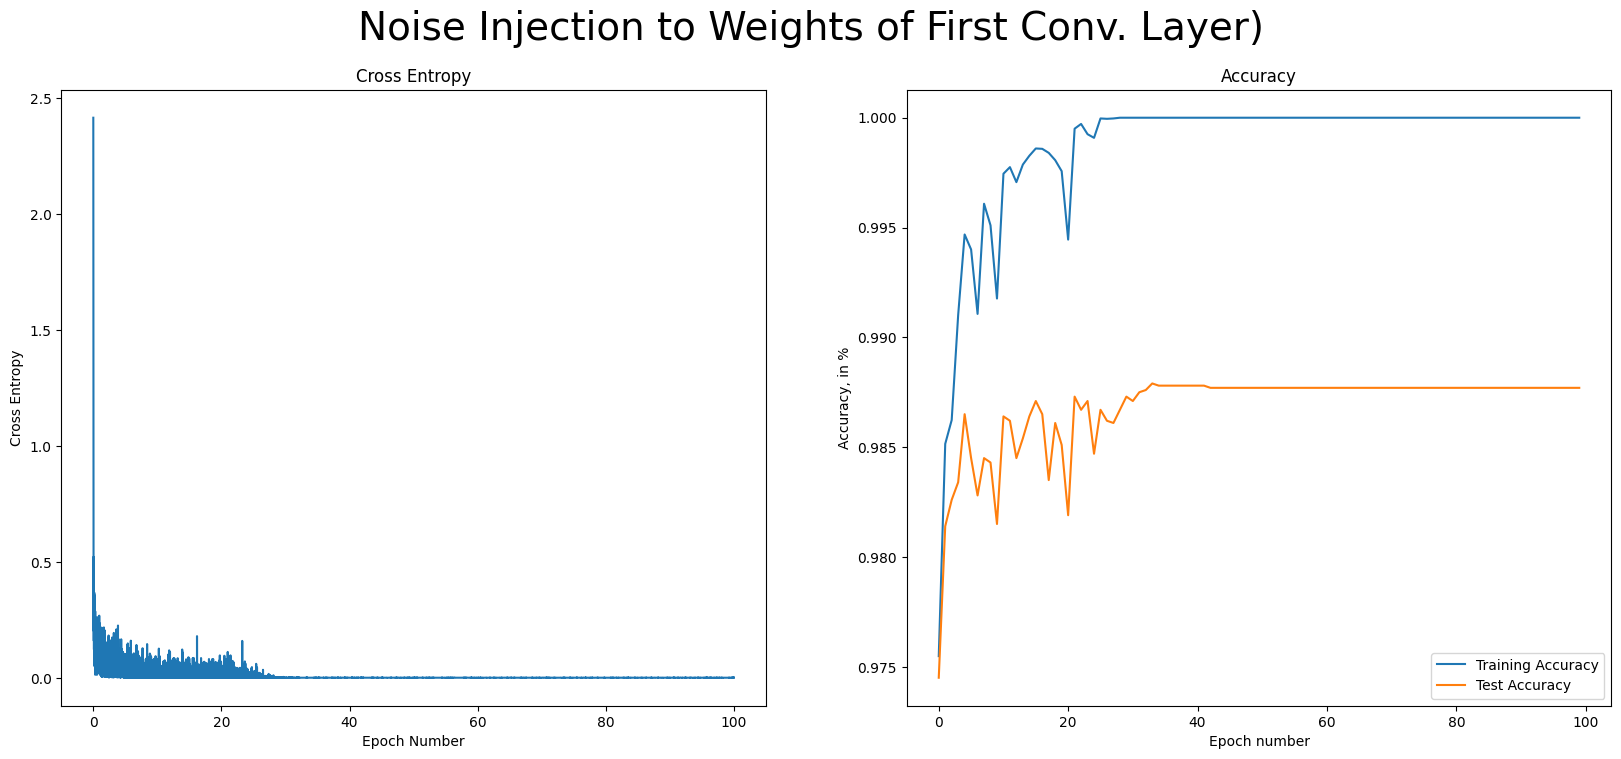

In [97]:
plot_results(
    models,
    model_name="model_noise_inject_weights",
    title="Noise Injection to Weights of First Conv. Layer)",
)

#### Plots of Activation Maps

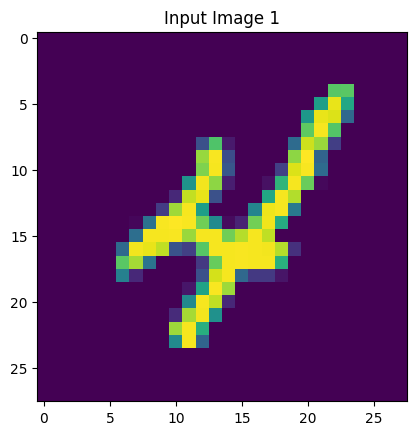

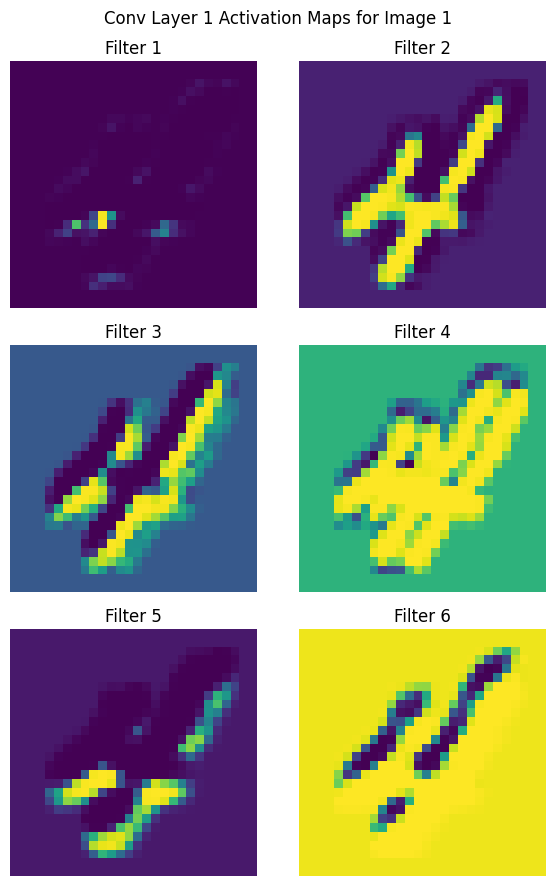

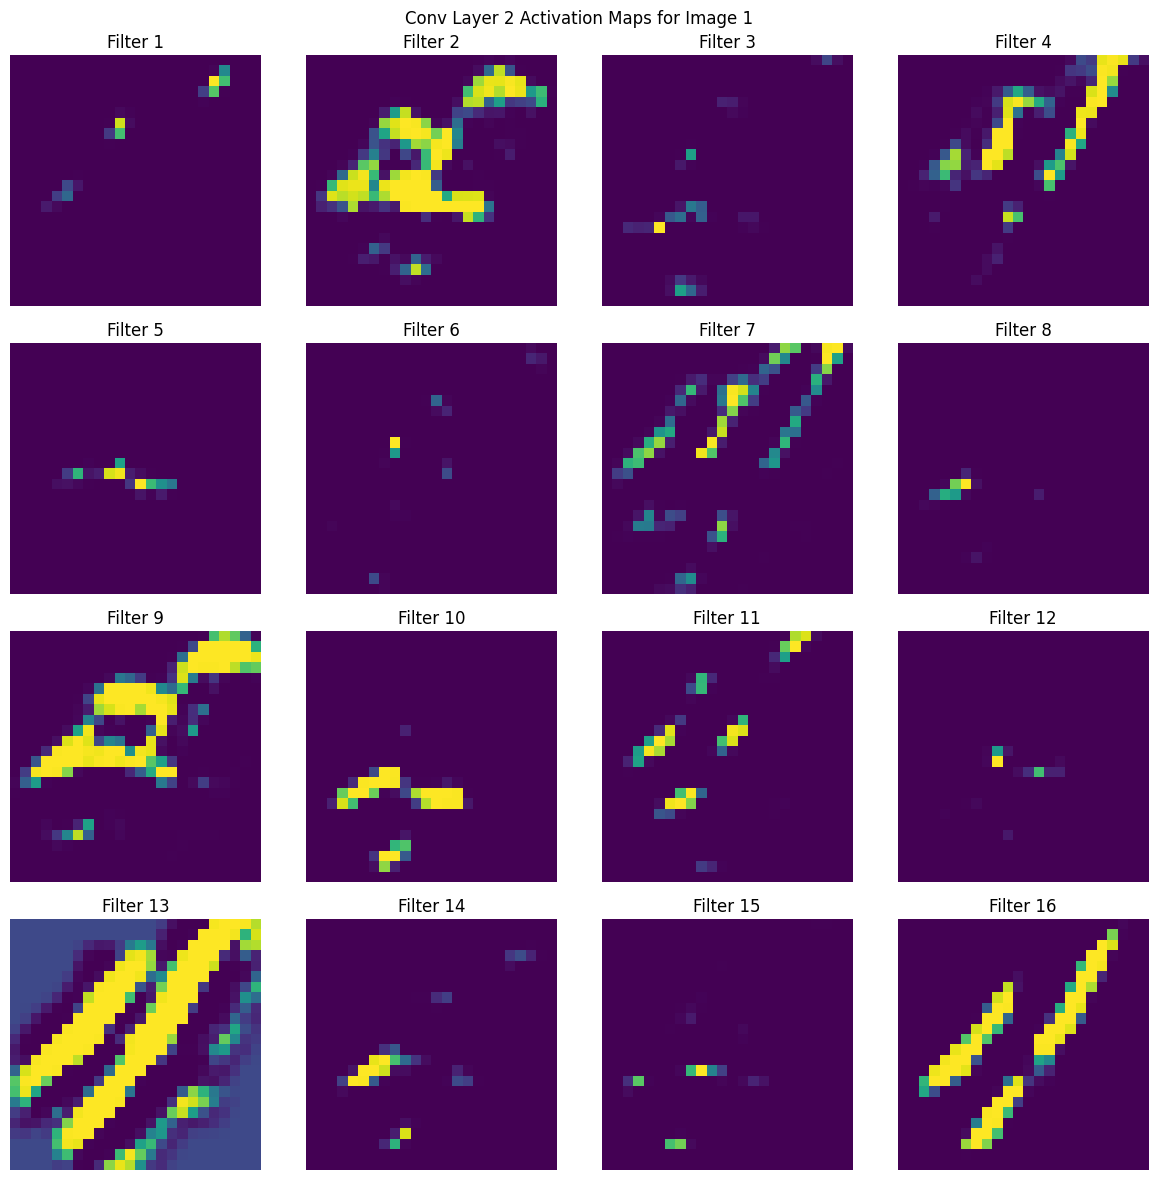

In [98]:
plot_activation_maps(
    models["model_noise_inject_weights"].model, train_loader, num_images=1
)

#### Plot of PCA of Activations

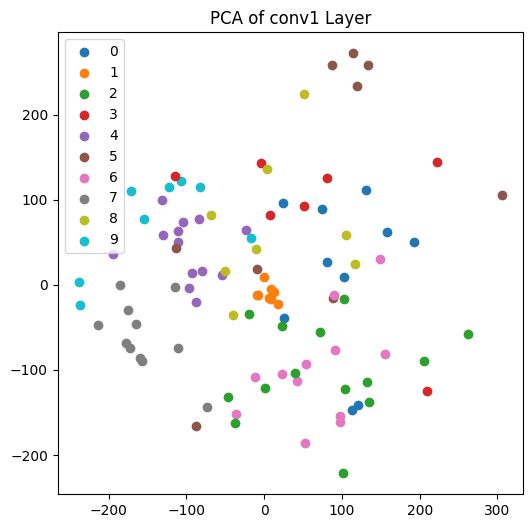

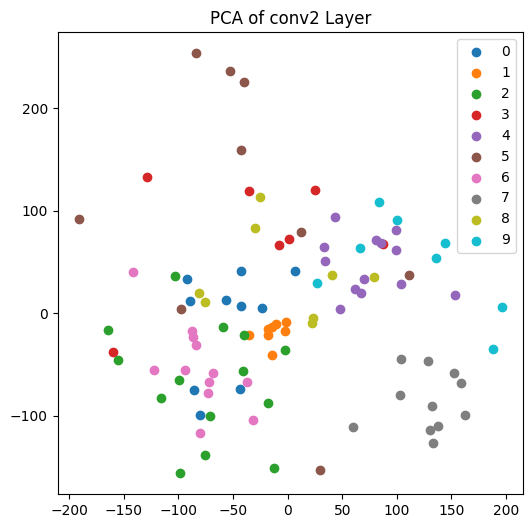

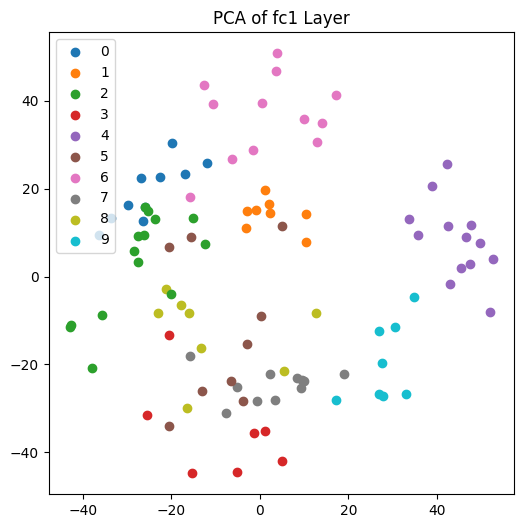

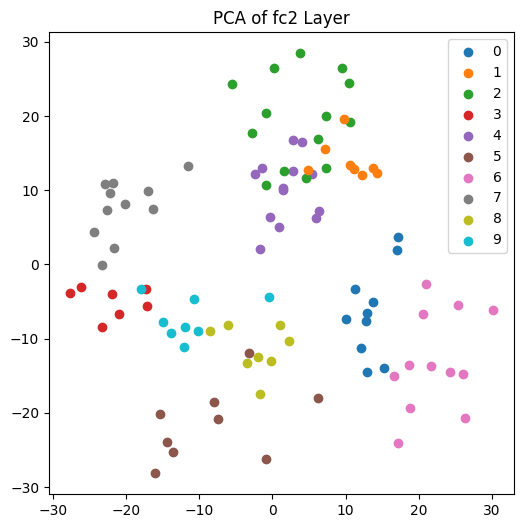

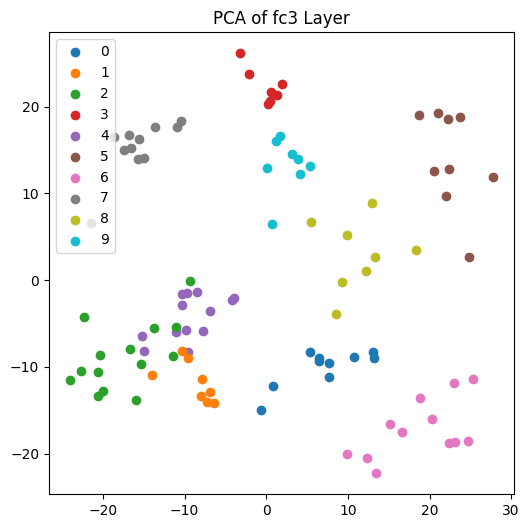

In [99]:
plot_activations_pca(models["model_noise_inject_weights"].model, train_loader, device)

#### Plot of t-SNE of Activations

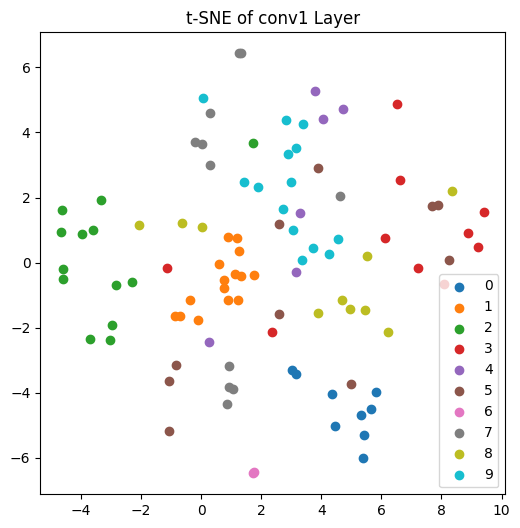

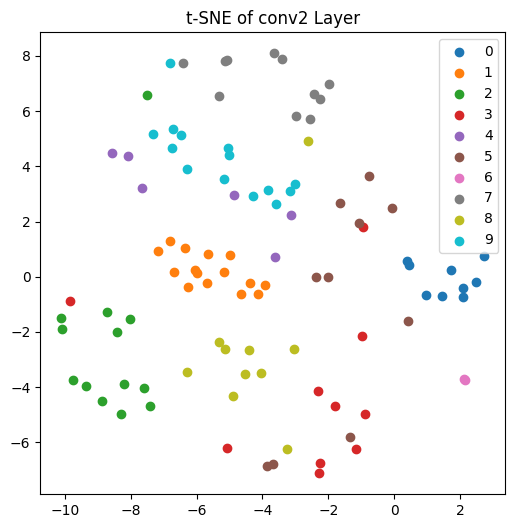

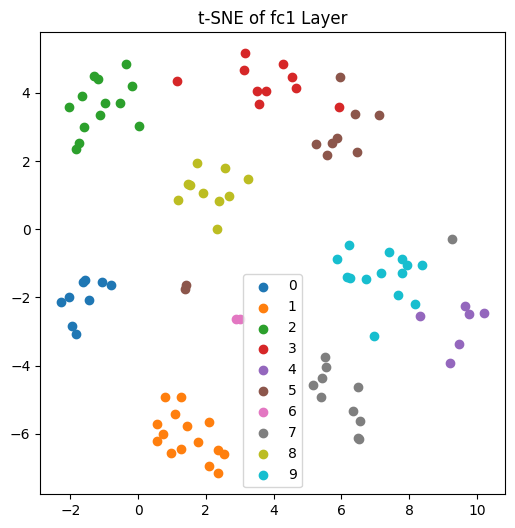

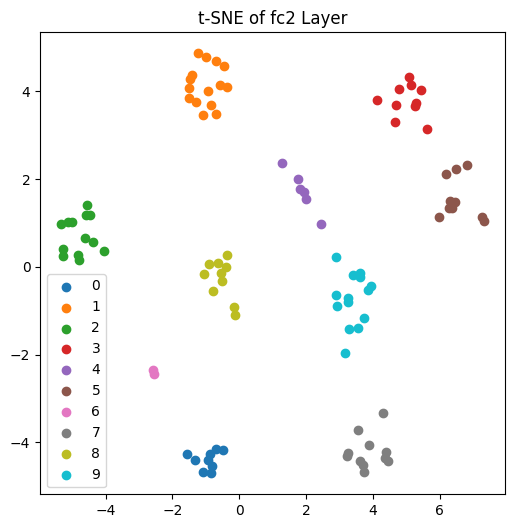

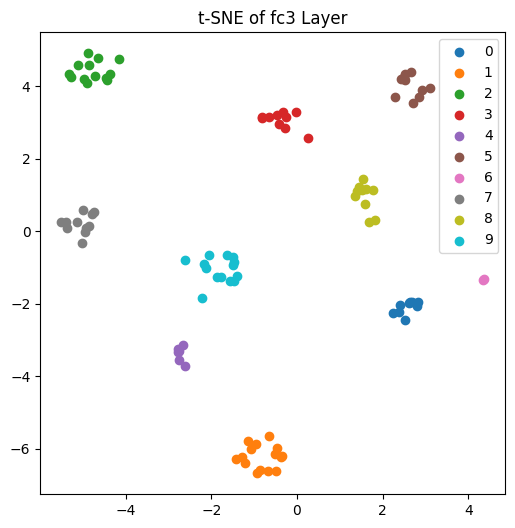

In [100]:
plot_activations_tsne(models["model_noise_inject_weights"].model, train_loader, device)

#### Plots of Saliency Maps

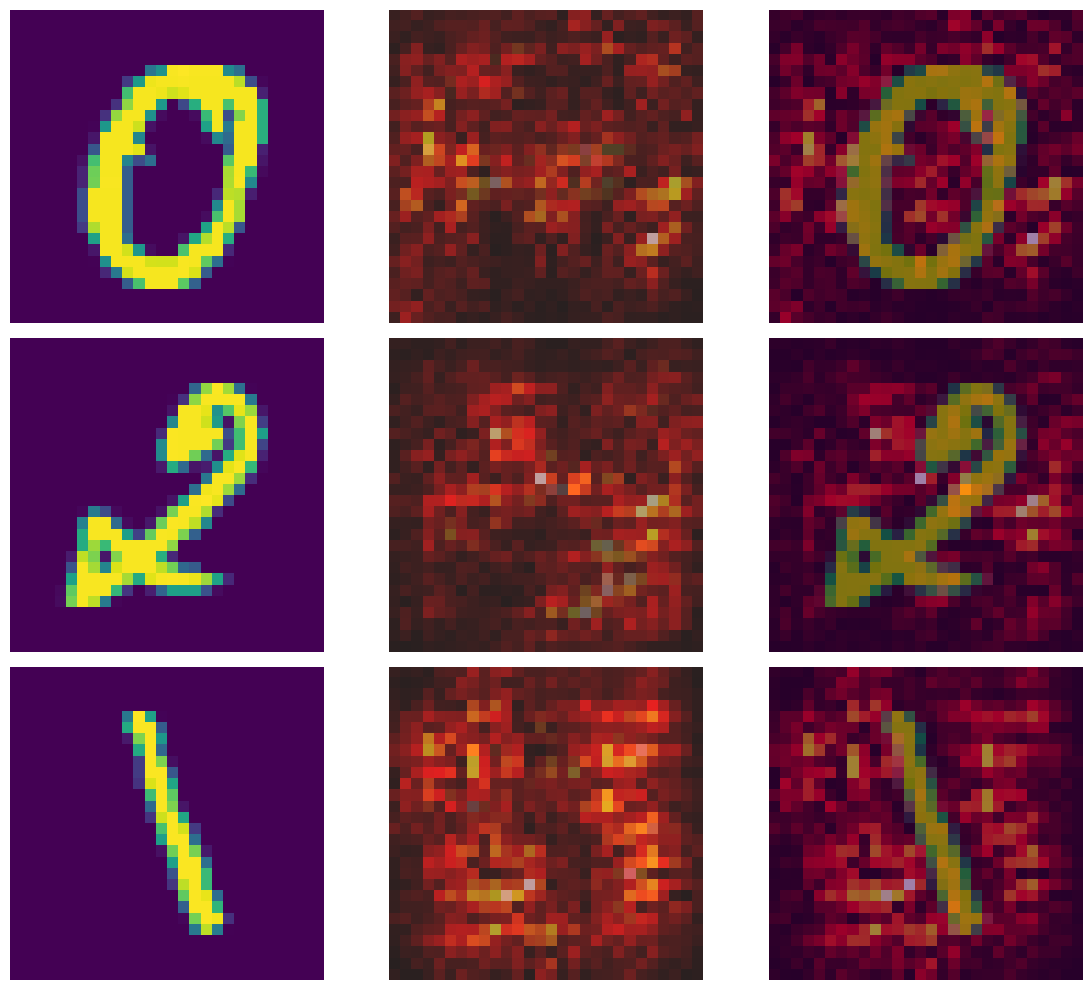

In [101]:
plot_saliency_maps(
    models["model_noise_inject_weights"].model, train_loader, num_images=9
)

#### Plots of Occlusion Sensitivity

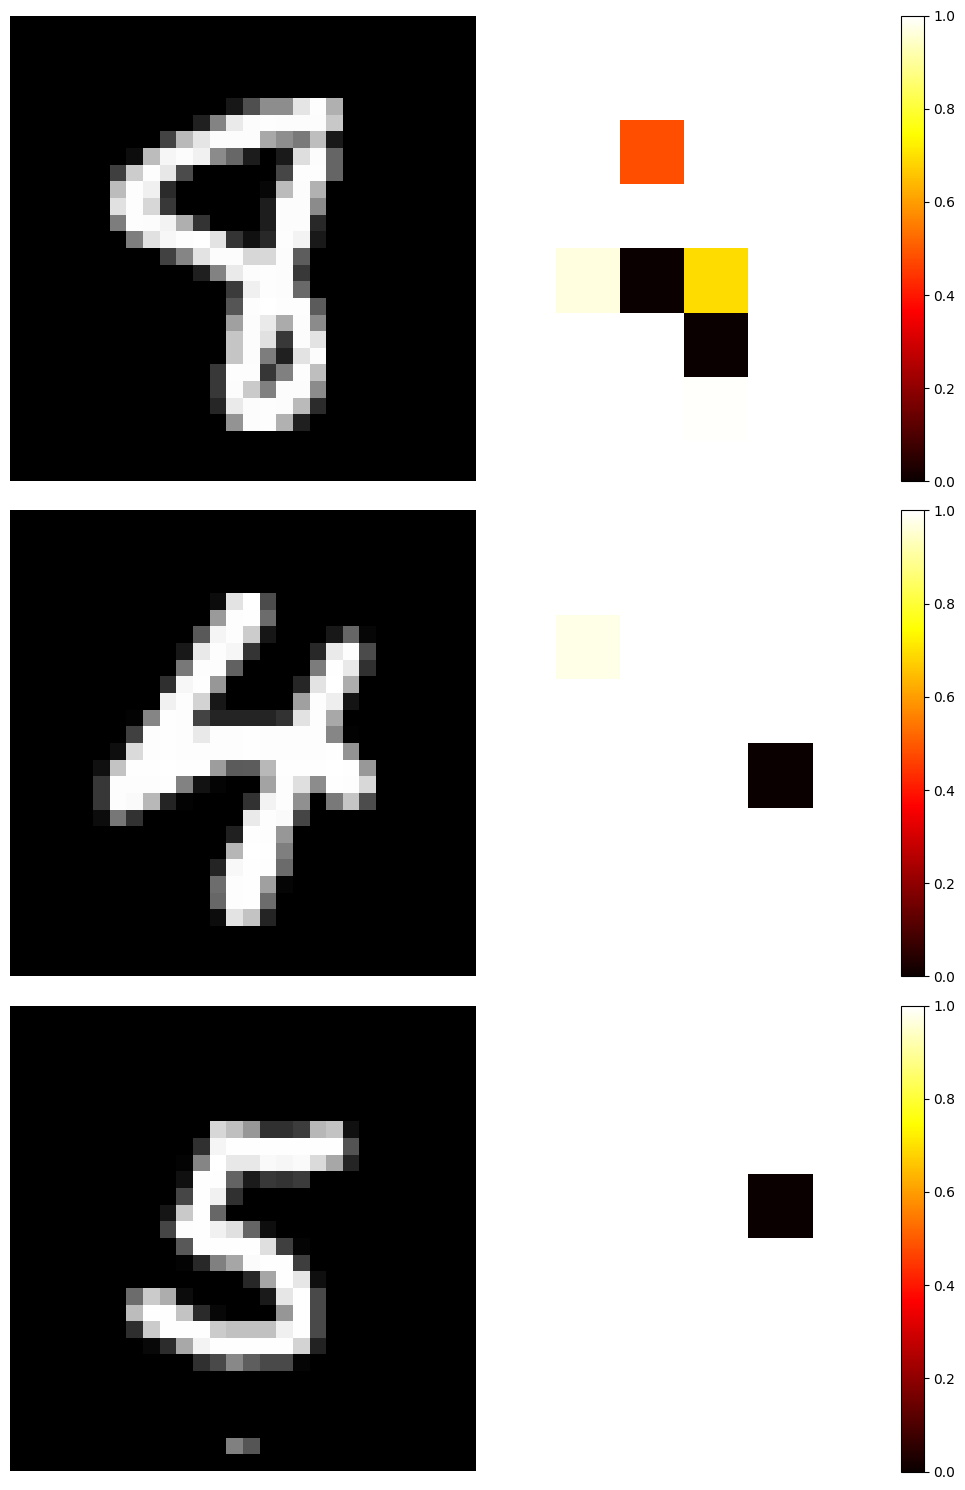

In [102]:
plot_occlusion_sensitivity(
    models["model_noise_inject_weights"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

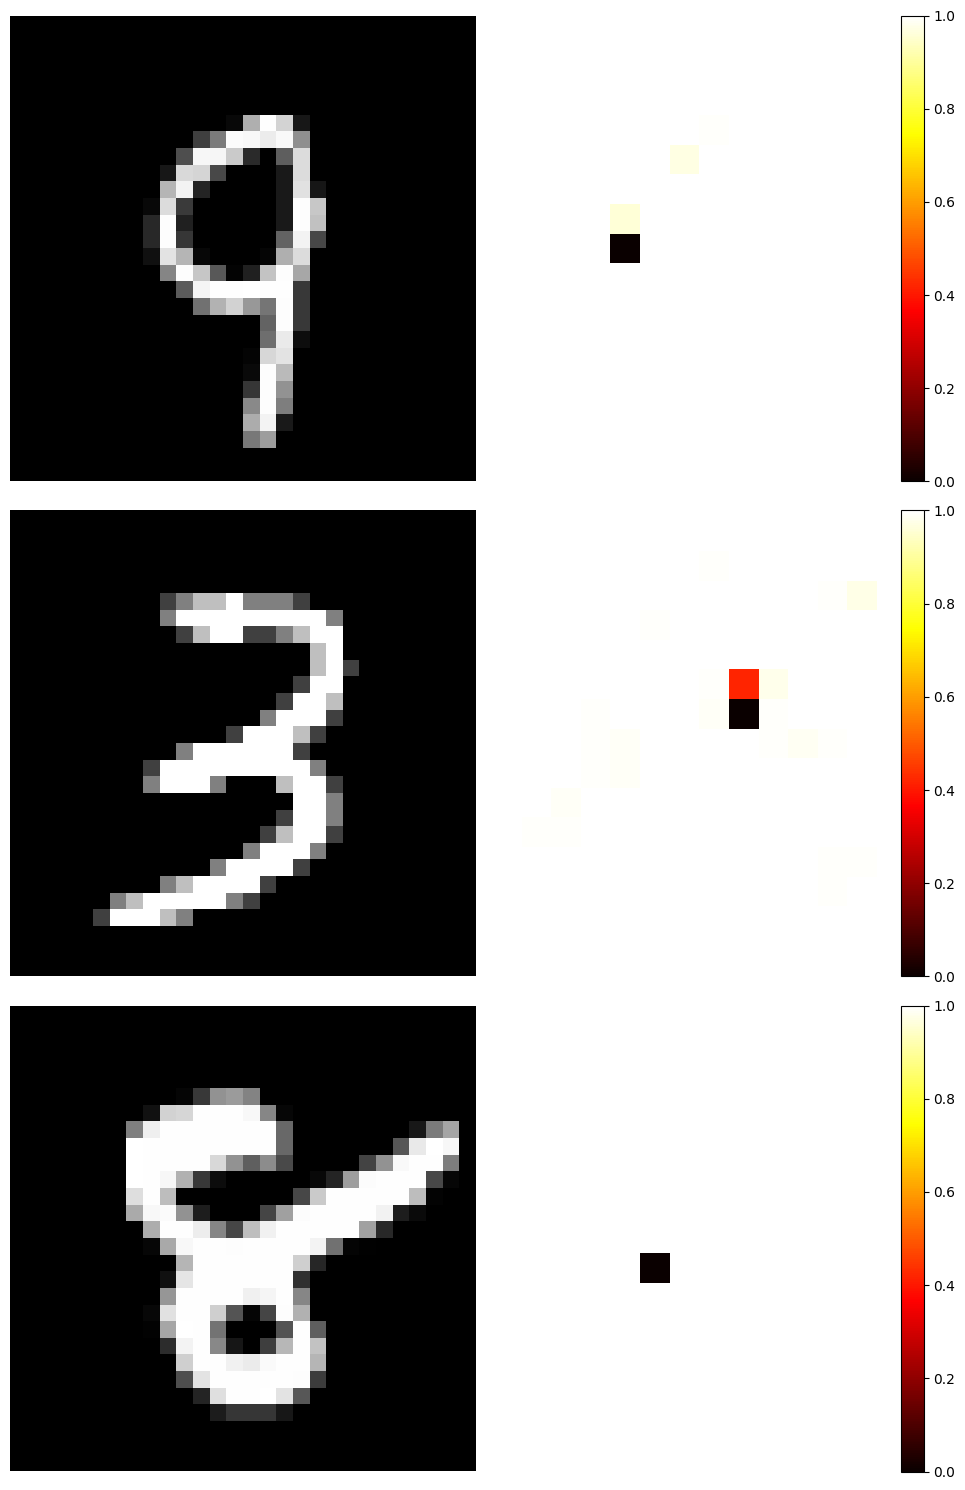

In [103]:
plot_occlusion_sensitivity(
    models["model_noise_inject_weights"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

###